In [1]:
%matplotlib inline

import cv2
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import io
import base64

In [2]:
def HighlightCompressVisualizer(val,minA,maxA):
    cs = (val-minA)/(maxA-minA)
    if val <= minA:
        return 0
    elif val > minA and cs <= 0.92:
        return cs
    elif val <= 0.9:
        return (0.08*(val-cs))/(0.9-cs)+0.92
    else:
        return val

In [3]:
b002 = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAPoA+gBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APGHuY1JG79DUhwRu9KYjHeRgYps0ypgDnPFVZGUZc4z6VVaVmPBIH1pFkZT1P51cguAcKxH4tVoEEcEU1jjvTlBYc07bTRkUu6o5HCqTzwKoSzF2PPH0qClUZNOIwKVJWXsKtwXCnAYgfhVrIYZXkU8UuM1E42kU9DkfWqN6Csh+o/lVSN9jhvSttH3ruHrio7nlB34NUlxvXtzWnCQEB61I4yOlRgkdc08GnjFRXEhjiZh1Az+lY6SSPIQG7dxWnEjkfMQeagltd82Tj8zViKERJgAcj1p/ldScZqNmEfJpI5xMpABqbHymmsflPpjmqiSQs7Zc8H0qUNEWOGP5VDdOpQDPOaoxpucCtSNfLiG0DJAqQHIGaVmwoA9aR3AhHrn1pluvH41Y25FVZ4O4Hr2qmww2KQ8UlKOKnhc5x6kCppIs88U1U28VbQAClYDaRTHOFGKqBczE/7VWOPxqJyRxShSRQy8c1CeW+hpWfA60xSXNWUOKGbJoBywoZufakIz0qaMBeuPxprMTxSBalTApWB3E0zJ6U0sQ2KuWzfLn8KkZ9xxzVS6Tv71W7VHS5GKevSnAZoO4dqcGx3qRZTU8bq3fmpC6hScjp61UlkLnAP5GmAhKbkEdRUkQG4ZIqyrhe4/OpRIHGCRQApOKaZMMBTnUFTkVApXfjHepsLuBx0qZGz0qQKQcjFTD7p9agd2DcAdakimfcOB1FXYp2B6DpU0hWRBuPOe1QxoqkDJptxAkq7WGc+1Yd7YmNt8YIGST0qG2nKuI3+nJq68QdBsHfsKznTB60wjvWcsEjHkv+INaSg7SOaR/lHA5qnLJgsSOmcZqo7lznnHpmmUGlBwcirCXRUAZP5CkNy5bJY4z6Cpor3aMHd+QqaG6ErYOemelTN1qKVxHHuHWs+WQuxOB1NRilAxTlwPrQ471H3p3apI53QYDHH1q/DcBhyec1OpBpJFzSR9R9araiOM/wC0P5VngZrStZPkIJ7+tTt8ynmqTDDH2NW7WQFApPOP61cXkVG/B5qRVBQGlIAFVbxgbdh7H+VZlvKsbk4PTFaImJHA/Oopp2WUBQOnepwN0QZuPlzxTPtMaoU3e3Q0ilZFHNSRKEBx+tOZSR0pqoVDA5waryW2clODyagWKYMevT1qKVZdxJ34/GpraEhwSCB7j2q27FSMDgCn5yoPtTPmJ70ybhcZ5zU8Y2rgetTKc8Usg+Q59KzJ1XdkCoDS8Ggc0oODV2F/NXb6ACpRCc1KiHcc9MUSc8VDJ8qE1HCuS7H6ipKayqfrQOBg1FI3Bpi9DUMuS4AzjPapo12qKlz7U080q0uN1SqoA5HNNLZNH3ulP44HenYpCeeelOC7xx+tLJAyDPWpEYJHtJqGScJkgjv2qu1yZT249BTTnHFRlucGjI6ZqQNgYp6tT+1BWmkH1pQWHc0pJPUmkyAaXhqYRjpSozZ60/cRThKV7/pTxckc5P5VH5zN3/SntI3fFNDnNTRnLDNXU27Rg0xrkQsRx+Iqe3vEY4LDr6GrTKsi5BJzULIU5ApYnbPI4x61aR9xxVmKMFhnH4inSxjPA7elU5rcMjbsdD1Fc9e25imJXp14XHaltbwodrE8Du1TT2wb5k5wOwzVFgRwePrQflPAqRcEc01wByRmsu6fL4HqarUUp60lA60UVLb8OT7VpswAyaz7mTc+BjAqCgcGlJpwppbim07tQOTUscmxv/r1pxncMj1pzcURj5s+9VNRIPAI+8P5Vng4NXbX5vzq0Dzg1DOm3B9c0yFyrgVoRvmpSu9aSIbBg+tSFhg1RvV3JgehqpBa5QE5/OnXkhjwq9/WmWrtJICQO/T6VJdM6428dRkGqRYk8sc1esySoz0wf51byoPGKUOG9vxp+AwxxTMYOKNq9gM0x0GMkA89xScbSQOKcwBjPrSLgjA7UY5FQycykVaC81Ig5zUd1JsT6g1RETSAnI9aY8JTuKjIpBS1JG5RgRjqDWnbz+YoBx07VNketNK9wKrXBGNvqKEGEH0pcYFNwOtI+cdKr4Y9c0vQUmwZyBTuaM5604DNSbcKKFwuTSM240oU4p4XauaUetKMnrSNxU9s/b2q3dSIBgnqPSsSW49Dziq5n37gTTEcqxz61P5oA6/rUTHIzSx5Y1L096cDT1b3qQNnqaF5pWGKRuFz7VGWFCtzxQXPSlD/ADClJFNByaXPalUccU8v2NKMGk5U5FSpO69Sfzp8h8zkVEA6n5d34Vftp5U2hg5HuT6VrJsljX7uSPrQbYBeD+QqEq8fILGrEMx3DOR9TVwuG61HMBsP0NY13Esmcjse9YlxH5TkjHpV2zusgq2T36Co54gx4HOKiYDNLjA4pgLOME9azbyLY+eOSaq0UUUUUVZtiitljjilmuWfhSAMdsiqxyeSaKPSg0qmkNJS9cUuMGkzV+znbcFJ4JPb2q86kgGlAwufasq9bMrD3H8qrKu44FaUEOwds5pXi3PkntTXXIwO3FQEFTirVtKBwT2rRUZpSCaaQAKYYww+YVHhUGABiqkts87ByMDGPWpooFj6Y/KllVSvKj8RVVYEdiRt4PpU6gIgwB+FEYJ65/GnDPpTlYinq2TzSnBYkUHDcGq6sVOz15pQSRg0sWQzZ7mpwvBPpVViPtDfSreQvU0C4TH3v0NUbicPJ2wCe1OjuM4XjHA6VNkMMZqvJb45XJ/GqxG00mfUUoNTwylHHJ/OtGOQOgOR+dJJLhTtOT7Gq+xmkG4n8alPAHtTC2c0LjvS59aaVXPAqGQYNJ0p2OMmgEAVJGNoz705n54pFUselLsOeakVDtoHFMO4ngU75gORQfmFEWQ3BxxRdz8jn9ayXf3/AFpsYy5Oe9OZgD0oAJ68Uo5+XrirqW+IiQD1ppGDjvTaM84qRWwcU9XAPehmJNMIzTGA6UAYHFIOKXNOyD1pAeacSfSkDlTyacJFP1pwNOzQD3pwcgf/AF6es2DnGfxrRWaF4yNqg9B81SwTENgHgEYrSjZmTk8Uu1SeRStCo5AH509c0SAsh57VkzRsrHkdTVaSLzFwT3zxWTIrQuRxWnYsrjBPO4/yqsi7lGaQjHFNIwwxVS+QtHkD/PFZhBBwaSiiiiinjOODimt1ozSU70opBntQTQRgUCndeKaetKvqK0LS4xtRuf8A9VXn4hY+qk/pWM6mW4OPUVait9nJz09asgc5pCDmmAENz60yVA5BFQ/MjHtWpa3Cup55zU4prIeuaa7bUPHas6a6KuQV/WrEUqyRjDAH0zUoWmMm7IJ4pqwqm4jHNJ8hOAQSPelPAoDUKKUDGTSeYAcEGl3AjPNQzIDgjOelBk8sbvSpIZhITyMj2qxuCxuT6VmSvmZiKRmZ+cCkCsDkZ/OmsDnmgfKQR2q1FJuGatxqGUZxVSe3/iXsOwqoRQKXOMVMk7KMA8VcjCycjGfrU5jBbpQ0WR2quyEEio+e1KxycUUjrkCo9tKo4xTljIOSKkPTFNxzUsbFDnA/Gn53uTgD6U8jC0xh6ChcDsKfJtKDAHTtVf2BpCdneqE0hY/e7+tVmye9ORgvWkY5bI9aXccYzU0C559q21RfJYAd6zXPzE9zSHtSYwTSZ5p6VLTGXHIpMU1s9qApNGzvmmnPTNJ83HBqRWOMFTSMOM01eamQ5wKHbbwKasoxjNPDAilBwuT61NEWz1qcSvGQc/pV+31AnCkt2HQVdF0g6hvyqQXgzjb+lTZVuRmjOOlV35Oaq3AyPxrNubfegIznPrVG3kaCVWwBj/CpUNOJoYAjAqNo9wweRVSayzyCB17VVe1dOeT9BUBUjjBpKKU0AUpOOKQ0lLxikpetGcUlL14pRwcUppKVaehwwatESiW1IGOEx+lU7Zgszc9xWjhSoNBwOlICG5BqOU4HSmA5FNdN3TrTY5GjODnp64rShmVh1HX1qbdmmlQQc1TmtEkckKM+5NNittjHGMY9atAU4Jmq1wHVW2sBwaypJJA5y3X2pUuWTv8ApVuKfzQeKmBOKcWAFQbcsW9807BPSmlWJ4FOAOw5pYwqZ28E0ksxAxk85HWoEQu/tVnaqqOAfwpm4D+EUMiuOgB+lV2XBxmnRHawGe9aMZ+QEU9lyuMVQntyvIHaq3QkelJ1pRVuCbZ6/lV+OUN61OAGFQvHkkZqLyiOuaCoxUJU5oGOvpSgDmkPB9qC3vTXfBoVsjOMU7JPekEhB7/nUnm5H/16BJ/nNKPvdaeeFPOaiBAJz3qK5O1CRWaxPekx8tIPelOMUmelWrdhjHtW3bkNGfrVa4h+UsM8CqRznGOlJu7Gk2+lPTipORSk/LTc+1J70o6UrYx1qPFO7dKO1ITkYNNCkjIxT4+KbJUJYA1IhLVZTANSh9pokkBUYpiEg5pxkLHnFSCbZzxV621ALwSvX0NX47oOuQR+ANDOfWomcdD+tRMgY9Risu6tyvIz07Coo+gOaeT704c0E8dKiJy2PenNGCvQdPSqklsren5VEbIHoT+VVmgdTyp/KmlccEc0BaQjmko5BxS80UCkPWl20vagcml28U0cU4D0oBxTlnZAwGcH3pgch9w45zWlbyF4x1P40SyFTjn86dCwK4460sg6U3aRzT0TgsfSoHi3OcYxTVkaJhzxVyC43DHOfpVhWPelxnkUxgaB1qQSbT7U4yK3BNV5IY2J5bmoGtFz1b86jWAIeM/jUyqRQQG4pCgANRMWC8DP41GZWK8Ic06MOV+YMOe9SYwuaqudz496sIu2PPfFABPek2j1penNMkUEZFQA7SDV63lyoHPSrpUgUySPKkVm3Mew5GOSagzSU4NVqGXDDpWpG52Ae1OLCmSDevFUpS6HA/nUYZjyTik34PHNPDZFIeTUgUAdqjIBbJ9KY5O0hf0p8RPGQelDKcnAoCsBk0hOaXeQOtODll5pjPg1DKxb6VA5HvUYpMimEA5pB2qaJijZ46VsWUwJP09KtONynI4rNnXa5xxkmocZNIThyBUijA604HjmlpKO1L2puM03BzTsmlpMUKGxtyMdacBgUx1zTAnNTKnFH1p4YetIzAUwv6Ggbj3NPUMR1NSKCOQTTorqRCOWx6bq0IL5XGGAzwOWqyQH5BHNRsPLY85pksayKMjvWPFICvUfnTyCRkGpEPFHVabjmhmIFQPKq9Qc1IvrSOqHqKqyeUrcKe9OaENFuXjjNU2XBpu2jaM0beaCAKUDik20oFOxx0pg605/uj6UxRml6UAZHvTxAxUnkfhUWw79uD1x0rUtY9kQ4PQ/zqO5OWP1pLQEEZ9T/KrUnHPtRgMo+lKQQmBTAdppXRZAfWqpQxHsaswybgF47CriLtFOJyKPLB9ajKkcYoHHWncGmMcHpUeM9qXHFRkYbilHI5pCoxikEQHPH5U4gY61HIQIzVReZMn1qzyR7UoGBRikPpTec4qGWMjnj1pivj61pQzq6DJwfpVhuTx0qGaPeMc1nyxbCeveoqAeKcrYrQjvFzjn86nEiuM7gPxpGlCjr+tV3JdicHFCJnrSSBVHABNRopLZLECpQv40p3CmkcYoVAOtO4HSgHmntt24xUJIBpq80qkhqr3LgEH61EJyVwcVCx3MaDxxTOTSVIozjinE4HSr1m53fgf51r44rPukYScKT34FQ+Q4G4hhxnpUTDHNKrE1LnjpSA049KB0pcYFIfakxiloPtSY45pScUm7NLjNKOKCcUm4Uxm44qLLsf4qnROmakwBTlIFODe1RtjHFCZU5FaFtdHcqtnsOgrQ8vzBuHQ+tVmLA4zXNwMd+M8ZFXwcKKA3GBSg5OKe2FANNY7xxVW4gLJnIzmoklcHawX8KsSJ2qqYmDnjg1ZiyEI9sVUuVKymoDnFANBJopc4FNzUgIA603PGM0gHPWgmkBxS5Oas29vukG4f5xVuRAF2gYAFQLAGkzgcH1qd5PKQjn8Kr7zLyatpgCnPypFRR5Vj0606Vjg4xnFMiZz1AFKGIapHAkX/AAqo6NE24Dv3qxFdngNt7djV6OaJx2/KnuwB4NRk5OcU09elKBSEAjnFMx7UnQdajzz0pRznNLt70EYppII4qrO4Hy+oqJFLHirCLjrTiMUc0jdaSlAz1qGeLA3DOM1EpI5q5Bck8ccmruM9etQSw5ycA9e1Z8qbXOBx9KZQDTgSDUyuemf1qQZLDknmrGAEFRFyOhpB8x5pwxinoQOopWIY0Be9Jupm/mgnNNOcUw0gJ70E1TnDFvxNRhSAaUClK570wjApnepo8Cn7Qzj3NXrSMK/4VtGPPIFR+SrnLrUVyiiMhRgAGsqRc59hTI/Spe1JSg9KdRjnNAHc0UvagUhFNPNKMA0ZNGcd6GOaYTjilyMUdDUi05qaDinbs8CmnilDEYqeGQFsc9q0YbgRr0J4oWQSMeK5ZDiRSPWtJDmIE1L04pwwOlNagHAo3bqTAPekfk+tMKZGQBQBiq14uSG+tVMcc0n4UlHamnr1o60pyKUUDHNIeaVecCrkNsGAYgcj1NXQoXgUpHNAABqvPGS5OOKaijpU6DA5p+7HFRswBoeQKnOOR6UkbhlDADn0FNdgG6VKpFEgDrjAqo8TAkgH8BTFkkQ9W/Oplu3x8278WqZbsY5P/j1SC4UgHI/76p63CHIJH50okVmwGB/GnkDFRsuKbtpVTNLwp5FMaVF7GqktwDwo/OoNrMelWY0Cr3zxUoBxzSMuee1JuoK00CndO1B+dSCKrSIVPAP5UyNtrA1rxyK44I6+tPIBFV5YQwPA79qz5ImQnr+VRdKeOakjBJq3FExIJI7U6bg7feoGyBTOhqwinyy3oaYTycU5QcU75gOlNyMVGOTTx0pCTTaaKVF9TQ0QbsPyqOSEBeMdPSqp+RulANNfio+c8U5RUqHBzVqC4+Y9enpXQQyEjnOM1NIFCkgVTlxsY+xrHkOWbNRqfm4qQdaaTTu1LmnCnUlFGKMcUmBmlK+1NB9qQ9aaSaaw70itS7u9PVjkc0rOcjmjcCvvSAnPan5Ipeoo6Yp+7jipIZCjdB0rHThh9a0IvmQZqXzMMRxT8gmgntUcxKqNuSSD3pkBbaS4xnpk1KDUM04RDjk9uabazF+GB69zSO7eeAAcbscfWpLpN8YwOQD0FZ2D0IP402kI4oHpTSKAOcVJjNHBFBGKbjk1JDjzF+orVUjywBQPelUgdTzTgRmmSsG4B9RUKrtcipCGPSlPXikZRjcT09aqSyeY4QeuODViKPagGf0odRnkU7K92A/GkEqD+JT+NBkUg4Ix9ahRVeU8jt3qV7VSMgD8zURtj7fnUexh3FNBYE80u589aXe+fvUpkfocUGRyMYFJvY4GBmg7z2FAjdhnH603yznpUqqalGBjmnZzTh0xmmkc9KXNNxzmjFC9aV1yM4qnKmwgVZtpABwe9aCMGAz6UFarTxggkis1xtPNIMjpTw5A4q3Fevs2FVxgDpQz5NMLZ4qNhigSFRjAp0cvJ6VYibLflVkAEdBUMsRUgjpUGKcOR1oIwKZTScUDIPWnbj61G7cE1UkO5jTRSMwI5oA4pMkGpU6EmpIwCxPtWnFMcHpWmHLoelV5ziNsdayW5ZvrUa/6w59KkBpDilHSjqadnFAb3p45oNKegppNIBgU4mmY70hpppuCaCuBQBilAGeafkY4NN609aUjJpV4pxwRTcHtQpIPWqEa5kX0BFacYXYMYx9Ka7qrngGkMwVu3507fz0oZlOM4/GkLIFPzL+dMSUFyuQePWgxROecH8acsQQ5WhEy5JHfNLI4B2nPPFQSwgruGB9TVIjFHWggGmdCcUo60velxg04jNNxjNCNhx9a0InzGMHmpsEDB60mw7s5pS2xScVCpLMT6GnA/OfpTDcYYqBkj0NWkHHNQ3RPlkD9PrVOCImXcT/ED0rRAAXJqnc3ABIQ96rGZmHJ/Sk3EmlLsoxnrToZCH69xWgr5UU8HApcgqetUZDsl9i1WUw6/hR5ZzTxHnjmnBMUjRg9RnHrSGIAZ2j8qVFU8YGPpSPCM5A/So/LOf8A61IyEetNBOelSpS4GeTSYBNIRgUh57ikFPHzDFV50LAH3qCNyh4rUt2DIpPpVgnjFRuu4EVQuICSTg9fWqhGKAc04NtIqwo3LTOQcUuQetIyZqMKQcZq5D06+lTB9p/+vT96t3H51XYDOBikANOwCOaYyfSmEUdKQmq8zkcDvmoM0jNSYzQvSnKfmqRTnil6HmtCAZ47YrWT5Yzj1qGflCKyW/1jfWmDHmGnn2o4HFIfTFGKD2xQAc1IG9Kf1pMUnelPSk6mimnFMIpwHy80hAI4pAKaR1pSMClUil3c4FPVuOacxz0GKQHHelPTpTe9JDa7QSeen8NWFQKnJxUZVSeoNMaNS+T6U5mVDk9KjVhK5A9eKQocsDimLEyOWBHTFP5CDB5qyAQcUj5HSopDkD1FR7z5ZB6YPSq23c3FSJB8uTn86iKnBIFREEGl7Uo6UppwHvSEcVGRVq1Y4A5PB/nV7OTUm2mSDIx3qsSVcAdzg04qwBIPOOtQxrtlLMO1XwylScGoZxvQ461FFEwYZI6ipLlyiAA9jWbISTmhBkUoOaRzToTz+VWg2KmLg1JkAVUuucH61PakFQM9hVvYBRtpDwPej8KOoOaafanA9iaTI74qGV1HVh+dQfaIgTUgkzgrxTsk0oPPFQLIzHk1IPekNODU/buFZ0ilWx7VZs5+inHX09q0s5UH2pBkjpTSuazbiLyyDioMUh/lUkcpBwf51PlXGcDNMKkU+MZ6mmyjHSlhkK9/Spi4b60zcV6GnbvWpBTgF5yKik4OBUJYDrS7ieBUbvtQ1UYgsT703PWm555ozQOOlOGRzT0JHPrUmc4zWhZsCBn0PX61sgAocY/ConTIPH6VmXMJRiwzySelVcZ56Gk3EH1qTHGaDR2oFOxSgAUpb0ozRmg/dpATmkNIQDTfSnc4pBwaQ0vSmsc0KhJ4zj6U/wAs9cH8qcQMdqfjIxSrGT2pxUBeR2qAtg1aVqSQFlOCO9RpGQo5GaR0IX8aidS4waWOMR5Ip7Auhx6VHEpXg/pUu7FLuBHWkPSmNmonTepHNRRRsjnjjFWWJKHHWo4k/hYck96gmiKMcjgk4qIjigdKKf7Uh60gjLnAz+VW4IDGBnPp0q6oGKkqvK+1iarlt7AjsanHKVGUGalXgU/71NH3vxqjeNl8ehIqqacpxS54pp5p0RAfn1FXgq7c01zzwcVHDIxPJJ/GpZo96ZHoO1R277HIPqO9aCSBscj86kzzTTjNKfrSEe9NI7im55qG4m8sDrWe0zSdT+lPii3HJq2DgKKkDcUfd5FMLdjRxSE88UZOeakRhioLuPGCM9MVWjbY4PpWvbyiVAB2AqyoxnIpj4zxiqsyB+36VnMpU8g/lTT0pDTldl71OJVYc9aX7vSkPzUhQrjpSg7cZoL85pBJzS+d2xTfNIbtyaeGqGRm3HgYqPzWPYUbSynimGFs8D9aVbZ2zgH86kFo23JP6VXaNlOMH8qkhgLnqfyqVrU9mP0xR5BQZJ/So24PFWLaUg49q37Nw64JGc+vtVpowO1V5rUSKeB0Pc1lzWpjyflxz0JqpjmlBx1oB4ozRnml3UA04GlBzSEHNGeaOcUlBpO9LnikobrxSUBM1Om1RilLAUxgMUinFWI2GB708kYORVWUqWwB3p6PuzjpT1NS5wtR4yMGq4OWGKeVpNvIoI+c+lNZeaaAc1ISAOtM3ZpuRnFHekzjvSocEGm3HzqMDpVXYc4wfyp6wkjofypPKbP3T+VSGEgZIpqxbm7VajhVATjn61FJdbHK84HsKntZjKcc4xnmrJqtMSeB6VGkeCc96lPCgCljOBzT8Zo+7SDkmqFymHJ9SarUmaWgnihDzV6Nj5QFBHfNIqhRxVhMFcGqs8ZRiV9SelNhuGDBSSeR2rQR8jNPPWlAJFL7UYPakAycd6gmsQXLFjz6GmC3RTnLUMB0GabI/loD7VUa7Y8AL+VPhusnDYHHpU7D5s0ZOKUHHWncE0x8ryM/hTw4lXkZ5+tUpUKt0OMelWrGQq+055x3rTDEiggd6jIUdapzx7hwO1U2GCRTaSlBxzUySZODmpQQpzS+YWPTpSvhgADzUDxkDpTkTFS7ATzmk8sHI5oEWPWkdBjoKia354/QUgBAxinKM9qlC7acAWHpTWjAPIB/ChQqHIApQ2WpsrAgj61CsJY9sVYigVW6dvWrMM7QPwe3pV4agC2Du/IVP9rUJnDdPQVj396GbAB6t1FZrXHsKcswfqRVmIo3BJ604w5JKZNRsjjgimYweaCcdDTtxA5pQ9OznvR075zThyKBj2ppXnrSleKYeOxo5oDVNGgI5FKVxwKAhIPSnLDnnikZNrc1E6E1Kp8tPeq8kpZiOOtM3VPbODByfQUNMgOA3P0pyPuGPapU4FNdQp6mlBGKcV4BxTSmcmm7eac6gDgfpTDjvTdu4mk8v/OKcsfHNIYRjk1EVKmlHUZoCLuJx3qVAg6in/u84CmmsFK4AproNmDUYPlo2O4qHHmklup9Ks26CNAefxqz1qCQgAmqyuXcgetWs7UUe1ITxmng8UpWk+7UEqbwePXtVNoWU9Dj6UeVkf8A1qTyTnofypfJPofyoWAhu/X0qyqlVANL1oxUyAZwKhuGxkfWqKHEmfetOCXKAc1aHSlOcZpM880YzRkISTTvMDqKiOKhOCT9arXIYrx0waohfWgcHitSL5kOeuaCuKTH6UhJ96N3y880qAJwKWWMSIcDmqiO0UvORgntWtDJvjUjOcDrUuDjrUbKxPUUxlHpVeaEFSQB+dU2XacUnrSdqTOKmR8jBp6nZn0NAOCT60pbPWlwfWpl+amscGk35oLDFJuI7VH0PPSlHXINPZwBjvQsmAKfndTWXApoNNI5zTlJzTieSaTcSc0mKa2egqJ4yeaZ5ORzn86BBg55/OngOp4J/OpVmZCByfxqUThhyg/E0oZD1VfrTXRMZBFQZ5pTxSbj9KkDAjkjP1p24KOtGc0u6jPFKMGkIFNMdTrGcVPEh9KuxWpcEkH16inPEEGBniq0ijqc1UcYqvIW7VCQc0hByPeov3sacDHvmlhWSSQZyckd60BHsUZPPenbuOKYxJ6gilQ/MBU2RgU1j8p+lQhiGOTUnmBjjI/OkYA9Kb93pTwc0pIoJDVE/QkVDnBpVJJp0oZkwMdD1qltlVido/Or0ZPenvUUxIj/AANQQQlmDHPUGrwXAxTiTtqMoZFxUSQ+XJkn9KmPIFMPTFOTnipgeemaaw+bNMIIyaifBHNMCipNoxwKRMYxQRSdTTivHFLtzT4xhgahu1OMn3qg2OtTW0u0446VqxsHUU/Gzr0qMzLk5PQ+lRG7AOAR+RqCa5LDAJz7Gp7Ry6gHPQ9/epmHOKq7Wz1NSeWGQ7vTuKpzQrkBSM+wpI7Qk5Oendauqm3/APVTioI6UwrjOKYelNwKTmpUJxiormH92zDGfr71HaTmNip5yQK1I33DjoalphAAqJl+U1TniPXHrVTuQe1IT6UGlGRTw+Rg/wA6eDml3DOKesg6cfnShsHrSk55phPpSZo38+1NYkj3piyEcHrTt2aUPUqN3oJpBjFISBS8UE4FCntRyOTSA0ZFHFGcDpSE+1Jkegpc+2KXOBTCxz7UuKXGaY44460wHByaUyZ45qeNgRyDUzhewxUsQRlA+bNDwn+EE/jUJjYHkU9WxwatxSpjBPf0q4ksewkN39Kl+1Rqn3hnHoaqy3aEnDfoaqtKHYgGopeCKgbmmYFGBkZxUhiBGCB+IqSGJV6Adu1OlHGc1GrDHQU5hlevemKec1IAx6UjHjBqLGTSiMbs04deaUjJGKBnpQVwc00nFBG4YFRSJgZpqHFTBuKOopu75vwoLD1prkFfpTlZVCgYqTdQCaXIUcUxmpA2TTsDBpobYf8ACpHcLzzTs7uaUKCDVeZSDxUQPrTHdv4TipB81SZOAKcvUU8gZqMnFOQZYVBenK7fQf1rPJ7UsZIbirkV35Z+bPp1q19sVx2/76qJ5k9V/OoSynJBFRlhnPFTxXSxDgD/AL6q8kgkGen40FRSYzxULW+HB465608/KOKQvg80/cDwKTHNNK0wr2pAhJp4OOKCwYYqjMhV9wHGSauWc427eOMdqvqCVBoPNRtkDGKiYK/GeapywYJI9+1V2Ug0daTNAp6tT8d6THen5pQ1NJ54oORQOalRcdarz/LID7UikPwO9NZGVsgd6miDMvIpWyKFOTSSNg49qj83Bwad5oPenLIM5yPzqQsG9KQkD0o4xniilxnrTcUhGBxRnik3U0nmjfg96FfcakXmkdM1C64FNXI7VI25hnAqNZCh6CtKzu+MNgdB0NaBh3oHCDBGelVJUVT6fhUPmDtR5zgYDN+dIZ2I6n86bvYkcn86sRL3JpZD6iq0nHO4Coxkn7wNOPbNWM7mwBTvMjhUliM/Wo/NE5O00bdophY9zTUbcKtRnCimv1pmBxSnFPXAqMn5qC2KC2aTrUqLxTZEG0jFVipU5xShuafnimd84o75xSHGDz+FR7wGHTg1N5mcYHen7hjqPzpXHoaYRxTRnPFP5HWjAJqZACcGkL0ofggVFIcAk1GGUjg80zHNSKpJqZVwKCRTGbvmm5zzSQS7mHr9aLtNyE+39azWXBPNCnBpzjK1GCR3NLuOKA5AxRkmlxxWraHMeSc55qdqAcUF6ZuzQQD601lOciq007xnGBio0vGHXb+RqxHdB88j8jT9/OaYhUnrQcDvTWXcOarZaGQYJxn6Vq2lwsiBSw6E8t71OT2xTW+ZTiq5BDU2ToO9VJl6moelJig9KUcVIhyMVIo7U3bimsueaXaMDGc0bTnmnDC0/jtTXXdwaEjA5BNI5UHmnKy449KDhlFRqDu7inZUuM46d6ZKi4yAPwqDYWPcUEGI9TQJmHapBOrHnNS7sgY6UoYU7dxSEnFNLcU1m6ChVyaSVSgJqscselCnawqyrZFSKaGwx5pu0DtQpo2qew/KhRtYYOOe1a8d4Bb7TgnZj73tWfNMzuSCQPrTATinU9UzSY2n6VIJ8DvUM1wcZyevpVVrgsMZP5U1ZmU5z+lWFnDL36VaaRYRkg59qzZpzK7ZJxk9qbHMUYYJ6+lXIp9745qyBg80wLg1KjZFKwBxmmZAzikz60h600c0pBNHagHacmpFk4/+vSk5qN1zUJHPFAyakC0hGBTVUM2e1BthknA9etKEAXFJ5Zz1FS85pSATmlCDGaaehpoOalzgZqGR8KRTLfHn5PrU05GPzqsB6U7GRgdamj4OSKeXGf8A69RM/NMdsAZ700zIqDBGfrTbUHO5jjB7/Src2DEQOayJCd7D0JptLvOMU2iilFHNWra5MfBGeK0lfzeQPalI5xTGXmm7cHilUYNOqJ4VflhUDQJ2A/KljhwcjH5VJKp2/Lnr2qrbS4OGPOO5q2Rz600HnkU2WMMpwOcHtUETvbyggGteCZJowSVDf71SKhA9qiIBbp1qNlGQKhljHNU3GGIppxRRSrww+tWAwx1pMbjkUBc80j9MCkU46044elAGMZ5pMEtzmms23vTcluopcYXFNBK9yafu9KYTk80metOVSCKjnwTj3qEg9qTBzTkkKnrUolB9akDd6M801mAFIp3HNPyR+FMbdJxipYoQvLDP1qJoDngUBWU8mnBqX0OaUnPekpacBjml3H0oAJpW6UAkVLvKrUZfcTUZBJx2pCmBTTGM4JqPyxuAGaGIHBPtURbNAwaQ8U+E/vF+orUQ/IKcQfSkU4oLHvSds0vB4pCDSAYoz1oPSmmk3EdBxUivxS5zTSvWmgYNSAcVG3HWlVdh4p9Ie9IDQGyKN/PFBY4oDcEU3IB602SXYoOe9UmnLnkkfjT45whDdce9W1kWZeoBx65phTBODToxg81Jnjimk5PSk2Y5prqHABqI26+g/OpCmOmMVYUhuKzbpNkhPqTVeiiilHWnYyKQgjqKbVi3n8phnHWtWOVXGQf0pcA0YGaTHNIwwM5qJs+ppMU0ZBpwk5xj8apXEZjcup4Jx0q1A5kXPvinlSTRtIFRSRlgTx0qFJHiY/N27CteC43qc56+lD4B4ppUnnioGyMioTFuOearMADik6ik70Ypyk9M1JGSGxzjHrTk5/ipScc4zQCp6kClJReQwqMzqTgAfXNL5nPSoS4P/wCunBzwKfnIpjcUBiKaW5pQCalU4pky5GfeoNvFNJwKQfNwOtOEL9cfrR8ynGKXk9aE+ZgCSatpDwcetGzB600kKe1NeY4wAfwNKkhH3h+Zp5AYZyBURXnrTgM96Xbz7UnQUqtkVICMU3cM0uaRjmnqwA75ppLE9qQkDqaQuBikLE/SmnJoA2mhogSGP1qxHZJJETls5x1FQmxdOQp/MVBJAw7frSwQs0i/UVphNqAd6cDnimFcHFIV96UL70u3mglQOopkjBELelNRt6bs8UvWggU007ilRsGpWwwpgXBz6U/dkYFRSDaaCMnNOOFApN1MLFjgU5E9aaVINLgjvTWU8EHr6U3BABOetMnXfGMHHNUCCOoNB470qSNGcqavW8plU7iM1N04NABzUgUAdKU4IwBUTjbj3o7U3k1JERmob6P5Aw+tZvelAoIFJTgOKcOlNY5ptFWbeZkYAk9fWtGN9yjnqPWpMcZzTScUxmB6EUzkjk0Dimk805QpPSkmiDLtx3qrbSFGCepzV3PNNJycUEYGKglhDcjOajhn8liDgAj0rTW4ikPDfoaUzRjgNz9KR8Muc9qrO+w81Uc5YkU0GlIxRQKmQg/WlZcDipFKFCrY5NRPDz8rfpURjfncw/GotrBzgjNWkXj5uajaIA9BSiP6VJtAH1ppzjFRHI+X0pCMcmpkUFAQeaU9hS7cqQewqByFOBUA680KcHNWFmAAyKVwr/MCB7VCeDSL8pzirkU2VPHf1p24FgMDmkeLPOP0pojUU3bmg9KQDNLgjNAJIOT2pA3OKdxSHhqDmnAnFHUZpVIBpCabtycmhj6AUgyaVefagjjrR1wM1asHLEgk+vWrzY2ngVAUR2xtX8qcsCIQQF/KpCoJ7VEVwajkcEcDn601eQKfjApkkwRT1qjJc5Y4z+VWUkWeMgg8nvTlXauB0paTvS4wKUrTBkU9WIIp+/5vxpwcGmMRnBoyMZFOwHA9qgbO/GO+KeF2rnHNG7FKRuXimsOOtKCMdqQnIAxTCPY1C0KEfd5+tVHjKdSKZUsMnlt+IqyZwwzzmrkYJp8jr5ZABqsrHcaduyaCaShTg0+Qbo/wrOljIY8dzUXelJGMd6ZUg6Ypf4T9Ki6miipQD16Vct5DuAJ4q5uyKickDGeBVaLfvOWHSrJFMPWndqQcE0ZBNUrgBJQf9mrqkFSRTutJjJ5oxVeaIOc45qshdHALMB9avRRlgG3E1ZCnA61FPHuQ8YP0qiwwcUmPek6nFFApyNhvwqz1FRFSDSliuDnpSH58UuAnOKk7Ypr53A9qQP2pu7k0hOWOaArFsgUyc/Nx6VJECAAakwM8VFKWXOCarMSeTSpGWPQ/lT3hx0/QUzY3Pynj2pyRs2eo/ClMRHqfwpoUk9KnQBe1OUjeCak8wnIzxTTyaULkUxlIHNIjYqVHByDTWI3YBppApdq9yaTj1pd2Fx6imBwODQTnoeKcKKQ4oI4pvSkB96C3FKhyaW2k8tz9PWtFpTtNEHzEk1MRnpSgYXJqNjzVcj5hTh6VHcHCgDrg1WNuXTccc1UkQo5FLFKY2BGPxqf7W24HC/kaa1wX9KI3fd0FXo3+QZp7YNNIFMzg0/IxnFAOaUj8aAMKalQfLSiIE5yPypWiBHWoXjIOBz+FNVivY0MM9KaqkHmnDANLgNUD8U1lVhgiojajrk/nQlsM85496mES9ATU5OBgUwDtSkY4pFXBJNOxyaYTg0AYPNTHAGM1XuEBXIx0NUCMU0daF4NPUc9aVgAKjA5oOM1IFA7UjPk1YtgSc1bBORUhb5ajIBOeaUc0oHNIaafu80wDPSqt3kv9OKsWzFkIPrUucGn9RUecGmk/MeKY8aspIAz9KS3laOQKc49zitaIqyg4HQU2WIHoDg1QuLchiVXvVQjkE0ADNJ3o70E4qeJj0NPYjdikZcrTVBFBG5uelTKtLtOMUuwAc0x41xwKhCgEkmpFYbeBzVeUEck1IDTs8ilwDnNRPGCccflTkwtKrZODUuwFeKbt2qcelRjjk1CGIcirCgGgfepzNwBTO9PDYokjbPSoXBByaYHNOL4FAnHt+VP3ZoJqOWQBRjGfrVfcSepqeI8CpQaTNKCKOtMPXFBXNMfCqadE1RKxU5rTjbzEOfWnpKseeDnNRS6gEJA3A89hVZ7926MfyFSLqJCAMuSO+Kcl1ubBwB9KebgA4GPyqGRizKfU1JjOzPY1HcwhlyuSc1RKsOoptWoYNwyR6VYVEXrgfhUqqp6MPwp4U5702mEU4H5SPakXNSLnvSZwOacshA71MCSMilDDHNIBuamvBxxiqoJDYPSnbCx4pMEEinqDjNMI7moyvenKpI6UYIzxSA4NSoy45pQoLZ/pTioyOlIwxxTBwcUMveoycCno26kkAIIqg67WORxmo+M0opQec0pwRQFFKy009KbtIOKuwAqozU4OW5p7cdKQZIpBwaec44poJOc0Fcg0iptGSe1ReUJGLEA59s0qqFOAQKcOWpxYDAzSMBtzTKNyqOabtVyCBVuGUpgH2FXA276UNDvGRj86x7mIxEYI/CoM8cUUDuaTrTkODzVoKGoMfao3BHAp0SkjnrT3cRCmC43dB+tKXJ7n86TJ7k0x/XNNU9xUc5JcemKkTDdxUgHQUjfKaXAPNMwKOBT1zkc8U9xlePSoCTjBxTTgGpEGaUqWNDHZgUDkgmlYHOQOKcjl/vUyRN3Sm+WAB/hTvKVscj8qjlt8dD+QpwFRythT2NVjk8mgVPDnjNSscDNNLUBhmpFBIpNvNIRxSeVnmmiNic4qw8K44GKgUsnpSmYAHJ5+lVWbc340qoxxxVy3j45znFWyAOKjZQxpwRdvQZ+lGzAzUckir1I/E1TnlVuFUDnqKSCMOwzjH0qeSYRABQCRxwaqtMzHqR+NOimZHBJJH1rSguEkHLKDj+9TjtzgEfnTG6cUidaecADA5NAPNB5puSeKlRiBzQw43fjRHKcY4qbdUM6Zbj0qHDR8kUqvnrT+3FG0Ec00KDxTiu0deajI5FNcYP1pUHHSngkCgv3/AK0bicUpHBNNByME01gKauRUqR7hk1XuYcDIx3qjt5oPAoQ4p+RTgaM80Y3GgoWYHFXVHpThSg7u/SpFA2imt14pN3OKax9KeOgprHrk06EZHtioJWRJRkjp604EHkEfnSEZNPXoQaa3B4pvlg9aaiFXGMYqyV+TPfFTW8wYFe64FWkfBqtcxhznnrWZJGU7UzOBSe4pPc0Y96txNuXHTmlyc9TUmwFc8UwkIKhYM5zyRUixqi5wM59KYSfpSj7pzUbZ79KkijyoxioLkKOMc5psOR+dWVbkYpCMnmlUfNilkXjimFTilUFSKVn5FNcZANRbMnFToKcOO1Mk5NBA+X5qcThQKWNecCnsmBUZHXmoo2YSEEHGamkPGKYBjmqs7bnAHTFR/wAFIOtXIUzGKGQn0qJ0wanVABnmng4FMycmkK7utOBC8CnFirVaVV9TUcsIKE81kEHOKt21qZCGIOBg9RV3yolAG1fypAVVuABSk5oHJ6U/5VGSR+NQyXKBGAK5wf4qzndpX6E57dacls7DJDD/AIDTyPIQ4bnrVcsWJJpBjNDUquUOQasxXB3jJP5VdxmmFeaAcUoODmlBwMUDjmpI35wac8w+7xjp0phIHzVGZ2JxxilWRmcZ5/GnSqTjPAxUarz1p/TOTSbgO4/OjeOv9aDkjqabznqeKQlmPQ8Uqkg088ihk4zTQQDT2Pyj6VHj5jilwDxSEbadG/OKWcjy/wADVBULSj0yKsPGoQDJ60xYgUI561A0TDt+tKIm75/On+XxQE209Bk9KsDC0hPPTFPReKk3BRios5NJ/Fyaaxww54p5PAxSYDLmnxnaorOuGzICfSn224sCTxn+lW9w6YOacVOM1Ecg1IPmHNLgKM0qyDNGdrq3vk1Y3A4cd6eDvFRT225TgD8qynGGpM0UfhT4m2nk1aOCpwRTdxApPvU8bUQZHPtTNxPXpQcHtTD1wKQ8U0uy9+KaGUuSc5p+aXGBmlByKcp5pxPc00YNKRzSEd8UhGajPBpytipByc5priqkkh34BIwfWpIpGY4PPFTLOkbcmrLuGXK1XLDmlG0845pG5OaQnatUm+9SEcUqcsB71eUbUAHpSE8UwrkUm4r1xTg24ilIpOT0pyrg4NJJnd+FXEIKgg5pXO5enesg/K4JH4GtSAqYV24ztGQKa5O7vULhixIJxU9OJWNc9PxqjcXBIKhqqEk9afE6qwJBqwbzAwu4fgKqu7OeTmm0ClPajtRWhbElCfepjzUZIBpM0/NICdwzUo7GmOM4IoU5+WgRZY/4UmCjjgmrErLjGR09aiUDd1706QcAZ5qFoyADTdrYp4fApN4J70u8AHg0gYE5o345p3mZU5zTSe4pynI5pcc+1KBzSMKFHNLKNyqKjSIA5x0olBpqqV9TT9nyn5f0qIqcninKuQTSYHTFKq+2KkyM80hGelSIaH9qj3c0p6UxhxmlMm2Pv0p0R3J+FO2jaOtUpITnOD6daiRXzwtW4kK8sMVYEiYxn9KicpuPNCyIp5P6UCdWO0kc+1NYkN8vQ85qaM7lweuKeuQcYOKmRtvapz8ynFZdzCRyB29KqEEH0oo6Unepkck4qTGSBTiNopvO7OaCMCm7iOKTPzZqTgr+FQS5OFA6mkSLadxzmn8fjQp5welOJAxik5PIpdxxgjNOwRS+9JR0xUUjc8UowRTtx7UhY1VdfnJ9TU8CYyfUYpXt9zHp+dSN8gIFVHRi4xjpU8TMF28dMU5c55ps7AIAfWqi9KU4ApY2w341OZx60nngj1qSOZD1IpZSpBxj8KRANuacRnFOC4HrSEHrzUbtgepqyhKDuadHJluRxj1rOuSC4xjp2qeykcNjt0/SrjAMfemEbaB0zTbv/VMR7fzrLJyc0lFFApaKKOcU7IAxU9tLtYKTwTV0HIzTCBk0gHNLjtSgU4HtTuuRTcFScGhWOeak+UjJBzTVUSMDihwEZcetK4wN340wuCg65pqNxz0pXRcZUYqMPg4oLZ60nA70jYNHTilx6U4NjrT1YHJzSgnNK3PFN3YFDNnFOVhzSsAw7ULgdcUpIxUbAbaYOM+9IfWpE5FNZS3Ip4HApxHFRk46UDrTqYeaZLxEcUtufl59BUxIAyelVkkzIV44FTkIgJIH5VWlnJyq/pxSRxyMcliAae8TDJDmoctuIwfrViOLK5I5z6UsgIcHJxipo8YB4zxUxztFABPWpUfA606WJWU8Vk3C7HI9zUPHFBpCe1KOtWEY7acAWpSm0cdaQdOaYflYYp2C3UUbcDqaTYG5HJFMfNIAfekJ9qcOcZ/WnHg0E98UCQlsHpUgO4dqb3xSOOKiIzSqRT+lA9adtB59KQnH4VJG6kdeaa3JpQOeKQpzk0xiE5JqrNLvYgYxUY5NLg4pBxQO9LjikGR0p24+9SLMQMVNHID3GalzimmTnFN2AjmrEgxx70mNqj1qqLfee351Yhh8vHSn5JJ9qack804cU8qGGKrXFr8hIznHrVEowYjHemlSvWkpTR2o7UdcAVL5e2IMf5VD70uTnIODViK6KAAgn6tVhZ1fHQfjThyw5p+Md6ARmm55pd1SJyGPtUZbDEipgOOajBK80SHIBNOB8yPH90YqHaQxHan8YpY+Tg0ySIB88+tMJwacF3DijZxg9aTZ3pcU3vjFGSp4qRCTyRTwQT1FRt8nJ6U0sCAeAPrTlKno6n8adk59qUmgE5pSDTSlRNwaehpcbaUNg80u/PApDijNOPIpp44prKCjCktgSXHpipHUncPaoI4CJCcnp6VO671NV1h53H+VK0yoMDH51Xe5bdxn86b57Zzip1vFH978hQ1yrDvUsD7zxntV9eVA9qQgg0KMGpQT1qlfpkZH1qie1J3pByaO/FWITxUhY03JPc07gKB3pmMt0pd2B0pocknOeacDg8HrQyZ5pzgY9KrEENipVG4YNBGAfamK27ihgetSR9MUhbmnKeD71Gw+Y00HaxqQDigEjingGggc5pUjAOQTSt1pDwM0gJNRT/d/A1S70o45p2e1Bx9ab06UueOaTnPFPpCMUKSrAj1q2jgjvUojDjNMUVZb5uaaMd6RTg4qGSQhsADpUiDK89xT9uAKTPNKCQMik85ZBjPP0qAxrknAzn0qG4C7RwAee1VgM0UUp4FCffH1q1L/AKgfWqlBpMU4Eoc1bhkyvOc1Y3fKDSdDkUmcCnKCxp7nYuPUVCDninpuZjxUpQohzUDMS2D0qyuBF17VC0nIHHWmsTnI6VKwxyBj6UyRs/lTNvHI/ShTtb2pzgnkE/hUqx8c/wAqhZdpoOAATTdu45p5yqAClAA5NJIA/BFRSR5iIXApsMZXOcdqn8xVXBBzUbXKDjDVGb0Dov5ikW7yDuwOfQ1NHcIxHI/I1IxDY5qMntSrTyuabjBpwpeBRu7AUnbNN7GoopSJHAB6461ZySKazFR05pJHKR55znsKqG4kYbeefaopCcAnqaioopas2b4c1qRPkfSns+abnNPUg02Zd8bVlyLhyD6mo8elFL0qSP7wqYj5fwqNSQTkGlDHOaemajYkNSN03CkRju78mp+1L96oWxTk7GlOCelMx+84pxwDzTQeaV/mFNAwRUwANDRKV6mq6vsbHbFSsMODT8/L0pu7PanITnGKeSPQUwnPbFJnHFVp37fWq3enAjvRjNLgYpMUEdKMZpcc0YyaGFOh3buB0Iq4ZGAxxxVdGYt0FWxnFNb0pVBz0qTFJS845ppGDnNOj54NRyIEQlcE+1V1cgsWyBnvQU87o3T05qF4GQ9/ypm1ieh/KnbNopjHtUsMeWHHcVLcDamPwqofejtigUHmrFt1x9KtgfNig8UYyOacGCjilJ3daRPvHHSpjtXkVG8hc47Uqw7iCMH8KbJuAwAeOOKgHLcmnOTTxIcc8/U0Bs87afvBGMVEynI6/lTskLzTnlKjHI/Ckb5nBPTFNfBwAKei8UrYHWjAx0pAmeaay4NRMOGx3qERtzx1HrUZgbceP1p32Y47/nR9nPofzqRIQuOtTDNBUmnqOKXnNI2aBml5al6UfL0LD86glmCkqD+VV45AJSTk5ar6sGUMOlI+TScNwaZ5KBSwHI96pyH5yPc1F60lFLg1Nb/64A9P/rVpx4ANPB5py9aVeDUmNyGs25TDn6ntVbpRxQacjYYVaC7lH0pTHxTCoHGKUUxk+XJoAyMHpTXUDbjtTt3y4p0bAnFNcZNOXhOOtJk5NGOMmo2dQetKBTu9B69KVTzQ5OeCfwquRlulWduRmlUdqVlAHakU4pQcmmnIpWXau7vWfK25z9TTKdjilIAo96TrSn0oHHWl9qDycCl27mVR1qYAQrnocU0XCljnuKeqgncp4PtQZWdyAeO2KkCvjJ/nUwIxSgg96cAMdqQHOaaxwaFO05xn2qJZlc44H41Dc8gBec+lLBmMZPfFWinmpu/HmovLQHpz9ahlACk4qFI954q0g2L+FNlTeufaqpXBxTSOaAKAM9KtwRkDJ9jUvfNLupQQTTsAmmsDzg0LkAdc09wQo+Y9aRMY5xUiHapOe/TNKWBGMdaieMBgRRtBHvSbCTin7cUw4yMU9MNnNIwG4jHFJIPnNRliOtNXl81LvGMd6RWb0FPVsjmn5GKiZt1NxSEYoAoZSKQg5pwH40dxgUvPQ8U8LjoaRj6Ug5HNLSjjrVeachyq5GPaqxncnO79KbuJ5Y5NIBkmtC1GImz2FS53DimKM1FPMFQqCOaok5JPrSGkpw5NGcVLbf64fj/KtNB8v4U4dKNxB6GnA54zUy9OtVrtMrnHY9qze/Sig0A85FXoT8oz6Cn+pph5Y0gFMcE0mMjFIBg8044OeaZjBzUoU00gg9KXgqR0OOKjYMExk9PWoBGSxyT+NWMjHak3c0oOaQ9fSnKPejyxjI609Mnr0pTgA0xmBwBS8Bcd6apK09WXuDVe4nHQZ6VUPJz60elPClugoZShwRSYoA5pSKQCndTSoMsKlA2sDjmmTbmHQ8ZqFIyx7j8KsoQny7hxTo48Drz9KmB4xSr05pxGOnNKCQKcOeaY45qOSQRr369qzgxLDB5q4ibtpPXFDdcfhT4SVJNOllAOeagMgkcDpUoPl9P1pud5JNSKRtKioZIwT3qNYCfX86sR26Y+Yd6UwxrnAH5UfdGBTSaMHFOUcdamjX8amdF2qeOlQMACMEU5ipjG7Gc+tQA4FPUk0uTnrT/vCmFscUgZs8Ghi23rSgZWnpHtBPrTlAOBmpyqkZyc1UmAxgelQgYpQg3ZGc1JyetJ0pQCBjOaAmDSEc9KCox1pNpxmnEcZplLnFPAHXvS43HJoJwMCmMpxmkB45pwwPxonYJCeOSprLzk5pccUDIFKv3vxqeViI1285HNRwylW7dKun92MnjtWYzFjRmlPQUgpe1JirVpH8wY+p7e1aAPYUZwetKTxSrxUyGmXP8Aq8+xrKPBam4pKWrcTZSnGmb+dtSKw2jmkwD0pGTBprD86iOQadnjpUvmccfzpA+44xTWzuoPSmBeetI3Xg0nOaUHBp4G78KXGMU/tQMjvxTWO/5R3pQNuKfgNSFOKaygVnupzSY44qaKBm5IPY9atKihRwPrUMibzwBVcjFIOtOpB35oFTRrnmn4O4DNKwwp+lRqVUHIOagkfMhIq+qkZ4NOA7YpSOKQEg4J4qTg4FPwAvTtULkYOKpTqzMeR1p0EHPJ71ZIOQMcYpC0adWOTUUkp5C4IqIIz/dGTT1hlUZ2/rUxUPzzmo9pB9qa06pkAZPSoGlZmPX86uKPlHNShsL600kk9KYc570A89Kd29aM8VKjYXvTXkY45+lRs54z1pc5UUhzjFTADbmmgAk0nQmmnrTw2akGMU4MAtN3bqeAAn4U0MR/EfzoI3nkCopUweB27CmKeeaUtzTWbjin7+c0/wAzHGP1pTIrDG0A+uajHLfjTjkHilIOKhOFUmlXBGaeOlKud1OI54pruCMUwDFP9Kr3Y3KPYGqaKTTmU+lIFLDAFKI3BHH61bCfuTuA+73qpj96F7EgcVpFPNhXJxzVNrUdd4H4VBJGY2x198Uw9BQKWnIhc4FaKR7BgVKvTmmuTkYo5xzU30p4NJN80RrLkBVz7k0zNIKXvViNSRgCpdpXGRTGQFieajeTZxk0okbdwDipTLzjH60oIPYUFVPpSGMetN2UbCOhpp357/lRn1oIzSBeaQgUmKVeDzUvpijJ70pAYUoGDSEDNG4CjeCeDQxBphgDen5U4QIOCF/KnhQOABTmA2cVCRg9Kpkc80z+IU7PFN/jp2Mip04FOz8wNKWzxUbx56Y5pgiAOSK0ggOTjpSFRnik28803JNKg5qRgAn4VTZwHxmpFIZQM1KFA5pNxB5qJ4wzgn1zSsgIxtX24piIUY/TpV2OWPywDGuc55qLehUnYoNV5GBzgVQf/WH60qHa+cZq4j7lGRj2qVae2AvvUQOSaU8fjQn3uaXb83PpRv7UhGeaUYIpQMDinAZGadtyMUgGCRTScGm8k0uAO9OUk04gngUKuKeDwRmkVeetPxtGaYWBPY1EdozwKi6nGKUjHalVQDyKJGAbgdqF5ANPAwc0rN1pqnPWpAF7ZqFmG7NOVsUu7JOaeMYzTWWmkccUgBzzxQyhgQefrSLEi9h+VKYkIzhfyoEaj+EflTti7c4GR7VFM2Izg44PSqkQLSZPtV9SQoAzUbhtp6g/SqsxYnoenpUJpT0FKOauW8JAJOKtUKcE0oB3c+tOIGaTdg4qdOBRKMxnFZUxO8j3NR9qKQdOasRM2MDOc9qmBz1PT1ofkHFVmiJY5J/Kp1AAxxTiqnsKCnHFJgig5x1pCSKMk04GmsvcUigZ5odc8imqCetPVQTzTSvzHHrSFsEA/SlxTjmnK3zDpSEjNKFBz0oCYP8A9anbR7UZxTSwzQHFPU5FRvweapNTKKQDmpUTJqQjFPFNzkmpFHFIUNWQOvvUTfewKX5umKcABQFzSspAqsyBnz704Lg9acjEjGTS7valLZHSkz70ZGabg9iaXB20wpzVWSE788cmpY4Qoy3P0p+0AZXipAcUZ3U3oalj25G7POOlPkCryufxqNSoHJ5pwTdzTW67aQYpyjLU/cB3qMsw70qt+dI/qKRTxT1pwGDSFsCml/8AOacDgUCUA04yZHWm7flzUeCTijbg0vHWmlsnmmYJYU5RmlzziniMvzimspQ4pU5NBXPFMA2tj1NScdutAyBzT85HSm5x1FIxzjApgzk54pevQ5oTOeaUc0rcKc1WY7iQR7VGF8uQY6EiritkcUSkKeaidVkQ7Rg+9U3UoTmmAU+Plj9K1F6Ypx44oXAp4OaUg4Jqm8p85gD0rQTJFLIfkOKyZsmU/U1HRSVZt+UPY5pwU7j83enY461FISuTz+FQmY5wDViMsVyxzzUgbmnDJpQKCmaRkGKRlIFNXingDilYZ+lRdOlLyKUYzTSoJ6Dimk4OKevvSjr0xQRSovPWn+1Mfimc0zneOadsOM8U5SUAHrTJ2wgPvVMEnrTelO7U5E3MPrVoYjAHen/KwyTSbOO9MKYNGcd6DKBwaeGO78ad35FDE56UoIYcGnpkCnMwK1Aeo4pTjrTRgMe1JSnp0pm4inKc804GgNximE7ahJZn4PQ1L2+bk05TS7smkJ9KVBz9akYcCo2AHNOXGM1KpG01E+A2aRcE04sBTOtGCaOgpASTzT9o4o6GjcTyDSFuOeaaSMilzkGm4pQcVMjUZGTTDwT70Zx1pCRjrTCDmkYHPSpFIwKTeScAkfSlJA5Yk/WkU81IACaZJhe4zUan5uvep8rtHTNIOvWlbmopZBEMnGcdM1Ue5cng4/KiOcq3zEn6CraOrLkA5qRRmhuRzUToAQcU4LkU5eKbcQ7wDzTYIWjHI7+tQXR5x7mqwqzbxgkGropxOTSMvPWnL2p7H5GHtWcT/pLcZ4rWTpRIQIzWXL99vqahJoFIBzU8LgcHPWpxjBY9DTC/PFGc0u3CikDZFGe9ODn2p4Y4GaeDSH3oPIppT2pB3pdx6YpFT1/lQ4xTRxQOhpu35s07BoJpCT1zTPtGGxz+VTK+4Z5zSMQaYSfWnIp6mnAZNLtA59Ko3Um5yo9R/KowcUh6UZqSNiKkDFmx1qQ5HFPUkDmm7s8Um3JqOVeDg847VOU5BB/KlowTxgmnqMVLnIxikKj1qJ12ng0gpjjBpdvy5pQykYwc0FAecUAYopOppu3LD0peBmk60YJHFADelKV5xUsYVWBald1yMdKTAZc5qNuPpTiefSkY800kgjAPNKTzyM0m72pSxHQ0HGKXHFBbApN3FMLY4FMZsU5SCAaXfginjnpSYweaWkXg81LuGKQrnmmlRTOQeaft3e1OSPPGaYyhSaaW45pzDBpQSBTjGrjJqFl2kAcc04dQPepCQOBQp3NVC6ctIB7VXp3agE5qzbzEMRgdKtnNOC5pSwUYqPzFUkk1UnuCXIGCPpUluWHJGBmpZY0dCcc49KpGJt2B61agjKoMnmrI6Uq4yCSKeQCaQnHSoDKckevHWiOAGUse4q/jAqCZ8IazXbLn603pQTxxTetKDg1bjfcoU0OvSnKBtpDzxQqEU5hkYpAABinClB5p3WjPOKBzkdKXaAKaRjtSFiKTdu600jnpxRzkYp23JpwHGKaUzUNy22MheOn86oHJJNWLU8n8Kts2aarbmqQnjimA/NiormXC4GOhFUhzzThzQ3FL2pUzmrMa4GakzjrQScVGT3FODHFJxk5qSLOCeTjHFTeXuXI6gZpUwByOabS7+c00MS+c0Oc1GDzg02QHGRUHmY6j8qkDL15p2TtJHpSIWJPApT97mml+eMU4MB1o3A9KcB04qxHCWUEjA9alS3TvIv4ilCxM3JQflVedBvO1uPaoypxz2pQwC4xSctxig80GkLAUKA2aMdqRR604c0pHFNIzTehoC5pHhDc805I9gxzSMAGHuamRflyKGUHrTGUKKTA60E4xzTkJPHNOYYPrTG9aaTg8Gn7yFyKYSWPNNI+YdMZp5Oe+aTJxmnKxxSOM4NJ061Ijr0INOKAHNZ06HeMc8VDtOelLikA+Y1LAPnP0rQNHbrTJSwXIGePWq6q7kk5APvmnC2yxJ/UVNIoRDjH4U1GLLyKkVU7gflSDlzgcA1IOvtUbFmO1CPWrDYAqMvgGqzv84+tXbfDKD7VM7BRWZLKX9elQGgc0UmSaQelSRHa4q6FyoI9KbtOaCuD70uSO1J1oxkU4DAHejIzSr9adx1pB1pc0vGKYQCKZjauaXNNIOaUNtpd/NODd6imUMhzVNYgZCOetW402jAzSng4oKFRlacgPcU18KCaoStuc/U0ynKfal7Ug56VZji+UH2qbBA4ppBxS5x1pq9aGPYd6QKaliYgketWIGO/B6EgVJPEYyXGApOKgX5jQ8e6ljTb1NBPUCmgDJzTXODUYQZzk0pA9aOB16UAr2pGxmo9tOK7z1wKmihDYG4fXFW1hSNQTtb8KZLLkFV+UexquSc43H86kAGc03JLc0MD+FRsNvSlVvWlOAM0xs4600c8VJwo4HWkBwcmlGCKcBzQRzTC2DgUgBzT1HNPxTSVz1z+FRspZhj1qVj5UY78VAJDJ0BH0NLKGOPmNHIHU0qKSc0/laUnPJpjZIpoBHWnqMjFMb5Wx70YGKcqcUFyje1PDfNgfrRIv3TSiPcueelCqFNG3PWjgDrTHAcYqtNBtAKg96r7WB5HNTQRNnODyKuc571EzknAz+dPGSvPp3oUgDGBTw4xgiobhzjA70+LG0/WlII/GnLgUOcKD71Ha5PznnI/rTi7mQYPGKbM4xjnNReWWAINWYcRxgk9KhnuN7HGMfSq/ajFGcUopCOcU0jFOVs1eibKAewqUDvTWA3E5FNOAetNGcdKNwHX+dBlXpSZyaeDxik3EcU5SCKGppNKrZpWGTTMHNKe2aQgnkUgBp68CmyDIxTYogDnr+FS7QBTNmXB96l2eo/SkGPaoLogIQOOB/Os8jOaTGMUo4p2Knjh7nH51Oq4GKd2PtTM5qP8AhxTulNPrT15oU+lPyalQgxkMcYHFR7wvSno2RmnFqjZsdKRXPoKbI4zzSLIvQHNK5wfu1G2X45FG04GDQFOQSTTyoP8AFimMcDANKkjx8g/pUv2tmGCx9OgpjSHP1o3cZqQOD0p+PlJpVHAprLjJqPg09mBHNJwelIBg/Wk2ndn3p/HekLAdOlKOnFKR6UbBnkCnYUDPFQvOEJwAfxqFpmPQkfjTNzddx/OnCVgO/wCdSb96kMe3c0RqF+6alwT2o2Z4pyoR0pxHHNRnikHLe1LtyaRjg8UgOacOAKXcKhODyacGxUhYBQfagTfKQMdKaJOc1MrKT6U1se1RE88UuM9eaPKU/wAI/Kg/IOOPpUZnYnAQ5+tPji7t1qR9oA4NRFSSCCMCl4zTJFB5IqZQAhIFITkil5yKbMxCGq6TsBtAGBQJGx0FNAJmBPSrPmKi4z29KrSyFm7YplKaKMZpaBTSOaQGrEEmGwf51b3cVE5IJIqMyE8GnhjjrShd3WmsoDDjvTtvFOVR1pOQaTPNODA8U7APSkxjrTu9NxS8dDSE4HtSAg+lLmhl75pqNjtTt2T0pwwKkDAjrTNtV7mNnB2kdO9USjIcEikCkmpUhyecVYVQD0qRR6UOKYGAOCetOIAGRUZNNHNNI55pynFOAx1pwY9KswCMnDk84p09qCN0YOCfaq6+lISc0yR8Af40Rvkj3p9wmIN3cH0rOWRlOck/jVhLnP3v1NJ9oGcADH1qxG0bAEsvqRmkZ0JO38KZknvTCDSg+tITzxQDzzTs0qtzUwk29asK6yKAT2oZQRwTUewBu9KqgsRTHUrSEHgnPSk3YNJnJ60u3PelUHPWnJkmnnjJqq8hJIz096hY5puSaeMGg03PWpIXw4z0q8rKRkA0m8AZwaBICOM5pC9MJ60gzilycU0deaCnINK3ajGRTCmeM4qYIjL1AP0ppTgjt61CCVcjHepcjHQUA/N1pxxjrTB1pw70Fsd6ikbjIpIMNkn6VZJxTX+bAphJyADTwOKjcAinqcIfrQWAGSagecBsDH5VE7ljjjmlSNj24p5VU61G75bjjjtxTfmbueKXtQOtBNJRmlFPC8cDmmsCOSDimY9KUEg5qxFLnjmpGOeKaUA5qQKCKUE7sUP2NIDxR0o+8OaTGKTHUilViDzUnDU4L3puDmlIzSFeBzTCuDxR3pcg9xSBQDTxgUHpTQT0p4bPAoIxGfWomTeOaasIUk5NLjmkxg06NaeaiKDdnnrTiAVFMKZPFBTFIyf5xQV4HFDHNGOKVSQQcnirCXRUYYZHuaGXcdyr17AVCfpioZx+7PNJb56+mKsygyW7AdcGspgVbB60lFKGI6GpoXJyDVhSFNI2DyM/jUeMHNPUAnmpUjzk801xtNRY5p2T0qxERgc1Ju2+4oDh+gpQw3HApm4lhkE+1IWz2pp69KQdelO57UvelXg0TsVjzmqfXcaZxmlBFOUYNB703FJSg8Yopykq4NWUJYA9qeQB+NN4xQG4pMZPXFOYcDmkJBApR0pSMDNRjczdxUwbC471E6jOaaTxwDTQ1S4J6UAU7FNK54qKQbR+NIUO0YxU8YwuT60nVqQA7unenswCZJqFju6VIeEOarO7NwDSLCz81KiInLFSR2IpHuF6KgHuDUDMW6k03vTwMDNGc0nIpwx3pXK44poGacq5YD3q9Dbgj5gDx6057dSOAPzNUpoTH6dKg6mlUhWH1q7H8607HOKaTilV+c09vmWojlaTJJp4GB1pCaQEk4FTeUNoJPb0ppHPBp6nAozR25ppNA70YzzTGHPFOK4FA9KdwPWgkYpwwRTGxUbSKnJNPDblBHSmN97NIQc05OB1pc56UnFB796bz6Uo9+aNuTT1QEjPaq7D0oB24yKXr0o5LD61ZR2VQM8VHL8p/CoJl3RE96bbsVyPpT5pyikDPI9KokmRye9P8rjJNRUUVNFLtGDipVkV+/NAOeKBwakDMAeT+dNJJPJoxnpRg1Ip2ipQfl59KBwDilRTnPNP4znFRZwcYOaMZGaEXrmnUmOaUccU5lDR81TkAUkCoqXHORTgc9aXGVpvTNIDR3zS9elORCxqyvyrjvilPQUbeKTp2oA560ZyCKAvBpVHOaGJ79KaGxzTs88Uj9Kj3YGKTtkU5HOOakDbqUnHSmg8mkIBan4FO4xRjIprMFFR539qUBVHOBTXYN06UxQirklT7U15+MKMfQ1DknqTSY5pDTh15p2eMUYpQuTz0pDwfakHWp0hLdxVqKER8k+hqcSDkmnrIp4zTJo94xzWVJEUPfpUeKsQPg49cVZ75xxTDzSIKmGFAzimOQcYxTR1qQKD3poUYx1pFAU5pTIx4zSqOBmnHaB0ozzVeW4CevT0ohuPMcKM/iKnYY59aYcnpjFOVSOKkxjmo2znNHbNNPzLxTkO0c03JNVnikeUZJAxzzVgAqoHPAxQD7Up57Yo6UmRR36UvrxS9vemE7aVWzSyNtjJHXiogeadt3HFJtxkUqjJzTiSKaTkc1HIx6DH409EAXLdxTXjDDqajjiCOevSn3ACrj3qiBxRjFJS9KlhBzn2qcDvinJGWbjOfpVlrKURh9r4xn7pquy4yDxTRx3o69BTs80u6jfg1MklSEAdqjJVmzinIQDT9yjseaa5GMiomekzls0jsWGKYFqORSp+tMpwHFOPApppCKcuMc0n4U9CdwwDUw6ZpM5J5p27C0h5GacB8p9aRATz70HIzQnIoY54qM9acDzUuAV5qIJlz7GpMAGmMuaTGOaR5QMCgMDjB60pbC+9LHkgEmh3AHX9aaXbsDTfmY96nSMKvJA4qCYjONwPPrUBkPbim5J6mkPWiijINPXrzSnrgUbc4p21lHamlSetSxRbznmrwj2jjNIabIu5CPaqDvJE5G5hjjrWnBJ5kYYnJPtUdzCGBIHb0rNZSrEZ70qNtaryOGjHSk+lC05/u49qjxS4zTgSopRxyaTHzCjb8340/nHWm4zxSH1rMlOWH0pIs7+K0o8mMZHYU8cClyTRzjqaQ80hFHQUmeaAMmnEd6QnjpSKVJ7Z+tOyM4pdnrTCh9qEzzS5waUDJpJFG3nrmolJFPl5APoMVCRipT0pvrTlbauKQtSqu6lCgU1xu/ClVeOaAp3ZxVW5D7j1xn1qutDU0dad3Aq1EmYxj+VSAYPPSrlskYXzWdflOME1envI/syqrD7hBAIPasSR9ztjikUZFPUAUMuDxTSMUwk80qtipd+4U5YyeRUvIGKjkjLYOOlN2nAGKXZxQeOTUbMR0FKpyM0kxHy9KhzzThyaceTTD9KSlAPaniNj0B/KpFXZwacTn6UgHPFKfSgYxSMOKkAIHtTSRmlGKNvNNJIOBTttKThai3EN9akUk80lISPWoiu48c0nSl5b1pSxRR2qBA7n+JquDaFO7j61GZkUnHP0qNrh24BOPpULEnrSUgp2O9BOeBRilC96kXnilbCNz1q5axhgWOexFOlZEZQT3pQqOvJOKFhC/dFSAfKQaaevJppZQp5B4qnJGJZSfX2zU9vG0SgEkjFWhhx0rOu49shP49Peq469asQNyQTx0qfGBxRjbzSr89DLimgdab3xUn1pw9acOAT3NLyV5qLGHOaQiopIA6nGaSO3VR05qdSAMelPGCKaaXIxTM0Z9qXt0pNoxmlIxzSA1GWLNgU4Jg54p4XnNPLAVG0gPTNNBpxOQM009OKaSaUU88xkVEELjinYxzSMARzTDkYpc5FSD2pxFNbgU0E5pzHauaiYiReQKreSevP5Uoty3XI/Co5ECHGc0wVahlCjBz0p/mebwuR9akywUrng0wsTgZ6UgHJqQD5Rio8kelKzEjNHVRTSKb0pynmrKdKcSc07qBShBjnH5UjJiqxyeM05l9qb07U0ruppQr/+qmg4NKDSdW4oxyKswxDgkVNjB4qNhTSuaQ8CkAyaUcHFO4Pegk/hRtBBxRtwRT6bj8ad1OaRumKiKEnPNPUEA0YzVeZiORnp2ohZiOh61L5RYgn+VPCKvVlH41HOBj8aiSYIvygg/SmvK7/xfpUYz3o70GjNKOKOtABzUioTjAqZYGYcj9akZUjxu/WnrDGWDNzj1Gaje7EcgSNc844OOlQS73O/cwxk4qW3nO0KQeB1Jq2snHX9aNxqOTLLweaiVSc5J/GnqgDAip8jbyadGRnFRXaAqTjsP51mMMMalh5P4ire3ig8ikQ4NSEZUmo8YpVIBzT8Zp3Q0oXd1pcDIFEkYAznn6VA3FNzjinAjNNP3iRShjjpSjNOIz0NJgU3uacFOKDjpikJ9aUAYyKRVxk9808CnEdqaUHvTQgzzmojwwxSk5/CgHOKcUyKZ0pynNCnaOlGQFIPWmkZph5NOUc4p/fFOYc1GT7UL1ND4KkGolXtThgcUMcISKoOSXOfWkBpTzUtu+1j9KvdRTdtIVIH1oXIbFOMRznFRHAOKTPymk5oIoFTxcdTTycnpRI+yMn2zVE3bk8bhj/aqeC73cN6dS1SFQHNG/tzTHYDFG7pTsbwRVd0KsaYZBnvUsaFj1GKnSHac1MDjNNzzTW5NBOBTRyakUAd+tNIGaYqketPIyPSkIIXqacp45pe9LkAdBTScUUdqaWA4zQHGKjVQ556Yp26OP8AhNRvdHJCkj8BULSu3JP6U3qMmjIpKO9LmlozRgk8CniNmPSp47YnnHHFTqI1OMKT9KkEiAchRUNzEZWBUkAegqbAWI5YA5qk8OJQwOckngVOiAgAgfiKHjRORgGkRgWxnNSFs0lOAGKaeCcUhbinKTnip5F3qRWbcRbG+pNQqxDCrW790G7k1IoYjJFBHNOXrg04qMU3bjBp+Mc5ozS5I9acpGQTSStnoag6nrS4BoK03BzThg07HFJS005zTudppoXJHrTyBjFISAMULkmpDwBSjmkJppYUzYD0P6UwoRnj9KVEOeR+lT7Peq7J82M0qr70xDk80uQTTc/NigrzSgY6UoI3dafnNRkYFApCOaB1oKZpQi4xzVK4i2NkZ5JqHFBp0cbOeBWgVwp9aQKcgmpCMge1RlTvGD3qdDj7361Vc/MDjtTgBjtQCvTimsMk4NNCmpUOBzT1bmo71sQjHcf4Vn5pyAlgAeTxWn1GaQx4UtxxUPVxntUgXd1pD+7bilYCRAeapLGd3Sr6AAe9T/wfhVcqd5J9adnmg4pM+tN78UM+AKcrfL700Md544qQnNITxik5wOaUZxzSE46kUM6g8g1G1wB0z+VRmdj0J/KozI3r+lKJGx1ppckZJo6mkPtRzRRgUYHagjvSgcfWnBDinLExPQ/lVyK1HfH/AHzU4iVf4R+VEh2IcDFUsMX3ZPXNSEbhUqSYOMVAzl2AJxx0NM8395sGasKSBmmyfOppkSYOT1xTzkHNSEDHSkBpCM0xgacnyirSHiq14nybqziefpU0L5IU9KurgKKYw+bIb8KQt7Ub+n+NPVgfSnde9B4pu/PWgmgn5fwqLB9akAzS4pCKY38qTd2qQHIyKcOKXgnNLxSkZFRscdKjU5p6nFKX9qN2BQHBpgcFsZH50oyHAzT+p5qQYx9KTdxgdaiY80KMGoVGKD1wKBT+1Jkc00jnNOYkN+FKRuFJjFIRxSAYpGzTlB9KSRN4xVb7Mdx4PX1pXtwq5P60kcqRnGAatnlSRSDgcmnZqN8joTTVLN3NNbrSZpueakUZBpMkHGaVTk1MowagvckADoBVGpoOZVz0BHStIPH0yR9akzuHHSoCnOeaADmk2lm6U4gIoquAC/4VYByegqYsoAyf0qJ9pbhwPxo2Ac780hx6ikIpMjHQU0r3oGc8UuDTsECgDNBIXrUT3GOBnj2qFpWbqf0ptFFJijpRRyakjUEZOaRsZwOaaR7UhBpQKkWNmOAp/KrEdqe/6rVhbdV5OPypdq7uAMfSoZbvYSFAP41NHLuGW9aJJAwx2qvnk05eTSuViG4g88cVnmbMoK5HHpV1Rz70/OBShsLikyDSDBNScdKXAxSHGKYeuKaP1qxG1LMu+IjFZUi7XI9zSLww5xV2PJUfMTTifakOD0pMUmCOlOV9vBpyP5jUuwZoZcYxRjoKVRg4NITjimgjrS59Kbs6mk5Bo7Uqknil57Um8g//AF6eJcgj+tMJzSNgDimEn1NPJwnXk0wsSPvU+EZOD6Uv2fByMfnSAnzBUgbmnL1OaQ8AkelMXJPNNIINIqksaRsK2COcUuMUhb1pNwGeaDLx2qMzKeSf0oSYZxkflTzKOMYpQQaUjvSUwysrgYP51MDlfQ0ZCjJI/GqdxMWkIHT2NVzxVmK5wCCM/U1YGW6GnAY60x2xUYk2mnDax6UxsAU3GeakXpSikIqQZApcjHNRmJWYHJ60GFWcKCeKe1uFUEZ/OqQmKHIxmplvCRztz9DT/tgxjZz9ajM75OA3PoaTdK3J3/rTo45MZw35U87lHeoy7E8sfzpu5s53H86d5r7cBjQJHz3/ACp4mbuT+VSBlPQHNLk45pM4NPyDTHnCnjNQmZj3phbd1pMUdKUdKQZo70UGkHWnKvPNGSO9J1NOFLjmrEEW5skcY7itARIuWAAPtTXIAqNnJ4zTSx2ke1Vxb73J46etWRFgdqRkxTNvNJKpVMjHQ1W+0DYFfjHtUVtGsj5JPHpV0g4yKACR0opwI70mAo/xpMjcDu/CnGZQD3+tAcPyMUNyabnB6VNGwA7VIrZFZ1yuJCfc1ADzVu2YdParRQEdKjZCh7U3GaKbtyaavyHNWd24ZpqkZJ96ceab0OaRxkU0AgZpenNKG9aRsDFNDjuKkwoGcj0pvQdaaOTRwp60m49qQnNNNIWP4Ug5NSK208VNHJnrmo+TKD7Uu75xnpQZKXJIoUUHkUksgiQc8571mO+45NTR3WwduvpUckzOScDnNMDYxUg8wrwOPrSLE7HAJ/OleNozkmmtIRjg9PWlWdh6n8alW6zjI/WplkVx1H508KDzxmlGR1qrPMxbaOxIqsSd1BpAcVcS4CjvUyTrJxg0MmcmoXGKO2aMHNDKRRnpRuwadninjOKXGTSt8ik+o4psKtu3MeuDVlyNgPHWsVutPhwZACM1b8peu0flShf9n9KePSplIxwKhuCMfhVU45oVSxAqytoQFJ28+5qY2qhQcD8zVJyA3FRMcCmiVh6Uec2OgoD561ICD3p3GOKYzYFJmlHNOxxTd2DS9RnpQKCe9N3DNCufQ0/5uyE/SnJFIx+4w/CpltpT2/MVYisieW2/masCNYx0/WnBgRVeSTD7eaZkHNN3GpY2IPanO4XknFVGvucfL+RqI3p5+7+RpPtrHAwv5GgypJ99sfQU2EbJj5eTx3rQ4DYIFIcdqac+lJjk80MeMUjDjiqMvmKzDLEE5qa1Lc5z2qySaaSelOydhxRbz5YK2Tk+lR3gGQR3zVSno22tOzyV5Oc5NTSLkVVkUpkimL82cdadyBz1oHIzTh0pp4anMxK4HpTNrHByeKevTnmjIxjFITzikyCe3FKRTGwRjFMLHbjPfNOJ4puSM00sSetG4g80E7ulBakNPDDaetIDkmpNwVaWFuc04pvHFRlNtHII96dkjpTVJA5rOdiTmk2kmkIoCknAzUyQEkZyPwq2kaquOD+FAUA8ACmvGG6/yphgB9PyphtgM/4VE0BzwKAJEX2+lTpN65/KpWk7VTmBDZ9TTOooI+XmnQx72Iz2qS5h2nIPaoAxU8VdjlygzjpTvvc9qCBmmTMY4z61XWc55A/KrQ2sgJ9M9KjYelICelTFgOMg/jQr54FOk52CnDjAomz5Yx61mbW/un8qtwwADcRyDU2OOlOX3owDyBTkyDVWZ8sB7UyNdzYq4qKigkdu1P8AMLrhRwPWo2cqg3YHNUjxUZbeeKkW3Zlzg/nSfZm54PHuKQQPu+7+tSi3f+7+tKIX9P1pjxMG5FATA5H6U5V4zijHPSoyOelLhmHANKqOTja35VIbdzjH6ilFoc87fzNTQ2yH7y/qamEMY6L+tSIVB4HSl8zGcZqt5z/acbvl47UlyGlO0Edc806IGOMg465qNzucH2p3OBSjjrTZJRGOo61nyyGQjOPwpnOKSil59alik2MSeePWtBZUlOdyjt1p+RjHFIrDJoY80m0EZzTc8c01kVhyKVFCDgYpec0YFI+RHx61HbncwPfNOuuAv41Uo6mtSO4CwrkjP0pyyqwyDx9KduDDg1CUwxIznNBB7ijae1JuOOlIeTmnAgCl/rTadwBzzTBzzShQMmg5App6cUzaCeacR6UnsaOmKRvn4o27RTWOBTeO9OAGOKXZwKQg4xQrbR1p8cu3rz+NTBlbk4FMcc8c49KaCSeho29icVndeKsQIp6kdKRrck8fyqaOEJjIBP0qXAAppNNLc0buaA2BQDkmlK8E0xeeKd5WR2qo8TKc5FJuJ4OKBExOQP1qaO3yfmB/OrAQL0zTiu9SDUBtxuzz+dIwC8VLEAU604oP8iorhPlx61WSHDjJ/MVPjGBnilwMGmAYY0uwHnNSJFjkUsmcrnqKa0wTbwaf5gkjGc4NMKIO1PDfKcU4EGmS5BHPWljBzilmkCLjuD3qoBuNXFj8rrnNV52LED61NakqOenFMuX3SEDpx/KqrHnAq3Ba/LnbznvirsNm2MkAD6VN9jUdcHP+zS/ZUHZf++aQwIO6j8KPITtj8qQW6dwufpTGtYz1K/lTPs0I44/OmtbRjoB+dJ9kj67R+Zpwt40UkL+poCJ6UNxzUbEdalXG0GoWkK03zNw4o3Eg00YBJqKR2zkAU8EnrTyc0AnmlJwCTVKeTcxA9ar07NNoFKBzSnp0oV2Q/KcVfhcumSc4OKfnHNO5Zc03dgYoJ9KZnmnrycUpwKTJ7VIgyeaXytp4zVa6J+7jpVbtSr1FTLnpnilLNFGVySevWnh3H9786Vp9oHc/WpI3LpkjkD1pBOquVbAx6mnDB7ilwR1oIyOKYzsm0c+nSpAMxgnqajJLU7gCn9VppPr2pnGc80HB6Uw8DmkPNJ35oOc+1LSgKTyac8RXkLkVEfvDtSlsFadjIzn8KaBkdKMY6jFHOOtODEd6cJMHnNJv3Mazu9WISo4PXFWA+KcW5pCaaaT3pv3m49KcV9KVVNPPApgGTmpA3GKRgCKaUGO9NxinqafwTS59KdgY7VBMoAzx3pYCuzqBxTmGTwajkG4/eqHJzTx2zQeO9JjjNITzxT1l2jvQ77mB74pp5IJp6nPFIwweaeq+lOEfNI45A9KM7QarOd0hJqzZQiVyW6Fe31qzdPGDxjOPSqWFd+v6VY2hIjyB8tUJG+c85p0EXmSEe3pW2kQXoB+VWQQqAYFI5wM1HvBHUfnTSATTGfaOKjaQ5600sT3pM0AZp2cHFOm6Z7YqDIHIz+NJyaZIMrj3qPzREMA/nQZA4ppcKOTTvMUgYNAAbHJqVbfcO35VG8bIe/5UL06UL96lfmNvoaznHzmmGgjAoNJT15oamVat3KdemauZDKCPSlHyim7huzSFSaaRmlUYOaf16UY5p6nBqUHPSqF0cv7Y/rVbvTl+9VtEHlg/0qVlVhnaPTpRIAIz0zVBtzMeDwfSrNu+Mqxx0FRXi4JYY5I/lSpNmME55q3ncOKOlGc9aB0I9qFjJ54pmCT0p4yBTS2TzRwelIVppB703pSZHNHrSj3oI98UqzsowwLfU1IDHIvOxDUbx5YYORnsKf5YUHPPFN3DFI5UijGRxTScfWlB+XmkBwM1TxQpwc1ZR9w4qcLmmlaTpTXJPSgDAp4qUnCD6UzNAwOlHvQVJHBpOQaU4IpQB7U8AYzkUhFIGqKZgFyaqGYqeDViGVmAyf0pxB3GmbcUE0mcmjPalEZI7UeSc1Gw+ceuKkXOKQkhs08S7hjihX2nFS+Zke9MJ75oc/u/wqqevrV23JRRgkcdqjulfd1bpUUZII6mppXPljqOKpnkj1rRsYuAxHJB/nWnHgjnnmn7hVeefaD171VjnLsevHtU4kwO9NJ3GkHIpCabz+dOA4zTsbuaguY98Z281HbxsiEEY5p7HGajLEiomXPvUihcdh+FRum4YzTkgZuMkD6VbW2woJfGB6U2STy+A2foaUTIyAELn3NI8OIy6nOOwFRJ1wy4PvTmA2N7is6bhyKizTsE03OetKe1KKXFMHWrQEZiI3HrUsLjhQelSOaQZxzT1I6mmZzTsZHFKBigkbsZFPUoByy/nUkZ5qldqQ47cVWNKvWr8I3RLUg+5x6010LelMEO0knFJ5PzhhjGc025jLR9uDmqS5U7T2q/ECFOcdac7hVzmq0l0ARgjj2NR/a2J6L+VKbskfw/kaYLplYcLVuO5RuC36GnsMjK96RQV6mlzTGPPBpo+8OaUrxmkxx1oGaUgkUFfWmbealQsB14FOJJGaYAD1oCA1JnaKCwIxTXT5fwqMAgVTPFJj0qeJsL9atKdx4pWPGKbikPOAfWjjcfSnfwk4p5BZaBGe/8qa4xSIc8VMgGMcVGeWHHFJgUmKUN2oJJph4qOYZiNUsHfj3q9BHhQTjpUuMmmOtMCjNG3rSY5FToflxUFxJIOAowaI4wFyeuaT+Lj1px2/X8KbuH90ClbpkCnqPWlIHrTJCdpHtUKfeH1q/Co2in3S5U49P61BBCS4yKjuT820diRUCKDIo9xWtCAkSgVaXhcD1qrLMVUnJ/KsySRpJDk8ZNWLYEZ/CrDGlyaVetOOMdaYy9MUowBQWI6UpKken4VGzAfdqNuaYB1pD9KjJPSnL1qXzmUYHFH2iRgRnp7VCxLEk0iEBuanFwQMZOPpTmIY7h2pmcnFU7lMyFhjFVyOaUYNKMAc0h9qUUHrR0OBSZPQE/nUkDESDk1bGTin54xTHyBxmkQnGCKmB4qJWYuw5wDUcjMHJzUTTMR15rSt3DKT74qvdPvbPtVQ5zSqeRV+E7YxmhHygpfM29qGYSjjOfSg7ht4p4+YY71Uuoe4z1qFLooP4evpUbzGTg4/Cozj8aTkUUpoDEcgkVPDcHcAxOPdquF1Kggg8djTMknuKUCgAZpcio2ODQDgj3p2abv5p5PymmFzinDhQfUUKM0h68UcnmnbttPVu/rT12Z5A/KszsabnFPjYA49qtxuo6GnsQRSIM5yaVlz0NM59KeOe1PyVNN8xuetJu3ZpFDA57VKpweaGXaab1JpxT5c+1RbcnNDZpDwaUfMKY0QzkZzSKrK2SOKmDDHXmgrmmYxTc9aZ1bA9amUFAM02TBUcAnNIeBxUZBHPrTlXIJ60EDHSnKmak2gUxhUUmcVGnLD61fiBAFWXUY5pBHsQkYrNnOZG+ppIE+Yt6EGrSTESEYHStCN8oCe9VZhkFfWqywAEnmpl+UYo75p6/pSlgOgpC2ME0m/PamkkYo3cUE8Uig55pWXPao+mQabgZ7UjIByBRFjcCeRRIBuyBxTVOMgUd+aXCkdDUZNS275kCnvU8kTKdwHB561C65HNVZIAWJGTTTDg8ZprxN6VHgjrSrxnNHU9KCeaGGKWLO8cVfUfKPpR701mJNKozT/4eKQDAJqu+GJqFhtPFXodyQg5H4UySP90z8cVVPenRrl1+orRMZ+zZ9jVaHmQj2qeRcjmoYB1PfNWB05pmdjE5PNRSOXY8cfWqUwCsNpGMdqYBSn6Uhpei5pG60gFHQ1LFKynk8cdqtJIrnoakzil4AziomyxxSY7Uu3jNFJyRxT8ADmmkDcMUbtxx6U8HHFJ3p33R0pnU0/OAKTJ3Z5xVLtTSOaATmpom+YAmrB5YDPFO46ZoORxmkBGanUL9ajZhnNNGWJANSiMKMkUm4YpjHJzTiSVpp4xSoc5zTjwaaxBFN6ilU8Y701iVI96CwVD3OKbF8wyakbI55pD92mhcmlWLac/0odgTjIpUAY8kYxSPgNhSCKjJoDFRQCTUseSac3NG0Y6VFOBt49DVYda0LRSy8en9a0FAzk8U25Oy2cnrx/OsKQZZj6mtG2hAg3c5Kg/pUTNtlOan+0g/KpHHsaQ/eBJNG4HOKj5Jp2eMU5TxSjHqKaTk+1LwB2oPIAqNvlNKpyaezBRnBqtLdgcDd+Qqu10x7n8hTftDHufyqdLkEfNk/hThg9KQnjikHNBGWX2NSKOeaYwBPFIPvA1YS4K4BCkD1FSmSFk/hBx2WoWiJTeo4qHHPJpcA9RTJIQRkY/Kq7RkHGD+VJtbONp/KlETM33W/KlliKdQR9RTI2CMKvRupUcHkU4rTCKcgp3Bpkx2x1XwePepo4AeTnmpJMn5R2qa82iFlB6gfzrN5qzaxgsM56itMx5hK9sGsuQeTKx5HappQx6Z6Uy3jK9SevcVORnPPSozzmoZfkQH3qjnPJ5pe2aSjqaXocUNyKQE0h60YpVYqc+lXYmMkY4pwWnEHFNpSMj6UigCkIPYU7acZJpAmSMGlCYJ4/SjHOaCacpyOeaQDLdMUpHP0ppOBgVToNJ2pxO1sjrU6MW5NSAGnEce9Jg0oyKcVO3tSRnBNPLetNyKcQGUVGflFI3Sm7jkDAqTJ281GWpelSqBntTJFyRzShMrg88elMIKdBmpN2R0pMbuoxTgF7EZpGYqpHfFV/LctvJGDT87BTc/KTSZozTgCe9SoMdaUnHSm7s9KbMfk/Cqo461saRKFfBOBsP86vmHDk84rO1KY4KjGCo/nWdAnmSDJ65raMO2z+Xn932HtWSUImJdjgc4NKuGlOMYx2p0rHHU/nT0G1Tk5OaUdaXHGaVcmkPFA5XHel24600vg01jvPNOG0DkVRuJSx254I9KhPAzTM0AU/tRvK9KtRSBlPPen7c0AEGlJ703NICQc4pMktxnFKSQKmiLsuNx249aZImGPNNyelOBOcUFOhYU9ETnIpcAHgVBdksARVCl5Ugir9vNuGG9hxUkgx0pVGRSY5zUcwOzj0psSE4JHpVtR8v0pq4MhJ9KrXEpc4yelQ960bFMnOPTtWky/KfpWTfrySB3HT6U2Byykvnr3qYH2xSc7jzSMMVTuZM/KD0NVqXtSUHigc80ZpRmkPNKOKQjnNSRSFG7dKvMSVBFJ1HWmnr1o3jBGaYSfU05W5xinl9ynC4pq5B71IQcd6bgnvRtyaVThxkcU7ODxRjPNM2jnFUxSHk0uKCMmrEOCuPepcYNLim8hjgU0kluRT1bAxVgf6rNQMeaFHBJpu4g4pMluKeVxxSFMYI/lSDPc0bN1LgZ5p446UjZHNIrEmnnBPNNwBSuwztHemMCBleDSc9zRvIIXtmldQRmoihQ0Iu80rpsxShzx0pw5p4TApowBTJiChxVYdant5THKDk46HBxW3HfIYlJZc+71h3c5lkB7bcdc1HCxVwc/rXRRsGslwQT5Y/lWRdId3XGajiBVR61Js3npT2603OM4pykkjNP3BelMJLGnqSDQwzionFIq5pszbUH1rPzu5p2flwaY1HYUvUUhoBZehNTxTkEA/qasBg3O4fnQevtQwxTe1J04FIxGOadFMduFNOySeaVVJpc4Oacvznml9QKUEDrmlnjBHGcZrMkiaM9OKjOacCRg+lW4Jd4C96sjimnrgUEpnacZPtUihQPuil9vWoZsxscE1SJyeacOT0rUsxtUE8cDrVppuCOPzqjcgv0B61EVOwbcCpFb5cmhW3ZPvQwyp+lZ1whEh6VFjNFLjJpDQMgUGgelAxR3peopvQ1oK2IgTzR1HpTSCeM0gXrk04bcc4poJ3HAp4JHFSIMUMTTQ2BilHSk6jNB5NOHGAO/rSEY/GqZ6UwdadyaB1qaAn9alXJbmpQwxj0oJBFIygdqjI4zUolymAP1qJn5+7Sb+PT8aTdmnoMVKxANGQR0phQnkU4ZAprDmpQuBTGpQuBmkzk04dOaZgDpQVBFNxRtzSEAClLA00EqaHBbBPNOCrgf4U8benFNZjjvSMOODUbD5CKi2Eg4/lTCMd+aPMYcA0w8mnjitizmJtyuTwoH6VBL875POKjyocjBoQlm4PanvTRzTxgMPrVkhDGCSar7TUmNg5pjNuBqLYSad0IFR3CF4xgd6oYwORim5yOlBFGKXjHWkIFNzS04SFehqWO4HRs1OHVxwDQVIU+tIOTTXXcpA9KqMpVsUocgVctZXfOAKnUFvlx1p6QnJGDmghwcAe1PWP5ctwahJ9OlV7j7hJ61T70tOjco/XjI71pQkSKDkZpdnOcfpVfBaZTyBirK9qeBnnGMc1VuWyx+tVcc9Knt03sPrWrHFiMdOgoMWeeKZIqhD296rgkRiqOWZwpPWrkKBI+Ouc04mqt5jj6GqQ6YoXg0uOaDQB1oxS/hTcUpHQ0Y75oH3x9RV0DMS4HekUkjpS4waac54NIBzTxhG6UpI9KeUA5FNzg07HelGM4NROOwp4+Uc0AZNBBzwKqEU0cml6Uds96WKQr16VZjkUsB3NTYz2pCCp6UjNTDyKBwp5pccU0JubkUvl7Wz2pQxNO5Y807jpTskACkFPK5PFOYYGaiPFIWHrSAil3ACjrTM4NJnmjfzxTWJzQTx6U7APcUMMJ1zSKT3p2O9KRmnbQVyaiYHPtTAxQnOcGq0rfvOKaCSacBzS1Yt5SjYz1Iq3Km4BvUZquECtnJqQfIM0g5p6rgE0hqWMcAmnsR0HNMLEnFNA70jHGMUnenqR0IBqF7dWHQD8KovA0fPP5UzrSc0YxSHOaQjmgjiiijJAqVbhl64P4VPHIsnqDUvl4BI+tRlQ2c5qJogeBmrEeYs4/WrEbj15pwkIfOaUyLkE465pHl3Zx2qIMoGCoqKQb1IxVNl2tim9TSbTkYzWhYqy8kEDB7e9WmYYwKi8vByMVKAFX3xUMk5Tjnn2qrI5ZjzTVBJrTs4gvXHU/yq6x+WmMfl/Cqdw+EOOtRxn92C3BpBH8wPNPPpSHpUUqCReeuDVRoSp4HFRUZo6CgHnrQfrS546UgJxSGlXJzTkQs4xjqKvBdiAUgwvakLCkJzSc5pQu406RcninFvlwKQLkZp/GB7UcUwqdx9KCOaRfrTgeapsRim5oBzxSmmgU9DtYN6VZW5AA4z+NTLMjjnAJ/wBqkZR1FMximseMigPxTgwAyKY0mRSinbgKVPvZqTeOmaXPApyvk0xpPmoYkjpUTE56UoBwKGU4pQ2KDg+lRnr0oUYyaU80mOOaOc5FKCcU8KMUpOFpm/5iKmPCmmYBFRSKrcY9qqsgyRj2qMgqecU7OadmhWwe1XI5QUwTzihDmUjtipHTimL1qUMAuKTG41JyIwBTA2DzS7vmzikyRTc809QD1OKcTGvJYE/WoZJ1DkBhxT3jEikVnSxlHI461GeKXqPemNwcUgFOI7UhHSjGKQ9aO9L0ORU8cpBA4FTnlcr6VCxYev51OCSoOKeAQafTTk0mTzTc+tHeoLhCPmA6Cq/OatQwg4LYPQ9auA7BheKBz1p4qOaQoKou+9ifemjJNWreLccnOCK0A4DADpT8k0xiQDVSc8ZqFX3DGasg9hTQCTTiMimEVGQPTNR+Up7AfhULwEDjJ/CmeU23JBP4Uwrg+lJTgRSYNB6UL1NXLQDnI54qw9MwO9Pd1YcmoiRzik3YwKcpI5pDyx9afxihehoJ4yOaYGJboRTzkjgU3d8w70EAe1KMEVRbpSKKcBzQT2pAMn2pSeKFxTujAirMMu/5TnpUrrtOKgDA9AacFxk+tKx+XHqKjVeOacRzmhVOfalzg0nJPFTJ93mnLwajIyc1KzKRximMo4PFHSmkk9KGXHSmUd+lG4YNIuc9eKVunFKo+U0mcCnq2V/Clx8tSQjAyOuKcsmVKmo2AFRnBYYqvONrA+pNAj86MHn8KrgEcEU8DIox1pVYqepq3AQxBA5qdwdveo0HFP4HagHBNSowIwRSNGuc4pi7fTFISM03qaZNIY14PY1U8yRz979KRkctkkVobxHGT79qoSyb3J/nURoUgNStljkdKbQeTScn8KWmn1op1ISasQS/wnnOByasmMEZwPypVUhcUDI60pJzS9qYTTD705SM8044ZSCOtMEaqCQKfGOtOYU+Opvuqazrh8swqGpYYyxBPSrQkEYwDU4bcegqXPvTWIxyRVC4kDHaMdxwabDEc5JPT0q0Dz0pzYHTFR5oBBNOCrgnHb1qIpzmkxTgikdKq3EO05GMcmqx6UAEijBHSjOTSipIZdjDp1FX0kWQdaYwzQNoHNNJAPQUZUkdKlAXHamMMc4oAyak2/KeKNmBmmhQWzS5wcUzG1s+1I4y1CqcjmqTUDgU5TmkbrSqOKaetLgGinI2xyfarXmCTnNIBj6UdTStj5aaTzxQOaeBikO0jjFKg5pxfbxijkjPNKPegJnvijHUZzScnilAwOaaWzTAc0hPzYpMZNPwF5pVOeaTaSaXAIyaQAZ4p5GV4poYocAChGJOaUtzk0gHOaJYhIoxjIHpUCMYmCMMDpnNOkiVhlcfgKgZSnc0m7jrR1706ORkYEZ6+tX4rhZFAYDP+9TigAyKZuz1pVGTUqjGaGcL61DznIp4XHWm45qvNG0jqBjGaeNtvEMtzzUEtyHHUdfSoCSx6VMkPyHOc5oMHfn86cEAAFNlIVcDHWoOM0gFLg9+KKawxTadSd6cCQwI9a0bbMkWT2qXpUb59abupc8VHnJoC5NDEKOaFYYxUqyZUrxTlYCnGnoO9MuX2ocHHH9azmJJJPNC8sPrVlSFQdKjZizHFWoXJz1qz/CearSv1Gf1qFIgzZJzg5qxjA46UZwaaWOPekzxk0inmn5pw560w+goBpJV3RkexrOZSMgjpSDpR1pMUtNwSRir1spAGfT+tTN940EADoDUfHXim5HpRu9DTw/YinBgDipCflNIW4waRhtAPqKaOeTSD5jQ2B9aQMapNnNJ2pw6ClIGOaFowcULnmkxg0HrSK5RjgmrUciHgnn6U9gRzTRz1NPAHA4OadtA9KbuHSmAEsKlHFNYZOadnCil6U4EY4ppO0mkRvvU7O4Uwj1phpVX1pOATT1IbrTXGKejU1+RTBncKmDUEDOTTQMUvBHamFucU5Wx15psqCUcYB+lNRGQYJJokiDj3qkysp5B/KgNgUobOaeshU/LxV+GYyDBz69KdJGV9KRTjrUiNnIprJljTSNpoZ8j3oT1qbdhfwrMvJN0uOKr7CelW47cDls5qVRihmxTDTJFDL+NQFCOx/KnIn7wEjj6VPOqmMEADAHQVVxg9KawJ7GmdOtO96MVNHCXZemOKvrsgQKAeaN+TR1pGXJppyBimkHFMZvLUtVJmLHmnKSpyO1X4QGjB74p5UinCpFYKOcVQnl3tjPGPWq5bjr+tOV9ozTkLMT1qZEO7v8AlVmNNvcH6VM7AIcVQmcgGnW0m7IOe1WT90Uwj1p+ARzURUZyKdjCj6UY4yaFYCgnmmdDTg1NliR14HOD2qq1s+cDpTPLI7H8qTacdCfwo8tjxg/lU8UHr7dRVpCqZHGaaxBY0Mw6CojkDpR1FCjmlbANGcnNTL60oYscUsi7wo9Kh2bWqTGRQ2O1RletUTRzThk0hPanDpTiKQ0YppppGaZuYHIJqZbhicHP4mpkcNjkfnUiHBpxfLEHpTSATxUirxnvQ3FN60ueMUoc4oJPXtRjIpu3GaemSKfgHjNRYxTMEnNAzmnKPXjFPwGGBQqYXpTigzzTdmDnr+FGOaCDQOKYenAqEMxbkU8npSq2CKkLgjvTzgHpUUsAbnA6etUZY9hPSozwKRW2mpUfvV2K6EnDEDJ7A1I3t3oViDTwxPJprsCc0wc80K2KDOp+X8OtUpOZvm5y1WUjUKDgflUpZVHJH50gwe4pjiopGwh+hquJm4B6VMG3LnB/KnAE1IRlcU0xoOo/WkCJg/L+tIIEJ5X9aWWNFwACKd5SqeSaGZFxg05GD55pw+8RThQzDbTc/KTSfXioLk4TGap1ZgiLnkHr6Voqm3/9VBGc0gGKhnk2jORnNZ+7B5puKmiQO6qauCJY1Bx29afHtfoKeqsrckUO3FV3GW5pnlYIYeuanBYqOKkHIpWGaZjaOKbk85pCTjigU8EEYxTTik6Gl3YxTg4PYUFVPYflUflr6UmETlqa1woB25psTF2LE+lOYknikBOafntSbaORims3NKhPWpwpVDkUiE7uKdkkih1BBNMU4HFR7mzzUvBFZxFKBUm3imY56U9RSk03OelKqtk8H8qnjhXYxfA47iqsoAchOR7VEc45ptTQZLVcBoPWnIuWxT87eBSZz1pp64FOAAHNKDz7UNnoKTGOaB1p3A70AjPWlxu7UxEOcH+VLsAPUU7C+opOFPFODYpx5PNJkAc0fLwaXAbpSNHxTNuBULim0qqSc08Ke9KM57U1Jx0OPypXAkU1TkhIyRnv3qAgg0opclTlSQasQ3HIEjcfias5Dcq2QaUHaMHvSGnKMdaaPTFIsQLZPr6VBc7FdcbSQT0qSNi0Y+Xmo5SzdPWlTeB1qQk45qGQbgce9QxxZbnHFWgABgCpFNNbNGBgetSKmFyfSo2yDTSfWkVmZhkDFCr+8J9TTmwp4pyHPJp/XvTWwO9M3H0OKjeYZAHb3qKRjIR1pyQ4HP8AKrkCYBPvU5OaaWVevP0prEbSR6ZrOnkLOVqJqVRk1chi2rvqbbuU59KYkYR85NStKq9+fpQqFucU11I5qEMQxqzGcqfpQTim78DrUZlP+TSFs0oJo5PSgE56Gn7COc0bcmkK46ilGAaCSOlJk0x13LzTFRV5xTs56Upb5aAABTlxilUjJFKeMUyReMikQ8YqwDvXFNAKnpTSc5xSqcowLdqaoweuaRuecU+IjOD+tVfLAHUU3bT154xQV56UhDdlNHku3Y/lU8dtgcr/ADqRkVEJx0FU3mY8A8fSos4OTTHO5qZUkP36tLnI96l5FPHCg0xTzmnDk0cjNIeR70LmnZpzD8qYAS3B708jrSDikMnoPyNLvqNyexpm5s9/yp4ZuvP5UoepHk44zmmu+5eKFJI5NOVsE1Irc5pjOKYaibrUiMFwc1Ibjcdox+VKvJqNkGe9KAAAO1KYQwyOePSq0sGD90flURgOOn6VCylTyDTTUkc7LgHOPrVuOVXI5H50+QgDgimLPngmpRyeKJH8tCaoY82Yntuq2qhUxSEDvTCx7UoOTUhHH4UzdtpwIPNOxjrRgYo3KoyTSJKJGYA9KbJIkZO4/pUDXKE/dBp3mgnAXHvTy4Vd3FIHVyOR+dSDnoPypw4HWo3PNI2SpANVDG+88Hr6VOqfdPHHWpM1bRdqZPekXLDiniEFSWGaoXUpDbV4AJFVQPmJpakiQMwznFX48ABQeKXJB4qvNueUKB0p8cABy2elWAwxgcfSmv8AMpxVXBL4x3qynAxihhk+lREU0JnrQzKvGAacpU+gz70oUBqdgjkUKxPWgnbzShg+KeY1Pao3jK88YqPk9KeImwcigRc5bIFO8pT0Jpphz0zTTA3YHH1qRYWUdOPekKrnI600+9IMEHmkXG48jpS52nrUjMMUw800nB4pwagsO4oOQMiq4y1SJCW7jHvU62wUjgc+9WFs0x8wB/E1ItrFj7n6mnizGeAMfU094FRTtGPxrFuVdZmyRjcaiCbmUepq9FZKVBJbn3qUWIB3Hdg+4qvcWocZG48etQJbGMgkH8xUpIXHNIWycij5iKcAKcBg5pzEADimFgOwpVIK54qQKCM4oYgIeM1EODkUu7n60MCT04oCAUjKaiJJOM05SARmnEjPtS7hTGY9qcnzcd6eFINB60bucU3IPenheM0hAPBqJlx3NMDANx+dTq2VBzTZWKoTzTwQwqSPIzk8USKG5H6UzZ8g9fpUEsAbGKptGwPQ00j2pFZkOVOKkWdicMc/hVhIhJyMc+tW49ojIwc5pjor8EUxI1UnHFSAd6a1MGAc5p28bCc1AzlifSkFPXIqTdniqsk56DI/GoWkc8bm/OhJGQ5BP50PIXYkk/nTKXcR3P50pdiCCTipYoz1wcHHariYVcUueOaZKvANMBywp5UYBpgTk1PGgp7KWJ6YqzGmBjtUV3KIoyvsDz9ayG+ZmPqaQDBqRIy7VZWEL61Mo20oYZoEY3Zx3z0p5UD+KoScVIOe1RyAg5C0gkKjkUeYWNLwaaemKiIyaBnPFSg4GT1o3ZpC3FAPy0gXnNPYgDrRG+3r0qZJkjbr+lNe6ZuBt/Kq5duecZPam+Y69zj605ZW9Tj61IkhYYz+tPaXaMZ3fjTevekI4pvT8aTbzmg9eTTiRRimlTnml6Ckzk4pzHAoijBPNTpC+Ooq6qeXGGbHSq8l4gOMNx7UsV0j9A1XVc47UrOCKqTBM/MSO9JHEpPBJFPf93gD171HJIcc461Ta7TPDfoamOHXiq7rUQzuqYHPGKQH8KXJpwORg00pmhVPSpl44JFIzDpUZBBpUGWz6GllfGFFRh+aN5xmkILcmmhOtOAwOaBgUuQaDIE5JqCS7Ofl2nHsaEu8n5to/A1OhEnzK36U0qwY8nFPUsBjJpehprc9aYyY5FPibsR2plxIT8i85GTjmrEaYX8alCjackdPWoJJxECOc1FFdlnO4kjHoKtmPJ4xUDxDHI/WqUq7WIFRMOlN7VJFMY/SriyBhkdKXPFKpGQPWpTkDjvTCB361Hjt1prAhcZpg70AHNPzgdaFPNVZkKt0PT0qKiiilAzUwtzjJxj61ZUYVQPSlPBFORhnFPPXFQuhzkc0pJ2ge1PRCSDVgLTGkEZ61LDIWXPGM1m3MxkYfNkYqDGcU9Yy34U/Ow4A/Kpw5apT1pyDByRTHlOSBx+NMEjdOaUjPAqdAQOaRhlsVDIox9KhVvmwKlGak4NMIFIfamFvWlA4pSc9KaDg4pc80HHrSckYpwQnvSYwelR5yTSEE05cKuDjmnAgc9qQkjpUgPy80uc9KTvSk0FRtBIplCkhsCnMSdtNPJx6U0jJqTIIq+YRGeDmgjHNUr24ygQY9OlUCQfrSqcGtK1vdo2naMD0NXJH3cqxqN/mxn0p8eE/izSO6kklgPqaikwy/K4PPaskW7s2Bu6elXJ5fs4xjPGeuKhjm80nPH41IFyc1Iqgmm4+ak6GnHoDTlbjmnKoJyKaxw5xTMZagjinIxANNY5YmmjGaXHPFDdfelGcUyR1XkmohcpnkjH0ppuVxwKgaRm7n86Z1NFTwylSBk+nWre7POaVWHr+tOzS7Vb6/WkZOO1NVCvPFPWFPMzjtjrTpJBEp6+vFM87cpxmqTjc5z61PDahkDHp6Zq6kgxt5yKVjhCx7VXli8wFhmqMkZBINQkYpKkjfYeuBVl3I6c05CWI+XFWCTgVGzc0gHGaa+cdKaE+XNLtx3ppU5p6KOvFOeMOOcGovsyeg/M04W0fdf1NV5owrfLgDJpiwswzkVYih2HJxUg9KeBin7cjJppAyaQZzUhFIQDT1BA4FK77YiT1wapAtLIeT0+tWbmbyIdq4yT2OP8APSs0c9TmpQAAKlB2xn3FQ7iasxLjr6U9W3HPSlaTAwKjAySTUiKDT1XBp5fAxSxE55qC5QsTjHeqShhN04yKsmRU6mkW4DHgj8ql+8Mim4PNNK0gPal4pnJcU/jFCignaelODHrTWfmoQCalxtAz3pCoOM0HpilXGORQDk4py8GnUdBQTkUmOaaeW4p4U46UYwDTcc0oFX2uFKhyRg+1UJr8twu38jVMuZGyx5zSMpGKB608H0NXILklCDyc/wB6rgYOh4xTXyqEjPArLkld5D8zdcdauW+EiBZgOvX60JcQockj8GqneTrM4Knjbj9ajtf9ZV5cc4p68GkIFI4GeKaSBSqCfSgtg4pcnGRSHIOaPvHFOIAAqM96QDmpAQBzTQNxpk8qxrgY3emaovIzk5J/OmUUUUU5M7xj1q+iFox0zSNGyDkikjlz61MgzmpFzTutIOtNkRWHJNRNECuBmmJBh+/WriBU2jJ60vlq0zPk8ipMBhg9KoPIYWC54xnml+WdThVyB6VSnjKNz6moaKswSBnAb9TV4bdnCge9JnrSbA46fjSiPav3s0jKD9KRl2r+FRnORig88U5YzjHFJz0zQzfNSq3NBOc0wCpxjHWlGM0vGaPM5xxTTjeaMYNLnIpQOelD5GMGobhyAB65FECiNQ7Ec8c1SmlMr5OeB60saEnNSIuXxkcVKykjAx6U1IgDzUzSKiAkHOaVcEZFIV+cVMq9KR1wwpV61FJhWBpZJ/MPy4P4VJgeWCfSomBwapTI28kZ596YquvOP1q9CSV59akA5NNI5pu2mscUBc9TilVe+acTgVESSc0ofC0mCTTlG0805wHK+gpoPX2prNk0oBFOHvSjk8U7GaXbilA4pDgUBB1FBBHejJpDSiorkuiBPmGDVTGTU8NvzuY4APcU2QgsQAOCRUdAFPDGM5FSi8cDgkfgKswXHngock4xSfZVVySB1z1NJNGdgC4HNQC0wgZsH6E1DPEsfGOcetRwnEgq4p4yKkDZ4pwXHNHUe9RnOalBO38Kj/iJNPBHrTTJn0pynnIFGfm5FNbvgUgFO2gjk0oGOhrPnyZjn/PNQ0UUUUVPBGWbPHBFXQBjFKD60jRhumaaB5bZqUNnFOzS0rZFNGO9PULnmnMAehpgyG6mlRix4zVG4U+YOSeKLckSYyRU80O5c4zkE9KzpE2seP0qOlU7WzWkkivANvUAA/WjnHNKZfLTvk5pI3Z+9JOWSMhTg0sSuUJcg80rDpTT8vNLvBUEdaZ53rilB3HFHlkHpSncF6dqRAT2qTaaO2aQHNKR3pufwo3UoGTUy1XmlO8AZOCelRnezqWBwD3FR3MxB8tcjBzVWrYGyM+uamhjBXcRzUhXHSm9WpJCv3TmnqMcCjPFODcU4YI5pOpwKildcYOM59KqW8u2QbuRWgzgxggdqhacKMbR+dIpWQZIAHrUmyNuBsP0xQBt6CgHBpSN1IAMGmMnNPKU0jFI3Ipm0YpAcGl3UYOM0KpJ5FLt5NMIGacM04cmngYFBkVBlqiN2pOAP1qOS6/u/o1QmZz/ABN+dKtw4HJY/wDAqeLk55B/76qdJ1bHQfjUowwyCKVVAq3PbCUc4zn0rLnh8hxz2z0xTTM5UjdUYBySe9LxSdaGpuantB+9BrQLYAqN2O4dOtJKgljCtnrniqMls6KWwcD3FVhViJ+DmrCMCtSq2BTd3NHGc5pSTx70jDpSHpTDk9AasDCjpQeeaaTg0mc0dTT8YFZ9whVweOlQUUVLFFvzmrQhXHU0eSvXmpUwoxTz0zTAM9KeBig8jmmgbW/Gn9WobIpQ3GTzTTnrTlbIqRec04qMdqjSVFYgbfzprxIx5xmomtmQhxjHtU6OGTbzwMVUvIgELYHX+lUMUlTQyFTtzwTVzI2g+oqFzk/SpLcZb8KsggtgelI+c1CVJbBpGXFM74pwiG0E9aQAhuKkJ6c84pzDgUijmlkfYMn1qo10T0H61LFMrcEgfU1IZUHG5fzoX9505x6UFdvbFPHSmTTbOBnpTbdfMk3Nzk067cIm0Ag4IrNJJOTUsEfmORntVvhnB7UIeakJ4Ipm000J+9JOelTOcUw5P0pyEDOacSKTPOc01owxycflVSSAg5X07Cnx3G1djDpxyad8kh5K09owFwHFNhR1kPzDGKssMDmmYzS4Yd+tRtu3DnvTwpNKrjOKQkY70xulNJAFN3YozmpOnFA65pcZB4pmzPNKARTtuBSlggyT+dUZZC7kDOMnvTDGQuTx+FMooopQSDxViCcjAJP5VO0+Bxn8q2Scnis+/QYVsc9P51mqNzCrCQjjdginTQIqAqMcetVhkGkY800DJrRtvL8sDcc//Wp8kRPIFNVSq88GqkokMzEKMVauATCw7msogg4NTx7cdf0qZWycDoKlHTFNHJp5A20oGQKQrjPNJjinIFBy1JLnqDxilVuOaaWBNJnFPXml7VHKqyDBzVOSAr05qPYx7VIkDHqP1q2FKjipAD0IppYhwtO28E0zkkjJpyg9BTs8UvUdaULkHnpSDI60vWkPHSjOetIOCcVOnSnN92qqQgSEkdvWpmGDmpkKyR7CPaqdx+4b5eMk1GXM8TDPQZqiw2tim4pKsxPlCOOBS9xUqHBzU6OsZy1OIz3NIF5yTTJV4BzUI4NPL/IP8aZuwKQMepqZTkCnhgCOKZc4ZBt9azKUEijcatWk21tvPJAq8VzzTH+Tmqg/esKtJ+5iyeMetZ80hkkY8YycUxV3HFX4U8qFW5yeKYi/KRThwc08HdS56UoI6beakYLjBIqPvimHrS596AeaUnPejjHNU7iMKxOPeowxGMU4zPxz+lOW4YHqfyqytyJOufyqQMDTsYFREhSSTzSxyrnr29KcV+YkUHgVC7EH2pnJowalSPIz0pxHPWnbcH1pThVOeOKjV0z95fzqQjdyvP0pyp61BNGz8DgY71AVSHk4LexqKSTd9KiopSMGkopcYozXTGXFNZUlGDu/CqU1ntGU3H6kVSaN1J3DHNJubGCBjpShWxwKTY248UfZ5Ou39RTxHOnKg4+tSfbSoCspyOD81TJdRypggBvc08KpG7AP4U4qHHOKzLiBlOcHp6UQxMRnBxx2qcJjt+lLkijOKUE56GpE5IpXGaiJPQUuDt5pyvxg04jjNMIz+FIi8kntSsfmOKOtMyS4wOKs7PlXPpQqg5BoMSgcCm7Rmg4qNh89OB7UhGDTTkHg05GyvK85607vTk4PNKw3dKbtI4NJg0ADYSaRevFSKcCl380u89KDTSdhz6VVuHEhHtmkt/4h64qG4UiVh2/+tUDU2poOSRUu05NPUECpCNxwTUJnYsFGfwNTB22gEHpSEk9TSABsdqDGB3qI470vWpo2ABFDMc0oG4c1nSDDkU2ipYQS4x6iraxnzN2KlYDYNxxVe2ILDnvT718AqO4H86oDmrFsm5uncVblBVdvoaFXApr4CngU2MEkkggVKBmhsjsajLnPNKGzQ4IGabg96cATShTSEbuKZdZCED0H86qUjCkHWk7U/d8po80gY4pNxY808MVIIJq1FcAjDdakwTyKYy5FMCEf/qp6j2p4PYU5E/zipcKOTVG5uOqj3FVQ7etW7WZuhPb096vNzVa4m2qQuQcVQZi2c+tMpKKKKKXrSV0JcDNIGzTw46GmskbnLAH3xSG3hOPlX/vmnCGMD7q/980wxpnhV/AUu1T/AAD8qdtXoQPyqCS0R8kbQeei1nSQSRvwGIB7CrUE4WMK/GPU1MGX7wkXB7ZqrLcpKNoByRUkI+X2NOKc1HIBgY65phODihXJ71ODQ2aZjmnA880vFKCB1oIz0phIAx+FCKT2pSOMAUzBB4FSq5KjOfxNKc9QTSbzxyfzpzEbByM5pmfxp2AeaYMAnigtnik255pRxxS9DxTjkDNPRhtPriot37w1KqFucimD5GA7UjjBzSpzml24end6cRxUbAdarMMluBSW/MmB6ii6TErZ9R/KqZGTTSKkgOJBVzgAHikByadgAdaYkahwf61OQvX0qCQkHg8U0E4HNBZj3o2d6lQDbkU0ttcA9+accmnqDt571RuU2yE/T+VQUo5NWrePAJOexq3GMnmmXbhV2jsajtQFBJxVWWQyOCSenrTQtXLXChjx2qVjubmkNNfAHPNLGSR0wKeGANPyGTNQOM0L0qUcnnpQ0u3gZxTGm+XAFEcmRg4qRAFqpeN82B6f1quDwKQnNIBQelBNIBmnKOtOFITg8HFWIJyDhjx15NW8K3Qj8KTYO9KFHPFKqgU4uEHeqct38pC5GfYVTYliSakhjMjdsAir6RrGgIHIqGe7wNoHIPcVTDFqbng0UlKKM0lFFL1rc/pSgrjPFBdSfvAfjQZFA5YfnS+YuAdw/OjzF/vj86bvUHO4fnTjIoHDj86A4P8AEDShwAeaYwDGq81urA4UZ9yapus0fG4YqKAZmWtJTtUEU1pCetN6mhlxTVTmrCANRIAAKj7U5RuUUKM9aTGD1zQWxwDSAZOcVKDhOlICPQU1zjotAHykHg0ZKg0zPPWlPNOApwBx1pCh68UgUkmlI2jmmkgICaUDIz2pVOTinhcUx1AfNOSQZwaWXLUwHIwaUZHSlz605SDTnYAdqiLDHaoXGAeOtLaAed0/iFP1BMEsOmRzj2rOIzSEUq4BBq4MFF+lMIwRTtpY4BGKkjjyN3HWmy5UGmAFxUghOOopVjGe+abIpHApsIZBkjBzTJF3y7jThxgVOhG0DvUdxCJE981Ta3kUdKjCtnoauwKcDOe1TlSOQTVWZi7EYP1p85EcQUdd1UVBJqTBxjvVyCIiMk9wMU4rgZpu40rxl/SnEbI9o61TuGIwPrUIcirED7jtPYVKN3YUu4nrRnJHtQ3JpVWpHcIo571ms7SNkn2pccUnY0in2pTyaCOKUdKMYPFGevNGM03dx71LHcOnVuPpViO7DcHd+VPa5VVPDZxVWS5Z+hP5CoS5JyabTscVJFMYielPkuWcEYXH0quTk0A4opcUYpOlBpKXtSVNCoZwD0rTa4XB+UDPvVSeViPlJHPY1WDzA5y2fenNNO57/lSGeYAAkj8KBPJn736Cg3EhH3v0FH2iXGN36CpIbmTeAzZH0FXdxZOOpqk/mJKCGHWrscuYxuoaVTweKiKqTwTTuQMVHglvxqUfKKX74pEGDzUgAA4NRkEk5Y0mMZ5oQkN3IqQDimE57UijJ96du2/jQZO2KbnPbmpH4FR7mJ608EEHIphUdqTkHrTgMcmpGYHjmlDYXAppDZzimMST0pCtJg4xU0K4H409nC96i3bs0z7rk9qmf2qMZPNKM07FKORgUMPl5FRYqN2d2C84+lCMY5F9yKnu2D24z1JzWd0puDik4xVxCfKX6CkzSA81aiPBBpzhcYJNRblVvlOTUiFmByBil6c1E43OTSyhUU9jVYg1LFjnOD9akCtvztIB6cUrqfeogc9RmmlADwP0qaNae3CNweBVRcO5GD0qK7fLke4/lUaginxpmQZrQX7gHoKQ4yB2p2VHQGmtgDk1VkkCjIqoxyxPqabUkLbXJ9qvh8LxSN6mmDknBp6rnFS7QMVWvHwMD19faqQpwNHXNHrQKCc0A5pQTnFJjmlHFM+lHWlUYNTQoHbGT1FNuIxHIRzUNFPzimnrSUUUop1FIetJigUEUHoKkhOHH1FTsxOM01iMU5V3DJ6U75AehqOVQRwKYIMjjH50xoWVsEilEDHuKmhtiHBYEfjVphgAdgKaAO9RyRByCc8U0cfKKlHpSMzA4pA2OaeGBFAfDYA/WpsAjsKaOOM01m2nkUwtlh6ZqUdOBzSMWBoCn1FIo+ahhk/SgL3NOVNzcUSgDGajwc5ppbmlB60BiTUgYBQKYSMZBpUcDrT/ADBjinKMrnAprZJ6UgXcODTi21SKYTuI5oYgDikGSOQakYnPSkXpQuQ3tSk06M1LtBHNQuoHSmbQBnvUbYz05qaVP9CjPchs1Q6Uw0zbzxWlEoEAPOdopixb3PXrQ0flyEVKjKOppCrSsBz+BpUiCn5j+YzUxAKHHGBUa9OT+dHynoRUB3SnHP8AOo7jKqcA/hUULOW5B/Gr5lbaoPQDikEu44NJswcinbMmnqu0ZPanPgxnHcVV2hAT3xVKUZcmlU1YhXnNWcgCmnnrSHA6U04zzVO4+9+FQUoBJwKd5Tg9CKtJlRls/jTyc9T+FKF9qkHFKW2gnrxWfO5eVjUeMClIwKBQB1oxjrSgDtSKKXHNHel60xhzSqKQEZzV23UAE884NR3YBZTVZselNp9NNJRRThig8UA0HrS03pSk0h7VNbpubPoRTwcsT6GnbgeuakUAjAqF1KtTkG4irkaAjvxSSImScnNJFjPPTFKWBNRlx0zSc0h5HBpoXB5NOEgfpgfQ0kcLk8sx+oqXyhjGR+VMC8kZo27RzTlbAzQxw2aa5yOaRealGRQTk80Emk4xTRwSakPOMU8LleahYEGmEnHApq4Lc0r8AVGGINSg5GafsKqQetRHIpyn1qcNlQBTSCWPJFSxLj3pGTPXgVGUAPBzTAPm59anABHFMc7XOaVTk0ppMVIlPJwKiY5FR9sGkwB3q2zhrXBPRP6VlSEbjt5FMAzQqc1bXPl4HYChHKt+NJM5Zi1MUlvWrIfnI4p5BLg4IFIzFfU5qu0hJIxj8aRZMHFHmqnrTRukB3fTmljiZpMKQPrVhwqqAwyQO1RKCTntUygmpUjJPamTuiEBt3TtTHl3qAmCAKrPGzSdKilG1ivpTVGBU6hlOcUody2ABUueOaNrE5AzTCCeTxUUiB//ANVQG3bd3/KpooQOuD+FTFR6U1hmgISwqXpS5yKXaChz6VnTqBKcU0mg9KQCl70GjNNpRTj0GKB0ppPFA4oA5q5FkKPoKbOpYDHbPSqzIQMkH8qZijvSlTjNNoopRxQTSCnCkoPJoHWpYojI2AKuxxeX61EMBTzTAFY9TT87RxUUjFz0FShtq5HanCU8YPXrUmSwHNBJAxihhzUR9qUMcHIpA6rnkH8agllZz8qn8DUqqsaj1qcSsBnmmlyec05OeTSyc4A9aTGBQy7jxTGGRzSLwR6VLvGc85ozuNRknFOCkHmhsMOOoqSFC3bpinyAhcenNQM2Rim4OKOF7Amlb5gOOlRlRjNCN82OtTNJk9P1qEnIoHTrUiORipScjOetKswCDg5pZZgVKjPNMAKoWppIOD3pyv2pScmlGM04njFN9KkXgU481GQScVFtoIIGaJS6w85AKnvVLOacp46VIRtQgDJqVR8g5x7U1jt5zmmg7j060/aR0/lUoXPapC52kkH8qjeRducGqpbcx+tHQ0pVT1FODAGpFPQikJLHmpY+QBU33DStIdh24JqBow7ZOaMBUJHYVFGGIlds9Mjmq7cuSaVRmrGQ3GQKQLtyetJv5qZZh5P3Rn61ASWPGRTTTlJPFPVQM5xk0HrRxmlyAMijr1pR0NLxUU8W9cjPWqZUjrTeTTe9L1pcUYyKQigcd6XNKD1pMUg61LGnzDj9KsjoKM9aaUVuCKieD0x+dH2Y9Tj86eLc+WenWqjja5HoabRThSGgdaDzSjilYcU0das2pxJ9a0ggKZz29Ko+QSerY+tOEfl5GM/WkxntSFMH/wCtRtI4pyRj/IqdExyaGAZjjinSIP7wqAr7Zprg7cDio1i5JbB/GnFQvQYpvWphypoxg80K3JpScDNNLZGKVZMU0jPSlPyrTUPJpSwDHmnArjk05XDntThGSeKmQ+WDxUMsuSRjr71CSR2pMkjvS8EZzT1xgikIXkZFNCgUqjIyaYc0u08U8gAClB3IB6UADPSmlRnPNPP+rxSIADzUmRuHpSuq4zk01Scc04jPIoUetSZ4ozxSA1GeGGaGGSPSm3Tfu0HTg1TA4pwHFStx0FK5KjvTQN4OaBwcelP8zHrU0b/LmkknCxkjNVJVZ9rkjHX86UD5R9KMYoySaVRmrCLg+1Jt+Y+5p6qUI96JJSp5xTw3y5PFQtId4ABIIp2C2FGfmFSXKeTbr2LIe2O1Z6DPJqwkeEDY6+1NMTY3c5+lKHOMMpoGwnnH508KpU7cfnTcbaaRk8U5VK0pFOUDFNK/MfSlGOhp7EDoab1opd2BUbqJOOaiNrx0P5ioHiZM8cVHjmlPApR0prdM0pHFCinBCegNSrbsR2x707yVXsPzp+AO1OxkDFKsefSkdQpppJxmpB8wzTt2BiqFxGQxb1JNQUUUUop2M0dKQ80g61NBuMowDitNSQnU9KrGTkcY/GnCQEnIFOEiDstKQsg4IX6VEVYDgk/hTFdg4B6VY81cAZz9KUEAZppcd6Z5ijnBpjPnpTMbuaT2py81KhA705iCMA0zpmjIxQBzzTDgdKTcce9KCSOaQnFJ3zSk0Rvg5z+tTmQ44B/A03eT1cj6mkBTf1DHPXNMnmVDgDnPY5qusz56nH0qwFb1GKUErTc8k0BznmlJPSpQmEJNJjIzTCe3pT0xinKvOT0pjY7U9QDSkYpAeadz607j0oPTikUH3p4znBp3tTehqNutL6fSq90+dgz0zUIPFOXmpmwGwfSnSEGoc5NDNgCk6ipI8sNoHvVSSMxN07d6mM7SBEwOFAp+SABSc80oUkVOkRHUVICDwOtNkkEY6AmnhtyKxHUZpshQDLBeveqstwzcIp654NTRLxk+vepojiQN1xUV9OZdi54GRVeNclR71bYiOMD3pC2DSYVgeOajaHrjFR5kiOQwx7U8XQK4bcT9KFnVj0NTA5pSmaNu0GmnpTcc0uKXtSDvSN0pgOOalVx3pkgVuwqLylyeR+VMaDPQ/pTfKPv+VN8ljxinpAzeg+tP+z464/OpVCKvTnFG49KaafGfWpl9aVpAODUEhy1MzTlIxTzTXQSxkHqBxWcylWI96THGaMcZoPNFOzxSdaD0p0aFzgA1dji8sZxzmpQ2etROgCimUhXJoVyBjNPEpA5NMJ3NxTwtBU7sUoj5zmkdDioyMUA9qTpSgjNOIJFAYgU5fmpSuKTPFNA9abtOM5puSD3petL2oJ46U1RT5JfLGBkHrVcyu7Abup9KshVijLEckZ4qnI29y3rT4mQdQTVpInHzAjAp+xvUUxpET7xwRUfmq5OD29KVealYgCiM7uDxSkDkA0gTaM5NIznHFPwCKd92hu1JjHNO7U/HGaXbQvBozzxSg5oYc1G645prN61TlbL496RRU8S/MfpTwuDuP0pJDjiojxyKbyeaeCSMYp0e9TwBSTxFxkg9PWmqgTtRnJp6jg015QgwBk/WrBdmXgEc0+MBTknNDqrntRjHGelRzIXTHvSLCqxjK8/WpSNqmngBV5FUJHDTEejVPAm5s+hFOm5cjtULZB5pyNmpMUDg0OiHkk1VmizyuTzU1tJuGPerGeeKU8ikwMdaTFJigjFAFMcUzGRzUihG6YH40jRuB7VC2QQPWlUn1p496Mc5prORwKTccZNOUA04Jkk9hS/L0BpyjaKY0nzcYpck4pMZahk9Ki5DYqbrwKQcE02SBXwRgH6VA9sw4GT+FR+UwGMH8qaYmHY/lTdppccUnsKQ1ctVKc+9TMxJpm3NOJ3rntTOCcCnheM01k5yKXYTSomadt55o6cU4j5AaM1A68803I7YppwT1pygVKoFNIA9KVMc+9DNgjNNZhu4PGadxS4B4pjBRx/WmYGeKUdTQQaRM7vwqWW3DNuYAgDHWqskaqflGKhYnOD2pKei72Iq21yVO1cEH1FQs0kr/dFNaJV5YkGiNQSSKmXg80/vyaUdeOlPGAe3NRyMQQBzmkHI6VJHkjpmn4yaUDJxSHg0mfm46VLuwtKW5xSUDvTT1p6nilIytVLhsKR3xVVeTk1LwOang4G49xUgGIwW4NRFVPU1G529hikyCKC2BwKElIY/L29at+XlM7u9VjyaUJk//WqTZhDz2qJIVkbJORipwQBikJOOtCsaeDmlz1pUXdUqxksCcVXuX2ofXH9apRgs5b3zVlZCuQMUjkkbu5NRkHOafE3zCp+MfWjGKCoZcZxUMw2L681HbKVGferoHQ0HpUbN0oLcdacOaQ5NJnB5pCc5zTGweKaPlHFOFxJtwW/QU0uznrS7iBg0qLuqQQ9zmo/JJPGfzpUiPXFTJGActkU6VlwFU5FVivzHFSEHHSokUs4JqRsLQBxmk3c00qGOelKnynk0pxk0m4+tOD+tI+AM4pCVYdDUDRr1ApBGPSnLGvOR+tOWJM/xYpd/z4HTFCepqdVGNxJqKNNkYTvSqgJPWpG+VAvemc9BQ3SojIBzUyuHTOeQKhD5fBPerHVAKhLkGo3Y+tMzznFL3p3enjI5zQBupoYKahmlJIwe5p0eSoJqQnigMe5ppwTmlGM0qyYJAFPVgWO7jikdwGO05p+/KlT3qvMQinHWq2N2SabjnFWoU2KHI68VL5a7TkAN9KalvInJFSJYvJyzsB15WlNk0bfKSwPotK0W0cjn6VGxX1AoVlxw4/OkyS3BpCMnk05R2HWp4l2jmncUHgZqNjnFAHejec4BoLEHBqVelJu6im4OTSqpzyKmchEBJ71kzSeZIDx0oCnFSKCSB61aVSsa5HGaRz27UwH2pCoYdRTfKxn/AAppQ8dfyoKkHgVZLsBgU3aMZxT0UZHFQyOWcqDwDjmpEXamO9G0Zoxk0oGTinjgYpFUlh9atxR8456U6U4UD3rJuGBGB6URKQv4U4Llh9akkXCAe9MIwKI0+YVKf5U7qBS9O1V7g8evNJG4YfKB17VZBIHSkY4HWmjmhhkU9RgUEd6bjJpGZVOCDRjIzUTLzim7cGm5INJnJ5pc4ORTw565wfahZD6mn+bg0olyDz+tG7OKQ5ByKfGxI5BNNcgKSP0qNSWzk1KCRgdqa4GeKcoGORSHFBXFNxikIppNABPTFIeaAtGOtOUMegqRUA5YkU0yZ4GCKUltuO1SsBjPpTNwUEio3kJOc0zzsH/69DS5P/16rySc4H86RZmUHrz71NbsrMSxHUdTVtnAXAx+dQMe9NI4puKXH6UoGTUgBbikBKrUeCR71XYFZMn1qaNic56VIE3dKQDPFSOoCH1qNQSacq/N+NOddqlqhDL2NIGbNKcP160jQkDgfkKjED7x8rdfSrXlkIAc/lSeYsj53BRjpmr7zRAZwn5iqk1wx4UlRz0NNS8mXC8kD1p5uC/34mHvWfI+5yR07UwMw6GrELM3epDkGpI+SPWp1yTUjJlT61CD2oOegpn3XOaDjrS5zUucCmk80HAFSRZYfhVa/nwSik8Ed/aqCjnOakUnIqxAu5xx3FXHXB29MHNQScMcUmBnNJt7jrRkjOaaW7Ug5NSKeakC5YelQysS+xeOKkRCi5OORSg0hpQMninquGBqF5xv2gjOcdKmRstGB6gGtAAKoPeql5KFOPQisxeWyean6J0oQ8kmlZ9z4HrTiARTgADxzQRkUoGBS9iKiaLccnFVEk8k4PT2q0Jiwzk/lSF93WnBsY96UtgVOvPNLvBGM1DLKiAgnk+1Z8zBmGPWnRvKvKqMVKHJ5bg+1SFSRxURDAdKbgmjpilFIMgdaUAk5zUsYGaX+LpxmpNoxnIoDBenWmAE8GgKAcY5pcGk75NOAyaJEAIpmO9FOQcGkZD2pm8KcU/KFTgnNREkHijJOOKcpIHH86UBm6k0u0DsKU59DUjZPGKj7MDxj1qBjk4pVTJ5pJVAOcjFVOppKch2sD71aD7hUi4Kik4x702j607GcClCHPalcFRQPlHPWomBJPpQMZFTAcUbwvJNJ50bsADnPtUgRdvHWgJjJpkrAoV6ZqsFx2p2PalAIPSpVcAH296esoY9Bx70jszHG7j0xVB1KNgCl85yeT+lIZXPfp7UolIIOam+1Dy8YJP0qpTk+8M1pRxiOINyPamblZj1605VqdThAaq2s2ZeSBgZ6VM67Wz7Uo6U10JwaZginZ59KdkkU08e9PUFh0pXfyoWPfBHpWY7l3Lk5z70Yp6DmtC0VV3FvYjmnznJLDgYqtksOOtC5PWnlTtzTWQkcYo2HA6UoWnbccmlY7FLdhUMPXNTE000oznpQzBR15pwbdGfXNVjEVcsecnNTRuFZeec+tXRN8mT2561m3U29yM9x39qhjGWAq2q8AnpiopGIbCjvQhCnLA5p+9T0p8Z55pxPHFANOABFNZhHyf0rMJMz/QVaSPFLgZpQcke1PPIp6MFHzHFOQhmyDUM9v5hLAtn0zUCWj+YM9M9+asv5cAAKqf0pqtFJ/cH5Uu9F43L+dRLMrMFwDn3p5Ax93FNK+1MKntQPelHpUyAFeKOc4HajnFIOtPUbqHBX0pi9TmpD04pFYoc8ZoyaQjtTSOaCcDimhz0GfzpGiOM0qoff8qRkI7GhR6ipAoK5GBSA44oYgGhnOKUPjv+tRSuT+NNVc84pwIBOaiILsQTxVakNKOSBVqMAIKeMYpO3NKF704kY+lJuJpCalLALnPNRNyaTa1AXBBParAZTDxjPNQld4xnFEcAQ53A/hUm/aemRSiQnPy1Gwy2c0FB1zR8ijJ5pGkUjgGmrg8AUpG3pSqSTUFwf3rCohikxlsCnbDwOOant7Rm+ZgQPYii4VYxgE9e9MNu2cgHH1odWzgCowjBunerSnCjHapo3J4Jqip2SHkjitFjv6VGcj1o3n3/ADpQw7ilxk5pSfbFAGeDUwUJGWPYZrOup/McKpO3vUG3CilWp0HNWo+AKieZpGZAeAccinRwn2pdm00oOBQDnmlA5zTsZPFDKAOaZKwI2+tIgC08Lz1pTSdBkCkYADLY/Gki3PKoAIXv6U+6ZYwFG0nGfeqyA7t3vmpZbnZGVyCcHjNUd29yfapoV+YGrxA8onFVmwCT6Uwtu6dKF6cVPEMGn9qikm2emarvLIc4Veaj8p3GSv61LGmxc08kmlAyvvTwmBk04DikdCVHJ60sPyjlu9K86KcAqfxqI3Y3dBwf71JIVuABkA/n1pn2R0AKsc/7tVXZ8/Nn8qSNtrg1oxMJEH0pxjwM8VERTTxQcdaVGIOanEmB0prPuNNxljUu4RjmmtJu9Kav3qlPTNM4Jp2famk800/SkPI6U1Qd4Papi4xjj86j8wqOKdkE8mkG3cfc8UEkHFHHWgKD1pp5GKYDk0Y5yaeMY4pjDJNQMG3kAik8sngkUvkjHenBMYp+MUoNDZJoIoBFBNKozxUuAV7U1UFSbQF4xUDdSKQNtGPSl8zPbFCOcZoaQHpmlVzjg0mck0FiBTWHFATJ4qRcoRzTgC55p+1AuCSKieJGPBNRvbN/CCfxFSLGtum4k5680C864x+Rp8N2xc7goGR2pbjy5WOfX0pjsAcdqjJA7U04Jp6dcVIq4YnPFZ7nLk1YhuDuCnPPqauDnB7EZqNhg8UmG61InIxTHkzIBzjFOXOabczsse3J5BHSqGM89zTgvGKeg4qxEmeferG7CEGmKgD7gT1zUnnjzMZHp0pWyTURFOA4owevagNzSvkioyvPrT8cdKAwHGRUka7iTjIqfy02jIFQTRxEfeB56ZqIS7OEyDUTK0j7nINNklWMYwc1TdzI2TTkXNX44go59aXgDFQvycUg4BpFPNWRxzUU04VSBjP0ptuqnMjEg5zT5NrEdOKaSOg6UntTTkHFSICfXFS9gKglmMRxj9age6Zhxkf8CpgncLgMevfmm7iTk0Zyantgd4PYEVo716YNQS2qOMgDPuTVN7Zk/u/nUIYo3B6Vdt7gsNrZPQdKmZO/rTGXtUZU0owDTsipFA4NKwyc0MA5xnj6VFsKjrSp9Kk6qee1NHXrTieMUlB60nXjHWjaAMVGVOe1KVpMNnrRggg1ICeppdoY5NNL5XijICmoxRnmgEnNKV+Qk9xUKr8xPtTs9qdjjikyBQevtSgAc0Himbiaco70H6U5CAaeenFMDMB1p8bEsATRIoBzxz71Fszk03bg0dBil25FIFxk1CZSG49e9HntnOBS/aGz0FSJcAdSPyp/mbjxjFAOSacXG3ZTY0VXJyelTiYEdvypryLIuMA1AVXso/KnKABS8560hOe9NP1pO1OTPepskJnrjms45zzQDg5FaMDF4R69Kk2nPJFLsJHam+WRzkUYDGpWARCTWZO++Q47E0wE4NOB4qSKMu3A4xWgY1jXAJ/GkAL9qhkfacZx2oWNn2sPXNTjIGDUbHHagHimuzcAZ59KFBHvT846mo8nPrVhUJXhhUeIw53EE56A1at2Ta5weBxUMs5MhVcjnuKgcMOcipPLEaF2GSPSs+e4LsdpO33FQdT9aekZJq0isBjFO2nPNBbdwKF5OKlKdM0hRc8VE9wFO1eag8t2OWz6etWUG1PSmt9aaTSgijknAqzt2KRSnCgEn3rOuHDuT15NQ9qO9KQaVOtOZjjg00ORU0d0V64/Kri3KN1I/I1XuyhBKsScf1qtEpzkCr8T/uwppxCnuaCvtUbLg0AZIqQcU4EY6Cm9OlAQnrn8qcAo4JFJlTkbx+dIAueGB/GnbCx4xTimBTSuKSjBJzTthPpTGGw00nHNIH3Hinc5FPPIqF89BTMUCijBoyeQaDtUZJxUYkj3dRUgdScbh+dO2jk8VGRzTwPlGaYw96MYpR0pc8UgzTgxxikXkjNOGFcHtUdxJwNvHWq6yMGHP6VZVwwzzTu1Pyo6nmq9y42gA9aq0UUU5XIPU4qyhGM0Hk5oOfU07pSqvHWmsOetA6UA9qBxSHrSd6fnGKli+Zip5BGKbcWiqNygDn1NQQ2pdwDtx9asLaFGypGPrUszPFEMAH5TVD7Q7NyFzVmMsUBIFSou48c0y6kCoQD2H86oZGc0oIqRE3Pgd60YIdiAkAn6U2QNu6nGKGk2RHA5+tVgGkckg9c81OuUDZPTpTVkLOeuPrUj474pvA/iBpnmDJ5p3nIFyM5qIz7z3/KrQizECMZqFpmT5VOM89KjA5LnknmgydhU0akfvG6DnimzXwAwuOvQiqDytIeQPwpFjZj0qxFb45OfzqwoVe5zQ0o6cVGcuep/Ck2MDU0ceDknrUxKhDnHArPnnJkKqSPcGmRDLZPPHergXik60hAppU8YFIIyasJFt5OKe2SuTVKeV8EA8ciqnWlFGMGlzxQBjmnE8Uw4pAOafnawOaBl2wSSPrV+OACMHA6DtUUoYD5QR9Kr+ZIp6v8AnVqJmZcnPPrUpXdTGAQZJqEz4Y45wfWkNw3pT0uV2gENmnG8HQbs/QVA0zsSc/pTd7etKJXHQ/pU8Vw/ck8elWslhwe9GSPSlbJAI600EAHccYqKS6VTgEfkadHPHKOW59hTpEBHGaiAIBA9aQlxSBznH9aCeeaZn5qXPNHU07tTC2M8VXlcsxAPH1qKlyR3qzEzbec9BUikE8imvKA2M0gkX0NCsDTsHNGcZpM5pwHFN3cVIpDCmmLOTzTVgG7v1qQqqdzShuOKazBEJNU5HLsfTPFMpwUntSFSOxowfSlCE9j+VWUXCj6U5RkmnrH60OuOlNLYGBTQcnmlpvekY0dTTwuKMZpQcGrCThVGcflUMdwpk5Ixj0q5GYwuUYnnvTZGypz3qi4+bipoQWGPapWIhGTx2qhK5c888VD3xTlGTVqJduGP61ZMp2gAfkaV3G05PP1qHOeD0NSKVUfhUcjEjoT+FNibHT0pWkycHNRsxHfiomkXPINJ5qehpyzxgD5WzT/ta44U/lTROmck/pTjNF2bP4GmG5x93B/CopJGkOSB+FIkTOeB+tWVtuOQamCKnJAoeQAAKKiyc5yTT1XPJp8anOcfpUjhUG4kcVUkuvmwo/I08sxgZjnJXPP0qrHG0rZwTz6VcitivJxU7LgVHtyPejbyKeFDA+1KpCGpN4HJzVOW9BYDHb0oaWNlG9sDHYVHGscjkBjjNSNagHjdj602SPYg69aqqKFyT0pTTSvSgA56GlZT6H8qswwgHLHH1FPM+x8DkA44NT+bE6j7gOPUU0wI/IAP0qVYlVQMcU0kKMk4qjcSlmIB4qEUtAppp2BQRwKQ9qASDU6zEdhVlZlYcn9KkVwOc8VVuZuflPXNVSc9aVGKnIJq/byeYOeee5zQevpUbNTM85qWKNpj36Z6ZqN0KnHP5UFSKMc8UuDUUp2j65qtnmkpQMmrcYyoHtSuQin1xVNjuYmkpQcVbhl3Dn1qRie3em0oQ0wHmjAY5FO3EDFKp75pWIPelUAL1FQyDepHSoPKOep/KnLD83X9Km2jHGKCgI5pm1SMbf1p4AxwKUDigAinLIQetDPu4pgBNJ3xS5xQOaQ0vQ0vWm4OeKdjApM8c0BUB4qVHC8Zp7klaiIyfrUyARx7j6Gq00pc9TjPrUJpmMmrUEY6kelSy4CjHvSRtmMU94yT1GKRkbPBFJnaPm5+lRvcxrxtaojdH+EkfgKhMrE84plFFFFFKFLdBUy28jdsfiKlFoyDLAH8KljCr2ApXkA4HP0NRliw6mkxkYpwXpipFHIz60k84j+VOoPbmqjzyOhBJP4U63CFsupPJqa4kRY9qgjIIpLJ0UYYEnIq5KcLleOaynnd+p/SkEpU5GPxp4uXPZaspMzKBgcilbKjpUbZ2DPrVKlJzV2ziOd3PY1LcyMjAAZH1xVaR3dfun86hANKOPejBPY0hBzySKkjkCdVBqwDE4ydoP8AvUyWYdF/Q5qE+vrTckHOatW1xhtpz09KmluwnA3dfQVVedpDjPB9qiPFN6mlxxR9KOc0p5pAKB1OKWkFOJK9zSmRtmMn86Ycnrmm+lL05qSF9jZ/rV11ycg1C4pgBb6CrUEvlevSomO459aaWycUAFRmml+arzOWI9qZimnrVq2miiGXDZznikkuS0pZQMdsjtUDuXOTj8KbRRU9uQCB71YL4IHFSDaRnA456UjHPA4prJgZH8qYBinbc47fhSlMCo889aeORmjAbtTSKQdaXFBPFHejgUhPWgNmjNKOKUNzSsB1ppwaTpwKUUn1pyjJp6gAnIFOKgqenSq7A044x1FKo5zTy2Vpi9c56GiWUldoPFQZx1pG6U1Tg81diwVGB2FSFAwwafHEFHFEl5HHxhs59Koy3ryfwrj6VWZix5pMU4Ix7U9YWY4x+tTx2LN1B/MUslmsbYy3T1FRlIVGMnP0qMxMx+VeKcLZ+/H4ZqxFYjJ3SAfVaviC2jGcxH8BUUk8a8LGh+hqvJMSOhH41CSSOtKvNOGKUcU5D1qXgRlu+KplSzl8jmnW8ash3DJzSP5SjCqQai8su3ap1tQMEk/nSvCQMoCfqahMBK5AOfrSC3PcH86QxFDlQfxNWrfOOfarG0N1FMkRdgxjr6Vm+W+cbT+HNTw2rM43Age61PLJ5ChVHOMcHFEZ3oXYZwM8801ZlLlfKHAqdrVSeMD/AIDTRaRA81HMIolbb17YNVCcnmkFBJHSkB9etSAjFMIoAoPWilPPWkNKKXvSDrSgUuOaTpQOaXHNBo7UlIRmkA7Up4q4khZDz3pG6UKetO6CoyTnAxQBzmlLcVHI21Saqk5Yn3pc0h60hoopccUlSRx7z1wKuzJGjjYF6dVFRJ8z49KnCcdcU3b82M084C4OKhxT+cjninN938Kh255pRwMU5eelNbimjk0oFG2k4oxTguakWIbSeaYQFY0xjmlB4peo5NIQPWm96cBkVN5B255/KkUbeajZzvxijeelDD5c5piqc5JyKl7YpMHaRTWO1ce1Q0nWlFNbjmkErLnAFO+0v6LSNOzDkCoqesTt0H61MkGOufzp4CAgH9RUgRc4AH5VNDbkuTgAYq0xRByVX9Ko3cob7hzwOVPvUUMOfmc+h5FWN8ajARaidyTxxQHcdz+NIWyME0wnBoPOKaaVaXOKcM1KBxTsgoV56VVdCrkqM/WkglUEhzj8KmjjDODzUzqFUcmkHalZ8cCojG2c84+tMZwBzSCRDjlTUyMmOCv51KJEx95fzpm9CeWU/jS7owOAn6Uz7VlgFUfUGke3aYhixHfpU0cOxCrDqMUgtkDlgo/M1HNebGIG4fgKha5fsx/IVAWLtljnmhu1J1oxxTOaeCc0dTQRzSGlUZFBoPSl/hHHagUEUq0vejFHAzR/FxSGlNJTTwaAc1KISy54qVTsGKUElgT0peDnFN70vfNNPBxSAZOKgmOWAHpTord5CMLnp3FOktWQjIP5iojEc9D+dOS1kfkDig27Acc/QVEY2B5U/lRzjpTcVZhGFBIqR+elEWQ341YZgAM+lRk55FKMN1pMcU0v82KkBBXGO1NAxUi4xzTANrZpGBJpCuPrQKNuaQDmjkjFSIoIpzttAGKhfnB9aYaAMr+NL060g5JpeKcg71N5zEYzxUbHtUbHFNHXNPPK4NKqfIDT9tMc7UNQE55pCBQOOaVR60mwvwBThbHGWBA+tRyRgEAZpY4GY8jj61YW3RfvY/EZpWZFX5QP5UzcWPenRxl26Hr6VoRW4VQXA9eRRLPHGMLtznsaz5jJOQQzAD8aZEhCnPrUu75cdqQ4603PzU7rTGpuaXqKTmnquRkU7bijvUqChsDrUDzovAPP0qoAzHIrSiZfxzSsQepoAGPv0KAWySKczrjAIP41BIiswwRjFQvCF6EfgKaqtuxkgZ9KsNCQmQ3aq7Eg4zSpIMYOTVqGFOu3nPrVoHYOelMaYZHXioJrnAO3INUWOeTQORSCn9qSlwcU6KAyDOD+dNKFeDSUpPHSozmpF6UMAKaKdjikApccUClo60u3g0g4NLnmm80MOKETeQOwNWkiVcHJpzSDO0HpUe3vRjinLgA0wk54pQfWmBt3SnA81EUyemamikMY4FI7liSSfxNIBmrQmREwEGc+tQKx3Dg09wu3kDJquYgSeKTyQOcU9V4xS98Uo+XrTy24AUL8oOaRn3HFOODxzUYxuGKkB64pATu5pxXJzQfSgepph5apPlA5oDKQRgCkKgCmEYp6cCkfOehph5FNKe9KExSHmmkY6U4AHORzRnt2pRSZJpucdacvzdKftANIzccUO5X0qux3Gkxil7c05U3AYqVYvWnqFU9B+VOwWB4IFRiMbuQOvcVPhEj429Kru5Y8VGVJHrUyQ46nH1FTxmOPJ4JHvTzcSSggAgdOlVJY33EkimrIR8oPSnkYGBUZOOKQnIxSgdKfnAqLdmg80lOUEmpcbVFOQEjJpAo3ck0PNGg+907YqpLOXPGQOe9Rohkbkn61bhiUcZB49KsNBtUsG6egqDPPJp+AR96lCnae/FMRCXPHGKUrtHNMXLH2qZY17jn609lyuB6YqnLCRk8VBsOMU9WaP0pTMXOCBSZ/Wk7UwnBpRyKcQBR6Uv4Up6VfhRVTtzVOVgXGAOlRmkpDyaVTilamCn5yKQd6d2oHFHelHWjHNFHaimmpocYPPNDl92ATj60Kp69TTmbsBRznpSnpSYpAO+arwklsc9Kssu0ZpgpaOvWk5B4NOxTx1pWy2MntTgnFMkHAFNBwMCmqTmo3mBGMVPCuVz9KkPHHrUbR7SW9aTOetPWnbSOaUL3NLjPemtxTlXIpCoB7UuAQRkVDnBPFG8npmnBSR1pwyBwaaz8YINMznpSZ5pwbikoAz0qdY/l/CmYGcc01lAppAWq0gZmxjtU0UXlgM2RnBqUfNnFNaQIMDrUDMWOSaSnAZqaOAtycge4qdVVVAAH5UEc8U+KPcwyPzFTTBVjIAA+lVFKknNNcgjAIpqRkjpmnYCjJFMaZ26H9KfEhJy2DVlcKOKjYb2xSMu01A3BpCMijb6UuMAU1jikA70CggU9BgVIBkc9KhCyNIcFgPallV1U8saqFZGJ4Y/hTlhbIyCPqKsKgAxj9KeBtPFPM7EYzx9Khxu5pVBLcetWFHY0oG1zTJk3H2pUi2DjFKGwef0pGcdqTJYUgTPWkEWfWo2gB6ZphtmyOD+Yo8ls9P1oFue/8qd5OP/1VHJExGQD+VM2sByDS0HpT1uHTA5496YTk5pDyOKVRkUhGDSgZFJ2pKXtSjtS0ACg9aOnNKDRtJOAKcY2A6UFGIyF/Wo6WPdu4z1q0q5yTTWbacCkALU/BNBGBTT0pnOKigUhsnI49KmLEimFwKUHI4pMHmlUc81IKdEM9aeGwcU4gHmoihZycU10waaAcZxTNg96sRfLTihZwfepJAPLAIHWoNlLHipG+YcH8qZnbgE0ucjIprE46Uqse1AYMM/1pueeKTaWP+NKFC8d6crADmnAgL0qJiM80xlHWkHAo3Clp4PykCngnFLtGDTCF9TTGUHoTVUtlwM4q2oLKoJ4xTXcIMDGenBqAkk5JpMHPWngcVZgjAwSBx2IqV3AHUD2zUauWbCjj1qdI+cmpGZU6fpUckhkOKrS4THvTUI5z3qcEIgIqqoMjk561bWMBeKcAFNKzcVWe42uF4yT6UFiee9NLUZA6GjdTSxpM+tL0FIKVBluamCjHOBSSkJBlWBJ44qO3n7H07mrEmGU1AuAKC2aQNnNIW5o7ZpTgCnxnANSKefrTSpMhNPjQK2T6UsrHYcAVXRSW3MMc044zUiEcU5iMcU3djtTc07cOKQnmjIx1FNPPQ08AEc0wxq+Rx+dIYFx0H50qW6nHA/OnNbR4+7z9TVRoypxxSYo20080oowSeKmjiyOc02VNvSowDR2o5pcUp6U9IyxHH6VbWNUQkgflUMki9OPzpYWBBBANNaJQpO4fTFRodrHC/jViNlw27qRUbBSTxTlIFOyDUbNjINC8g0BfWmkAU09M03ZmnqMCl+tC0ueamGBTivNRleTQDs5prvuOaTtQAOtOXrxTlkIPI/Wnl93amHO7ABpQuwc00koODTMknJp5OBgUgbK0IeKRSMUZAbin7jg49KiYk/WmmnK22hm3HNNHBpSMkUYpaACOlSK2eDSllwRnmmYPU9KaRz1xTBGF5IB/Ch5P7vHHY1F1yc0lPRSxwAT+FW47YhCZBjnvkUrMEX/CoMtI4GeM1ajQKOBSu5XvUYfcaHYLyKaAH5pdoAzzUUhZjtAGM1PCuyMZ61ITmo2OOlNDkZJxgc0wKkzMwAyvPApD8ppp5FJSN0oA96CvpSgZFJzuGBUnCj3psznau3OO9RSNmMD0zUcIJc49KvuNo5qPg9BTXB4pR0GacAD1phXHNLjJp3ApynOaDwcinAk98U4kGmHHYUm3NSbQAKQ/KMUw+1MPpTlHB4pwAOaY3BxQopcjNAIBzTi3T3pC2KYZDnijcSc0pK+tOAU96PLXnk0nlA+tOWL61JsUA+tRtDupphx6flSGFdvUZ+lNEWB6/hS+T3/pSrBg8/yqVQEz0oklyu0dOlVXQGnL8vSkJYjOeKQHJ4pwJpdwoFGcdKTBJqQcDFNOC1K+0p3zUWeOaUZx7Ug6cU4ZpGBNOUYUZFPQFhmpg6lfeo2OPeo3PFIq5FDegpwXinYOOKjJOealQ/Lk9qcjoT0NMlkBPGaaMsKUKc0nU07bxQBkc1Hg44pOx9aerbVI9RTM5Y0FSBkVAwO4HvU3QYpQeeakBB7Cg8dqaOtIGozzQO5NIZDn/wCvQPnbrSysoUgdar85oA609ELuqjHJxWzZ6eqoHkCnII4J9arXsoBAXI71VSPcpY4ODipFH6U9pdgwB271Vd2kboPwqwiMFGRSMoY1MihUGKjILNyOhp5C49cUDpTS46ZpFX1P502UgrtA6gjikRPLT3I5qNue9IKNuKaaBnPPSnjpSDg805VPWkJyakCfISfSqR+eQgeuKsxRCJQ5PXiqs0plI4pm84xxT45mRs4FW1bzFB70uCDg0YxQOtI3tSLkHrUqjAyTS5HYU5PmPNI2OlIRinA5HXpUb5zR0oCdzUywkpkYxTCpHFNC8ilcYPFRFTS454p2wnqKVkO3p2qLGBzQpIPNSkKx4JNHldMZz9aACOtO7UbsHigN70b6cGGOaQ4PpRxTTItDSDtmmFjjmm5pppdvFLjHSjBx2pMGkC0d+aUU5RilJpvcmkYbOPWmZOTmmNMBwD+lME+O2fxqWObfnjGPepNwIGMUGno+OOlLxj7wpjNjgfnTOvU04MVGBQuc5NPLgetKrcU08k0oOVI9qaqfMaAgJzT0O1hUkrBkpg4x70OwHHeowfmzTVL45ApexpOTQqk85p3t1pm0GlIzQMZpwHNPKk0wgg00DJpRimk56UmAaUHYM1ESWPNIDxTwK07FFjIY5ydp4q1d3KgdR17ispVLvluOO1SYwMUbsU1jlT9KiiXdKDV4AbQDUG3LUpbsM0enNKeMc5zSZ96YxANNZ89KcvOKHbtmozimilZjmlVQ3WkbAOBSD0p6rg5qYIfwpoXBpXXIx6ikjgCHPP51FdyBRgHkGqCqW6UFSpwaSpI5GRgcnGR3q+hEqbgRQVpvIPNLwRxTR16dKkzxQBgUBiKTdzk0pbOKVBk09lGOKWOMHrQpCDn9KcrkDPFI0m7jikQYb8adIATwaiC7RmnjbjcD0o3ZH0prvgdqj4ZQMUMmBxz+FABWpFyfWnFe5qNjk8fpSZwORQvI5pOAKCeKVeQaME96aUweaVnUdAaYTuFNz2o7U4ciplSn4CqearSEZ4pFOAc0d6Xr2pwoOMUDHoKrtcA9s/jULylugI/Go6Knt+pyOKmzgnindqb3p/UVBJKo4AOai8589ePpT/P+XHOafDISefSpqRmGKd/B+FNU7T9acxFN5HNOU5OKeSAQPamgEtn3pxXOOKNm3kimspI44qLGO9L0GaVATuJzTwuR1pgGDSgE89qCoAyKUbvwqRSaa/FMIxTWBHSko4UE98VCz7qBmndanhXAJPtU4mCDqPamf65yTwPapW254JpjyIBwf0pgkU9BTJG2qeeoNNhkxj1+tWw2VBpePSkCjOeKZJxgim53DJ7UAknin+V/e5qJUO4CpH+UDHXFRbTyTj1qNjzT1Umm45oLEUZp4zgZqRGC8scCnC5EjkAjHXoaaeT7UEsSu3nFI8rKORVRlaabOTjj3qzFAijnafwqtdbd3AHTtVair9orKvOecVI8ioeSPzpARJ6VGN6n2+lOBz9akx0zRnmkIycinBeKaBlqkCntQTtJJ60B+KCQW60O2OacjbhScgmkL45NRtJ78U5DlcVIR8nFVzkk5zQvHtUqjdxnFSyRr14NJwpxTHJI4pqjAPrTX5NKOelIRzRnHBp3mhRwKQSA1GxGabRg5oxS47GnKABT/MCj1NHmZ/8A10qxeYRxj3xUjwIi/eUnHpVU8HpQD2oJ54peaKz6KKKs2/3fxqU8An0qu07buDx9KPOOOpz9KY0rMMZ4+lMoopQcVaSZW4z+lPHFBakDHNLyTzS+1Khw1OQF2BNP2EN36+lPICgE4zTWOe3FCsDwRiomiyev6Ux+AABTlPynPpQhOT9KcDzzUm35CKbgDtTd+DinAkg0zvTiRTNwIpOnNQu2W/Gm/WjtU8MJcZxxmpnKqu0dcVAck57CpFJ2jGRQWbPBNR9+TmlztUmoZC0hHXipoISBk57HpVoDjFOJpuccVFK2BimpuY4zxU6oFqRcEc1DJMinABzScsdxpjvgYqMcmnk46U0ZNKVApyjApfMiQfMenTioJZfPISPgZzkVNHGEUdM+uKkA4qReF+7zVWSZcspUZ5HWlixtzgA1ITlRg4NZ8iOWAwx49KcLZyen5ipDaldpwP1qyPkj49KoTuWkOTVmM7Yl9anIyKixtf2pxPpSZOcGninZIpM/KacmeTQWJzR8uKVQMc0j4INInBpz8Ae9Qk5OKCueKcoxUhYbcZGaYQOKYVPr0pAxBqdGLdeae+30pv3iAKa3yk571CxwaTdtpC1NznrRml60EcUn0NLupMnNOHrS5pSMnjmhUIcZz+VXAVCDGM4qvIzEnvUR+lAAzSUucD3pozmqWKdGu4808wE8jFT21i88gQFMnPUn0rfsNAVSBMsbHJ6M3pUs+i2rFvvoFBBCt/jXPahaxQy/uC5XJB3kZ4qgQR1pKKKlhXJNSvHlemcVEImAyMg/WpEDKuSxIpxdQOo/OlSRCcfL6dakKc53Uh496agJOScVKrYNW4yrrk4zj1qKUc8EUwuAMYNMXO41Jjn2qNwOTimEZHFIOB70oJLGpQeKawpobrSFs1DLKVO0YojLFeRUy8DmonfOQDxTOtJjtUgXNXUHlqR71Hty5YnAz0NIR1pyLvUU8RAHmm+SoPJBpWhQqcAfnUfkhecD86mUZAxTsbaaaiJ71HJwMntSRTEZAFOaQ5yAKdvYqOBQkRB3EdKHYnrUTHJoTrg1MI+M0jAAelNJyetPHIAqJoCxJLHH0pYoQhzx+VTqM0/hTyQKhkuAq/KQT9agWEyMXODzmpsYGBSLndT9qls45xUmQOSKhkmVsKAc1Mg+QZ7imNGGbvTtoCAE0hKlTzUDfepyYPXtQw+anKOacTk4FL2pA+OMdaco4ao2yD0NSAHaKa+M4zSjsKftDDkdKidQrHANNG4nNSBtvWo2YE5FA3etOOeKjcZPFOQ81Mz7ajOW/GkIA70ADIpHAJ4NRkYpCM0AU4ChhgU1QTzSsKTtSg0DrU6FFHzA5oyGcGiRwBgZ6VGHznrSgbsmjAzQThaGA2k0sa5IqBVJY+macVwfrSMSq09JSRwAal8+RT91aYWViSTz1qu0iKxwec1G05Y9sUiAMeQMfSpjErISAB+FQNEwPAJ+gqWFSM5BHTrU2cduKdhdoPAqCZgqFR1NVaUEggjqKnS44w351IJkJ704nPSnAc1KrbVamq5LdeM0p+8cdKMgmlY0wLuJ+tSgBVP0pgCnuc01/l4FLghc980OeKh5JNKM56UySLcxPf6VKqgKM4FQu5PSmY75opQM1YhjOMkHp6VOSMZNRMXJ9B707GV/Ckjface9OkmA9aTORmnKTUU5IBJ6UsUpYAAcDFTAgD3prHIppxjOaqkmZ8KMirSRiNDnOcU0yEYxik35PQUNKcYFMLEimjkmnjipBJ8gH9aQkkdKNvFNB5qXeMdKOKcvFU7m4YkBSRx6VWDEnrV6JiI+fQVJtyufamqlSIMHmo7nmM49v51nhtkmfQ1pQ3CsigkdB2qVmBHB61WYMWPHFKE2qcZpvX609MAGgHJpScdKXBpce+aeAoHIGaUHmkIBNKclQKayAnimqQByKkGSpI9KYDkHPWnIQDzUZOTzTCNtTQnmnylmBwPWq4yp5p7uAxxSZOKQn5evNR5JJpc47UbuM4pD9KAOelIetPXFEg44Pem52ikxmgLSHg05fvZp7MMUzJox3oApy8GlJXd1pNpNLwqmp4WBXr0xVUH0qR3HlqB6VXZSTSPL5fTGfeoWmdu/5U3e394/nTSc0VYt1JP4VOEPTn8qmjjBXtn6Uhjxu4/Soz05pDyMCopYmIz3qrRRT0GW/CrypxTwmDQ2SMCk24xSufkxUYXIqbZk00uR1xQJB04pQRnIprEMeBTieORin7FKFiQKgcKOVIP0pmfQU8YVdx/I1G5yc54qKk5zRxUsS5YemRVxmVIhgHOaiQl1yaew+U1WO9mIBGKesZ7kUjW+4kk/lTlDKMYqRcgdKY4yeaVOBjtTmbC8UxcnmlbpikjjCDdgHB9KRmJJ60wmk3UnI96AaU4AzTTMq9gfxp8TCVsAY79anIAGBjNNbgc0wClFOX72KLhikYwe9ZhpQcHNSK5bA4q4pOxR7U4MqH5jio5LjB+TB+opbiTEZ6VQJySaVWYHgn86sxXOMKwz7k1ZWRH5yv50YPTFM200nrzT0wB9aXYc1KEJPXimqpXrSlSWB4xQxwOKRc8EmpCwxUIJDg0pUE5p5O2PHqKjjXJNOZVzjJpnKmmtuxnFLF94VcKjyxjqRVcr3NJgEc4zTWGO9NA+U800ZUnIpWIIpozjFOBBNOI9KiI5NOWgkmjFN34NOzuGaMUAU7bmpFQdTRIARxUJBpwAxQQM05Mk4xTJGABGadA/BBIGfeo+nalzSqM1TlbLmo6KMVIkbMehA+lWo1EajmpgQacp2jNOLZFQuBmkUcUhfJ4pkioVIxzVZ4iozmo6sQY/SpmY4xTvNOMHFRh2LZIFSo+7OaRic49KbuK1IJCPX86Qk55FGRjjFCnnFK5C9MUwy57frSNK20gHg0ihiPXNSBQoy1RyNk8dKFUv0qI8Gjk04IcjpzVmPCg07aHUdaTBHApWBxQg55p+QDTWbrTA/NLvHamF/mpN/NO3LjBx+NOBAHGPwpAPxpT8qmoyc9qYwxSKMn0qTAAxUeMNTvLLjtQLZc/MAfxNSLEITuUYyKU/Oc0nehumTQDkgVIBjmldkZOp454rLaMg4AppUjrVq2RSvPrVrbjHFU7ksJSMmoVDMepNTXDdvUVWpRSU4Oy9CRVmO6Ofm9PWrJwelRFeaMnIxUykhQSaXeTT24FM3FuM00Kc596duGQPelYhTxTdu481J0OBUUjcHNNAIGaN/vzQz00kk47UikhsCrKuVQ5JPHrUTMSe4pCD1yaXrwaBgdqV9pXgdqhJFA6UKMGpjxUZODTcnnNGaTPNSRBQeSaYVIPHSnYpcHIp1IXx3o8z8aazjBPFOUFlyAelAHPNNaUIxGM/jUOcnJoLY6cVIoLGnbPemk4UgdaqOrbz8p/KgRuTjafyqxHa5XLAfmacbdF7frQowcDpUmCxxTmwOlPjwRTmNQsvOfeo3ZV+8cVXaYk8YpIssw44qwQMdarytggCmBiGyOtWYpA6jd1+lOOCeuKAnHWlHBNIOp5p3B9KegB7imueeKac44FIpIycGhiWJ4NIFJp4iJHapFAjHI5qORi3ToKSNN7Ae9TTYhjAA5zVLGeKlRfmFTbWPbigR7Tn8afwRT1XHNKSG4ppwOlM70HkGo8UAc0hGT0phbbnjJpqo8jA/MOfSrSQkD736U8lI+vJqB3zTNx6igsTSDqacuadtxUinsKRh3oHNOCkU1Tg5NNY96SPl81HPMwbAOOSOKdA5K888c0rKG6KKrOrMwG0j8KuRIqDqOtSVVliaWUnBHPpT1g8tQcfpVJ2LHmm0UUUCrttIWGD61KxwaaDlx9alZxwOeKRm+Xin+aGNGcc0hc8dOaRhwDTRu9BUoZQMmlUjrmmOuTnPFRvwMVFnBpT83tTwOcZp6IuMnGQadnHGKXyyeSKdsAXkVAzYpiuCOaVmwKj6mpMZpDwaXGaTjpQcEU0ilUd6WnHIFNBp4+uKXj+8KRlz0FHlnHAP5VE6ENz+WKlSTC7QO2KZJLjjvUGdxz3pSMCkY8VZTjmgsTmmqpyc0FRnNPIUdBTi21SKZuyaaTgmjeUGeKF6ZPWpVwKcT1pCcqcdhVQxbpcnNOMKk8ijaqMMUriqjghjn1ptPVW7EipocjO4n8ak344xSg5OaXaSehpfLanLGR6Uoi47U8RqF5FIUT+7RhAeFNBYYwKRnJ6VHgseBzUiWzt1Xj6inFDCP8AGqkr73NIBzUyLVhQNtLtGKjI2txzQXwcU07twxnFOOfek7Uwk9s0BTnOaUKTSMVUcEZ9jUe3LZNTghU4HammVs8Hj6Uxm3MSajNKAcU7HBoC55pjsVqR5Fj4J5qSBfX1qRuOKjcgdKQOcYpRjvTSMihMChoA/wA3Hr0oVNgwP5VIFFV7l9pAXBJHapII2ONxJ+oqfaB/WnhFHOR+dMmI24A71lFfmIp6QFh2qN0KNg0mOKSirVsOM+9WimabtwajI+f8akJwoAoVTmptvr0psjKAAOtORgVOQOB3pC45wBUXJPenswCnFJn5c1G2TTNpPQUYI4qxCqNnIyaVE+XNR7iJME96l8w/hSFsmoGBBpoOaDmlUZp56YFCgd6XFNwM0h4pMZpADmnAc080zvQ54FNQ5fk8VZTb3I/OlMyKpAzmoGyzfNQABUEhBkPpTo1yx+laZst8efl6+prMePBxU7DAxSKcEZqUgMMjjFRtyMUwLnrT2HNIDtB96Q800ZJxT8YpQw9ad2zmmM/BAqMcHNBam96MknvSbN3UfpR5KjpTwi47fnUpjXaCMZ+tRBSRUiqoA45p+4AcZ4pPM4zSb89KNxzQXoLACgMPWnqhfoOKUQk8c/nVmKDY4PNTvIoXk/pWXczbmIB7mqvVqmRfUVOnXpUpIAqJ5TkAD8c0o9TSOM84oB460u4E80jEGk4AFBUnvQW2r71EqZ608JyB2prrtP1pAKRh3pAOaZK7ZyAMYqEyn0FSQMS4z0yKtugYnHIqF0DNk88VIsnPFSM2VB6VATyeaRTk+lSZ9DmnN0qNetThvlx7UBSTyKSUlRhTg5qusRc7nweKmLlOhoBkcH5hzTgshwNwx0oaMr1xTCm5jTyRHyxrPmk8xy1R0Yo4zVu1HynPrVjcaQk4PFNwfSlx6ilEgHb9advyev60w/eNKBSkAEcikYE9Kbgjg9KTdx7UuRg0qsoBwD0qNmyafFxVoSAKeKgbDPkepobgUgBK8CozkHkUz+OlLYGKFY5qQZpM/hQSQOuaXGaMe2aRs+lNzilGRzTgwI603nPWmvximj2p4Y55NP28c04AGkf5B9RVbGST+NXdPjLyH02n+dXrqcKNvGQayxyaawJU4604DgZqQgADmmHKnNJITtGBzmmjdnB/nT9hIpMgcd6RTlj2p+OOtR5wc0pc4/8Ar1GSfSnA8c0uFY4o24oAwaXscU2gAluvFSj0ppfmjtmkpwBOOOKmUhR1ppOaj296YSX49Kci881ejAWJeBTI87se1WZHCqaoT3HJAP61UJySfWkX7wqwMYqcAKM01jmm8ZFKW6AUuaiJ20buKTJJxT1HNOLEGmEEnmpFUjkjilfaV4PNQE5OPSmseQKOgpuGz7UoweCBTJbc8MvQ88CnQwlfmOeMHpVjeM9qhYnNKoqTadvJqMjGaZ9KUZ9akPTmmI1WFAxmgyYBxnioVdpJSSeMU4gZ4p6nipUIU5JqOR8sfTNMB+b2qQcGs+5cs46dKgozS80qoWPAP5VejjKjAB/KpvlUckfjSb0PQr+dOABGRTW9CKaEBbpTtmKYw9Ka7lFz7VVady3X9KljuWAwScfQVYGGFMOKQt2pp60qrk4qRVOalC7aZnBI96Yzbjj0pQxXHpQw3c1FIcdqXaNp6E00ttGMUqlsd6Rj3JqN5+OP50C5bPIqdLmPGW607zozng0wspbgGlzmm8CnDpSOOBimhT7U5Y88mpW5pchVJNVZG3MfY0ig1ctpmg5AHTHNJLI8p3N1PpSAYGSKAOORxSZ+YAAVIRnFNK5NLt3cUgAB7UrcLxUJ6nihelKRkdabtxQRSBc0mKM4pd3elJ4zQmWOPWnsu3GaazZ47UmKMZNPCE8GniI+lHK8GjPFLg4zTSCBTQnWnxjDjJ7irjEeUMY61FnBqC5nJBAOOOxqmctyTRntUsSFgTUyxnocVKeuO1MYdhTaUAYoJAFRkbjinKmBS7AORTGfnAxSpljk1JvxTWlJHaozIFGSxqBrgZ4FKZxtzjJx606Nt49KlwdvANNhBI5GOe9TtgADg1IhUrjjpUMyBTkEVFkEU6PJNOdwpwc9KBhx0pmzmgqAcUFucGnpinSHKEAUkUe0MT3p+z5RimkUDApxOaaSMikAywx61NtwKz5oWyDz+VV9p9DS7DxjPPtVmK33AZ9u1WVjVOPlz9Kc0ioM8fnWfJO7nrxTFkYHrVmK7IOCT27CrDTRlc4bNRCYk8ZqV5dgyc/hVJ7lmHBP5CoSxbqaSl6ipYJNjHp0q0eaY46UqLmplQClwOxpxfsRUODnrQB81OYcVGzHHeo2YsOhpyAjqaQqS2c07cFHUVBK+WI7VD3pKKKUE08SEelWFIIp+cKacozg0HqaQHBqTlucUyYMwwvpUP2d8ZNTJGFHPP4VIBntRt9s0EZU0gY46UzODnFSKc0/bxnNJnmk255FNfIHr9KYCpzkHNM78U7GKaDk80rGnZBAFIaRhkcVH0NHU1OpEae9RfeYn3pwHWnBSVGBzUqIF6jmkd1j69abHKzsQAcfWpWAPUgUwlQcYBpc54xQFLOOOKkZAE6c1CvDnPrVnpCDkd6qyzbeh71UZixzQKQD5h9auxKQO1S9BTRknmmk80g701qjOalRcDJpSwFM8wMDg0BVJyTTwyr0xTJHHYVDISqdT1qsWY9SfzptFSxEqeh6VeiJYZwRSqpQ/NSlc8jFMXchbJ/KmSMWPtTG4HFO3+UuTUJuN3XP5VIjKBnmkMo3ceverKEtCCetQsnNSBTjFOLCMVVe7YvjC4z6VPHcKygZ56d6lx8o701BnrS54pMU9Fxk0pJJ70rJ6/yqlcRhGyPSkijLEGrKnaDQoLEmq90Sox71TopyqWYD3q2kQUAZp+MGq84LYxVfFTxx8bjmpY1STcNxyKjeA+YQAfzp6Wp6kH8xUrgimngc0oOOlO3k44NOJwuc0BsjJNISKbuIJ9KGkGKYZAfWhBxUoUYqCSTBIGahJZuppMUjdcU3FAoIpQOlKcDkVNEeKeDzzUyMOBSE5YfWmyNsHA5ziiJm756d6lHSl3cUmM96UegNBcIfmPFRy3CBflzShietSKqnk4z9aDtXOCPwoDZFLx2pQCOKjZitQEZcH3zTj1pQuRml28UFc0hGCKMZHNIRTTzwacQq8mmKS3WpVXOKkKDj3p6KFUcfpRnnn9ag2NO4POOnTNTqgjTgDPHamHLHnpRtQc96BjOccVYReaViM1XfG/gd6dI5SHHsaoM2403vQKkjXLVcQ8CnGmFhmk5NJg00rTD160eaAeT+ZqN5Sx+UH8DT4kIHJ71Jg+lNINMb6U1hvXB9artGR0yfwpuD6GpI4y7Dp1FXBbqi5wMj3pQ+1RipCdyk0wElTSNyKjwcc09VG0VXuwAw+lVzQOTip4UAYE56itBXBQCopnVRxjr6U1GbcCRx9abc/wCrJHt/OqB60oJB4JFTJcMvUk/VqtLMHbIGBjsak4zQfpS7sCnK4Jp5bIqCSLcecUqKEHSgnJoLAbR3NRTW7Sdx1qi6FDg0nenxklsCrqKeM1IUXHU1GVHQ0wwJ1AqVI12hePyp4hSM5+Xn2xTJXjjbPyk1GbtR0Uf99VIXDjIAph6UzpnFOXpk0pYEYpAeKN3rQTu4qN19KVF4GakC1HI+BtHeq5604DijHNBHGajNIKXBpyrxQVoVitWUIfpinjigkLyT71A7l5MjoCKnj+YdcVIBxTlGadtppGBmqdw5ZiM96iPWr2KaWI6UIcnmpM+lKHJNPfpmmKARzUbIST6Ui4zint0A96CoI70zacZGaCr9T/Omk4wM00tg+tKBk5oA8xvbFLgA4qRSB6VIOefSnbs8YprqWOARTkGxSB60Mc0w8A00AtzUqrxUyrk1DK+47fUU1VHcmq9xJuwoxxkVXHFKOaVVJYYq2ifKM+lSAYFNJ5ppwKCcU1mwKZvOe+KjkYscLn8KI4WIy2T9RUwiAHYfhTwFA6ilZhj5etMzgVGTk0YGKcEBFIIBu6D86lSPDD2NOcjcR60woF5Jpegyaj8znHam85OKZk7unepRnFV7jOfxqDHrSd6tRH5Rx2FTI3JpWUMeTThgCkcCSMrkc1TaBgxxk8+lIYGxnn8qjKkHB61JFIVOM8Yq7ml3YHNL95ePSmgFetOzT/M4pu4tTS2GFNkIbkdRTEndWwQMVXmO5uO1MCNnkVZjWOLDN6elTiSJ8BXwfpSkBRy350zepY4IP40/bxSAEMDT5EL7CGxjriqd2hDDqfwqrirsZXy+ozn1qXjbUR4yaUHIIpMYNK3WkIyc05MdKVsDv1pBximyvt/Oq+MnNKBzS4oxSHgUzGaQcGnfhTxT0UNnOOlRuuCQDSRuUPFSecc9aazscZNOjTuanXgcVKvSnhcU4tgU0gMO9VpoTyefzqqQQelaOd1MY9hScgGpIxgE0vfimMDuNKNxHApQCaTZgg0rqWAIH5Cmgepx9aeijHJoJBHSoJE5yDUYHJpWJVeOtSBRGOOtIffrTS3NTKxC/hTgcAsfSkibfIfTFPORTSfSlVc8mpBgKaaGxyelSmRQMg1WXJcZFJK20c1UJySaSlwccCrCR4H/ANapgDt6U7OB0zSHBqNhk0tROM0m0kYp6oiYJFOMij7oIqNnJPNR+YScVIhJNP2FuuKRkC8UqBV9afkZ9qTeCacWXHWmAZyaQjJomzkVFsJbgVJtwvNR8bgMZ5p7dOKrSg4/GoCaSrMMiqMHHbqak3rnqPzoMyjqc/ShZfM6VIgIp2OaUgHtVOeP5yRjk0iQkntV0KFGaCV75pfM4wKAwoGDSE9hSE4NIcEikI6UFFIycAfSqD5DkZp+8jqD+NMZ2bucfWgMwPBI/GlaV2GCzY+tCOyng1pb0C8uv51G08ePlIJ9jTYJy0jAk4zgcVNKqupyOgNZ0oCuQKVG2mreeKacZpRTuBmoj1o70Z+apSCEz7UwN1zUEoJYnJxSDk0ZywFKKXPHSm0YpmMtTiOaUdKUMVHFMLZOTSj3pO9TogOD6VNs6UuMnFSrxSiQbgM05jkU0daGcDimiKNhnaPyqM5HIqEE+YKnCsccVKqMBzxQeOKTFKOOKfIVHTHSoyT6E05GwMGo5iq8nFN83jI4pFbJwKH6GmKMmkIzKRUr9ajbrSIMuKm5A4xTXjLIKkiGyMAUMwPFPRaHYDjNRmTimbi3GeKkyNo5pMiP7x5qtI5dj6Z9ajHtUkac8/qKl+XoAKmReamcADgio+tNIxQCDSEYHNM680A80P8AMOO1Rr8oyaVU303Zg4p6gjtTjIRxxRgkA0HpzSZ5phJA4pwIxyaUPgEetIGwam+VlGQM1EpI5I/Oms+c06EAZLYP1olcZOAB9Ki2hhzVRhzxSYxQaNx9aByaniGBUwPpTwc4qTZ0NNbG8gdqTJzikLZpOtLto6Cl5xTiQBnim5zQo5zSkE9BUUzbYyM81U2knJBpHbcabRRUir8oNNLs3U02rtugCEkdQKsBAVP0qpcQAEsM/nUaxsR0qyelNzQT0pck00ikCtTgpB5qTOVxntTVAJ7U2cAIOB1qFelNpy0rDpSYpCDTQOaM5FOXtTmGaZ0NPIAFM5qzEKeQCRTs4oVsNTup4Ap/3V5NMLcilJGMnFVZbgq5A6D0NWBgjBpBEMdefpUyfLjjNJIzdgfwpqyf3h+dO3AsegppYg8CnY5+ajIyBSEjJwOlRyqHXn1phUUIMCnOcLmmscJn1FNhyTu9qkbB601hmpFwBxThyRSu3KihjtUUwAseKlyRwKYyt1OaaIiQTz+VJsweTimvKqjAwfxqBnLnkn86TaTUiJjk805uOlLGuTk+lWgPSgnPWkyMUw8giliXHJ9KWQbqjP3ab2zSBjmlYAjNPhfYefSllkDHg9qhDHvT9oxmnZXy8Dg4pmDtFNbimZoLcCnDkU4YHJpQ/wA2elDuD2pi4J5qQAdqicfOKSQ7EH1qrigimmkpw4qePlRUi5JwKskCPp+tIzZHNRqRmnnA5puO+KOAM4pCwI+8PzoHPfNO6Uh6dKAKUYA5IFPXGM1UuFLTJ6E/4UyfCDaOxqvRRRRmjFTxRHcM1b2gIM+lKDnilKgAYPOaR1wKiJ4oI56UMOlAHHWg8e9ANKT8tJx3oDBT0qKWTe2OaQU3BBpwGOlHNH1oxmmYoAG2lUmnHnFNPWlx60N0qxEAFBp5IzSHmkAOe9TDjvTj8wqN8Dk9qjd9yHbzx2qk4becg/lV5vY0qsc9asEEDIppb1pu1WPSlKDtQwC09uRmmHHX0qHe2/g96c53U0nFIDg0kjAqcdajMny4PpU8OGiFBXnFIQacvSng4FDdj3phJPFSrxTgfWnqM4qRgiISSOlZ882chcD8c1V5J9at21m0h+YAc98ipHgAYbQBx600rgVHjJqRRipBwKcSCMU3GAc1BnMmB61OpwKXPGagkOT+FGOKRsBePSkQlhTgMHJNBo2cZz+FO6AUHp0xQpwOaY5BQHjrUVGM1Kq4FNYHNBGFBppbihBlgalzSHk5FVp2y5FR5JpACaeI8+tMdCp6U0cnFWokYqMCpo1wPehnOe5/Gjd68fWgMueooLqDgsPzpjTqOmD+NQPcFlIAI/GohIw71YtmLE5PpVljSDk0oBJzStGWHGKcBsQA+lV5Ymc7gRVSRCrHcQTTKXHFJQOtLjHSpIR8x+lWU+8KczEnFIM08NyPanO2R0qMAZ7UjHI4pG4WkUZHWkI9KATQOnNFLjioivzk0ik7sCnAZpTyKQDA5owKTkUhAxTDSqadnikByc08LuFDDip0HygDtUix56/ypxUdBimn5aM5pdxApHXen4U2OIKCOKPs4Y5IH51//9k='
b003 = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAPoA+gBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APJJLuFWI3/oakJBXNRxMd5z0zSXFwqYXqTkVQmkUbnOM46Zqm07N0Ygf71NEzIc7ifxrQtbpWAViM+7e1W8g+lNYgHginxguKUoR0pm7BpdwNMkk2rzngVnTTmRyATj3FQHk0LinHpTo5mQ4AFX7a8XIVyB9Aas/KwypyDS5GaXANRsNpp8R5x61R1BSsrNjjI/lVGGXZIG6YroY5A6Fl9cVHcDcn4GqG3Ei8961Lc4jB69f51Kyg1GMg9TUinJGalXAGaguZvKhdx1AJH5VgRzTPIcOOnoK2Yo5CMOwPNVp7LzJs/Lj6mrMNuIo8AAEgd6cYupOM1GziFcke3FJHcfaFIUEfUVOpwM02RvkY9sGqSSQlyWc5z6VMHiJ+VifwqC7kXYADzn0rMhjLygYrdhQRwrtGG2ipeTgmkZsDj1od9kK89/Wm2q4GT1zVkqG7iqdzb5BYdsngVS6HBo60UDrmpoWO7HqRUkkW7k4qMJtGBV6MYX8aklAI5FRMd2AOlUgu+cgfwtz+dWCuDUcjGl2kqaayfISe1QcBuD3pxfApgJccGrCcdqUtk0A0M3ajrwBU0SBSScfjSu+6mBSTU6AChgM800k0wMRWlZH5NxPt+lWS+4kfhVC9TBJyOv9KoE5NNzhsGn9BxUidKUimlD2FICy8DiplmwOTVqCSNupGfcVYZ0VCd69PWs64nL/KCcA54NQghRTAd1WIAoIJYfjVxZlXoV/Op0lEi4JH50bV9KhaXa4HPSnyoMZqvGy7yMHrUpIEmcd6sxvkU/YeoxUu07c1XkLI3QdafFcsGxhe1XUuWA6Lmp5HVx85x9Kjj2odufeo7m3jnXDDP4Vz1/p7RMWjUgAsTyKr21wVkEbk+nJq68QkQFADz2GaoONpxTfeshYJmY7vM/EGtlAdpBB601/kGQOfas6aU5csOmcZNZ8shkcnJx6ZpoOBQ1KjlDkVbjviAAS3HsKRrxt+cnGfQVZh1FVAB35+gqaK9EzY+bpnkCpG64pkjiKMtzms2acyseAACajUUYxT0HFI9MHWnZqaK5kj43HAHAyavxXCyDtnPpVlSKbIOM0RDlfqKq6oPlz/tD+VY4zmtuylPlHP8Ae9farDksuKpOuGPsauWkmUCk9j/OrqYKj1qJjg1MiAx7qU/dP0qjfsPszjuQf5VkWk6xSHcD93HFaon3DIHT1qOe5dJAoC8jNTjLRBn4+XPFRi6iRCm7np0NCESjJP5VJFGI1IGevenSKxQjFMSNgpDZx6ZqtNZlsmPg81WWC4Rjy3A9ahuI5VY8u3Poas2VuwIdlIwT1X2q+zFccZAFSE7kBHpUXJIBzTZ/u4z3qePgcCp0606UL5RyP4TWVMq7sqMVCaBx1opQe/pVuJhIuO4AFSCBs+v0NW0QimSAk4qvKCkbZ61FCv3j61LjFMKhh05o7VDK5CkCol75FRyk7lAzyecVNEu1RUpIFIOlKBS7SxqVEC9RQWzQo3dKePlGO9OHakY5NORN/Sny25jHr+NTwusURBPeoZbwLkgjv2NVGujOf4ePQGmHdjpTS4J5pd/HWpVbKj6VIrZFOB4oIFMKH/Iowy4wTStuIGWNMIx3zRwetNKbelCFj3qQEg9aekzIev6VL9tIHU/kKhkmZmznt6UjyMwwcU1WxViJgWHPcVoxFdoGaQ3Xk5HH4ip4L2NzhmA57A1ZkjWRAVJPFVmj2ZwBkU6N2HUdvWp1cv14q5EiscnA/CnyxDGR6dhVO4thJG4IHQ9VrmNQtGgmyucdeFx0Aos7wxna3OB3b3qxPaKw3ockDHHNUGBXg0pG09KmTDLzTJAAMnmsS+cbyB6mqNLmhutIOtO4ppoqzaE7z9K2MhV3E9KzbqbzHKjGBVWnA4pGalBIpGbI60i06lFTQy7GPH61qRnfyKex4xSxL8w+oqpqzALgEcMP5VjjrWpZtkY9/wClXA4BAOahnXoR3yaZC5RxitKB89fSpnUOKSJtg2n1zUjEEVnagjGPCjOVNUbOyJO5gRkHoR60t7K0RCjHPrTbJzI4JxnJ6fSpb15Rt28DBGQcccVnFmz945+tadgTsAbng9frV3IHOaUOGPoPrTxgqelNxzRsXngZ+lMeJQu5lBye4pDgxsVGOe1OIUxEHk/WhSCuB2FJ3FQTHMpHaraJmpUqO6l2pjnkGs/y2k7ikaEpzkVCaKB1qSKQowIx1rVtpxIoBIzjtVgcHFMZM9BzVW6IA2dyB/Omou1AfUUp5FNAxTWqrgk85/GlIAHam4BOcU7ml5PU05QSRUoTinDC9qazbjS7CamSMAdaQgilA9aR+3pVmzkAOM9v61cupUCHJ6+1YM11zwQOPeq3nlywJpsb7GOfWrBmGM/1qInIzmnxEt2NWF4FPBp4anE5FOXnrTX+9TWOFH0qIuB1zSbsjIo37jTlfmgmkB5pT15pwwaTfk4NIR6UqkqQRU8dy6t1z+NPkfzRweaYvmIwxu/CtG0nlG0NvI9yfStmNI5Yh90EqO1Mkswqkq3bstVtjx/3j+FWLe4JIBXH1NXDIT1psg+Qntg1k3sCTKeOcHvXOXUJglbpjgcfSrtjd5BV9x79B7VHdRAuNoxx3qNxzSgYFNOXXB61jX8BR92RyT3qgaSlpKd2ppoHWr9ntU5Y4GD/ADpZ7pnBVTgEds1WySeaDim5pKcDmmt0pBT+tOHFJuOa0bGchwrEkEnt7VoMgIyO9PjXCk98Vjam5adlJ7j+VU44yxxx0rXtovKjOcZz2oeLc24mmuGwAB7UzBXg1Zt5AvBPatONdwzSsvam4AFMeMMvIzxUJCxDIUelUZ7R53DH5QBj1qxFbpCeAp+gxSzorJkqOPUVUW3R3yAvB6YqwoES/Ko/AYpUyV5z+NHzDpnH0pyu69+PpUivnrTyRnIpGYSKFPbmqyuQ/l84PJpVJJxmpIQQXHrU4T5SfQVTYj7Qw56VeDBeTTRcIv8AF+lUbmdWkByMAntTYrnJK8YyB0q0NrDk1BLb8ZXJ59aqn3pMUc1NBMY3ByevrWtFKsiA7gCfemSTY4U5Psaq7GeZWZjwMYNTPwqgVEWPNIGz3pxIHWmOg9KgdaYODTwMjNLnIxU8S7eaVn64pFUt0607YQeakCHHSlG4DpTSCxpQpApGII606Ftrde1JfXOdoB/8e+tY7vz/APXpkIy5+tPZwGxgdaUHcfalHTHWtSK0227Pg5B9/ao24z7UnalBNODGpA2DTH65puM5qNl5NNCkdqVeKXODS5zSdDSljSCTB5pwkVj2p2eR6UZpQc809Xx/+upEnx1GfxrVhmgdMbVB6D56twThWADDGQOKv78x9e1Rjaeopfs4HKgD8aeqnPNPfmPA9MVlSxFWJ46mqs8CzDBJBzmuflRoJCpwcVq6eyyLgnncf5VAg3qKQjnmmEYbNUdSiMkOQMkf4isV1I4I6Uyl6ikpRQeaAOlToxVRyaYxozSZo/GgnApRxSNSU5afTT1pVODkda1LK6OFjbn3x7VpNxbu3qhP6VgSRma6bHqOlXYLXygCc9MdRVsjNNYZ4FRHIPPamON3IpnKmtW0uVZSD1zVkcnrTGUj1pH4jJ9qyLi8KyFSvTH8VXYZkmQEFR7ZzUm2mNHuGO1RiBY9x455600lC2AwJ9AacOKN2FOaTGRTlGAaQzgHBzSh8jioZ03YZevSl83Ypbjipre4WYkZGRjoKsFgEfJ7VmSMPOYikLE9hSYI5FMIJPNN27SCP0qzDIWx/jV+JVZRnFVLm2xyo7dhVPGKSjOKmSd0GAavQKkgJOM/WrPkjOQBTWi+lVnTbmoR1pzcmgU2ReM1Dt609AelPEZzyKf1PFJjIwOalizF0A565p+d75wB9Kl4xiozwKVSAwyBT5SuwYx07VWxmgnaKzJ33Ofm/WqxJY1JE4TOetNc7mz704N8uBVi3QHk+ldIiBrZh7/4VkOTuOe/PFJnOKXGKQmpU6Up5pjCkxzSMDnikVKcUxUJyCeaNrcHBp4zjGKjdSO9NA461LGeMdaVjgU1ZMd6kDZGacKmhLDkGp/tEkRB3fkBWja6puwrFj0H3RV9buL+61PW8BYjacfSpkYMRinFcZNQuBmqlwuSTWTfWvmLuGclh3HpWVbSvbyqeBjJ/SrETU4nNI/zdKjaLcMNkiqVxp4bJUjnP8NUZLF0yeT9BVcxFeoP5UzaaKAKcBzTjwKY1A5FKegpPSlPSlHSkINL2pVHNOpOtKoqSNtpB9K1xKJbMgHkR4P5VQtHVbhhn+ICtbCsgNMPFNXBGc1FNwMiow/AG2hlLcgURSNH3P51qRTqwzuGc+tTbg68Gmlcgg8iqFzYJK5IUZ9yaSG0aE4G3GPU1cApypnpVS7WQKdrAcGsOaSVJDlh+VOivHVRkk/gKvRXAnB4xVkGlJwp+lVSo3Z96cAc0MGY8CngkjBpY9sWSuATRLMduMnkHvUKKWIJ7mrG1VUZwajLqP4RSlVccEA+1QuuDiiI7X68ZFaUX3ARUhXcOaz57cryBxiqx9Kaev0o3c1at5vLP4dhWrFMG4561Pt3DNQSwl+M1X+zbWzz+dKyharsKUKMcmlCgdM03gGgsOxpsj+WOlCN7U8MT60gcg9/zqTzff8AWk83jH9acDk09sBOtRKeTmorpisZI/zxWSzHNA4GaQZJzTjgCm5zVy1bnHtXT2jK8Z571WvbUbS4zwB3HrWW2Q30pRJ2pevSpI+nvUhFMNN/CgjjNKooJzxTNoz2p54A4o28ZqNh7UxYy3TFLEMDJ9abK3p71XL4qSMk1bTFTCQA8Zpsr7hxTUO3mnmcng4/KnCcoOMVoWmpBSMlep7H0rXhvFlUcjn2NDktkgmoWbnDVE6qwxgVh31oUO5QcADovvVeI1NnilUUNUZOTikaP5emfwqpLbJISDhfwqBtOB6E/lVJrWVDyp/AGoypU4Ix9acgFI/XFMIyaMU4UEUoApeM4pMc0YzTlXmlYd6aOtOApVPanpctGHXJwePvVAkpWXcM/ez1rbtJGkhUnPfvnvSTylD0/WlgcMp6Hn1p0q5x71H5eDmpUT5ST6VCY8uQMYpFcxHr+VW4LjOBzn6VbVyc5oI5prA4pAeKkSXbTzKrjBNVJbWJiSGbnNV3sk6At+YqNbfyzwD+JqdVwOaTaGyKQxADpUMgYDKjNR+Y20fIc06IOeobr3p5GAc1Cx3OB6Gp1AVBTep5NIVFA4PShwCM96iHWrtrLxtOeB/WrxGBTHj3IQazLiIRsT7moMUmKM1bt5sOAcda2YZMoBTyR3qGUb1OPSs6cyIeOn1pm4gcnmmmQg9P1pwbI9KOp69akVBjnFRsobrTHbnC/pT0LDkg4pWBPQYpArL1oPPSnKxHen7twxUTuVIqGZi4x261VfGO9RjHvTTjOaYwGDSL7VZgJTk+lb2lTZZgcdD2+lasib4yCM1h3cYikOB1JquACaVm2tipUIp5agHPajHtRgYpOlIV5zTdvPFO6Ypw6UxhmhNwXANJswMVC68mmCLnPNTKmBQKcGANKzgDrURkJ4Bpvzn1/OnruPUmplDDkE1NDeSREfM2P96tS11JXG1sDoOXq5gScgj8OaikUqeDTJ4VmUbh3rmopQQDkc+9TnJGQalRuOaTPFN285oZ8cVWlmRTyDmpkNNZY24KmqVwIVYYQ5ye9K0SvDlRjC5/Ss9lw5FG3il2j3o2cUFQMUoUYpu0ZpQtOKjHFM6ZoPSkUU4cUY54qT7KzJnkf8Bqv5TCUKM9cdK27KMxwLnPQ9veorw5JHuP5U2zyGAPqf5VckHGfagLuAp2Ds2imjMfX9KWRFkHvVNkMZzxVq3k3Dacc4FX408sU/duFHlZ55qJoyvakUEdaccEUw4U5qMDceVpCtRkEcinLz1oZBjt+VMMY7Y/KlwFHaoZj8hweagX7wz61OQSAPSkIxS4pDxTBknFRzIRyMd6jR8deta1vco6gE4OPSrXUcVWuIt69+KzpYihPHr3qKk704MQcg1owXqjrnr61b88OoIfA+tMe4AU4IPHrVRi0pzg4/OnIgbrj8aZKFHQDp2qMIWPUgVKqAdOTStuH0pMccULGAwJFOOPSgdaewG2oj1xSoMDNKODVK7k2nt3qBbgmPbx09KgdiaaeBzTM0ZPFSRjcRgVPjAxitLTpcOcH+E9/eukxlaxr6NzNgKSOTwPeq32aQLuIYd/u1E49achzUo6c05cU/FJijbSEU4AU3HNKVpNtDHHSmrlqGWk29qaQRSEj6VEzelQ7nY/xVNGvHNTBeKVRinBsdqjOMcUqFlORWrZXxyEYt2HQVq7BIoNQHdnrXFW7HeB7itMHagzTweKRXDOBT3wopHO9AF9O9UbiAlckjOeaijnkB2sF4HarEyZ49qpGAiQkg4z61ct8hSvqAKp30e2Yn1/wqp0pVOaXn1o696XoOtNzmnA8Uhbimig8ml6UvOeKt21sWkG8Dr059KvyIBGFA6AVWS2DSg4HDetWJZDBGw9BxiqauZmyxzV6MADPvUkgzGQKgTcrHp1p0kjBeAM4pImZx8wAPtTgxB7U5j5iEVVZGjbdjjNWYrw8BsAcdjWhFPEyjkZ+lSMQBwaiLbu1NY546Uqjg0hAPpTCo6imnpURyTSrgUvWlxxURGarSNjio1BJqwikDmkagZobk03bzSgZODUNzAFO9cnnvUYY7cjGau2902dpwMn3rQwSvNV5oMg8Dv2rNkXa544+lMApBSg4PWpklbpk/nUiEk9+TVkAJGPWoTIRwDSbt1OGAKkjK4JIpWYPwKVEwM03dzzSFvmpc5pD3phOKRSaVmNZ10rFvxNQKj46frRtNKy560wqAKYOWxU8eAanC5YDPU1o2MIEh5/hPb3rqTENpxUYtUkcM6cfUiq95CixsFGMAjrWDMmGNNjHFSA05afmgGlxSgUUuBijtSYppWlAA6UhpMU1zUDGmgcUBRmpVUU48Um7BpN+TTeozTlbFWoJFBHB7Vq292sacgng9qctwsrkYI4zXERkrKv+8K10OYwTUme1O4FI3NGeOKTIo2jOeabJzz1qNogwzimqMEYHSq9+mdrfX+lZ5HFApM4pRSGkAoOaUCk9aToaeoLGr1vabxuOOR6mtEIF4FBFAXH41XuYSz5AOPrUSIOnNWIwVHPrUjGo2IXk9+lK0oVCWxjGelJFKrqGAXn0FNkcKcY6VJGRnFLIoZccVVaMgkjP5UiyspxuYfjUv2uQcEt+LVKl5gc/wDoVS/aUK5JX/vqnrcoRjcPzpyyRs2AwJPvTjgdqjYH1pAnFIsfJ6U8hVHIqJpEUdDVWWfPQfnUA+ap41AHHWpRkdaRwSM0KcCmleKbinClI8xSMVVkjKHgcfSmI21g3pW5DIsgzkdfWnuOKqy24ZTwM4Pas+SJo2PB/KoselLinRj5quRQMSrZGODUk5wxHvVZgByKjzVmNSY8npTM/MQPWpFyeKftZe1N4xzTeM08dKQ9KjIpOgpQMnk0PCrY4H5VBLAApxjoegqkwKNyDSbsmkcDaeahIbdxT0JHWrEbHOfSrttdFHI56egrrLa53rk5PPpWgyoIzxzWddY8uT6GubkJLvUSn5z9KmBpO9OBp4NPBFOBFH4UEUuKMDHWm4yaUpSECmtxUT81C4wKYppxHpT1JyBQxORQfuigAn0pSu2jjFCjBqQt8vFSQybTnjpXPr99frWpAN0YzUwkwxXjin8ZpSegqK4LInygkkHvio7dnKEvnJ6ZOamGcdaq3FyI4zj5j2waWznMn3h3PU+1NeRzchVUgb8cfWp7xN0S4HIU9qx2Uq2CDTTwaDzSc0hzQtPxSgcUmKbipYAPNXPqK20KiBcGkGetOVgOtPBBOaiuH3fKPcVXVdp96lIJpx5pGUABieB61SmnEsixrgAHacGrUEeyMD09qbJyc4pwCjq4FOWVBwWU/jTWlQ5xj86hRUeYnIxx3qw1spGcD86hNuR6UwxsO4poYgkUuX65pQ8mPvU4zNjnFJ5jEYwKQO3oKPmPagoxHApm1s8inqKkBxUgbI5p45WmEHNOHHamFfekIpV69adIoYVRlj8sgdqtWsuFwGGc1pRNvUA88VIydKqXMS4JI6c1lEFTigZpQxFWY7t8BSFwMDpRJJuOabv4xULLzkUocqMYFPjkAPJq5CRnnpxVnCsP/rVWmiYY29KhFSJSsMU0jNMwM4pOacGY96jkOAeaz53LORngGox1pGNCdPekyQanX7oJqaIAsTz0rbtrghSOPyroYn8yInjrjiql4SsT/lXOyfff6moV++fpUoNLS0A4NP3YNO3inqc0/FKelRnJNOUAcmhjTCaaxqM1E2TSbcCgcGnrjrSlhTepzUijIoI3HNGMDkUjYpmTzTo8561kwrmVcjgEVsRhfLBAH5VHJIEP3ATQ04RgMD86f5gLj/Gh5FOAQD9TUZdAOGX6A02KcNKVGDgetHkQuOQD+NOS3WPlAPzp0cf7zJHfNEsgDbTnkkVVntwV3jAGe5rPIpcCkIqM8U9O1PoPB4pTzTdvNKjBZB9RWpC4aJcHmpjxQFYnNKWKKTVbczueowacvLEE80w3IDFQMkehq6i+tV7zPlsoyPp9aoW8H77cx6sD0961QAqZPSqV1cqrFUPOR0we1U/tEjdW/QUeYSetBlIHWnwSMHznqRWmj/IPWpEOBS8EVnyHZOfQsatJ86/hR5eD3qQRZXvThFgY5pDFuGCM0nlBR90UqIpONo/Kke3GcgfkKiMJBxyPwprRlR3/ACphzkdanj+71p3TtSMBSEDHFNIpucHFSKMiq90hKg8daqxyGNxzWzaNuRW9v6VbLcCo5FLg1m3MHcZ6+tVKQj0oHBFTAbuaacg0ZBpWXdyKYFIPXpVyAlhjOMYqwH2cf1p+9WHOPzqs33hgUq5HapMAjmmsoxxURABpCOabk1VuZSOAfWqmTnJoY5qPinJSj7341OpzgU/7prWtVDj8K6eFdkDfX/Cqt180TfX+tc7MMSv/ALxqJSBIeKkyKBTgOaMc0EGgZ71OvSpAaQmkHJNKRxSNRjio2IqJuaTacUm2m7aMccUYOKBwKPM7CpUPGTTpGB6DFRnnFLsOOn6UzkGmQWe3JJz0/hq3sCx4yBioiqtzwahaJS+W9KVysZz2qNXWZiFppiwWBxz0piQtHIXBAyMVJhwgCkA1bXINJIxFQysCo9QKiDnymBxjB6VU8suxwKmjtyVOQevrVdkOcgVGw55oHSlFKOaeKaajYd6u2LEgA5PB7+9aP4VIF4pki5WqbMUfA7mnFWwWB5IqCNAszM4zkdq1FYFCaguBuQ4qCKMhxuIPIxT7uUooUehrKkJLEmlUcUoGDTXqSA5OPpVwHbU4lGKlDjGBVO7xwfrViyYFcewq4UB7CjbxjFGaXPHSmnntTSMHinBsU3dk1BLIg6sv51WNxFuxnPPY1MsoYDbmpM5FAORVdXfOCakByDmkbrSo3OKlZN4rKlQqcH0q7YXABVMj8vatX7yg+1C5PFNkSsi4iMZGBxURptPRyD/9epOG7imMpFPi5ODSS8ZxToZSv6VOZQ/fmjcQOtKDk5qRcYp429waZIwHAqAtS+YSMVFK4RCc81nu25ifemHnNMPWgnigZpwOMk1LG1S5yRmtfTXVfvY+6ep966tcPGQuOvaq0kLEMCp5PpWDfWrRyFucEsfu1QIoyQakU5pwzTgeaXNKAMU8U8NgUhbNAOKdnikz2ppOaYetMOKUDiimkc0049qQmlCFvX8qPKx2/SpMDFOwCMUCIk5xxT3G1QO+KrMfm5qeNsHnvRKpZTtI6Go44mEYyRSSJxk1XkUuMGiCNYmJx1qWQb0OOuDUUQKjDYJ9ql8zAxTi4pjfN1ppX0qCVA4Iyc1DFG8ch44x61cd/wB2cde1RQR5+VgOT3qvcwmN844JNQUdqUU9aQ0ixtIcAH8qv2tu0YGc9MdPerygVIBVedypNVHO51I9easIMpTDGOuKlXgVIfmNMA+b8az718yfQmqR5NSCkJ5prc0+E4cZ9RWiFUrnqKZIQB1xUUMzFwMk/jU80RdNw649KZbSeW5B45A64rSjlDY5H51MWAHGKjc4NLwF4NIRSGmHNVbq48kDGcn0FZjTvJ1OfwqS3hDtk9uavg4AA+lSqeKaflNN83txSZFJnNG7HFSxv2NV71MENz0xVWN/LlDA8Cty1mWWMAdgKtoAp5xTJSCxxiqM6b+36VnOpU8g03tSUqsRUu8NR90ZFJ9/juaXyyBjigZQ04y8Z5o87nvR5+B0pvmnd260/wAzPTFRSSMOwpnnEjtRsLr0qFrds8A/nTktHPY/mKl+xfLkkZ+lU5IWViME/hU9vbF+vr6VJJYndkH/AMdpRa7BnP6VFJweKtWcjA456H+ddnpkwkTBIzuPf2rQdVPGOao3VikyH5RnB6k1z93YGEk/L36E9qoFDRnb1p28Uuc9KUNilD9qeHp27mgGjPP0oMhoDUbgOKQnmmmlyMdRSZHtTW+tM2mlCH3/ACqwmFXmkdgPWmY+WkDc1aicFQOac+0DpVObBfimpJuBIzgVKrVJvIHtTDl+vSqffmpCnygj0oEZyDTXUiQ0wghjTQpLCpiQFODzUe4gc03cCaCPamk5FPibBzTboGRBgcj8apeWenOfpT1t2I7/AJUiwvn7jflUv2dgMkU1Y9z4q5FEsYzjkc9ailvjGzLluPYVNZ3BnPfGCeR71cOcVUuTuUj2qBI8dT1qyBtTAoUYUZqVTk5o4Wm9Sfes67Qhifc1TNAbil3UlKvDA5rQiY+SKRhnnNIiBRxjP0q3F8y4zVS4iKNuU9yelNguSGALHqOwrTjkLKDUjDJoFLSGhRzUM+mK8pZmPPof/rVD9kRWyC350jDA2imySeTHnvjvWe9+5JwEx9DU1teknD7Rx2BqxIpzkUgzT1PtTvlPpUchZTlcn6VLvEycqOvfms+WMoehxj0q5psxWXaScHHf0zWwH3Y/xpSo71EyrVCeHI4HaqZG0kHtTaDQDipFfipA4Q5xT1l3HOOlLJtkGc84qs8ZFOjTAzU5jBHOab5Q560CPBoaPPYVCYO/9KXJHRTTl57YqQAjHBp+Nw60hjXPOPxFA2IcgD8KUPnrTZSCMD6VCttuPOPzqzBAinpzj1rStbxrdzgnp6A1p/2wGkA+f/vkVb/tKMRZw/T0Fc1qup75NoB4LdR/9esd7rnOPzFOS4VjyR+VXbcxuRuYjntUsltzmPJ+pqFo3HBH603bt60E46GlDmnLJj/9dP3g98fjSE89aUGlPNIRRjimU0kigHNTxLk809lHak8sn0pwg3emfrSGMrwcVC8dTACKP3qpJMWY9OpqLdzT7WRTb5J44B4oa4jBIVsn6GnxSb+OOlTIMdaa6jrzSIwPHFTbQADimMoZielM2DPb8qWRAOgH5VHgA8gfjTGXceKPJxg/0p4jBXpTTbjHX9KjaMpSpzTfLUMSR3qxGI8fdNO/ddlNNfaRjFMkQCMgVH/qo2I6kVWz5xJbgn0q9axhIxjPf+dWs5FVpiFUnNVEkLylQAeatk7QKQtkZp68jinlSe9Nzt+tV5o94P49qovbsvYn8KaISf8A9VKYCOQD+VO8g4zg/lSCBtw4PX0q1GNkeDR1pVXLVNHwcCorpsDH1rPQ7ZQf9qte3lDIOtW+oyaTHcU4UbcmnbhH1pTNvXtUJOBVVvvE+9VLxXKDHoe9Zm3Gc9aBkHg4rbh/eIc+tBTHb9KQj0ppyKUNxilUBOAadLGJYjgZNUUdrefnIwT2rctpRLGpGc4B5qY56561Ewb1FNZQaqTwAgkAZ+tUm+UkH6UnaigU8NlSKUNtBHrRnBBp2/J5pQDirKkFaYxwaQNQWGKbv9qjyc89KcDzxT2kAAGeaFfgU480jADtTelIc0qsc07dzxTt9JuOPehnJXGBVaRCxzTPJ3DnNItsQ2Rn86kAdG4J/OrCXTpgHcf+BVOt2p+9GD9TT1kjkIBVB7miWOMD5XU89qqZycUNweDmkD/hipVcEdvzpxYAdaA2acGxRkmgYFBwaBGfarCQvjqKsRI3HFaVvZGVckHgA8EU6W2EfHP51SmjUHkmqEmBVWVm7AVWOc80hU54qofOjiIC475zSQRyySr1I3DPNayx+WoB4P0p+75Rio3JI70kfDirO4Y7Ux2+U49KgV8Nz+pqUyBuMj86awDHNNxt5p27gU9SMdKC27pUEvSq+7BpVYk0+UMYiBjoetUEWcMTsHT1rRjLMOQKkYmoLhiIuO4NQW1uzNuYEcg8GtALtGBTwxC1G6GRT2qukBil3Z6+1Tnkc009OBSw53Yz2qwDz0psg5z7VGR3qJ9vIIqMKueKlKr6UgK4xikIpuMmnbQFoIqWLhhUV6ny7vrWa2KsWs21gOORj9a2ImDjrUhUIM1GbhMHnpx0qFrwZIBH5Gq09yWHDHJ9DViykLgA5PB6n3qdxVPBJ71IYgyfNjp3FZ9xbKWGwjPoBSRWBPJJ/Fa0Uj2DA/lTiuRUZXFRkcmmkAUikk4qxE2Dg1Fe23yM4xnjv71BZXBicq3OSB0raikLKMDipck0wjAqFgcYFULiI5zj1qqDjg0tJ3o6d6XOcU48/hTc4NTLIMf/AF6VXxzn9acTnmmk03dz1prPg4oZtwwOtRrIV4JzT8k80CQgipVk470pbmk3CgtigEYoPtTl9KMEdeKWk49KTI9BRnAppo4pQaUEgGk8x/XijODS8kZzTWP501ZMHvStLk45qzEwPY1Yk2YxgipoAjpt+bNElqeqgn8RUJiZT0/Wnp15rQhuEHU9/StGKeHYSH7+hqX7bCq/fGcehqjPfxsSd2fwNUXuVkkIHSq06kEVWambQewpNoB5AppiD9QB+FSwxKpGFHbtU0y9DmolcelD4C9utMjYd/51KFduQeKa3Cn1xUW3dSbcNkU9TlhTmGSPpQMjil296aTtY0zBaoXjIGcU1ODzU6kYNLg03fh8DHSkL5PWmthhz2pyOqAAY/OpQ+f/ANdOznjNKWC1C75brSb8kCpBjbTQwjOf5VMZABnmlJ3GlC5zVW5Xa3HeoVOBTJZGONpx9akBJ64qTtTlFPxgUzNOiGWFRX7fu9voP61lMadESHGKvQ3flN8xPTHWrgvlcckf99VA8yc/Mv51CXXkgjn3phZeMkVNFdrF0A6f3sVoo4kGfw600queBShcqR7VXNt+8BGOuetSMNgx3oL+tODAikYZ4qMrTGWkERzmplIVgCeaa8gYbexrOmiZX3Adyav2NyAoU4HTsa0xllzSkDHNRMMdRUDhZDjj8qpTW2DlffoKrHKnBz+NOx70h6UUAnpmlK96OR9KcWHQU4ORSbsmmk0A5NSxDk5qG5ba4PtTUYsAB3FMZHRs46mpokZlGRStn0pVwTiiQ7SB7VEZ9pwacJge/wCtPWbJ4/nU3mBm6AfjSsRu7Um4Y7UzrTgOKQj0oIIFN6Ub6QtxTDKB60LLuPepVO6lZKgkXBz701GIkJwMYqR2dx0FRpM8bDgVs2F9jAJXnaOhrW+ziWIOIxgjPTFUpo1jPpz6VWaYdj+tNFzIvAdsf71L9pcj7zf99VGZGJxk8+9WIk43E0ksvJ4/Wqsr88ccVEH5+8KcWNSsMnCj8uad5sUCgyMM/Wo/PFwxCNxmlK7TUZYk4qKN8mtCNh5Y+lRyjNRBeafgU7C+pqMsN1IW5pQ2aaeWNTxoCKSWMbTxVIrtJoDYqQPxUfegChcc5IqMuN/bg+tSiTpgd6lEi45IH40PyODURBoxTxnHWkxzzVtFB4NN3c5pQ/XFQTHAJPvUIcEUzHOalQZqdUx1oIxTGbjrTARnrmi1lDuB059fanXse5CfYdvesl1wTz0pEODT3GVz71DuZT1NO3k96cJSBSFy3elA9a2bN8x9Tzz0qc0BuRQZNvrTCwY96AB700qccVTuLh4XwAvTvUa6gR12/kasw3SS9x17A1Mzgcg0xSud2fao29aaw3Lj2qqN0MucnGfpWzY3KyIFLAHBPLe9WmNI+GQ1UZSr96a/SqNwnzE+9RA0tFBpwyRUipxUbLimsocUbQF4zmlAJp2AtPyMcU2RQw5JpEQDuaGdBkMenTinRygLwOKXKso6UxAQwNOyGcE4/GmTomBgLnnoKreUzEYJ/KkbdCe5py3LA8j9alFyjN1NShgwyOlKGp+7NITQ7dqhLc0qgk02UFF3VTZtzE0sb7XGauo/FTB+KRsN1pu0DsKARjpSFFPYflT4vkYEHuK6CDU1S1KMBnYAMv7Vl3NyZHJycZ/ve1QbqcpzUqpkZppABp5uNi9T+VVLi7x0z19BVSS7ZuAT+Qpi3DKckn8qtR3CsvRsgVceVIIiSDkelZFzcNM/U4BPUUyKdo2GCeo7Vow3HmkDnn2qwFANRBNvSp4myn405sY5NR5GeDSMcik6U0Ak05k4FNIIHWkVsHmpkl9P50pJPfNRuoIqErimgHPWpVTjmmnApEj3HPGKT7MNxOB19TUnk4XtUflMXOSMVOeuR0owCaURjGeaY3Smg1YBwuahldQMZqK25nOfXip7nbsHPY1USn4zwKlj4HNSeYOn9ajaT5vx9aZI+AMnAqN50VBgrnPrTbNSCHY4wTwfpWhcfNER9KwpiRIwPqaappxkGMU1uTmmZ5o+tOU4NOOau2t15fbtWnHIJRkZ9KUimOoOKj2c04LS1HJCj8sM/hVV7eMnAA6+lPitwhGCPyqaZCUGM5z2qnaz87XPOO5q4Vz0phGKZLGGXgc4PaoIZHt5g3OPetu2uEnQbioOCfve9ShD6jFQuMyVGy9arTRHqcVSddrGlBzSkUme1C8Gpg644NIfm6UgUZofGOKRTjqBTjhgPWlCjucUznPekdto4/nTB8/WncKMUgJzwadvI6Uzcc0hJY/SpEFRXONvvmqh4pMc8VLHKyHk8VMs4Jwc1KGGKduyKY0gXvTVfefxqQNjNMkDS8Y49qWK2VeWGeO/NRy2rFgVGB+FPVGXrTwenNKT0pc0hOfalFPUYOafk0YJNKRg4pUPNT+aRHioGfOahbLEjtUbR8UwxepqLysMMZoZwuFJ68VC7butNANIRipLdiJE+o/nWwrHYDT3BxTQ22kZyaVenSlPSkINKOlGeKY1JxTckdKermpRhh70wp1poX5qkA4qBwN1PVAtSdhSHoaRcmkzlaQNQWNIG4OabnDUksuxAcnrWc13vOSxH41LDcqjq27P44q8JEnUDcuceuajeMp0JP4U6Mc5NS8dqYc56UbD1waZIgcAHFQm0T0H5mpWUL93irYO8YrKvYtkhPHJNU6Qjml6dKb3qRe1OxQQabnmrVrc+SRnGM56VsRyo4yD39KUjmjbTSM+1GAPeoJST0yOKjANKCQepqTzRwuB9c1nXMRikLoeCccCrtu/mRFjjrinEc0YyDUEse7PSmRO8J4PbFbUNxvQ9evpSN1zTSpbPSq8vp9ag8vcO9VmGGxS0GkoHfJNCMQcc/nT/fdSE4GetODIR1WlLIo6rxTGuFPAA+uaTzDjOKid80K5BHpUpw3SmElDSFqaXp6jvUideaZOgYZ561V2n8KT7tN5Y8U8QORnb79RSgMCQRSkHHNLH87gMxNXFgH8PH4UNHg4pciP0NMkmJ4C/kaRJSB83P1NSsFZScgVCQMjBp6gHvSlfSkK0DAqVSNvNBalDcUhYmpUYKhPPWmMxIqIuB1oMgAGD1prtmmEE0gG001oQxDenNW4dPSSBsl857EVA+nyIOFOPciqz2zgdD+Yp1rbO0g46EVreWUQAinLg8HBqNv92kwDTwKUilOMdRUcrBELelNV96ZFGaTAoIwKOBzT43A55qXhwaZswc+lSK24VBMu0g0pG45qTG1Rn0qMt1pm87jTo0JGGpjrjpRt+XrSMuAMHNNwRjINRXILxgD17Vl7CvUH8qVhtpY55ImyrY5rTtZjcRHewLCpgMHBp2DnrUmBingAr07VXlXbimgZ5pGBqWFsHFQ38e6MN+P8qzGXFIOTQyimkZpQMipFAHWkZhnimUA1et5ypwScZ9a1I3DKORnA71IV460wkCoTJnow/Oo8kjk0dKac5oUAt0p0sSugGO/rVO1lKMIyepzx9Kv96RgcimlRUMse7pnrUUNx9nYg4AI7iteO7hdeH7+hpTPHnAbk+xpsgDAEGqsj+WapOcuTSg0tBop64PpRIpA4pUZShVgOT61G8PdG/TNQmOTHzMM1EY3B4IzV1UyvzYPNRSRYOeKVY+makwFFIfujNRFSWIpGXB5qaMDA5obk4pcAgj2qCQhRwearFsnBpV45qylyqrgr2xSsFcBgQPaoXPamqSpyBV6GbI6d/WpVcF8YBJPrSPCSSefypnlACoygPBFBztIpYoy3pTiu0mgFuuaTcc80mOc0pbtQM4zTlY08dMmlDgHikd6hKjOTSE5x7UnJpc+9J+NKDnjNXNNl3gqSeCTyfpV9gu05ANVzGjtjavX0qVLeNDkBfyp5UMcDFQ+XtP8A9ao5WUKcY/OmKM4NSgDFRyzLGDwc1ny3h3kAn8hVpJBPAynOSe9CDYNo6U6k5pwFKVGKZjFSRttp+857U5TUbsM80ZGcinj5xj0qBs7yOetKExyacW2jilxvQnHNRN0p2QFHTpQcMOlRsnPTiq8kCupwOfrVGaJk6kdKgqxbSmJ+vBI6Cr5uQw43Z+lXYvmqWVlERwDVRXO4ntS7txpWFMpUODU8ih4fwFZM8eGPHGTUA4NBNJtp6ilPCn6VEMk07bjigDmpQpWr1rKQwBPGKul9wGDUbkkdenNUovMEh3MDxVrHOaRuKTbkc0BdtG/mqF1iOcEf3e9aKncpI9aXFGDSHNVZoA7Egc1VRpI3ALED61pwQmRFcOT+FWhGwHfj2qC4i3KeOevSqBGGIP60macDxS0lKpwam6ioWXFGWVc54FN5kIPpUgAXqKkznpUcm4HtSiTjBxTN3JoLbjg0gRtxOKZc4Le+KfB8oG6pHAyCO9RyEqpxnp2qoxJ5JP40scJkfuMD0qSSAr05+gqMxPg/K35UqRuf7wH0p/ktuIBJ/CmqhY9KnRNtSRkK+amEjPnngUxmO7FCqDSMmF96SKTYce9TrIpz1GaY7gE81GfmpAoHU0ED1pd2BimF1U/McUu/cODxSijdzQSCKaQBmmZNGe9NL8U6M5p1pL5Tk+o9a03mO0gdKW3OSeOamYHjFOVSq5NRvyc1UkGaVeAMU24YqgAPUGqbW5kTcSMnvVKWPy2IzTopjEcjH41L9uO4fd/I0PdFxj5fypIZJQ3CrjIrSik3IAcZqWmMMVGWwamDDZ2zikViaRl980o+4eKmjX5M+9PWEE5OPXpSvAG6foKrSRFTjn8qajbBzSOuRxTACcinLxwafgEVWbrTWUMMGoHtFIyCefeiK0AOTnj3qwIlB4JqzuKjAqMZPFOZeMUKm38aXHJqJvvGnKMHNWTjb2xVO4QFTgDv2rOIwTgU3vTqX+OhugpqjnOKCcnNSIozkikeUZ79Ks2uSN2eKuBuRUwI21E4BYnmhcmlVQeTTWHNIRxTAuap34LS4I6YFW7RyyEH1qYsASDRupC1RluelRSRBxkAA/Sls5milCEttyepwOlbkJV0B45ApksCnOBWbc2xDFlXqfeqZHtR0pRRRUkZzwacxweaaw3IfSo164p5G44qdVNKUOacEUdajkjQj5RUGwKeTUoIK4FUpgVcEk9O9TDpThk49qdwQQcGoXiDDoB+FSRgL2xTlYE4apjGrIcd/eo2QKnA5xUSkryfSoFZg557VOtPRRuBNS5wpx6VFjLE05XINK6secVDIu2og/NPLhRknkikWce35VIWBoJqKaXanHX61WLFjkk/nU8LcAdamB45pM0A80pphPakxUcmFGKfD1/GoUYg1rROJFOQetSxyrHkYOc1DPqQjOBvzz2FVJNUd+jN/wB8ipY9UOwArnHfH/16VbwOw4wPpUzXAVgARj6VBLIXdCMcGn5JxUV1BujBGSSfWs1o2A5FNxlquW8G4EkenWrIRF7AfhU0ag9GH4VKARTSPWo2HWnJyPpS8g8A04ZzzRuC9QafG5B56VOG4yKesg2nrkU0L5jH0qOW2wOMfnVNSUYAn8qf5W7lf1ppXBwakUYFRuOaiKmnBCcUFSO1ICQasRsmOcflSqo3gjH5U9lG4dKR+g4qMD1pGX0FRMSvapEfcMf1pHAKkVnyLtY5HeouM0AU7vQwyKULilI4oHFQ7MMAavwLhQKsL94Zp7HB4oHIpEJB9qkY4U4pgyetIeRihFAyT6UwwCVyxwc+2aagCNgECngZbrT8jGOKYRxTMA0FlUYpoVW5Aq9bSlMDJ7VoKd2Ce9JJbiQcAde5rFuofKYdPwNVutKDS0Ug4NWVjD+tI8fOOcVE6sMbRT4VJALdafLKIhj3pgut54X9aGlLev500Fgec01zk5BoQ56VBdH5wDzxUisG6EVKoHFNPDfjTiM0EY60zIHPepY2PBzxUkgBXI64qsxJG00w4UZqRM0/aXYUN+7wPWhTnmhsgZAp6OX64pssZc49qiaIKRyPyqTyVkC8j8qimtdvIPfsKTBxTZm2DFVSSc5JNAFTQjvUxNNLAGgNk1IBkUbeaQrTfLBGaYsbbgQKtSwKFzjHPrUCsyHAxT/PVeWOD9KoSvvkJHqcULG5I46n1rStYgFG7IOP61ZYBTgU1kDNzTtiY6DI9qbsPXtTJJUThiOD0JqjcTI5+VVH0plrGHcFuBnuParEs6wqFQAnpwcVUe4dz1YfjT4LlopASSR7tWtBcxTAEsoOP71PbaTwQfxqNumKbGcE1NkYBoBFMb5qbk9KmjJUHPpTnBCFh6Zohn+UdKsbhmqt1FvYbcniq+Hh7DFOjkDHmpSvGRSBVI5601Yx0/pTtgUZyKj/AIvxprrg/WnRinqSOeaDJx/9elD7sUOvGRTVJ7mo5BmmocVYWPcM1VuoOM8dzVAL81ObApORzS5pwPFKDxRgsfagoWcGrqLxUgAxmkB3E1Kq/KKaxGewpN3OKR24GKFPrS+vYYqSAAj2xVSZkjmUlh09aejKeQwP40dW/GnfwkVHQ0Ixk49KbHCUcdMVaKfJn0FWLW4VsoeCuBV2OTbxxVS6i8wkjPX+lZMkZQ8jtTKUGg0lWYWO38adznmnmNSoOR09KjZljXAwTVdgZGyc/SniJYxnj8qjJPYYpwJxyaYx6+9SwR5QHiq10ABkjnNR24YdTxmramjHNPRTvBpZVyeKhKYp8eQeafuJPtUcoGRUOzLGrCAU8HBzUcp3EcUnTHNPz8g4zSxc9BUxXjpULLUUbOJCOcbqlkbOajGO9VJ23N+FRgDbSDrVyBP3WaXy9xxxUTJhqnSIBScnrThgZppY0Y3daUYFBYg44q/tVu5qK4gBU8n86w3HzYFXLSyMjKzrxkHqK0migTACLx/s00si9MCm5yaenzHpipGVUXczAD3qvJdRqpAKk4P8VZMztNO2MnOOBzT4rR3HIYf8Bp7j7OMA+9VGYsxJPegYoYYp0cjJ904q5DdsXAJOPoK0MbmpjKAaQU4cClzSA81NHJggHFPe4GNuRzx0qIsFG4d6je6bPBH60JJI0o3ZP406dGOM8AjNRRx5PDYqU5Xgkmk3gDqPzoEgx1H50MSR1NNB68UjFj/+qlRiKkJyKNoK0gIBxT2cbPwqDkninD0NMxg1LFJhgKW5b939Qaz44y03TirLoqrjJ61GkWVwc1C0J9D+dCxHuKk8oY96QLtpyDnpVoYA7U1mqREBGc08sFUCoCc0d6YSQw9KeTgLTwAyZpyEIorKuzukB9qks95YcjGT/Kr2/nHNLggH3qJuDUwG9RmlICqWPanJID3pCAsqsDxnJq3vDKGBp6/OKguLTchOB+VZTrtYikHFHWkqSNsHrU5I2HHWm+YQMVGfnxTgVRef0qPeW5Y5FLwaacim0hkZeAeKaHUnvmn5BHNLjinr0pVbBqTdgZNNGHpNuKMGmsM4phUhjShsDNSjHrTWHeqEsriQ4JGCe9WIJmcYb0zUyzxxcsfbrVt5FdCVquzdfWlAUqDjmmMBk01vl5NUT8xzRxtwKEXLD61eUbUA9qTJphXPWk3lBjinZ3YxSkcUi7s//Xpygg4NDdavx5Kgjmlc7k6c5rCPEoLDt3rZtnVoV2gDCjOKZITu79arurPIeTipx9KlBCKSeMeprPu7wtuQNx7YPes8uSTk1LBIqPlgTj0q0b4AYTcPwFU5JWkbk549KYaBStyBSAcUZ5rWs2yh/wB7+lTt1qJutIDzTs+lKjYPNSjrmmSoeCM+tMQljtPSn+SGbr+lN2tHKOtWpXTheOg5zUKAbz7mnSKDwDzUDQt1zn8KjCuOtSLKMc5o8xcng0plXHQ0gcHnBpWl7jNOE2VPWmE85p6cjmnEClxgcUjdKRfvCnyDcmD6VFHEAScUkqkn2oClemTTto2klf0qIjkkCnKuVJz2puBTlXPancA80pA4Ip6ZFNk5qMe9PYccVE3TJpTMEj79KmgbdGT7CnEZWsyaB85x7dahjWQsMKCK0YItmHbI4qwJY2BXd7dKhk8sMTuNKkqKOv6UC5RvlJHPsaRmx93oeeOKmi+dcHripVDLxzipo32//rqySHQgYrJuYCBuwenpVPHJFLikpO1SI570p+Y0crmk6mlIwKZnBxRnnJp5AZevIFV5eQFHekji2jJzmpWxTVOeDT9wHGaOvQ0ue3WnkFTkUoORSd6MDOc1FK3NAHFOBwKN5qjIP3je5NWbZOPwxT2tfMcjjH1NTFfLUr681QkibzAVx071ajZlQA45Hal53ZNMnI2D61TXkU7HGTSIcOD6HNWDcAjqPypv2ge1TRzRtgEj8qSTa3TH4UsYAGTTic05VpGU571G77VJxk1bjLRjkkiljm3ucrjj1rLu8eYMY+72q1psj5wfu9PyFXXVT/8ArqFht4p6dKZeHELbeOn86xmYk5NMopQcmjvSnpSClNKOlOz2qzZzbGC8YJP8q0c7gDTCOaYRzSjJ7YqQrzTlIAxTxhlYE9qiC7c4OaWOT5zuGeKlIV+SCaaqLK4OPbmh12OuPWlcbQG/GozLng5piONuTmlaNcZUYqEOQSOKXKsOTg03jPtQxB4pc8Ypeg4pRJt61KjqwPNKGwcdaVjnimgilZ+g/rTkYd6e4Ur2pFwF6DrQSCMYqJlGDTB8vFIcZzipEPFI6E9MU4DAA9qd0X8KiPWlAJpTmmZ7VHKp8tqktiQuD6CpSQMk9BVWOQGUgdAKsMscalioz1ziqk9ySdqfocU2KKVyW3sBweuakkhfH32/KoQXVipDHHerUMPy5I5z3FLKpVgQTjFWICMD8KstyowKaAcc1NG+3PNPkRZIyMVjTx+XI31NR0hoNNqRc4zTwpbtSFNo96FzgZphODx1oALA+tO27RSbATnrimOCD6UmD3pM05RnrTs88etOyB2oWTLfN0qVQMZFMPWkbpULLnmlU8c080KO5pxUNjrxSFtvXtViGRWAANRufm/CnAZprIM1HKwTGT1qnNKWJUHoaYvHFHakpOTmjHFA+uKfuIbvTxORxU0bhu4z9anVgBSNJnjmmbA3WrTjBwKao28iqptDJIM4/M1ZghEIAGPzp5Y5NRkEtTxxUjLvUqarXVp+5YruJ47j1rKMTBiMd/WmshXqKQDJzSjk0ppOlKASQPWp/L2R7mH6VBnJzQCQcgkVaivGQANk/VqtJcrJj7o/4FT+M8Gn444NKM96buwRQXI6VIv3CT6VFnBzVkHAqFGKsCDTpX3BSaeHEsRXn5VxVZVKueKfxjHenRn+H1pssWDnn1qEDBNPCBhxkmkMfYjmkKEUYJPFIRgjIpc7TxUiEsc4qUEHuKhY+WckUjOCA3AFOVlYZDqT9acGJNOJAoBJoI5GaRkGM1C2RT437UpODQGxzS+Znjik3c0hJp55ppBFNYbkI70lqCWkHoR/WpXUlWHtVeK2YSliTjHpVl13riqi2/z724HuOKe8yxDAx+BxVSS9bf8ALnH+9URvGznHP1q0uoIP735CnNeo6n7xH0FTW0of7ue1aSEFR9KG4poBqdDg1S1CPuO3P5ms8Up4puaKkiIqRpMCo1YsTmnEgDFNK/N68UZ21HkluSQM09TycGlZc051G3PAqsVIbrUqLnApdoUNkUxWyxAobmpoz8h+tML/ADe1PByD71EwO6mklWOakXkULUgXHJoZQevenRoF5BNI456UpyOelNzmoJ/uknsDiqOcvmnDrThjNIaTpR2pven4zSEc0qttb8auI4YDrUoj3fWmKMnmrbgHrQuMUinmq8sxDgLjpUkfIye9PwBSU5ODzTTOkqEZ5+lVyi5J2jr6VXugmwYwDg9qpAehpwHNFB6UsZ/eJ9RV24x9mA6HNUTxSdqU0qMVORWhBJvjGc5FTbsCn5zTScURjJqSUBV78ioQe1LGGZzxxirIXZGSeBmqrPukI7ZNXFCrD1OdtVmlw+OKRjjkHmpmGPmA6VHMxbgZ6UzYdv1HpSISrDPTNSPycj9KnWIFckd/Sq7rsOKQ44yKTZu6dqUb0UYBH4Uq5UZokAfioZVJjKrxTYYyuScdqtBlC9DmoZLtF4Ib8qhbUVAwFP4j/wCvSR34P3sDn0NWIrtHbG4dfQ1JIVPfpUWRThyaeU7Cm7Sp5o4Jp4AHU0hf0FITkU0Z5ODiooJiJZABj5sdauckUMWVB1zUcshSPIByTgYFUGuppBty2D/siopmO1fXHNVjTaWndDV6xkw5H0/rWxC4I/AVIW5o3ZpyGlmXfGayJQVkI9zTTTTil7U6P7wp7rxmo1yM8Gk5ZjyakX3NRuSDSNkqCKSMsG57mpx70uN3XpULkZp8IJ5HanPz17VGAA3FK3BpqcGnP8wpq/KasKA1K0SsOpqqCUbHbFSEAHipAcrSE8U+Ju2O1POCe1Mb5jio2POAKq3L5G0e4NVAMYqQcik70vammikp44pe1MNS2+4NkDuKu72C5wKgick846Vcydo4phYnpQAw7U4p3FOAIp20kUxuKkiAY8kD61FMixxkpgn2qorkFi+QM96RkE2cEfzqBrdoz3P4UwxsegP5UGMr2P5U01LbxFnyR0IxU9yMJ9KpHmjHFApT2qzaE8g+1XNvNOxgcUvXg04OFoYhuT2ojwWJHTFWeFGTVdnMhxnA9qelsD8wwfwpspbBUKRjI4qoMlxnrmnvnoM1IJSFIIz+NIJDn7lS7wVxgA4qB0bORn8qchYDBz+VTPOR8oJ9elRt87AnpTXAIAFSRLxzTn+6B70gUEcilEQPTionXBxULjg4qEI/zcdRiq7WzFycH8xTzaD3/MUfY/8Ae/MVNFDsx14xVjt1ppBFSIKUEg8k0PkgU0HFO5al24pQF6FhVae4CEqp/Lmq0UwWbJzy2a1Y3VkDAHmhyTTDh+CMioxbogyF5+prNuDmRh6E1XIpMUuMUc4qzZZ87B6f/WraiHy/hUmeakABFCnBqf7ydKy7uPDk47ntVXtSUufahTg1aC7lHPUUjRDFR7AD0pMZNIycZNCru4pJFAIAoBOOtOjbnFIyjpT0+VeKbuJJzS4+XJqCR0BwTzSrwKevWl4z0FOBI7UpLHoTVcgsasbcinRr1z0pzqAM8UiDA3e1GSzcUmCGFNcbVLVmysTI2fU0w04UpGKKM0nrSDrT+1HelCb2AqfaIVB9qQXKliD0xTkUMdy9PYUGZmfCnipV3AZP86lHNOVu1TKoIpvcjNRsBnmlRgpyear/AGhZDjAX8ar3Jyu1eSfSlg/dgbu+Kt7BKufx5phiRe361BOFAziq6ReY/arSgRAD+VJKvmJkdgapldppmM0oFABJwKv20O1STnsetTZ+al3U9ME5NLtBJwe/pTGU8/MaEJVRUhLbeSce9JGQV7dasRvtXrn8aC4Y9BzVeSICTcO/tRsz25poiJNPCgDmmsBnIp8ZDZzQcBzgUyRcMajY4Uimrkmpd6hcZ5xSKzDsMVMknygcU7eDzUDOGPWm8fnTStAUFqVkxSBTSgc0HOcAGl2knB4p+3jIpHpASRijGTT0wM+wqtPdFXKqSMewqr9okPO79BUW8tyeTTR978a1bJSITnsM1YzuHFMC5OKr3M6pGQCM9eR71mMckn15phpBThS1PZf68fU/yraj+7+FP70pY9OaVc1YjPFV7xMr07HtWY3FNope9WoyNo+gqQgEVGyimbcjikdeMU0A7aTvTsgimYAbNTKp600qQead8u09jj0qGTdswCeh71XSIljuJJ9xVnAA6imlhTgcijNPWl8sAZApyg45pchVNN3bjinEYTbUakqaesg75qpdT5+Vc8jvVM8mjpTlVj0FKysp+YYopvelIpBTutKoywqcLtwcc/So597KMbuAarxxOzc7h+FXYiIjtLdB60sUe0c8n6VMDxTkz9KcRg8HNSK5A5oAyc01xk1FLIsY5B69qyldiwINXY4wwUnriiTGQB2p8JK454p8ki5zg1AziQ7exp4Ii6frTSd7ZPrUq4KkCoZIh3zUK2+T3/OrsVpHj5gTz3xTvs8SHIUfkKCdoxjFMPWkYH3p6EgYJqeMZGakZF25yOlQsAAMEUrMDGAfWoVbaKkjckd6Xewbr3qQ5baaYWIkK56Uisynk0hLHvTvL3JgmpEiCLwT0pVAY4qzsQoCSc1SuQvYnpVdVpVjG4nnOc1L1HI4o4FDAgU3ZjnFJtORxilYDjHNIFI5pzDimd+tLkAg1INuM96VVDHNDfLwKjbNIDTvT3ouGEdsfUq1Y24s2aDxS9BSpy3NW5nZYV2gH5ec/Sq8EzBuQOlajfu1BPrWLK5Y9e1NzxQelNAp4FHar9jDhwx7E9vatNadnFBYdaenvUydaS5x5eT6Gsd/vN9abigcUmeasRNwKkJ4qMyDOM04MpUc0mM0MnFRlCAaiywbvT8gjpUhlwOP50gfP/66aSc9SKD0qMA7ic0hznrSDOakU0oyxHtUnpT+1ISR3ppO6nDC4qT7wzTStNdPrWZICG5HamEHtU8VszEEg9j1q4saqv3Qfc1DMm8cAZzVXGKQdaDSCnCp4kyPfNSBCDgtn8KVlAX8KjUqoPBzVWaQlzg1pAEdutLt9akI44pi5VgCamBU4BFPwAv4VC/fFZ12rFicjqP5UsFudwJNWyhyBjjFA8uMHLEE1FLMQMLgg1EiF/rT/JkHRf1qUpvX3qPyypOc0x7lU4HJ6VWadnc9fzq8gwORVlW+WmsTUTZJHXg0vANLnNJ1qyhCofrUckpHGf0qJnPy07PHNMLYFWUXahPvSYB3E03PPHamnhiaeHD1MMYpxdVXrTc7qcqhV4Jzik3MD94/nSMnmuMAdKjlj29PTsKiQ4PP605nAPb86jaT2pxk3f8A66eJAByM/jSGVWBBXGOnNIgLN7Zp7Ag4okBxUBzS8FakXp9KVc7qe3TIpjyA8c0wIQadjpVa+JZFx2BqggNOKH0oCM3CjNKsUgYDb196vLHmBtwH3e/0qgABc7B0JA4rZKebAvPOfrWe9iCPv4/4DVSWExNjOePSoyM0AUvapYo2dsAVrRoIxjHfNTLSPnIwacMBRmpuAOKkU80lwN0VZMi7XP1NMzR1pOtSxxsegqUKw4IpjRgsTzUTuIzgk0qyNu6HFS+bg4xn8acGDdhRsRv7tN8seo/KkMXPX9KTyyBwf0qMq+f/AK1Jkg80p55oCCkxxQeKVcg1MOaOacRkcUuMUmKVWC07eKQmozbBjkgflQLdFPIX/vmpAqjAAAp7KPL7VWKgVRbk+lM6Gndqb3p2MCrEeQKeSRzQTuApjxgjjvUawKpyQPzrV8sH8KayDFMK85obOOMUsYy3NTuB5Z+lUGkAcrUikMoBNSKoByKAxHWomjDPk5xnNDxqRgKOPao0TY34VdikjEeGjUn3qNXTGdoFQTEEHGPwrMk5kb6miLiTJGcdq0I5N6glcVOvXHanMQBUYOTTXxmlTk07aAaN2eKay8UAZ2in4wcU5EBGTmpMZQ00Ng7aYWwSKaMk4xxTsEdKcjEnBp5HbNKvFSAgjFIFyetP27FznvULMCtRnaFOcZNV+rEY70pQgUqpg80SEA8UBdy+9Sqdm2nM4wTzmmI4PXpUo2kcZqs7gtxn8aesm0fWnBstT8jPBpjpz3pGJK8U0ZHWhlV1IP8AKmpDEvZT/wABp3kxkfdX8qFiReir+VO2L12j8qjnfbC4H909Kz7dC828n061rIxVAKhlDFTjOfpVG53Fs7WHHcVVJPSinAZrStYdgJIFWsZ5qROeKNp3dutSbeMUrNipkOTzROP3RrIk/wBY31NMJzSZoHFTRu2OFPXtUqtnr196V/un6VUaEu5JJ/EVZVQF6CjYGHajZ6UbCOlJg96C2OKQMaXg0x4+4xQgx1okGelMRCamCZ6Ux1+b8aQtggU4c04NilUkjpSkg0BQe9GzBpePagtjimlhmjePb86kU7lxUUgA69KzzUZ5NL2pO9SopapTwacPWkzuOKlReKHSrJHNRvncAB3oKsOMU4YA5pVTd0okUqv4VUMYaTIz1qQLjjNKu71NLkmlzTS2D1oyOtJz60Y4waaUz0qpLbtvyMDJNSxW4VcsAfoak2gKNvFSISBmlJ3dab0PFSIoyN2evanvtU5XP41GD3anBM80x/ShKcFyxNSAhR1qIu28YPFOB796HGADjrTQ/tUifNTsAHNKzY5qIueeP1pyyECnLNhqeZt3fimbfkJqIgk80bO9KOppjY9KhzzT1GWGafnn8acYy59qay7Dinx8mhlBPU1HyHx2zUoCnODzS4IHIp4wy561H04xTXPQCmYOTk4pe3BzSqcd6UEmnEkKarMdxZT34qEJ5UwxjBIq8p4zSykLzUEyLNGSgwenNZsiFCQfWmCpIlyxx6VsgHFONPXAHNSKeRTzjYT6Cs952M7KpyBWpGM80spzGax5f9Yw9zUXejoaSrMH3evegKwc/NkE+lSZBHNQSsU5AP4VA9w4OAf0FWYWYodxzzUobFLmgZNKV5ppSkK8U0DmnhQKGXPSmZ204DHNNPJNNwDk4BpM88U9RxyKcvBxQQOaci+9Ob0phABpneojksKcI2xnIp6Nt49aZcthB9az85FNPFOHIp8cW5x6ZFXRtRQM0uA3OaTZ6VGwwaUHpzTvNA4NKrZb8alH3qUuVY5GaQEN3qSIFeoNOc7garbfm/GlI5603oetLmg9Kjzyc08YI6UvAFGRTCcc1BueSTrwDUwz0NPTj6UpINNJpVGSKlI+XHtUTr8oPvSpgnmrKlSP/rVBIFDE0i4607eBngdKj3ZNKRnpQevFKCTwadtHoKAdvAoLZ6GkZgaYTS54pCMClU8YqWJscH1p3BJNRsvNJnbkUwkHvTAvNBGGFSr0BNNaQk4B/KkzgZY5PvTo2Gam2DrkVHNhQMYzUKMQ/JPX1q1vBUdPzpoGO9B5qGaVYeTgnGeuKpSXbMflJH4ClhuCD8xJ/AVcSRHHQ5qVVpzYPGKiZACDjmlC5Gaeopl1AJVHXIPrSW8LRKQRxnPWqt6cZA9T/OqXardpHyGPp/WtFelLSspPepFHAqRmxGwx2NZeQLp+M8f4VtJwv402U/uzWTLzI31NR9+aOMUzNTxOF4wetTAjrUTP8340udwFKF4yaAQRmjOOaUFvSpAeM04fMKDxQ1N2igg4oGcYxTQnPP8AKkbI45pgPWnr0PFNC/NnFO5A6UhPegk4yDTPtO1sHP5VOrh1BAP40jEfjURYmnKmBmpFGaQoFy2TxzVC5m3OQMdf6VAKRulKPu1LE/P0qYMWbHWpSp6ClQkDmo2OTRjAFRSqSDjOcdqsBecjvUgzQFJbuaci89KsZ7Ypu1c8kc1DIuxiRTPvUxgBTwMqTQGU4BBpDGCc4owAeKDTT1pApJpc4BpCc0bTigI2elKVqSLahy1K7qTx0pOGSoz8vSnZIPUikyWcZoJPGB0oJ6UmfagsQcClJ+XApw+7RuwKTOeabnFRO+KehyAaTzMNipR8w4pvSnUikhxmpy4wKYVzyaYy0zBBpwwxz0qULkYqFlCnrTSexpzLtPBp6scc5p3liTBPGKhdQr496cp5Ue9SMdtCNms27Ys4+lVqWgHvVu0nIYggdK0COc0oAOKcxAGBUXmKrEk9qpXN2WlZV2np2PpUlrvA3EY5qeeFJIyf4iPSs0wP5hAHGau28ZRBnr/9eradPSnpjqSMe9SMBnjFGQAartMckHvx1psVuGmZz3FaeMCoJ5MRnrWU7Zcn3NNzk0YplOBqwjhlxjmgqOtPB+XFNPJxSKuBipDhgQTSAY6UozTgafj1pN3tSjBBpQvWm9KaSRSfePNMZSDwKQZ4p+CcU/Hy01o8iobo+XC2Pb+dZRPzE+vNXLInnp2q6zce9NQgtjNSMeOKZuNQ3cuEC8cgg1Q680uRjrzSHmlB+WnxAk1bjHGcU/dg0pPy8Cogadu4+lIMU+E8euKsbcrkdhnFPi245HNB4PFMMmTmmCQl+T0NOk5X8KiXPemyVAJjnkCngg8jNPJO08dqSPccnFOJOajL5anbwOtAYGlXk9KspESoJGB61KsKE8yLQFiJ6p9eKgmT58KcjHaoipxTlYYIxTSCexoIOcUuApoJABpqDOc07Ax05poHNP4FHTmkPNJQF+amvCG9acibMCmuo3r7mrcSgR85zTWQHtTHTYOaaFHXNIzYPFSId2M8UrqB3qNvpUZ46VIGO3g81GxJbn1puMsDxjNOc56GlGRT0kbsaJUztPc0wYHB6ipo2U8MCaeVUcjNZNyjeYMelVyrelKBxQOtS23+tP8Au1qkYNKBxUcxZVyATwe9VkWSUkkED65p4sxvLHByO61PIBHGdoA+nFNR96HIp6InJIXj2o4LcdKf2qNmZzsj69auPhelQs2ATVN3/eD61oWuGQfT+tW3dVHQ1jTSmT1xioe9GMUh5JpOlIDzU0ZwwJq5gFAfao9pz0ppGDTh9KQUU8dOlNz81OGfU07ApR6CnBu1Jwaay5FMPFGc00qT0oVyoxSiTmpA245qGdQyEGs9LYGU9eSe9XooxGuOegpxOGxSbCvIFPUE9aa4C5bPSs2Zy7tz0J71GDxSil60degq3DF8oJ7gVPtKj5ab169aGYYwKYBxSE9qMEfjT4SQ+M1ahc7yp6EgVLNGUO8YC5pqYdvwprxbjmkSPbyTQW5o+9nNQuQh4pigHmnECk3Bc56Uquo6Y59qa5APWmBec0mN/fFTwxKcDcKuCKONQcKxxnpUUkwOQBt+hqEMc/e/WpMLmmBmY5NKw4+tMK7eaVW9aecDn8KhfOOvNNHJAp+4KMY7Uinuafx2pRnNOINRk84o2kmnBTTyvPNMOAeuaYVLOuAeDU7nyo/Xg1W89n+6p/A064V2IAdhTQSF6mnopPrzT8FccGlY5AJ60xs1Fgk9akRSaa4IJpoHFPSLPpSElGqRG+YU6VCdpxx1pfI3AEZ/OhVWNiMnNAU45FHHemSBGGCapTW2BlAe/cVVKODgr+tWbaFt2cHkelaBz6VE0hI2rn8DTx90bhnjvSqVXjAFPEg6YzUFzJgY9aI+EP1p54H1pV4A9ac5IUH3qKxyQJCc5BH61IZHMg54xTJ5Bjac5qARF8YIq7b4hjBJ6A1DcXG9jjBGfSqw6UtIaUcigrx0qPoacrVdjfKge3rUoxjPFNYKzZyKaSAO1MXpmlGBz/WhpFAx3pgbmpA1GSO9OU0rUynjkUpGRUe3mgrg01h6U0Z71KnSmSAspFMii2uCeanKgDNRhCz5HSpgmRz/ACo4B6Cq96wRCox0HT61lnkk0gop2KsxwDbkgdfWrKjaB6U4t8v0qINlie2KYo4560o4prU+M0gbDZFP5ODU6sDGQeuKZv2cVJHJkc05pcjHFRMxpytxjiopSAeajWRSeDmldyOdtRsS47ijBwOaTBzyxp/b72KYTtGAc0qyshyDUv2tiMFv0FMMhPOetKCQM1NvyOKkCHYTxShSAM0yRNoz61EMe9Ss4IwaacHoaMYpAMMMetPOOpNN8zHTpT1OaeVGeDSeWN2Tj8qVgo7ioXnCMQAD+NRPKz9CR+NMy394/nTlkZfX86k8zzFIY9u5psa7W+Ru1S4YnkGm7M1NGuMU8jIqFhg0ZoK81G5w2B6Umc4BqQfIBS+YAKhYhjmhTg1OZAE/Chbj5SAR0qPed2TyasIwbtiklwOmKgZsUDnGeaUxIcHaufpQSEHAx9KY1w33VjJ981JFH3I5zUj7QBUTIxwQRSjgc9ajkQPyRmpFA2nFL3HtQDlqJnCxHGciqkU7LwAMU7z2bsKaozMGNWjIqIMHnFV5JGdu2KaKKMjpRmlBFPHJqJxzimg4NTwyYJz/ADqyH44NRs2MkVH5hPFPDYGKcFzTGA3D608INuaFTvSdKXOKdvBwKd1FAGKeCKYevFKACOaRsAdKaMEdBShhQw4piv7U/JbinKNvFShhjqKZiqt3EXBII6Dr9azXRlPJFNwSRip44N3XFWY0UDAFTKKGHFMDgHBPXilcfLxULHFNBNNYEU5CVoxzmnhj0qzB5ZI3E9qkmttw3IOCeOlQg9qHODUMj7Rn+tOjk3Y/DvTrpMW+/wBOayVmZO5P41aW6DfeA/FqQ3K5wMY+tWYjCy5LL0HG6hymTt6e1REsTgGmDOcZpc8YpDSjPGacWoD881ZSbaO1W1lSVVUnt2FEigqNvOBVfyyGyRUioGYg5pjxspwBTGV+p/nSZxSEknqaUJmpB9KehyetObp1qpI5JwM/nUZ9e9N5p4GRQabT4W2yj0PFXgUI6GgSIF6GhZARkA0hcYqJmz0pBzTiSRkCocncKCoJzTj0FAUFcmo9uT1xUyopXgjP0oZDt9fwquCVcgg8mpwRjOBRu+bg4H1pzEbahPLU9TxTtwFRyvxx60luQ2Seat8A4qNuSKYWbdgHjNOxUcoGPxpU+4frTiwC81A1ztJAx+VQM5du3NPWJyOnH1qXYsfXr71G8mWyAB9OKTJPc0uMUtMc+lNJNNz709c1YVTjODUUgIYnBFMoHBqaOTtUjc8dqTYAelTFQRTVJzjilkBABNNByKXOBQOaOFNJjJJFKrEHmpQQe1Lijp1FGKQioyp7ZpMGnkjuaaEANPHFBJoHA5pyn5aUnahqvIvmA57UyOEKScmnkYpMDFPjHFBFRmNSwbJyDmnMMiomjzSeWRQyZPT9KTZjt+lI54oHSnKxH4VOl0wGDkgf7VOKbjuXv6VE2SeTUFx/qzzjFJahjz1xjtVuYGS1df8AZNYbqVcr6UYwKSlEjL0NWreUkYbJqyCAc0x8E8Z/GmYxTlxmpggIqMrtNMxSg81ahcbetTeYQM9qVZVfjH1NO3Ycgc+4qPe24EqTTWbd2qPvQOpp43Y7inZAp0fWi4O2PIqmDyTSE5pCeeKeBQetNwKQrRjNNbjmlV9pzxVyMF1BPoKewCimZFAbjjmmYBPXFOIwBSEgAU4HKik4UdKYu7d3AqwrDbzzULqpOSPemMwx8uaaGOamINNVMdaeFFDLmopFAGPemtGwQbcde9WI1IU565pc81Hhg/TjNPYhRk1A7bzleRT+kZzVWSR2OATjHrTkgaQA4/Gpo4405YqSD0IoluFJ2qgAHcGoCxJ5JP1NIBmpAMCg0lNBXPNDlMfKKYoGanhj3txjqK0orcbeQPzpJLRWPAH5ms+WHy/TpUNKDg1ai5WnFeaRjjilR+alf5kqAhlpMkmpOi0wnNAJLYAP4VY8kBAxODjPSmEY6GnqcDmnHFICMYpCRzSAijjrUZXJp5GBQvNPAA9aCRTuNoqJjk1G8ipnJpwIZQR6U0jmkxinKCOc0E5pBSnpTMHNGecUuOacsYY88CqxGaPu9RR9KQAlhVtCVQZNRScNx6VDOuYzSWrFcj6VJcXHlxkDPIPastsyOWz1qRbc4yT+VRHg0xqUHFWoZgg+YgcelSiRZB15pDycUoGKerMB1pCSxzQaNtSKccCpQ/y4PpSqcZwM5qWNSTkZpxI6jrUBypwQaNuRmnqmBk0p4ppwTTlIBp7rujJPSqjgAnFR9aKcKdjFNPemkcUKKGUHpSJEWcDtV5MIoHtSOc4pu3imHg9aDwaXqOtJtzTl4xSN972pC+KcjZok7VCSB2oALdKcrkdeafvDGnelJu5oIDHJqRcYpwO0Un3jTHYLURPmewpyhQuDgVG8m4EDp7GkREXklT7GkebAIUY+hqHLHqTRSHk05alJ+Wm0mM5qMjmlVc1bjtsr2/OrkUYiHWphIOppwlRuM/pTJ4RIMDJrJlhKdj0qICp4Ww2PcVYPrTGXJzmmqOasKQq5OPxqKRwx4FNUfMKm2gjrUeO1KuEO7FK8zsAATj6UJnAzUhwB0ozVeW4EY7/lTYbkSyBefxFWWUqAeMdajYsw4xT1BHapCoHWmHimk8U0ncMCnISvFNOSetVWilkcEkgd+asKNqKPQYpcnNDH2o3YGKQGlHJpe9Lx3qM8NmhSTTpHKpx6VAppxAJGaCFHahFy2afISBimFt1MkJzjjGKfEoCknuKZJGHGMmo4oQjnrjFOuiEQZPes/FNYcUgFOPFTW4Oc9sVZVcnNPWIs3/1qsmxkEe/a2MZ+5Vdl25FRdDTxmlyM0u8YpRIVqxFPgd6eVC9ajLK7jg9KmjAB9qeWApjsMd6gZ9pzSFjnNEjFhj2pgHamOpU03mnCnkcc000winL0oFOiJzwKm7ZNM3HNP34WmH5ucUGhAT19aVsgcUiZOc9aGqMrzT0yCBU5AK++KiWIhiT0zT8AHrUbKD0oC4pHlAO00AjjnrSswAwOtOiJxyaHlCjGQfxpu844z+dM+Zm5z1qwsQVck449Kgl2g/eB9qgL+nFNyT1ozRRR0qSMc05qTaTSlGUY4NJ5Z71NBEGOeeKv7Co4pjA5psse+Mj2NZkkktu5UO3HGM1sW0vmRhi2SaZcwhhxjp6VlyKVYj0NCNhgferqMHTP402hTSuMriowDk04dPenBiB1pyAYyab1NO28in8gEGoyM0gP51kzZ3fhSQ5MgrWi3bFGOwqUcUFs0pJPem9RTdpzSgYppOTQOtLjFN/CgMCfpTuopxhyMnFRmPaM8Ugpw60u3JpXChRkc5qBSc1JLyvsBiqxXFSlsLimnBx7U9ThaYWJPanKueaeFx1pkgzjFKo4HtSFec1Uu97MeDjI7+1VRTWpFp2M4q7CgCA1IoI5PSr1rHGIzK7qMHGCcVemvYvsyorD7hBwQe1YkjbpGI4FNABFSKvamvHtNRkcZpppyMRU28HrUiRbjnmp/ux4qF0Y4OKbtIGMUoTihxjntUTsR0pVbI6UshBAqID3pwpxPFN70lLyRxTgjEYCn8qkRdg6c0p5pMAGmsecU9cbQKjIwan2lVJ4qNmzilGOaaV5oycYFSAcUp4FQs+D9acpJHNL3pG61GybuaZyDj0p3LetDEooOTVaNZJG6OePrV5VAX5uPrTTIiHvx6UyS5duA3H0FQkk9abS0gp3agDJFSLEc81MqDb3zTGcKPer1nHvUE57HiluHjSQDd3xQqo6gknBpVgAPyZxUoHGCaYQATk0jMqo2SOnrWdJEJ5Sc9fbNWraJ4QAWYjHpirg+cdKzbuPbIxx+nvVXvVi3bnb26VY2AdKY429KVRvpSuM03AAJIpudxwKkAPelGTUg4HHWnclcn0qBhlzQRg1Xlt1k9fwpYrREHQ598VOvHFPNJ36UmeOtM3Ypd3FGaT3pSMUgJppYlgo70KhBJ45qRVyalZ8CoWfIpo9aM5pCTimEnPSgHmpSd0LAdc1CIy/QU7YV5pvXI9aZJxtA7UA5qcDFSN0qN+BTA2DTmYBc1C22QcgVUNuccZP4U5bTcOSR+FQyRLGSAcmmL1q5byqFAYE8VIJRL8q5HrmpCW2Fc8Gm5PT0pOoIpyjaoFMBI9KczcU08imUhz2pVbHFXYTkfjT2bJxxTvvADGKURg9cflTWTHT+VV2+Y4z70pUY6A0wjHtTSue9IVK+9AIz1p2RTcjNKMZxVmGIYDEVL8o6CoXphBzmkIyKaFyTT1+U4NPIDGjeQMcUhVcE5NJtHGKXpQv0p4PqKRue9RNH3zSoOKdiq05YDIz07UQu5HKnr3qYRFjkg/lUgiCjllH1NRTqOnWmpKIxhQQajaWRv4v0puc9aQ9qKDRS45pQMnFWIoiFzzUvls3ahtkQwxxUsdvEV3Pzg9xmoXvhFL5cadCRwcdKrXBkc+YWYdSBU9pcHYFYE4B6n3q8sg2j5hn60hY+9RzElCFJz7VAqM2QxJ+tPWMI4I7GrJYbeTTom7VHeICp45wP51ksCGP1qWH7w+oq4RkU1l4pI+DTyuQTURGDzSg1NjIp2MGnqu4c0uBnH4UkkaqM5GfpVdqaD7U9SM9RUbD5iQe9KGOOhpQTmlK8cEU3b680mBmnBDjtSMMUFweDTtvpSBefenAfrT8ADFJgVH5fOe1MJwaaxHBoU5NP8vIziounFPTk+1Kh2LwM80EgrjvTQADmoj9859aeqjPanjrT2qJm4Ipo70HlcGmBacpAOMUjNhSR1rNkJMjZPc0gFBBNTWkoVyDnpWkBnikK4zSGM4zTFJVsGn+UW5GahkAU4poPy0gyc0EYpABVqDIHXvUucnpTncRxlj2GazmvmLHBI5/vVPBeb/lY9u7VM6AP7U3d2xTXO3GaaCM8VJjeCO+KrSIUJ5FR+d25qaKMue3WrSQbSDU28AYNNzk0w8mkfpUYJz0qRQBk0Hk1Gm4U/aSpzwaQjA65pwPTincH0owMZ4prc0vGKMDGKaSFJGabu5pEXeTu5FPzFH0U0xrrHC5H4VC0rseT+lRk5NGKXbSUUYpacFJ6CpUgY9v1qxHad/51KAgO3IyOOlPV0U4O386rXULSsNuQB6DNWioCEFsVny25EwYHPJ7VZjQMoDAcADkUkkUcZJAA/SmJIC5AI6VYLhhSU4AY6U1iAaYWNOQnOatSDcprLuY9rZ9zUKPtYfWrRbKBh1NOAdhkilI5pynjBoZQRTVTBBqUcClHXrQWKnjNPRhwTikmbJGKrMfmIzQBgUbRnimtkcU8YApQM80mDjrS9DSEY5p3JFIEyeacVGMU3OKVTuOal7CgYI5oYgU0uvtUZjB5yPyphTr/hSxRkt07+lWPL46/pVVovmPP6URrjjOaYjc1JkZ7CoiSZMA8UFM4pyrilUjdT85FREYpMUlA5NKY8mgRjpzVG6g2NuGeSarilJxToo2Zsgdq09pA6UgB3AkVJgsO/FRMh38HvVmJgqgMBn3qnMQXHHajA29qcpTGPlqNsEnpTQmTU8TbQakVuaZfti3GDjI/wAKyuKdESZAF4J4rXY7lFAjwM8VC3MmT24qRQD1pC3lvTmUSqDzWesWJB1rSRQF981Yx8gx6VWCMHYsO9OzSd+KTOetMYjtTWkPAH86kjORyeaQnDGnFs9KTNKTxwaADS9BjIFBcKOc1E0wHTNMMzev6U0ux5zSCQ+tG4nvTM0vakpN3NBOaXNL1NLinrGTT1gLHH9KvRWoAOcfitTiNVP3R+VJKfLjJArNwxlLbzjdnFPI3HrVhJcsU29B1zUJn8yRScjjkGozPmYIMj8KsIxUZpkgMqkj9aZbw7XJOOlS4IOae2COKFNIwzURzT0OOtXI2zVe+QGPNZZGG/GpoXzhSeKvIy46DFRyLnkHtTN2KXf0/wAacrg+lP8AxoPFN8zJ6frSs4AGKCxK/hUJyTUmCaB60MOKjakD4ODUmdw4py8daUsDTgAMGnYyCaiJ21GrZ609DilL56UbsdT+tLuDd/1qHzAXI4x9aeoO7GTUm3JANSKFAOO1N35JAqJ+KbGAp5qBQevSht2etC9c1KT8v4UwNxim8g5zT2JBpT81N24oIyKbjBoIzTlBzSSR+YMHP4VVa0O/ocZ9RQ9qFXJyPrzRFLHEcYB49KvNypI/So0Jzk0/v1wKjlyCMH8qaCx7mo3yaQnNIBzS7SaUfLTk5OKnC4NQ32WQDjAH9azCMGprVR56sc4BB4+tbAdG7kfWnDDDANQMnOec0gByKUoWYU9gEUc1V4MmfaranJxxU29FUbjj8Kjk2lsBxyfWk8vH8eaYQB0NNI4603j2ppUZoAIY4pTkjoafjFGM0fd601pgBxnNRGRm7/pUfelJpM9qM4o3CkzxSZqSMArk+tNYDJo2e1Js96VUJ7fpU0duzHofyqylr0yP/HasJbqo7flTlUK3QYqCW92HCgfnU8VxuQl/Wo5ZN6kdqqkc1Ii5pzFYFDkHJ44rKN0WmXYSBjuBWinBzTw/WnBwBj1oznmmAhzUwx0pSuBTT3qN+Kbz61aibjHvUkiB4SDgmseddshHuaah+YduauxglQQxp2SOopGAYcfpTCuMZowQeKcsm085p4kEjY56U7ycHtSOnTFNx2p6KO9Nb5aaDSkk0wqcmmnJ4IpQCopQxJ9qXnNKZCMcfrThL8uMfrTCcmkIC9MVFuKt941IWGzjr7VGWJGM1LBzwT2pfs3cY/OkDfvRTw/zYp65yfShjtBI9KiQlmyaa3BpqrngUPtRsEc47UpXjIpM+tJvA70jSjHNRmdDzn9KFnQ8Z/SnmQY605WyKCp60g+lRtIQ4GD+dTg5A9cUHaoJJHrzVG5n3PhTx7Gqx61chuuCD6/3qsgE9OPwpQCAQ3NMcgCofM+Y1INrckVHgCmnJP0p69KXGaNuDUq5AzTt3GDURhR3ByetK0CF1AJODTntwq8Zzn1qj9oKEYxmpxekjnb+Rp/21NuNgziojcSE5Ctg+hpC0rj+P9akjjkAyQ35VId68/NTC7HOWP503cSep496d5zgY3HHvQJG6E/pSiU55zT8gjoaOcUKcHmpR8wpjSqvY1EZWY9ePpUZOTSd6WkpDSGigikpyAE4NABBxzTlUk9KeFNKEyauW8IZjlRjHpV8RxgEgD8KjdgvSomlPrTS5ZCPaqotTI5+7j61bMW3gYpjLgVGFyaWXKREjGcHrVP7UvlBXOGB9OKgtYg7bjnIq+VJHApQpxyKPanA8YpQAgzQH3HJbFONwgHXOOOeKQSh+mPwNITnNMzViEgDkjr3qwjAg9+azLxcOT6k1VB5q7av2PpVsxgjpULLspCMgGmmmYz9KRPkOat79wpi9SfenEZFMwQR9aHBIpuCBk0mT1oDc4IpXwMcUzf6ipAAVyCOuKaeBSdTSHC56U3d700sTTWOaQNzSA5NSo5WrMUueOelQ53Sgj0pSwVuc0edzjtQxJHTihQccCg/MKdPKkMQ55zjkVju+5sn0qeK78te3X0NRSTlyTxTA1SjzCgx0+tMWGV+5H4054miOcmmvK2BwenrSpcsPX86lF5zgj/x6rEcquOo/On7FJzx+VKOBk1SuLhiSo6ciqucnJpaaDtPFaUd0FU7s5z6VJHMspIwfxpHQknpiomXaaQjjFAUk0rKQKTHrS5I4FKWyKlBP4UHnkUhOxTnqRxRBu37mJ5Iq1IQVzx1rDcAtwafb4MgBAP1q35S5zgflTgoHRR+VPUD6VaUqVAx+tQ3JABA9KpnrQBuYAd6tJaEgE7efc1KbMKgJA/M1SfG7j0qNuBUZlK+lAnYdhThJu64qQEUcU13GMCmB6du4zSbu9BcClyCKBTsjHamllHpQrgHoDT97HpEfwqRBKT/AKpvyqwtvK2OOvqKsw2LN97aePU1b8uOIfd/I00MCpxnFVZZAHI5qLd1pMk9KljcgY4p8jhOWOKotqK9iv5Gov7Q642/kab/AGgSR938jSmeKb77Y+gNRwjbMfLyRt71qZVeDgfhQSuOP5UwrmkxjvTWbIphztIBxVGYyI7D5yCc1PZlvmJz2q0xpmTUnzbetLa3JLhWJOSew9KS95wR71R9KerEdK1LE/J8xznJqeRAw71VkTy+aiGHzzyKMbRQBmn9qTIB605mO0BfSoyGOOSMe9SKcKM80FgRjAphIBxSDBPahhk57U18FRwBzUfmMFwPXNP3cc1Hv25ppcnvRnAo3Z6UNwabn0p6uAD9KFOSalDbEFLA4zzUjIJAcVA6bcUZPFP3EDFNVsVmO+6m7c00+lAUtwAfwqxFbsSM57dRV1I1RQCAfwp21QeABUbx7myeR9Ka1upHQflURtV5qB7Vt3yj8xSrHLGOuPwq3HMT97J/CntICMc1SuFwc+5qEc0van28W9uT2qS7g2gkHt/Wq8blDkYrQjlDoM46CnbQfpTWUZwKbM5iUkY/Gq0d0xbDBfyq2pVlBPpTGOG4pAcmpSwUYyKN+eB+hpXBOzNSAdO1OlB8oYznNYwDjjaT+FX4LUKNzDkHvxU2MfSlGPSlCjrUsfBqrM+5vwqJFLuBVxFWNQSOnPFSeYZVwoAA9aiZ2RAGAHNUzURYseKcLdnHQ/nSfZmHY/mKQQSBuF/WpVglzyD+dKIZT2/WonicNyD/ADpNpHUH8qfjjpTSO2KYQc9DShWPQE09IpScbGx9KlNpIQMZ/EU4WTfx7fzNWIrOMD5lH5mrAgiXov6mpU2Keh4oMuCQMiq32lxeMuTjjsPakvC0o2rjOc8/SnRKYlIOOueKhkcu2aXPC08YH40yWURLnPOcVmT3BlYZx07VD2pM9aKUEjvU0E/lnJGeMda1Emjm/iUHp1qQMoBHB96EYc0j03aCtR8imuiv1GafGqxg4HWlxkmjHNLIxEfHrUVsd7g+5/lUl7wi49/6VRHenDPatSO4VIFyR+VSrOjqWU57dKUsHWoDGAcjPNG09MUhUj2phJ96ac7utSgjbQeRSYpTgDmo8ZpVXBzSsSKiamgc4p5XHFM9qOBilYbhimFdoxTXNNA9adjGKfs4FI2cYFNjbauSealim2jBJ61PlHHJUUxwOxBx6VHkk9DS7M+1ZQHqatwRoyjJXOPSkNqS4/8AiasR26oo6E/SptoA7VGzc00saQvil3GlBB60HpTVIJp5hBHb86pSQFWDZHApCSw2nH4UC2J5AP51Ilrk/MDj61ZVNnSpCAwwaga2BJPP501wEAA6kYqaFd0XPWnbBnrz9Kguo/lx6+1VI7fEgyePpVnGOAaMDHamfxGn7QxyTUiRYORT5M5X1ApjShMZz+FP84SRYOcGo9kSjO0/nUhYkcUqnI96ZISCMGnRZLY+lPncImB1B71SOTwOtXEh8rk5zVa5JJx9as2TMq4wMYFMvHDyEe4/lVRz2FWoLMlc45z3xWhDp7sATgD6VZXT0A52n6pQbGMdl/74pptU/wBkf8BpBapj+H/vmg2kW4ZCf98imPZQMOSn4DFR/YbcA9PzP+NRNZQ54A/76NIbGM8hR+ZpwtIkGQn6mnBEA4FKRgVE54qZADGCKgkl28Uzzcg0gcnPSkBC7j3NQyu2cqAafuJ6iggkU9egFKTjk9qoXUpeQgZxkd/aqfel7Uh6UClApcYFLHIyHKnFaUDl0yTnnFTZ20pJZcjtTQxA5pHPpUW7mpUOeKeelNFTxjI5oWHYwxmq16SRtI6VUFOX7w+tT84x2ppZ4UKAkk88GpfMk7bwPqaV7naq+uP71T28m+MkjnHrmmG4UOVYAY9TTsj2phGOaOSOKQuylRz6dKmxmIN6moWbIpwIC+9SKMrTHGKYB3oODzTN2OTTSfSkBIPNBJzmjPNGFPWleJlOQOKYeCM07eQR70N60ij5RkUmOKMketOVjzzT1fB5zQZMucdKzB1qzAQB17VZDnNO30E8VG2eDQemajzuNSEZ6UqoSakICj3pqjNPBwMGk4I60wxg+tGNtPSnHFKBxmlxkVFMo2k8cZogYFCMgcetKRjnOajl+aoT1p6gZ5pGGDxSBe9GcHiniXb60PLudRzkimMBnmlU9hSsvrUiJgcU7ZSMcYApykKrH2qrI2XJqxYwiWQluhX+tXr14lOFx0Hb3rOwskg6YGe1WlQRxMeOVyOKoytlic0lvF5spHXjPTNdBHCFPAH5VcUgIAFxTXbaM1GJAR1H503Kn/8AXURkAFQmUk5z+lNLsT1pCTjrSAEipCdtOuCMZ5xiq2R2zRk1FKAwx71F5ywLhTyPUU5pQ461GXVRnNJ5i+tKAH6E1Itvkf8A1qRoyrdD+VICDSqPmpzj9230NZUoIc81DijHFGOKTFPFDcUwcmr9sxRCSeM9qtbt659qkHC/hTcgMc0jDJz2qPFOXgipBzRtw1SpUykE1QvT8/Tt/WqgpyfeH1rQSIGJSR+lPeJSQ20enSmy48o4wDWXJ5juRgnBParlo+wbWOCcCo9QUqS6kZLAfpQlwTGCc5+lWg2+gnHFBGQKep+Ur7UnlHaCT+VMCljzTxlU4phbnmk69KQoe1Rsp6U3BFOBGOlM704DikI4605ZmA+YE/U09WjkHIRfrTXQEjacjPanBAFOTnimZUdaGK44pOCtJ0pw+6c03IqhTgxUVbicPnrUwUlaVkIA6VGeKaTkYoQECpVznipmOEHrimButAIGT7UmcjpRtPUUnI7Gl69qUYGKkUKe4pGGO9ND1FO4CHPSqP2gqcKT+VWYJmkUZP6VIQcVHjBoBANITk0mT92nCMkZzQIWJ/wNRyriUBfSpI+Bz1prZ35Ap4clcHFAkK9cVKJN3pSNxzQQShPtVVutXrUlQMA9O31qO8Em8HLY2/1qCItuB5OKtSuwiGcjK+tUXJPFaWmw8Bz3U/zrZjx1yKdvA6VUuroID179qqRXZkY4JwPUCrAl+tMYk9KAuetNbrx2pMHinjAFB+brVa6iEiHbknA/nUdrG0aEMMc1I74zUBYk1G6ZPTNOC8cmomUtxmpFt2fAyR+FWY7UKMmQDHtTZHEZwGB/GnCdGUZC/iaRoRsLKQSOwFMjPOCpFPcDYenIrJueJWH+elQ5oNFITk04GjGRSAc1eXymQ/Mc5qWKRDlAenFTHhePSkA+XmnRgHr0qIkHp0p4GQKeo6UpZd2CQPxqQOgHLL+dSpjcO9UL0EOP93+tVRTk+8D71pwfNCtSuOMD1qB4yw4IqNbfYdxxz70ggHmbuOuetF3HujPA4OetZqZQ7PStKFSqEnHWnswVCxNU5LwBsAjr6Govtx3DG38jSvfsRj5fyNRreOHBwv5Gr0V2j8Fhn2Bp7qGGVNMBIp+6o3bNMB5p2zjINJgDPNGT0zQelJjJ5pu3PSpI9wzzT8/KfpUe0N160gTJp/Ap+4EY9KY65FNUYGao4603vmrULgJ161aQ7j7U5zgAVHtzSEDpmnADOKdjAzUpXK474pFhzyePwpkq7D9KajA+lWlCnsKhJy2MUhH4UwjninZI4pGYmkOccVBOC0RFUNpMgGR1xWlBHsjXpUmMsaYy5NR4o28GmgAMCatxEFRzUN3I64CgHPrUcaAJk9c0ufm49aVioI7/AIUm8E/dpG5GaegJ9qeenJprN8uM44qAfeH1rRtgNg7cH+dPvE3KcDsP51XtocyDjjJpLs8hR/DkVUVd0ij3FbVsoSBR35/nV1MBOPWqc9xsiLc8e1YkszTStk5GT1FW7NCoY8Y4q0TTgTShj0peO9NIwRinA4FAYUHZjkgfhUTSKRhRULg9aYBntTWqPJpwGOetSecyjgYxTfOkbPP6VG3zZJ601cZ56VOJyvAzj6U7duBakLZIqldpmQsMVUPHFLijHemnrSgUtKDSFiDwxH41LbsRIDkn8av5JA604HjFIcqM5Ipqn2qQEgUxXYsw5HNQzSENkHpUTTsR1rWtZA6lh64qC95OfYfzqkRTkzuA9TWlF8kC5o8wbR1pA+00jP5qkKORxg0mHUpx9akyG471SvYSBkDuP5VWivSnB2/kailnaUEED8KhJz1oHWlNJTgxU5BI/GrMFydwDMce7Vc3KRkEH8aaTnvS7cmkC5NKz7VK1CW5oD80/caC+DSlvlpu/ANKDhc+ooHNITg0AZ5p24LT1bjNOUr6D8qzCKQ1JE2OtXI5ABxTyQR70KMnrQ6DOQaZyDUuTjGKeWIbPNIZWHfH1qMsXzmkRGBzjirKELwaR128imAbs5pxRQucVGVzzTME0h4FOUZWmtGuQcmkAbfwPlB61LkE0Fc1GQabnANRgbjgVYjXYoyabLhz2NM24HWm7cZNCrknNKVGe1KqZFTbAtRt0PFRuMCo1+8PrWlb8oKsSr2NEcHloXOOD2NZly26RvYmm26EtuHYg1bW4ZXIwOK1ImzGCccmqdwu5CnrVIWoBJ5/OrC/KmPajqM1ImMUhIBoLYOTSGTdwBTSxHrSbqCSR3psaHOSP0p0i8CojmmY5prJmlTGeeRRJtB4HamqeuKMAtzQygjAFRZqW3bDhfWrEkLDDAcHnrULLkEGqstuCSRn86Y0G0cZpjwuO361GVK9RSAUEc0nelYU+HO8YrRQfIPpQflNIzknmnJyOBTsnOKAoAY1Ub5mbPrULqFOK07UlIh+PSi5QiMk+g/nVIVJCMyL9RWlJE32YtjsaownMpU9hVmRcqc1XthySO5Jq3/Dg1Fu8tupP1qKWQyuVxwOetZtwihxtIxjsKiWlP0pPSilJ9qbnNGSDU8MxBAJ447VdjdWPQ1LuA6UnA5qJjk03FO8s4FNwR2oXJ6CnYGOaaVG4U5Tlsdgac3BwKOKecKp4FREZPWnZwBQMhs5qiaaT7UAkVPEx3gZq1/EBmnD0zQSR70KVJ5FWFCk8c1G7fMMelR/NI2AfzqURBFyRz9aXfgY7VG55yKcxLIaYRgfhT0fPFKxw3tTGYU0YpynIwKa3ynnvRuCoTntTYtx+bnBqQkqetN3ccjFN27jSpHtJPX8KcxB6sBSRbWPJAGKY5AYbemKazcYFIMgfWjPNTR81I4zSbBjpUUygAfjVcferRsgT0x0P861FUfeP0pt4+IGH0/nXPyn529ya0bOHEW7n7oNQzuBcN+FT/bhnahGR7GhmwwJY0m4MDimEnNLngU4E4wCaXoOeaZ16mlyB0xS4DConOw4pY356HFSNIqoTg8VTlvAOBu/IVXa8bsT+Qpgun9T+QqdLpSvIb8qcSG6U1sigc9aUgkgelPQYbn0qNly3HPFIOWFWknKgAhSB6intJEy/wAIOOy1E0RMe9RkVBjnkU9QGHIFRywBgSMfgKqNEynGD+VII2P8JP4U7yHJ+635Us0Bj65/EVHEwRwTWlG6sowD0FOK85qNhljUiA54ozzim3B2xY9arnkLU0VuGwzZGfernQYovyojPPOB/Os0VoWMIbJOe1aTR5gZe2DWHMDDcMRkdB1q1KSy/KTUVtGykEk9fSrDHioGHJqCY7FBHXNZ2d3U0YHWjOaSloI4pvSjHNFPRypq/A3mRgY5qQDNG3imsMYxSjkfSgYHWkYH+EUqxt3pCmWGD0pQuDSEc9aAcHpTwSeopAmW6fpSlDTWOBVIUjDmkxk08nawIqwrluc1IAeKlwCKZjBpwyB1pSpI6ilj+XdTi45puQetOK7lGKjY7VIpGOBgVGCS2Md6mP3eSc1EzHtQpxUyDBpJF3HrQqAjB+nIpHBjOFGR7UucgHFAXd1GBShRnAIpZDsUAdWHaqzQyt8zMu30pD8gwKXtUYbmnhs0vJNTxAAc0jNjpTd2TRKfk/Cq2K2NImCttYgYU9vetVoTvJ5x9aytWn2goCMlQf1rLhTzZBk1uLCUsjt5/d9h7VkNGRMzO5Ax/FREqmUsCMEU6Zzg8nP1p0YK8EnrT+9KcmnIT6UjNjrQOeKUAUxn8tqYzb2JNOUhRmqF3OW+UE4I9PeqpPFNzQM04jilD7Rxir0cwcYJ5z6U4oCM0iqwbJzjNK5yeKbuAGKavBzSFmLcZxRkgjk1YiLMpG4hQPWmMuG65o+lOwSelBjHG4U9Yox/D+tKVAY4FV74lwMfr+NZXenAkHg1qWlwGXYwOcAcVJMMHihOBR0qOfJQkVHDGzMCRwCKvxjmpAvznPTFUbmUyuMntUQGfatexXCrgdQvar7rhCPasLU48EsD/EOn0ot3JQlgevep1PtTWzmmN0PFUbmTjHoapjig8CgdKDSjkUZ7UneilAoqWCYxsemMd60T8ygikxjrTCQG60eYORTGbnilVjnoakaXcOFx+NNG7ORmpCCQOtMI560oWlU/MM07digNmmEDnFUh0pOtG2lxVm3GVP1qbpT8cCmEYYmmFmJ6CpFbirKgCHdUDNycUAcEnrimByD1NMLbzxUmwgEEGkaMgAjv6Ck5xyTTdpal24qVc0MSOlLHknmnMBnpSYxQxGwgdaYwIHHWmZJIyckdKDIc4JpSm4ZqMpsOaRB5jAU6SPy8daQOR6U8ZPOKeseFzzScA80yUgocVW71PbzGOUHnHQ84rfg1GNowXZc+71gXc5nlDZ42465qKJysoPb6100DB7IcjPlj+VY19H85+bt0/CoYFKoAal8vc3OOlPIpM9acp6A08uq9jUbHcc1JEcmiQciq0nUU5F4zTZW2IPrWW3PNB+7TD1FO4oprU4MR0JqxDcHo36mrIdWHUfnQw9Kaw9qbmkzg8UHHUmnRynlVPFOyScGnRqSaeTg05SWOKXJBpGYZ5omQFeM9aypYWjOccY9aiwetOU4IPpV63l8xQnGetWVXApmMmn5TO1gPxFSgKF4UdPSnphRz36VDNIyHIJ/OqRORmnopZgBWzZ/IgzxwOtTyTDB6fnWZdqZWOASMj+VRMp8sbOOalVsdaYrly2OgOKVuhFZl2hEhOR1H8qrkcUnU0HmgjGKBxRRyaKKd1pDxWnG+LdaTcSO9Mx70gXmngKATkHikDc8CgEjsaljPNOZsdKjByTmncYpucmndeKfg8D1prKRWeeKAeacDmkNTwdPxqZc76m3jAFISCKCoA6CoiD1zipvPHllQP1qAyHJ+Wgucdf1pm4k1Ki89Knc7T60FgR0qNo2PIzj6UqDHakK81OsYC9KY6805RtUn2ppfnFOByOaYcKOM00jNIQMU0rxRnAo3A96RMg5of5iM80uAccD8qeMAYprE4xzSNzzUZBKmoxGTn29qawI7GkDsBjJpvNKeOlbVhcEwbeeFA6e1Q3B3zZbkZqElQ5ABpVJZ+PSpH4pgOaepAZc561a2oYgcnNVdnepx8i4pjNuBqDyyz596cRg4qO4iZ4hgd6yyCF+YU3OaSjFOA4pCBim0pOBmlWVlPFWI7njDE1YDK6jg0hXCmmgZprruU49KourI3JGaVXYDnmr9nM0gbAFWsFjinpGc4xTXDqcYpwjyuW4qFiW4HSq9zzGcjt/WqPtS9qfDIY3HJxkd8VrQETICCM/nS+WRyR+lVwpadeoGKtqOg9KcwyR6LVO5b5j6Z/pVertlEGYMccEj9K1lhOzjGMU0xDuBUMqKqnt71WU4QYrOBd5ArHIIq5Cm1MD1p5NU73oPoaoE02jFKeaTFL2opMc0UoNAP7xfqK0QMwrgd6RQTxTtoz0ppB5xTQpzinDCHkU8kU7ZjpScL1pcZ5pQB0qJlO44FPXCrQG3H6Upye1UW6U0U4Hml4pYpNv0zVmKVWYDvU6rknil24PSmu9RckdTSqBtOTzmn7Bt+oqPyyWxg4FKY9rE44pwb0pwYuwzUhwop275fwpg5NSNGCeKey4FRHjmmMwpoI65pS+BQTxTFODSFuc0u8U1iT2pP0pykMcDApzrheKaCaOakAygzSmPKk1Fghsdqi3tG5znBPHFQyyneeuKRTk06kJqzbSFGHuRVueMMob2JqsqDOalUBBTM5qVFwM0jVNCOAT0p5Kk4zSEgnFRhTmg8dKjJyaljwwwRmoZLRHUYCjn+7WbLbvFztbH+7UI75FBo6UhNJnmkJpR0ozzShmHQ1Mlyy9QD+FWUkSX1Bp5jIGRUbLv69qgeDJOM1ai/c5C/rU0b7Rx1qRZCHBpzOpwTimPLnIFRBwpxtFRyL5imqLpscimHrSAEnABJrV05WQAsCBtPUe9XJHGMColj5zxUyLtRmPYZFVnnK55PPtVV23Ek0Ku84FblrAIlOcdexqy7AqAKiZsCqdy+Ux71HGQsY3cVF5WXB5p5OOB0pOahnjEg59D0rPeBlPA4qLHqKKO1NpaTtS9aDRT4oy7jGOCOtaKoViANAwppSQBkVGWLGkOV9OaApY1JOpPA60FiVOAM0KrHnFOwfypQB+NNKkHNBTIpoGAeacpqix4popRSn6Ug6U+NtjA1bS6AH3R+dTJcI64OAen3qa6A/dIpmCKjYmnCQgDNPEm1SR3FRvMT0NKFIHNPDYFLHy5NSiQDjPtRuOQcDFSLICcd6ZJLlu3Sgk7aruOacqEqOtDIw69KaCaU8imE84pQOvNHWkAyKApXlf5U/JIpwXIzQcAZpiuSeOlWWyFJqLAqGUBhg+9UinzEDHBxScocHFPBJp+cCjOOauwzAxkE9qYh3TEdsVOy8VCBzxU6k7cYpCCWHHepuVjAA9aap5560E5cY9KbuphY5NOVQ3XipV8uP8AjX86hkuUVyqnpUkkazIRjr61j3EPlSMDjqelRHtS44phBzRRig8UlHSgZJpwO01YinwQDgD6VZOCmV7iq7MwPTP41YHIzinBcHOacDzQxPrTc8GmE806q91EfvAdBVUZzg1dtYFzuYA9D1q9kKoC8Ui5IqRV5pl0+1FArPZtxoXk4FXrOH5txzyP61pmbnAxzQW4qNiSDVG5yuCfrUCyFxjcQParJOelJjmjFNI696iKhv4f0qEwKewH4VDJb7ehz9BUXlN/dP5VGy4NIRxQBxmjpQelC9a0LJBhuOeKtMmTTAMHmntKhUgmoWYYwDTRJt4p289R1pCdzknrTyUCnHWlUjFKTgZ60wMS3QjmnN83SkDYOOtJJ19KQHgVQagCnAUNSDJpTSrjIpSdrAirdvLv4OelSyLjioAwboKULjmldvlx7VGq09hkUkac80/ODgU3J3cetWEyU5FOQgN+FQgZOSeKsMybeCKiZe9AOO9DZIprLioznNN70Fu1Koyac3AwKcn3D9aYWxUiOCCOelKR8vNSwKNoI9KkWUyL82Bz2qBwBzUPBf3zVW5Xy5Fb1JNOWPzowwzk+lQjg4NPUZpfalVip6mrVvh2BA5qy4IGMHrUarUhwKTOCOKnRgRg4prxgfMKjUgHkYpvGeKYeWpk8piTg9jVMSyyHhuvqKR0kySWFam8Qwsx6g9qy5pDLIzHpnHNQMOadGQrAn1pZPncsOhqPvQetBpD2pppRTj0pMkVatpv4W74HJq2Yg3IA/KnBOMY/Sk2kdaaTR25pM44phHNSDHenkK6EMM1CsSqWOO9SxipCuaWPpVkDauTWZcybpSOwJqADJqxBHubd2FWxMI+hqdJNx7VMWprEY6gVl3k+5gijPJHBplvE3Uk9O4q2ODTpGA4AFRlsCkU561KqrjPGfrULRjNNKZ69KURoeMc1TuoNpyMYOT1qm3HFKBSUZ4oqxbz7GwcdR2rSjdZB1pjg5pBtxSZXPIH5UgCbh05PpUuEH92mOB1Ax9KQLuqQR9v6UpjwP8A61NCZ705QFODzURXY3I7US4LjA7UgGSKoNSocDmnA0jcinKKQjFJjmlpUfy2z+FXfNEoyDTdtJjmnHGBTCOcinZzwKfwopCQewojHPNSFgMgU35sZ5p0a8EULEWP3sfhSlSOM5pm1iT/AIU8DC801myaiz8wFJkZIHWm4JbHvUwAVfemqcufpS7cGlIB5JpMAng08odvTtTFdo+MD8aRSc5NPY8U1VG7NLNCJk4AJAPaq0bG3k2OMDp1p0kSv8yY59BUWChwc0EjPainxyNG4IJxkHg1oRzrMoDYB6/ep23bzUW49zTlyTU0a8k+lEkgA6HrVcksxp+MU3A3ZqtcxvK6AFQATUqqlrbglvmwaqyXXmDt+RqqxMhzU6QHYevX1pfs2D3/ADp4RVxyaZMVC4AHX0qqRigDJpSpBGQRSYpGGBSU4UlKrFWBB71r2ZM0P09amI29agkJPemE4oHIqI9aUD1pWYKM0qvlSDT1kJUpxUkZAzzTic1JGOKbcyFUIB/zmswksST3pVUk1bQhIgARk5qJmZjjmrkDcGrRPyk1VmkIDc/rVWOBWcs3POasgBenAozUbt3ppPy5pUqTNPBBHNMbB6UwGiVN8Zx6GsuSNlY5H60zpSHrQBRwBSAFnGPWtS0UgDPof51K/wB6gqEUk4NRZBPQU0nnpQWyfTFPWTPBH60qNhvSpyfSk3jocnNDDYoPqKjVixzSEl25okwFJApinvVAnmgYp60pFIOaQrSj0o70hFCSGMnB4q6k0bHG7n6UrKQc9qYDk81IMcdDmnbQvYUwtzimqCTipvu4pjA5BqTPyDrSqCOaeDgVHvIYn3pBL1607O4H6VGRUZGKcE29etM6N+NTKQRz3pkg2c1IjZ4psnJx7VEu4P7ZqyGPFNZQTk0BRjrQMY7VGzYbAp6SbevOfemTRCcEjAP0zSRRNEMEkj6USw7x0OaotuU8gj8KcHwBTlbNPVypypxV+KUyrgnJ60PGU54oQ7ealjctkU10BYg5phXac01n44oQ5NWhgL+FZOpS7pgvGF/+tVRVLfdq7FbALlhzmpcY7UM3HSoz6mopF3IMetQeW3ofyp8S4YEj9Ks3Cq0AIABAHQVRwc0MCRwD+VR9DyKdRjipoYDK69MZHU1qr5dsgUA8+lBfccjNNJzTGUE0mQBTCCcmmO5RSxHSs9mLnJA/CnqxU5HUVpQYaIH+KpNpXn1p4ORjFSowUc4qhdThmwCMY9aq7x/k08SbVz149aImd2zz1qysZzyf0q1Gm30/Cpnb5DWfO5w2D3otpM7gfarJ6U0rTgARzTGUA8Z/GlwAv4Um3jJoVh0oPPFMPFORue3NEsKSKcDnB7VRe0kBwBn8qiaJ14Kn8qbsbONp/KjyWY4wfyq3b2mBub2PK1cUoi44zUbHJ5pWYMtQtxTc0oXPNBwo96cW+bj0qZScbs09G3vz2p0y7lA9sVXCBGxUpAKikYDFQHOTVDGaUZpwNKaAMCnEUnSikP0qN6i3ujZBb86tJeEnDfq1TrIr45H51ImA34053yxHamEAtxUypgUjA03dninZIUU9W+UCkPrSYzTNuCakSpCoPc1Cw5qLaSelG3nmpRjj2p+0SDH9KWOL3/Sl8oE9f0ppi2nPX8KTBzQVPvTsYUZqI8KeKhBJcZFOPanIxBH1qRpBnnNS8Z6VBNbB+VAHHc1nyxmMnOOtRg4pQ9TpKAM96vR3Kv8AKxHPoDTm6cdKRXKnoKlEhYZOKikk5xxTcg0A7eaf9pUjbnnGOtZsp33Hzc5bFW44kVAcL+VSb1A5I/Oj5W7imMuPeoZnCxngZwe9VFuG4HbNWA5ZQcH8qcoz0qTGRg8im+Umfu/rSiOPBG3n600W6FjlePqaJo4kAAUg+xpxiVD1NDOF24PSnK4fOTTlHzVKODikcgKcHmo85GaQH1qC7YCPAqkOlWLeEuRn19K1ljCen5UjDNIoxmoppdnOR19azN5JyTTAcmp4VEjhavpCkS5x2zwakQq5wBT1DBjk8U52+UiqjjJNMEG07gfeplyVHFSqPlANOZQajI2jIpmTzSFiRTQTn2qQMB2ppINJ0704PinK4zyB+NKQj9gKiMSn0pMJGMk01rtApC7unao43aQlieKezH14pAxXqaUHPWkKjrQMqKaT3NOTJUVaVGEZyO9NTqfrUmKGQFM81DkjgVFuYHkn86mGGXO0Csw0op+3immnKKUsPUU0nninBWP8J/KrUMC+WzOQOO4qnOq+YQg49uarsCOCMVEeDVq0yz49MVfpp609Fyx+lTbgFwAc1HuJODQDk8VJgeXSR4zTm68dKZjnPpQPvfjUmB60owD1o2gnpTFjPcfpRsGeSBTsJx8y0ZAOAR+FG7Hf9akx2oJA+90pBsJ7fnTwqnOKR4htqDbxzUTKM8Uz1oUZb8aeVIPanKxzimx3A6Ej8qWQLIvB61QmgIJIB796rkEGnJUgYqcg4NWYbocK7fzqwMMMqcinbtq4qJsk9aeox1OaAM0iwDcST39Kr3mxGTaVJyelSROWiXK1DMWP3fWnR+Zjk9/Sps/Lg1XmXcrfQ1WihO7nHFXkUAYxTxxTXGeRSDH41MqYXJ9KjcZ6Uw5BpqO7sNwA+lORf3v4mnuAuCOD3oR+alPJzmmOR61GHOOQQKiecBug6+tQzMZiuOB+dOS3woyf0q/bRgZNWM5prMF6mkLDy2I9M1mXMpZiAe9Vz0pUFaFtFhN9TlNwI9ajjjEUuc1O0qqOtKFZuSKjdCO1Rb8HFTKcrSk4700uQvU1F5/br+NBk9v1pN1GaXJx3p4jI7mjbmm8g80vFBbHFGT61G43DBqMRqvOKeKfu7UwjNKoytPRhnFPNRSJ0PbNCnjFWlO/jJx7UzYyZJGBn1pDJwcGhWJQjd2pgBDetNcZ4qSBhuCtjk96pbB1JFNAGaevJxikZSD0/Sja/ZT+VOW1dx0OfcVYhs/7y/zqZoUjUnHQetUZbhzlQTjkdBUGccmo5G3v9KiJAqW1YiX61eXORjvUuMAVIPlUGolODkVIOWpCpU5oILYoGRxT9x9Kc444qJQS/XvUnrSZx1NBlx0H5GnGTj/69RSFiMg1EGfPOT+FPDEc4PPtTg3FTPN6ZqN5NyGhD8p+lSI+0HNPDbuaQyB+xqJgDUTrjpTkKrhieRzTjc7mwMflT4yM80141POTSqqjAND24cZHI9xVSa12n7o59BUDwEc4P5VCQQecj60meciporhk4OcfWraTI+PmX86WQgDgimLNng8fjVhTzSysIoi3rjpWbjzpgT/e7/WryoFQLjpUbgA9KbkilLHpTuAv1FRl9pxUikHvT9vHNKBxQSqgkmkSVZCQD04pssscXU9Paqr3iE8CpPNG8AJgetSb1Vd2R+dN8xZD94ce9OAz90ceoqRQQMk1E5xQ+SpA4qm0Tl+QevpUyx9PaphzxV1E2Jk96RSW6VMsA27mAP41l305DbFyBkjpVHPNBHNTQR7nBOcVqRgKgX0pec9OKq3AZ5QoGcU+KDactkcVb3KBgH9KR8MpxVUp+8xjvUyccYpGHNQsDjFMWPnk0rMq8cGhWVjjgfjTwnNKVwM0LISetLkpyKFIY808xrxxzTHjI5GMVGMk04xMFJI6e9Cxd2yBTvLTPBNI0PcZpvkN6H86ekTKM7eKQqM5HBo7cmjIK801SC5HApzSbGwP0NSySZQr/WoMg0hbaeKkVtw5phINLgjkVVUF/ap0tdx7Ae5qyliAV+7z7mri6dGVBZQe/U1ItjAB9z9TUi2Kg8AY+pp7WwjjJUAEe9c9eK4mckjBY/zqBIy7gZ71pQ6cpQMS3Poam/s5FO8l+eOoqpdWQkHy7jx6iq8dp5Rzg/mKmJC7eaRmJIpcs3XpTlVSKcBhhxT36A4pu9QDwKFYHk4FTKq7c8GlYAIelV8gHIo3ZNKyk/SkEfpikdCOeKiLNkAHinhgByDS7gccUfKe1NkY9qfH8wp4Q5OBR0PNBbJwKQFemeacEyppu0Hg1FIoHSoQcNxVmNvlBNErFIi3PFPVg6EjFSxEjr0olQPgjt6VGYSVGR+lU57cHGAaptE6nocfSmEetIGZCCpxUq3LM2GJP4CrUcYcZFW48bTkd6JESQYIyOlRLCqEkcfjUgGcmmtyajPXNOZxtPNVncknpxSAZqRODVjOapTXLdFyOOxqu87kY3t+dJFO0bE5Jz70k0xkY8n881GKf5jY6n86DOxUr6+9T26tjODzjtV+PCRnPcUoORUciEjPFND5NPYDaD3pgTn61Yij4qR1LsRxVuNCBj3qK+mEUBXIzgHn61z7Hc7n1JNIPepY4jI3TjFXo4Agxzmp1yKUt7U0RjcTgZJ9KVhg9ai3EVNGc0jghgQKYXK9qaXLGgc0jjjiq7qc54pFBBqypKpzTS2aA3y0inPFLtOc1I4XYDk5xTYpNh56YqZJ0Q8H9KY10zjov5VXaRieuPpTd7D+I/nTlmbP3jj61PG+7+L9ac0gCnnP41FnIzQc4pvJzQFOc9PwpGzu/CpGIIpAKCuaQkKoxTc5pzEgU+3hGCCOatJbv2K1ejQRR5bHQdKry30YYDDcZ7CnRXqPxtb8q0I2GM0ruMYzVOdYyw3MR3pIoEJypY9KdKTHwvY96geRiozgc1Se9j7MPyNSnDrkAVWkHP0qMHDVJu9qQHHelLGng7gAT2prIccAn8KFXPy/zqwuBwSPzprSZGOajIwKWNMnNLM+0bRUPmEGlDMe9JsLdcU0IQTRtxSA4pwO7rTvMEZyTxVeTUPmIXaefQ0Jf5+9t/I1YRhINytnPtSc7jzUqsQO9IDgk01vmqJo8c/0p0Lc4I7U25lZvkTuOcc1ZiiKoQD39KsKoCHOM49arS3AgBznPPQVDDfF5CGLFcdMCrrQhuQB+dVZIPXH51nTx7XI4qI8CmH7vFSwXJiP8PTuKvrIJOR9KeGwMUKwLDnvUxBCj3phFRYGMVGQQKZgc0AU6pVJzVGeJlcZB6elVmpMH0NGDSjNPClhgYqcWvOePzNWo0wAo9MU9gRgGnxlQcEGpHHNVZEYHjmnZO0AjtUkUZJ/KrapjimSSrE3Xn3FS27l13NjAOOKyLy4aVwNxI2+/rVUDmpEiLduAanH7vgfpVlG3HrUp+tHeopJjnAzx6GmB2PUk/WnYyatRJ7d6djJNRSqOfbNVd3zYFSKDmnlcmo2WkximE560CgnNGdrClDZbHanN9TTRycYp4iJGc/pTCpXjFQk5ajk09cKMEDNAO3kdKQsSMCpAQFIpw5FGD1pSeKd5Y6kVG3tSAkVIWIUe4ph6UzBzUpAK4Na7QCN/lJPFNIYc4rO1G6LKsYxkZB4+lZmck5pynBrWs9Q2AKxUYB7H1rRlkz8yniom+fGeuKfGRHg7s02aVGcklR9TVeUB0Gxwee1YqWsrtj5+n901eubj7KhXqcZ6471Win84knj8c1YVA2T6U5VBOKTZhqaRinAgAH0qRZBjHNOCAtuFMbIc4qPGWpxHFOQlVPSo3JJzSDGeaUdcikOc04ZxUcronJbFQ/a4vUEfQ003iDoM1Ve4d+5H41FnJpMkGrlpORhSTjp1q9uHrSq4+v407dk9KXAI6UFCR2pgjKtninpCobJHOPWpZJBEO+faovtG5eM5+lZ8nzSNnqSasW9mHALHjHY+9aMbqD5fPAp7vtUmqVxCJlLDJNZksRQnj1qAjFMIqW3l8snnAq+7H+HkU+MkkfLirDHgVGxpoGRTHORwKaE+XNJsPrQQVIFSx9c0+SIS9cH8ar/AGNB/CPzNOFpHxlR+ZqrcwBWG0AcnvTI4Cx5x0qzDb7GJOOnY1Lty1SqoUg1Ise7JqNgA5FJyWOBUmD3pCuTUqgqBgU53KREnrg96oKzTSk8kY+tWby4+ywbFxliOhwf88VjglupJPvUqADk4q0mFiY46rUIYn61ciUKMmlD7vb601pCOAaYBk5Pepljp6pzUocDjmpojgZPrVW7QvnHv1rNQOsxGBjI5q2ZVQcnmk+0q5wpB/A0/O4Zph6UwigZzik6UhzuHWlBz7Gnqp5znFKWCntmlVyegNMaQ7un61AAWNTKoQc8ZpCo6009MUq4oHJqQcU4MDmlHWhjnimgYPNIQCafglRRjANNA+Y04dOa1GukI3lhz7Gs2bUsj5Cp/A1ns7SSFmOckmkKkc+tAqQHAyDitC3uyYyGOee7VdV/MjJxtOcU2TKxs2SeCaxpZ5JJT8zcnGAau2x8uJS7Y6jn60R3MEfzMwPbhhWfqE6TOCp/hA/Wo7I/vCP8960k6EU5flOTS5DGmuo7UxuFxTlUkZOOKRmw2KcMsvAoI29aFO/insuFA9qgIPPtSDrmpQVC0xRlhTLmdYlwMbvTOKy5JWdjljjJ70wH3pD9aSnCj1p8Wd6georUjiLRA5FNMbxjkj8KIpCePerC81IpIzmnFQRk0AYOaZKisOSc1AYMjAzTI7XEuTnqO4rQRVTGSaBEjTMwJ5FT4VkKknms15TbuFJyCM/NzSMqXC/KFzj09azrmFozz71Vo6GrtrMGYK2OSep9q0wE2A4UcdaRiBjmmEbulATaM7vwpDH+VDptUHtioSTkYPel5PWnBW7EUFmHU0M+OKFfPWhuTTVyW4qxgBeaVcDvS5w2acsuCQcUxgDIxpCMHgUZpyDJzTn4281XuZSQF55yOtFuBEgdsc8c8Vm3NwbiQHnAHrmiJMnPapo03PjjFTsDgKD04oSIbsnFTu6og4PWmggj5eKAuWqdI+lI67TQKa2EIY0sl0JeFIOfY1MFAiBPGVqArjJrPukcyMVzyR0PtUaLIgBwfzq9FnYc+tPC5NIy80mKY/HvQgz1oVcHNSM+1cDuKrkknNOWQjpRgs3XtTkUKc0smG2+1Mzjimk80qg+1SDrS9TT1WnbKXZTWAHWk8s9RS4I70jD3pD0p6iornzIowNzdenSqWCeMVZhtiV3tkYPdaZMVyFAHHHFR4pR9aUOU6VP9ukAwGI/AVcguvtCmNskkY6D0qP7Eqy7iB1z1NJcxMYwEIHPeq6WYCguFP0JqrdQpGDhcHHr71HbMBKP89q0U9akDE08LxmlY5GKhIINTK5CEYHSoOr5PrUyuo71EZc9cU+NsMDinFvmyeaa3zZxxTAO1O24HJp6qNwIrJvc/aGyT/k1Wo70HrRinAUmMGrVrDubJxwQa0VHGKdntSGINxzTAhibPb3qYNuH0pc9qAcU9huFM6EZqRQuRUhAI6/pTOUbvRFIzZ4P51n3qsZByT8v9abaMVkAJP5+lWrq38yPdt7E9Kx5Yyh5H6VHxSRvscN6VsxyrLbqV6hQD9aQsTgUGQRg9c4pEdn7064Z0Q7Tg4ohV/LO8gnNDAdKGwoWmlsjjrUYl55xSg7zgUuxg3SlIODxQgOamxxyaXGB1pA2T1xTiO9MLYJpu85/+vSrk1YTg1XmnO8KATgnpzUJ3u4ZgdoPcVDd3BHyKSACO3tVFetXlTahHfNWLeIYyQM5qcpjpUZPz496bKVPHPWngADFAbBzUivThjBzTS2DxTJJFAwcZz3FUbSbbMocZ6/yrWeQNGu3pioHuFUYwM9OtRqUflgAPepNkTjAKfhik24GMYpoODTj81CqCMEjPuaY8fPal8s44xQBSMAR9Ki2gUg68U7eRSMpxSKtG088UhpwzjAp1SKAKe0ixLlvSoPt8bPgADHqcUya9A4XHXs1VjcO38Tf99U4XjgY+Y/8Cp63Zzzn/vqrCTo/UqPxqUAMMg/lUiL7VfubRZjnjGf7uaxbm3NvIOc8Z6YphuZCpXPB9qiOScmgc5pRSN0ptWLL/j4Ujpz/ACrTZxwKikYrg+pxRIoljAPXOeKyp7JkUtg8e4qmOuavQthRn0FWVc+2KmRuKYXOeKdkE0hODjPFNcdMUhzio+WPANXRtXjjNI4zjFMJwOtNBFL1PtUuNorLvIsODx0qmRSdKAM1Zhg8zOau/Z1I6mj7OoxyamRQowKdmmYPanjin4DL71GMo2OxNPPJprAgZzUivxTCe9PVulTJzTioYVEk0YkIG3p2NJJCjuDkZx61C1m0Z8wYI9s1YicSRlDnpiqF/bhVYjHX19qy8VGatW05XC5OM+lXsjaD6iomOTmprYZb8Ks8GTHtSTElunaq5Uk4xTWGKZ/FgU8RAAE5poBB4qQt8yjPapCBt7dKRVxTmOwZP61Re+zwB/49U0U6EclRz3NTGdMcOv50g/eZ280m0qeakUcU2a48scZ/KmWqmWTe3IyadfSrFEVAIJBFYuSzZPWrFtFvcjPar/GcmljYhqmL8HNRYJJNMWPEzMe4qVjimcn6U+MjPNSEj1xTM/jSFQWycVTltyDuTPA7CpIbvYuxxyP7zVIDHM3O0c094lCYVxUcEbiUgMCMVZcEVGRk0DI70hB3DnvUgQkUquOnNNIGOKiYYzTTgCm55pN2TUlGD1FOC5FM8vmlCkGnBeKeSEXJx+NUJ5jI+0ZwCRwahaEqMnjPPIqPvSKaQnnilB45pyvg8Vct7gjAJOPpVlrsL0z+QroGIAwKytUiAVWI5yB/OsgDPSrUVuDt3gEEetSXFsiRhlXHBPU1SApHpABmtSzEYiHzHP8A9anSwsxyBx9aQIQuG4xzVGVZWuXIUEY4NW7pcwMB1OP51h7SrAGrsO3aOegHaptwyAAKlUjaKYAe9PPTinBQwHTNDLtpMfKOcUsQQMSwyMUSfeDA8AUu8kCo2JJoBqRadwKimQSqQc1ny2pQkg5yfWofKYnp+tSpbO38J/MVfWMqMAVKFPSkOQ4FO7Go8ncRmnAEcdaXdkdKcv1p23cPpTeRnIo60zO01JkMP/r0i9cVOhqQnC5FVI4ArkkDp61Mwwc9qsxFZYthB5qhdf6M+V4yT056VXaVriBgx7daznXacVDjjNAODmr8L7o/oBSjrUsTbT+FWYmVHJJ4xT3CspbJ4poj77uPpTJ1UAEEdDVYfeBp7Pxj+tR78GkVieSasRnPbNSbgrDjoabdEOg2jvWLilDGnbzjrVyyn+fbzyQOlaLqDUbsEUH3qkP30gHSriL5EWT29ayruXzZD04J6VHGucD1rVt4hHArHPOR+tRRqWG73xUi8HJp4O6lHWnZHpSsFIxkZqP2pucHil3epoDDdS5yaMjpVO7iCPuGOn9agWRk5BqQ3En979BTorp0bJY9PQVcW7WTqGz9KerBvWn7cYqIsFY7uOakimQsee3pTmUlyRUTVA5OcUzOaME1IkRxk07GalCdv6U4gKOeKjDx5xuX86ftBGV5+lSJD/eqCeJ34HAx3FVmSOD5jgt7Gq0sxfjPAzioSaQUdDQOaB1p2ecUhbFdn5233pjqkqjO714qhPYBELR7ifcis90kDYZQMe9NLMRjAx0oCHHApPKctjH604W0v9z9RTxFcR8jcAP9qpRflAFdDkcZ3VNHeRyLjAB9zUmxT8wA59qcyhxg4rHu7Zl5APT+770tvC20k56DtU4UDPFOB29qC3NICT9Kmj4IokyaiJJGKcOFApyP2NPYDacVEVzn2ojUck5pWf5sDpQDnk03lnGBVvy/3annpSqikYNKYIwOBj6CoyoU9OKaMZzTGGWz0pQaay/NkcVGxOTgmnI/yEbe/WpM1LGRTmXdnFRkEcGo3ApAOM05eTUqnFLv7U9XwKQ8jmkB8s5qleP5pGO2abacBx64qtdptnb8P5VTIpuKt2hyWX6VOVIJp6KalUbupqEzsXCDOD6GphIwUDn86a2WAyTTVUGh0x0NREc0KKsxuqjoc01mJfI7mpAMjmsicBZWApgpR3qa2QmTj1FaCxkS1NLtEQye9U7QguMep/lUl9LhSBjoP51l9ST61Zs4jJIOOARWhcDbGEXse1IECrj3psmAhwKSIHJJziphz2prkjtUZYg5NAYmhgQM03mlCnnpTgCKMbqS7yI2H0/nWeRTWHSkHWjPNODsB0FOE7DsKTzCxOcU9ZGXBVjke9XYLrKgP1p5UkZGaa0fGf6VDsIPf8qkRcdRmn5zwBUiRf5xU4VRyaz7y6wSqnpkcc1QEjcnNX7K4JO0k8A9vetUjiqF1chUIXIOB296y3cuSSajNNpRSUUClNB5rrTKAKYZMntUiyDuaRo4nbLKDnuRSG0gxwq8+qilFvEqkbEOO+0UzyYwfuL/AN808In9xfyo2IOCF/EVWnsY5Mldo69FrLltpYZMjeQCeimrdvcBYgJOP941PvQfMJFOeOtVJruOVgoBJI7VJCpK+gNOMWDniopcDgetRE4oVz0zVlTxihwcVGoINO4zzS5HrT0YbevNMYZNNJwMCkVS3anngYAqMblPTP41YjlJUBsj6mlJbqCQKTzjwOT+NSEqyDkA5qEdaeVDKeRTAAueaaWPSmEHrTlXA5pw61KvApwb5T9KhD/vSKnWEuM5FQHKMAcYobhsinKSaXaA1SLwafgVEQNpqpIu7fwOM0lqP3uP9oUzUExOx6cj+VUKYRUtqdsw960DgKDgdKQMDgdKkAAGcio44kEgbjj3qcopqvKSGwDxTNxB4NKWY96PLOe1TRqMcCkZ9j4pevPY809V3D61n3sWxyeeo/lVVRQRk1etY9o3c8gGr0Qycmo7xwq/j/SoLJdoLH1xVO4lMsg54x65qPFaVioRWPGcA1Ox3Nk0hzimSEKpJ/nRGxI9Fp+8Kw5zz2p5IZScVXfmlXGKlXB+9zQ0uOBnFRvOduAKIpcjBxUyAA1Vv3AO0dwP51S7CkNNA5oPrQThaQDjNKOtPpdx7HFW7W47O3fu1XSFbow/Cm+UMUbBjgUqRfSpGZUHINUbi9/hQsOPQVnsS7Ek9TmpLaEyvjjAIrVjiWFMgcgdjUFxfbDtC9D6VnZ3DNMJpKb3pRRSDrQetL2pVXNdLn2pQyjrikMqZxuUH609pVHBYA/WlEygffH/AH1SG4Un74/76pPOQMcsPzpWnUch1/OjzFbnI/OnCQAcmopAHJ4qtPbKyZUDOe5NUJFnjXG9cZ/z2qC2BMyk89f5VrI21BimtKTwTUeATSOgHrSKmelW4kVvmJNJOFAGCeM1XyTT1GaRQWPNO6HimsemOtIBz61Kvyp0pu4HsKHyBnbmgDKnJwacGIUio88jmnDLHGaei4ODTwMrTDHznim+WST0pxj2qM4zQxUKCQaYBkZHSpY2B4HWpRH+tQyIFfPOQc0+OT6Us/zDA9KgGSMU9QRTgeTmnKRnrUjuB0I/OoN2RUMuVU8daSyH7/kfxD+dO1WPBL9iw7e1ZWBTSKegVSDjmtBRuiBP92oyMNT9pYYyKkihY85FEwKcjpiofvAmni3OAcj1pwiHvmkkU46d6bCpT5mGMGo5QGn3U9TkY/CrERCpg9aiuYRMuO+c1ntaSp71GqMXAAP5Vo26naAfarDIygEE4HPFUbhmkkIwSOvrU9wVggGMAlvpWUoz9aeAScd607eJhFk/3RTm+UU3eScA0Sx7+OKCNibBVS5Yqo+hqqsrDvn8Kt2su44I7VOqluQKUKRyRijdzTW60qDnParLuI1BNZMkjSsGJzxik7Uw59aUdaCM0jDNOHSk70ueaKQHHSrEd3IvVj+Qq0l6rjB3Z+gpzXaIp4bOPSqcl47n5WIHuBVdpCTzzTQc04VLDOYScY7dRUk16XUL8v5GqjNk5pFPGKCD2pcU0jPajpQaBRjmjFWLdFd1DdDW0bhQDwMn3qjcyuR8pPXsapF7hCHDOSPXmpDc3Mhyd3p93/61Na6nXGWI/wCAim/bJc/fP5ChruUn7x/IUgu5uhfj6Cpre8lMgUucH2FaQcug5qjJ5sc2Qw5ar8MxMQ3dfakMisTnIqPaoPykmlI+U1FgkninqvB9qD81LGu3Oam6KdpNQtyfvGm4wDQmR61IowM0jHPQVH/HSqcN+NPeTtimDk1NMdi49agEhJzmpNy7eQelNKg8igEqc5p6vg5NSvKp4ANORwoqNt27IHXmmkszYwKYygMQabtPpxViBMc+9TM4Qcmoi2/JqLlXPPFTvUBznI4pVJzT8UuOKc4wvIzUH3ajd3dwoB2/ShG8mRfcipr9lks1J+8ST+Wax6MUmcDNX4STEP8AdFO3gCm7ssavQucngUrqojO4kGoC0ag7WJPvUqbnX5hgAcYpQAvQ1E67mJOaW4VEjPOKpkHPWpYQAecdutSqpaQkKQMjtT5UIH4+lQbs8Fc0mxR0UD8KkiTkmp2z5TegFUYyrTsNp6VBqEheRk7Ag/pVZQaliXMgrWj4iA/2aj4Lc0pKg8A0jAd6pyybFJ4yKou5difemVNbttc59K1Vl2jjFRsxxmmcnpT0TJ5qcIBjAHX0qvfSbV2jruHf2rOBp3ak7GkApQaQnNKKWjHNLTKAOaFHJqzbxK7YJPUdKbdRCOQgZ/H6VVIwaAeafnAppNNyaXrSCn5ooA60d6bigDmnEUnSp7fO5fqKtu3SmlgV5FKihl5p2EU9KjljWTAAqL7Ju6Y/M1E1qwk25X86cLNj/EPzqa3tCrgsCPxFXsYUD0FNxzTJIg5BOeKaBjgdKlUZbFNZ2DYwMU0k9aerfKfpSK/OMVMcHkACkyQMVEzbW6U3fkjipF55FKxO2gKcZpu3aaQjmlC55NSRxZ5GKW4OSBUAOelNJAJoDkZ6UqyFjjipVYCmFgeQaVZAAc+tSeYCBg1Ii5Xdjmo35PQZpFBYYFSb/LQ+v1qLeXYZPf1p7OF4GKaAX55FTEsG6E1HSDhqeW6U+OpdoZearypg8elJtAQnvUDgFl9QanuU/wBAjPfa9Y+DSdOtNAyeK2IkC2yk5+4P5VGkO9j160MhjkNWI5Ap3Z6ikZZJm746cGiOFVzubnPAIzVg48vCjoOwqNB13fw+tNcqzHBH4VXctO+3kDH1qG43BSQp/Co7d5GfBVhyOtXxIyjoRR5244ak8sE8U4RZPOKlWMKOaUgNE+PSqRRYwzd2BArPnXHznqTSLVu1XLg+/wDSrrHAAqI5J56UmOcLzTG681Tuxxn2/rVOlVSxAFTrBIh5B5q1HuA5z+NOPPenqnQ1Kox2p2/aDWbduZJmz7fyqHGKMGg9KBk0Y5pcU0cGnDrQTQKRhikHNKOtX7VQqlj3ANR3nzODVJxTAKk/hIqM5zQRxQKOnNOXmlPFAoNJQOKUn0oxnFWLaMtIDn7pFT/eNKTjipFAqKTINLGMkGr0SjbyT0FEqKO5piYHU052yeOlRlhSc9aTOQeaZ0OTQswY4XGfUGmxROWBZm/EVKUAHWmBeTzSgbacrEDnmnOwDcelRuylSSDmmqAelSrkLQacTxgU08imYwalxkAipwMwqD61Wk68VDlh2FNUZJpzDaOajVueKlVqeYyoxUJJB6VIjAcmrAkJUAcfQ03Bz1JqxDGFzkg1HImeT0+lRBACcGkGC/zetWlRdvHT60x3KsaaozSsBSEZxUqDAGKkLYWoWHGaizkYNGAKuyOrWfJ6R/0rBlx5hxUeOKEQ7s4rQQsYgMngDvSo5UnHP40kshbnHOabGST3q2JecAY/GnuhMgOCBj0okcoowO1VHmPzds571GkpHel85Yx8uc0AmRSD196dFA7vhCox61YlARFDctjqPWq6gl89qsqvHFTpCT1IqK4dI/vbunamGTzFCx8jGDVKSItOBj7hBNQXI/fMO3H8qjAzV1A0a9KA7Mx6VITwKUKw5x+tMIyeaglQPx7elVzasW4zj/dqxBbBeTgnjqtTke1MIpApJ6GpwAByKdgYpyxgoc+lZd0m2Zse38qipSMU0daWg0ZwKZTgeeaU0o6U09aBxSgYNX4vuL9BTZ03AYHr2qm6N6H8qhAI606gocZwcfSmnpTRS9qcOKGNIKXrRSd6XvU8EJlcAA/nWnFD5Q79upqAbVU5J6VGArMTntT1Oyo3cse1SBtoz6VIs54wakyXHU0nIGKWTKgYqJvrQrkA5Bx70nmKoPIOe2agllZzhVI+hp8aCJQerdKm8xh3/SkZztpUyeacwyRTgoA5prjd0pjrxTV4NTCQdMGjOWPpTM5NKq45ND/MuPSpYELA+gxTpBtGB2qu0nGOM00jilBCjGBSth1HTpUbJjBFIpwxqYyfj+NQEkjpSjGOalR8ECp8gcnvQLjCADOfpSyy5UrzzUeCqFvWmcZzUqygYHNPLbvWgYHNObpTRUijinEAimFc8VBtOaUqQuTmm3DSJb9wCp7+1ZgbIzTh0qZUwpGOfpVhRhBzTC200m7c1PVSDwf0qxtz0XmrBl7EN+VQyyKV6Gs92y5+tJinbVPUVJvAPGRUqn+IdaGJYjPb0qaJdw4qdQFHNK8pKnGDVZ4/MbcfTHFKRtjIHpioI1wszegz/OqEmXkJNKkZPSru5WGMjNJtCg9OaYXwR3xVgTDyfujPNVsszE8imYIPWpUySKkAAPNDBfSmgZNO4XnFOxmnAYo3YqK4i8xARnrWeUZDgiozTf46WjvSkZppFHQ0uad2puCaXFTRxnqf5VaXoBil6mkMat1H61BJajsB+Zo+xkD+H8zUi2p8sj5fzqhKu2Rh6EioqcvFOAzTTQKXoaUUhoA+YVesuJh/ntWvsBTI9PSsvyCxPLY+tPVBHkYz9aXaG7CkMQB6fpSMmDjOaVI8kcY/CrkaAA5xTWUMxxT5Y1xjcOtVSBnpmmyDK4WoRFzlsGlwqk4FB5qUcikPApUbrTi2BSbywpFk+XBpCM0jcLxSR9STT2fDHFKjL1NOVw3AxTvLP51PGwjU8DpUM02SQBnPvVfnOdppDk+tKCCOcZqSPaQRxSHbyMjj3qPAzTlGRk0xuOKAnINSFQoBp2S647daABTWQbx1p7cR4pIwAealJww9KDjtSpx1p55FCc5zT92KTPvS96jP3hQ/VR7VFfn9zGOnyn8elZYHFPXpVtxtPAyaWTcvHIpg+Yc0ikAmn+bj1q1A+cmlluAil+cj2qlMjuRKSCPvD8aaBkCgjH1pvJp6DJq1GtLsy4+tSqCjfWkmn2E9M09WyuSMc1AZjuG0Ej2NSHcUwBlmHApbuP7Naoc8yIc8Y7f/AF6yF+Y1dt4tqByM546UghYrvwRjtigHghl6HHNGIyecD8afsUg7cfnTMYY00oWPFSKu0e9KfWnIARmkK/MSKUEE8mpDgDimHk0Cl3bajdFk4yagay44B/MVUkgZCeOKZjFBpRTT0pMZFOUVIsbN0B/KpktWPJGB75FO8hAen60/AAxinAFhxUqQnqcUyQbSRUeSRxUgJI7VKJCFxxWbdxHcWx1JNUyKUUpOKTFC9adjNGMGloHWrVru81SAcc/yrWViI/qKpbyD/wDXpd4J5ApwlT+6v5044kHBAqNlZemT+FMWVg+DwPpVkTLgDOSaXfg5FMeXuck1GXGOM1G0hpnLZpKUdKsK4AxmhiuOtRkUoxt5pQBtBNRtjNBY7SBQGyMGkLYPFJnJoLEDjmljfac/1qz5pK8KfwNMyTnLFfqaFKbwMh+eTmm3E8cblQOnoc1VS4dm6nGPSrAjY8gijlM80wk5zSqxzzS5PSpNnykmk28FvSmk5/CpIiNp57U4AZyelNbrkU4cijGKAckU41IvTmnN7Ui55pw96dikPBqFid1KScjJ7VUvZd+xc/dyKq9qVeTVxiA/PXFPkIbmq+eSKTdjOKQDdzViAll2AD1qnPEbdskds81OblpYkXC8KF6elHmHAHFJ60oUkcVYWAjkip129M/pTZZBGO2frUiOGRWIHTNNkZPvMF/GqU12x+WNDjOcqasW6kDByee9WIjidGIyFyP0qpql00zImOFLDr9KqQrl1HvWiTsiC+hoabHAzimnYwPBzUDR5PFMzLC2Qw2+lSC8BGG3E/QUqzIzcBulTHBNBXOMUBSKQ8UzbTjmjjFJzSMeKYGwalWUHrj86R1RhyFqs0KEn7o/CmNbZHB/IVH5DDsfypPIc9v0p6WzNwcD2NTC02gE4/M1MgjRfunOKDIccdKjNLEMsCatxx7efelklC8ZqrM25gRTATSq3NSH1okQSxkHsOKyXjKMwx3NMIwKMZpSOKb0p3QUZpakijMjgAGtGKDyhzjOanDgjBzVeRAqg1GBmkK88UBmXvTxMehJ/KmOctTlXIoZCCBkdaXys8k0MpqMg0hyKQ0A08g0BiBT1+alZcUmeKj70pHGaZznvSck07HHWk6DpQozxT5pxDwuQcZqsZ5XYDd1PoKuBFghLMPmK5BHrWdI5eQsT1qWFkUcgk1ejhf7wIGKdsdjyRTHlijGGYgj2qETJISAc8Z6UDrUrHAp0J7H1pXCnIBpqx7Rkkj8aY8hIwKlAGMZpwGKRs8UmO+aeORmpB0p5Hy5oTA5PrRxuP1pwIobrUUi45qIk1nzsWk+hNNAqe3TLk+1WlQ53H6cUyTioSOcig84pQTgCnxFkb5QM470s8BkjOQc+xqLaI+AM96TqalVaa8wj4ABP1q0XZ14BHNSxgIMkg/WkkCOei0ADAHYUyePegUeuaYluioMrz9TU4G1C3vT+EiJI5PNZM77pj/vGrNlGGYsexFTXBwxA9arPkCljbNSYBp60OiYyxIqpPEPvLkipbaTev41aHWnfUCmsARTcc0uMikIHakAFMcYqIAdzUiqjcAqPxpHV8ZHSoSTnk09GPrUq8mjA3GmNIRwDTd5oHIpyqTz2pWK5xmpEAUUx5tzjGOlKvzCmkZf8aVk9KhPymp1+YYHNGdrYpstukgyNoP0qq9kw6ZP/Aaj+zuDja3/AHzTWhdR91vyqMpzS7OKZjBpavWabRuPYmrJct3qPbk04sJFzTAOaeqcZNMZMscUeXjvTo4iT3zUqxFSxYYApjEbgAae4AiHrmkFQOPmB9qYcZpDigdamGCO1IQAecURkbqHb5gOmTQcDGCDzS7VJzxSgA8UwhBTBjJ4pcGkOc0R/e/CrElqJDkgYxjqaoyxBJMKBkE1XdiWwccUg61JEhdz6Yq8Lto/kUKc88iomaWZz8owfSomgUElyQaIUBdiuSBip8YNKOvJp68nIpwxu6jrTJX2nAOevemDnmp4hn3p+0k96Ur2phGDzShsEDtUgIqUnAxTM8GnL05pD605TkUMMiqF42yMjvgfzqgvJz61IM1ctPl+Y9x/WrA+WIE8HNQFQaiclT0GBQGU0MwHQUJKd2Nvbrmr5iBjzu74qiwywpUTJ/8ArVY2YjOeMioUtlkYsxyCKnDADpSFjQDzzUi4xRuGe9SIu6pxGS3OMVSvZCiE+w/nWWo8xyfU5q9G/lKAAPxpztuXce5qBwS1OgPzjNWWxxzQBg05k3rioJwFX8ahtAQM4I5/pV8DABpCSAeDTC3A9aQNUg6daYf0puSKQkt1pjDNR52ninLcOBgt+lI0jNkE9aUOQMUqjceKl8rAyc0zyiT8vNKsRAyRzUqIvViRSyuu0KpyOarFcmpSCBUcURZgT0qVvkBpqjvRuweaawDnPApY/lNKcFs0gYg9aeJeMHNIzgLkA0jlWXoaqtGhPApREpGMUqxRjqv609IkJ/ip5l+faOmO9MUnNTjAAJqKOLZEIyeozxT0TnHNSvhVAHWoj1yaa/AqIS7RnirQl8yHjGQvOPpVVHzJg+uKtMP3YHXmoGfH/wCuomJPPNNopR1p4yOc04DeMmmKwGT71XnmJYBSepqSMtsUk1JvwPelDHNMJBNLkcYpwm2EACpUcM2W4pHK5JBzT1mDRlTjk1VuWRFIU8nnn61T25yfxpozke5q9bxgKGI5IqUxqF3EAEe1NFtNE2Dn161OmnPICzSMM88rTTYNC42szAnstK8OByMfhUbhV6sB9aRSpHEgH40hBHIOaYRk805VzxVuCMgfhT+lIeOaib5j9KMUgcg4BoLFRU6ZI/GlzzimkUqZBqdsRoCT1NYFzL50wPGMY4pAOKkQbmA9TV+OIoi56Zp0h4x71DmgqGGOKYYiOn8qaYye36UBSD0/SrTSNjA6U0xg1JGgDDIqGWRnfYpwASDmpUG2MDvRikpwGTTxwCKAuSKuQQnHfp61JcNsArn7uTc4UdxRboe/tUwUtIB71NKgWIADnNQMPaiJTvFTnjFOXkU4EgVWuTkfjREwI+UDr2q2W/2c0jsoX0OKiAB5NDAdqeoOKUoVHJFNxnimMQh5FLtDDIqNlG41Ft5zTSeaQ80o4p28+uPpSrKQetPM/Pf86cJQRjP60E89aMdwafG27qKR22IccfSoVcs2GyfqamUflTJBg8UqYxgikqRlwOKiB5NIRnNNyQMUgBPFFFIAc09Q3YU9UC8sSKaZMnHFKSxXFTvgjd6cU1W2gkfWoZJiTkGmeeKR5gx6/rVWWXa2B6etIl0y5HOD/tVZtGVnJYgcg8mrskq7cADr61Uk+Y8UHpTQM0UqDnNSEZ4peQhGahAJHFVXBWTcexzVlG349Kk2UnQ05kGwmmoCTTlXLfjT3j2puORUAdexoyQaCgk6/wAqa1uR90E59BTBbPvU7G6/3auLEVXkkD0IpiyJK2C4UY9a1XnhxuAjJHuKoz3Tn7rMo5xhqijvp1wuSwHrUjXO8fvIWx6isueYvISCcds00M2eDVm3dnO0nPbpUx4Jp0Y5Bq1Hk96naPKnHWq/bFB5GBUJ+Vj70h9aU1YBCqaTdkilJp8Y3flVXUbnaSik8MOhx2rJUHOTUi+lWrSPfKvf5h2rSdQp2noDmq8pG4kdKZwT0o2Y5HWjJA5ppbbTd2akVuealVdzCop3JkES8cU+NNq+5FPxigmkVcmpVUr1qvJOBJtBGc4PFWY2y0Q9SM1qoFVBWdfzCP8AAgfpWHy7gmraDbHnHYU+LqWPbmlkk3vgdMjvQVHtT1X5hgUpXvThwKXsaieLeecVTjk8h8e2eKtC4yMjP5U133YzSq3anE4qwnIzTi4bioZZkjBBPP0rKuHDvkepp8LzIoKqpHvU/mFjl8A+1OZd3IqJkYdqTB70c8Ud6TvSjmpYl6k049elSKBjd+lIHCdM00fP1pAoDdKfzjg0mORu5pdhJ4xTpECVGc0nSnxjg5psi56dKZuCmnbkI61GTg8UhJPanDcB3oAZhyTSgY7UvNWJBkYHf0pn8DA8cVUYdRmhI+eefwolQFuCAPYVQY7mFIeDUkblXXBwMjNXQ+5AfWnqARSfwnNN6GkGc08A04IRzxTzlBjiox8g5qJhuJ9KVcAqKtIvygik3hRyeKQTQyHaGzn2qURx7cqefpQiBNxOD3HFRzuGQrjFVAuDTuSOlPUFecGplcBSTjp0zUizKyjoD9aZIWY/e4+lZkiGN8Dg0oncDBb9KDO54z+lKkxU5JP5VO14vlYw2R7VQ706PBYVswxpFEr4YYAyPwqJ2WRjjOQe9IEI7VbiO2ME1Vs5y0vzYGAT0qxINrZ9qaKGjyMmoivpRUvUUmakUbh1pJX8i3Zu5BHXFY8jmVizZOfU5po6U9BWnp6KhZnxzgjmrNx8xZhwMd6qEb1AFIg9akKHHamtGSo6UeX8o6dKFjzTwoHrTiwRCx7VBDzz71PSZNJgk07cqL15zShi8Zx1zVVoGV2Y8ljkVOj7DHzzx3rQWciLJ7Ank1i39yZJCAe4P3vaq0XLAVoInyDI4x6UxyQcKOvBpFKqeRzTi69qlhJLfSnZJHWlHSlxxTGYR8t+lZjt58pxwAKshSoxQSKUNkj2qXIxmpY5OOadG4fkHNQXVqZSSC2cdAfeqsdlJ5g3dMjrg1bcR26gEJ364FNVoZumwd+1OLxxjG5D+NQiZGcKNpz705lz/D+lMK+1NK80m3mlAAODVhFBTimkHOAaXBA603rU0UeT2omUqePSolJJOaf0HFODlVHSgZPUUxgc4pMYIoZiAccCow+eOpoaNiM4601UbPf8qUqRQg5ORUygFT0FNBwcZprNg8Um41N5gA7fnUEshbgDikC8ZwaAduSfSowGc9RiqQXFMPBpy8kVdhwqCpB1zSYx1pVXvTsgd6TPOaUtmpGYBAc96hfmkAJBpVTBBNWt6C3IBGearqu/gtj60sUCpzuBP0p/mED7poEpJ6GmsNzkmmlB1BpQEVcnnmjzVKlecmkADcUeWV54pylmOM1VuiTMw7cfyqCkxk8VII2OBkVYtbJnbc4IA9CKLtFhJ5PXv9Kja2fdnBx9RSSK+cY7VEqOr5x1NXVdgoGBU8cpI2k1QRzFMevStR2DDg5qIkjIANIZTjGD+dIr880YyalIwOtCgE4qfascZY+mazL2581gqk7R2qpjApFqaNecVpQKFCk9Bio5Ll5HdFJAyRyBSxREHLEdO1KUKtxinoxA5oH3s0uOtAHNBXFNmIYbc9aECrwOKkxxmkyD2FNY46Ln6UjYVctjPoaLYtJKo2lV557dKlvXSIBRtLbQeOtUo8l9xJ655qS4vPLhKAjODxmsveZHLHvVm3T5wa1iqiFjjnNU3IySahY5OR0pOc1YhO3NS9OlRyTiPuM/Sqr3MrHAVcGoTFJISSv5GpYo9g75p5YsKULkcVII9qg9zTwp2g0Mpx1IFOt/lHJ4zTnuUVuCp4/vVAb1Q/3R1/vUshW6AHAP59aiNk8QDIx/BapSPIG+fPHqMURPtcMT0rWgdZYxgHp1oeOoGHNNPFI2KFYqanEvHSms+40ijJq0H8rrUDzbvSiM/NxU2O5phI3H0pw+9TGbnimEHrzQwyv4VEoIbPpU/mjYBgfnUXmkHgU9WDHB/nSfKG+pppJDYo+vWlCA9qbjccDpSZzSEY5NSA/L+FMIyTUEm4MQpwKYIT0yKcLcY6mniMDAGafjHFKDR96jFAopQM8dKlZQUAzmm7Bu6ipAqhMAA/SoH6kU0HA60okHYUJKw7055V/hzSLJwaN55zSFsUhBIzmhIyWGCKmClD1GacAznnGKftjB2kkVFJBGxOGbNQvYuBwp/MVKsKWyb3JBHNAvlGdpBx7GpIL5mkO4KFyOcGnXIimYnrz6VC7jpmom65puATmpVx6ipFTLcHFZsh/enH51ZgujvAIP4tV0HOD2IzUbrzx3pgVs81LHycUksmHAGelOXIPvTb26KRogJ5BB4FZvXmjFOUVagiPX3q9uwm0+lRpGBJuOeuan88CTbkflSPzzUOD6U4DIo6ZpAwzSsCWOCajK5PWnheKUsAACw/OpYo9x6fpVoQx4GQM/lVaeKI85B59ahEojGIgQe3eoZFaWTc5BzUMsqwrjBzg9Kz5JDK+SadGuRWrBAqDLAH6GnN8qkVXbrSEUAc8VOops04RCMjP0pluFY+YxIOc8U6UqSOAffFMzxgU3GO9JipEU+9TAEgVBNMYmwR+tV5LpmGASOezU1bl1GAT+Jphcnkmmk5PAOat2YYtnPGQa1A4Iwc1Vns0l5Cjr3JqlLZNGP4fzNQBjE3B6VoWt1uG1snOB0qeSLPIqBlI4xTCDScZ5p+4YGDUqAEUrKOuTTid/WoGjx3ojJDGrIIKHkdKiH36eTz1puM9qD9M00/SjHBqMrik2cUAHdnNLg7h9adnnmgLuPPSgtnpSkhEODzUWSaMClU54pxX5G9SCKgRMHmnE80uMGkJA6UoOSc0cUE4qMMc9zUg6UU5Dg1L0UVCSwHWpIXJYA0SIuSeM896h2nmmkYNJS7cigrtGTVZ5yGyOx70faiT0H5Uv2ps9F/Kp4rxR1I/I08y7+RjmlVs9aeZPl28U2MIrlsnOKtG5UjHH5UyWWOQbSAePSqzKgJwq/lSrgA4AoDH1/WgHn1pDTT0xSrnPSrAYiPcOwzWWwIPvQrEHIrUt2MkA9RxUgXnmlMZPpSLEQc8UmNx461OUEKFzzisi4bzJ2PYMf503Pak68VNDGZDgelajIsQ4J/GkC7zmo5H2nGfamojOQ3epxwMGmMccUA4XrTJCSVxn8KFBB9aeTgc8VGGx2z71YWMsmQR171HtjDneysQegPNXrYx7GO08AYqvPcnzyiEjpjiq8gYDqKeyLChdxkj0rJubwyOdhO3tkCqmSxyetTRwluauRRlVGBUoBH3uKRiW4HNKgGcd+9T7BweaYyj0qF7hVYheT+VQeVIxyxPpjrVhF2qPpTW5PWmk4pQc0vJOAM1Z2lBjnNOOFUHIHGTmsu6k8yU85wTUA60nNPIyOKEGDTy7DoaQSMDng1YhvSOGCjj0NXluY36t+hqpeiNgWVieP61VhU7wVGeRWpE/7sK3GKCqk9TTWQY6VCy4NAFSKcd6cTkZpAT6GnCNm65/EUvlgZyRS4TB+dfzoCr1BH50vlk9cU8REDtTChHpTcHNG3NO8rPpTGGw0xmA5pu7ccCn4707GVqJzzimY5oxSE0YJ6Ucjig4A3E4zTfPizjI/Kpd8bdGX86Co7YNMxzS7eKYQaMYpR0paBTwxx1pi5ZsHpTwQjg9qiuZsL8mQSDVNJ33jJ7+lXFcFc804rk1ICg4JNVbuQbQFPrVLrSUv0pKljlKkAk4+tW1YFQfUUp69aM8080oXIzmmMOfWgdDSd6cDikJoXrTj2qWD5mCnkHikvLJUG9ABk46n0qvBamRhnaR9TU8do6SAqVx7k1POZIoxgKeDWf9pdnOQuTxVyJm8pcgZqSNQzcelNvZBgqO4H86zj1pB1p6IXkCjucVq29uI0GQCfpSSbi3fGKDJ5cZIGT7VVG+SQkqw571YT5N3PSm+aXkIAOPrUj4xzTTgD7wqIyjdjPQ1J58YBIBz7VC02/1xVwQr5KkjnPrUD3DIdikjPPSmBRgu3JJzSeafuqSO1SxqVbzXxgc8e1NudTUDCYznowNZUs7SnLAdMcUiwO54H61ahtcYJz27irSlU4zStN2GKjILHqfzpVRgamij5yf5VOQmwnK8Csq6uSZCiHHI5De1MgG5ju5471eIAHSm9aYw54FIUY84pAh+lW0gCDcQOuKfJkncaz7qWQcBuOR0ql3JNOpCDjPFOLbhRijtTDSindGyDT8l3CliQfetGK2CxKcDO0dqhmLAELkHB6VVEsqnkufxNXImd1BIbn1qRo8j/61MK7FJY9PWoTOAcAA/jSG6I4A/WpEu1x8wbNON8NpC7h+AqBrmRs/N+gpnmP3P6Uq3Drgbv0FWoLps4Yk8egq9kv0pvPtQwyvHWmjCjLcVG96iHAYfiDSx3Ec3BbnrwDSywjHGagC7SaQs1J5mDj+tI3JzUe7mnE96SnDgUhYAEmqk0pb5QTwexqvz60oZgeCfwq9E5EYJ54FSKwOcimtMitgmjzE7g0mQegpQDS5xmkBJzS4IFNBxUi4bg00wg564+tIsCBhyetPZFU8k0o5NNLLGpY9B61nzSeY5xjGTiowDT/KY8gH8KQxsB0P5U3afQ1JHEzNyCPwq0q4AHpUgUE1IIQe9BQBsU0uApC0zJzRR2oo6ilAwKM5wKcDtNWkugkYBI/I1DHdB5cMQOM8A1cjaPHyMSc96SVgUbdxxWcyDdkE9asQqWGAKnYrCM9+lZ0rlzk+lQE8mgAkjANW7dNhVmH5j3q6ZjjgHH1pHcbTyM/Wogw6HpT8qBxj86jd+DwTkdqbC4HPPSlaXccc8VCzN1zwKiMig8g00zoOzVIl3GFGVbI9qVtQQjhWz9P/AK9NN0hYHcPyNPa4hH8efwNRm9CZ2FT9QarS3DztlgvPpRHbu/QfrVxLNR94H8cVNsROwH4UhlA4UZqMk9eaei5GT+tTRoc9O3pUpVEQsWXj1qrJdjcVQfk1KzsLd2yclCefpVCKJ5n34OcjtV+K2K8kCp3TvxTdgI6UgTFPVNwPtSqRGcYqbzQq5bJ+lUZdRUyAbSOO4/8Ar0STxOg3tjjPANQxIk0hCkkZqZrMK3G78xTJoxHEOvWqS0dTS4ppFCgnsTT2Vv7p/KrdvAFIZzjB7ipWuQjqOqj0apxLDKvSMHHqKYbeNzwAfpU6QqEAAxTSVTkkD8azrmcu7KD8v/16riilpOad3oNNxSjg5qzHcso4C/lVpLhXGCR+AqVHA5zxVK8uCWCo3cg44qoSTyTk0quy8gn8DWnbS+aPmOeehOajbO761GzYNRM3JNTQRtMO44z0zTGj2Ng88elKVwKaATT8HFQzHavPcGqZ5OaYetORcnFXkQlVXjoKWTESe5HaqDtubPam5pwYqcjFaFvKCp+tPfrTaXbxUftSkZpQxC4pyHnJPSlcqzEg/pTkAEYJIzVeUF1K9M1WNud3U/lT0gwck5/CpguBwKUoD1GajEaH+H9aeFGOBinbSv40vTmlWQg8mgyE96ZgmjHajFAFBpRQeaMYxTiOBSZGcHpTQqhsjg4qaOUKetPkYsvU/nUeOQPWrMeIk3HHQ+1VppjI59PrVdulRGrVvEMZYehqaXhRj3oiYlADTnjbPUUjIR0xQBgZbke1RvcRLxtbNQm8wflJH4CoGmYnPFRsxIqNqbRRRT1Rm6DP41MlpK/8OPxFWUsigywB/AVKm1TgACh5fTn8ajLMx70DrTwhJqVF+YA9M0lxP5Xyp1B7c1Sa6keMg7j+Ap9oiM25xnk/yqxdyIsQVQRlSKbp7xqhDKSeOlXpSPLBXjmsozs55P6UnmlTkYpReP0Cr+VWY5nZeQORTjuA6VHJnyx9ayznNLuJ4rS0+Fvvc4+U9asXcrRuAozn3xVSaSSRP9WcZz1zVVc9+KUcGl2seimkKkGpoXVByoPFWkMEgydoP+9Uc1wuCq9x2OarNyM00Oyng1etLn5grZP4e9WJrxYzgBvyFUZblpDgE4x3FQMKQUtHejFLjvSUoFBpMGnbmXufzp3nPjG5vzphOSSTmkpBU0EhjfqcdetXpME5FV3ANRhST7VagkEIAGelRt8x3etI7BqVRgU0vgmqc8hZsZ6E1FTWq3aTxxLyG654+lI94WcsAMZ4yKgllMhGcfhTO1JSgVatj8wHvVpmxilBU4OB+VI5ycCmuu0Z601RTwmaHXav4VGDUg5FBAIqMj0NLzilHNG7tTMU/gU0ml3E8UAc0HrSg805lA5pmKOgo60CnKCe1PUAdcU5gCp4A4qs2c05lGwHdzQoIPNSk8D6UJ98HtmluJicoOlVx7000wY3Cr0Q+QfQU8gNwalghGe2MU6a9ij42vnPp/8AXrOnvmkP3RjHpVYsX60zByaesbHkCnCBn4x+tWYtOZj8wb8xRNYpE23LcjPJFRGKBBjv9KieAsfkUfpTfsb9zj8M1bh00HO6QD6rV9be2iUnMTHPoKjkmjXhUX8KgkmLDABH41DjPelAFLijpUqZNTldsJY9cE1RYM7F8jmnWsKSKdwzz602UwxqQqEN2NQeS0jDkc1ZSyCYJJ5weDSyQH+AE/jUXkHHAP5037OSMsCB9aTyChyoJ+pq5bKcfMPSrWwHggYqKZFCgcdfSsgwyFsbD+AzVi3sWZxvBH1WrcsotkCqBnGODjpRC3mxs7ruwM880izoZCoiUYFTvZITwF/BaYLKIHkcfjUc6wwxttxu7YNUWOTmkpMsOhoHvUn8FMxzRSHrSjrmlJzSYpeooAo6Gl60YxS9qQUuM0HmjHHSkxTT1p2OKbyelXkkLRnJ700ige1OxTWoApWk4xUUkm1Ce9UyxZifU0DpSEc00jFGeKKXtTQKnij3HngfSrs0aRt8hU8dVpifO2DzU+zjrimGP5utPONuDioh61ICR1pZMbRx2qHZnkYpRkUD5jSMu2kAJpcUYo+lJTlXJFS+UNueemajJwxpjMSaXOaUcnBNIeDTTmnqOKn+zkIDzyfSmrx2qJpMvjHc80m4k4yfzpGU4zn9Kaqt3ORUp9KUKT1oc7AMVCTk80hFAphGOaUTFB2pRdMoPC/lTWuGcdFqLOacsTOeB+tTpb4xuyPxqQIg4PPpmpFVcYCjnjpU8FsxcnaMYq/J5cbDJVf0rLv5g7fuyD8o5U+9V4Ycnc7ehwwqxvRQcIpqJn3HpilDv13H8aQse5pmeaM5oI4pKUGlFTIDwRUu7KFT3GKpSRMshKjI96bBKASGwKspCCwPNTMqqo5NJkYFOZgFAHJ96rmNxyM4+tNMgQYanLLGcfd/OpY3jH8S/nU3mJj7y/nUbSIWOWU/jTg0IGQqD8qj+1guAqj8DSSWpnKtkjv0qaGDy0ZSOoxSC0jWQttHIx1NRy3vlyFRuyPYVXa9cjhj+Qqu7lzljmm9qSjFJTxSd6UgimE04c0EUY4pegpB1pT0pRS4pD9KXAxSc5paKQ0w9acDxUiQFhnIqVfkGKXPPtS8EcUmeaVs4zQwweKYFJPNVpzubA7iiK2kkPyrkcdxT5LYocEHP1FR+Sff86BaSN0H6il+znHr+FRNG6n7rflSYOORSbTnpVyEfKM0+QccGiAEHnPWrDMABmmFsnI6UoG6m4GMUNJlh16U8kMoHtTR8pxUg2+hqMphuKCSaQg0YNJg0AYpCKmjUAe9Ej7QBioW6ZpoxThgCkPFJmjOe1SIO9Tm4bbtzwKhYkDGahI6mkGQaexOADT41zUpTjimsdgxVdjkmkxRigikCs3AFKLZjywIHsajkjCnCkk0scDMQCOPrVhbdV64/EU5mSMYCgnr6UzeT606ONpGxg9fStKC0CAM+PXlaWa4ji4XZnPY4rMuGluCG3OAOOpNRRIQvOevepd3GKacU3PNOBNNakoFKfWhQTTwuOtN6GrCDgZpWGBk1A9yijG4Z+hqigZpCeeR2rWiZdp+tDsp4JoAXg7x9KBjfkkYFPLoRgFT9DVaSNZHAyAMVDJAF+635CmIj7sZOM+lWmgIjyG5x3FVWLBsEjNOSXjByfwq5bwR9dvOfWrY+QD0pjTqp6Gq1xd8MF3A/T2rOZsnJ60D7tAp3ak70pFOhtzKCcH8DTSjIcEUnelPSoyKetKRTepp3akApTQKd2pKUUhooNIelLHHvYfWraQqmMk8U9pFAxmoCpxml204dKjJ+bpTycio1cleKXdioimTnHNSxMydAe1OYFiSWPPrTdvGKteYirgIM5qFB8wFLMq7exNVzAG7GjyQO1PVMcUvenL8oyaccOPelUbQc0wvuOBmpAO1RYGeKeOnHWlBO7n1pzICc80mDmkUdzTSw3VIrIByB+VKrRsCMAfhTXUA4BFMK4qRelNdTnJFMIBFM2c0pXijBNNK4pVHWlyQcZ4pw4pGOTTDkcmhcMeM0/aB17UoY/w804uVHOKhZixyaafalAp4QntTlj45p4CgcAVIqFh3A+lRGIeYc46+lWQqRxZ+XODVSRyxwP0qNwS3c8VKkRHJz+VW4Xii54J6/ep7XUswwuVHTkcVTmik3ksRimK7Y2A8Ch+BxTM4ppJNKoyaeTtqPPNBNFKOtSgYGakCkjmmCMbgSTilkniiHLdO2Koz3Zc4UkDnoajiRpGyc49+auQxKG5x09KteTtQkN+lViSTyaeuMfepxBwcc5FJHG28+mKXZs+8OaYgL9+KsLCAASB+dPZSUx7YqhPAQSciqxQj0p8bvFz8ppz3DSHBAHGOKZmgnApjMOlKvNKwA4NANOFKTxWnBGqQgjHJqhcOGkAAA4qLuKOlNbrwKVeKVuKaKWlHAoGMUoo/jpT2pB3pcYoxQeKQ1NDgjg8jFEjPuwCfzpArbeSTT2JIxjFA6c0uc0wigAkdarWzMeMk8VbKYpgFOJwtNLE4pAxzwalFP3YNNOWPNSBcAVHJgYpqv270xSQ1Rvcc7QOtTwDIBPfFTMMcetRNFt+bnmmgZGakU4peQc+tPC5GaMH1pCcUKu7vSFVHGRQFGDyKjJwTjimlznjJp6hj3NPBIpHcnAINRFvSgNk07d2pM4FOUZqdIgVJ9BTCF3Y5prIM45pjYXvVSbcx246ipoYBEu9sjIB61KPnPHSnFhH8oPI9arliepopQp61PHATgnIHXkVNtAGAAffFNxk4FTW8O5hkcZ7irdyqpGcAD6D3rPyCTkdKjdsjGaaqE9AaeAi8sM/SmNMzA4P6U6KMuwLYNXFAUDFRt88m2myDyzxVRjQw+X3pAppwGBTGI6U0LzS45o71Iq9zUiAHJJ4x6VGqyu5YF1XHvRMHjjOCx96oMkrkk7/yNOjtWJBOR9Vq4iBFAGPypehyDTzcHbjn8qiAyeacoy3HrVmMA9aeBhzUc0Zdu1OSLy14xTg5B5pruKaG3cUFPWl8rI5zUElqH6bj+NRGzYYwD+YpPsrnsfzFAsz1Y/pUn2YL2H5VHNC3UA9PSoArKeQfypefeg56VMt08YAwePeoidxyaDQBnPtSEYNKOlI3IpO1FKKX2pRyaDS0g6mlCluBTvKkHJHH1o8tiM4plLGW3jbnGecVaVQSc8mmscHGKAM07FNIwKb1zSZxVe2VkPII49Kss+RUZkA9aTduFKAT1pyrg5qQH0p0QyeeaePvYpdoBzURXfIT702SPB700LTPLGe9WYwFAx6U7YzMD7+tPkH7sAgdagC4706MDcOlSONy8fpTQ20YJo3ZGaa546UK3pRkMc5FNzhuDmk2kmnBAvbmnA4PNOBGKidstg9KaygjimjigkZpw5p6EAe9Ozjp3pwUYNRlVz1NRlQemaqmTMgz6VbALxrzxinMwRVC4zjtUJJLZJpAOacBzVmFMDLDv0Ip8koCgcDHvUaOzsQoOPUc1YjhOeevvU7ssQGP0qKSZpeM9fWqso2D3pkWCTnmrIwi5AxVIKZJCcjpV4RALilVQppXfaB71WkugjBOMk46UxnLHPFMJzSClL8YppY+pppp3akFKoyasIoxzgfWifbFBkMD7Cora6B+U4HGetWJipUjH61X4HQUF+1ICTSMcUU4kdqdHxk+tSKcZo25cmpI0wxPbFOuXOPl54qsiMTuYY5pWJzxUkXTmpGIxTPM7U0Pj/8AXThIPT9aQsOwpM570Mcjg07IKHP86b5Ub8YGfrTTbIOw/M0LaKTkgY+ppz2kZUfLzn1NUXhKntTeaBxmkPNOHSkwW4AqxHb5HzZHPrUc0OzpnH1qPmkNOBo5NFSRRF2HXqO1X44FjTJA9eRUU0qdBtHPrSwsrAjANRywIFJBX6YqFDsLYGferERTDluuOOaYxBYkChTindqjc9RSoBtPuKQKKRl2tgdKTFRlMinqmBxTgMU4YxTdwDk1KrbeaeVzzTCpJ6Un3MmmM5YmgYxTuD6Uo9jSrIQf/r0/fuOMcfWmEEsQAadt2dv0ppLIOG/So8s55p27aMUbsjmhORSKMCgEBjUhPHFRNSZOOacH2mmO245pBkU49hQFpQMULkVKjA9aC45APNR7Wz3pp69cUwRqGGVB/Cns/GAMfSmZzQBTgp7An6VaS2KnLrj65FI7hV4quSZXAB4z3q7EgQDaMHilkkZWPNRiUueTmhztG70qMAOc807bt6VFIXY7QBirEC7IwD1p7GmluOKi3EbmOOOajUJcMXwMr6CkbhiKY2AOtID2ppJpRzSlaKTnNSgBeT1odzgEdO9QzNujH0NQQITIenStJwFGTzUeATwKaynnFIByM1MANoqJhgUAHrTs4pVINOzjpTxIcU4kMKYzYGAKQLkgk1IQAAB3pDx3qNj83FMJpU5zmngZzTW4J5pAc0u/B5pVYdRSmU+9HmHBNRtMc9KUSZHNOBQ96UKpzyaXy155NNMKkZyafHCB61NtXFRvDv8ApURtgM9PypptgV7flSC2AHUflS/Zvf8AShbfnJ/lU6BYx2oluPk2joQR1qk6hj0zTlOzpSF3YdeKTNKAc0pOKOtAY0mNxqUAACmsfmp8mPL75qANgU4DI5pB7UvNNYHPFOUBRzT0BbtUwYbSM1Gz4zjmo3YkfWkjXI5NOZewpQvFKAccUxiQakQ4XJFPjkUt0PSmzS5IAzUYyy9acoxyabgFj9ak2ZHFJt4ppz0FRnuO+acrbVP0puctTmQgZxVbbgbj1qbpSq3IyBUoKnsPypCeeBTc4NJnmjO3mhTzk/WkeUliAOPrSLljipZNq8DrUHWlA5qSNC7bRj0rXtdOUQLJIFOcjgn1qtfzgMoXI4/xqpHEW+Y4OKkRcE4qVpSi8AdKoyu0shGBn2q2ikDpTWXcOanijCoDzURBMnI4zUhC/X60CmFgeM0KMLz+tMm+ZdqjqCDikRBDGfUj0xULGmHkUuBmmt1oANOzgUU8LzmhhmnqmUYnsKpkhnIHrirUMXlqHJ68cVRuLgzkHAFRrMyjGBUkdyVbJx+VXUbzlyOoFOAI4NC4BpBQw9KauQTzUyjjJpQQfSnoBnFI5B4AH4U1jtC96eGBUeoFMcZFN70m3NTJDlM8UhTGRUe35sGlZdvSoSOaUdaftJokQhajC4FCtg1J8rHgmnbcDgnNAJJ/+vUgGFzSbjml3+/60eb/AJzTg4I7Um4H0pMgUeagNNacfw5qNpCwqNjTQeaUCnUYzSYo255pMU7AxS96XHSkI54pHBXjHWmdBzUUlwq9G/Q1H9qA96minDg8frUm7PakPWpEcYpTwPvVGx5pAc9acpwDinKe55pxbFCsMU0jJzShsgimCPc56UpQMelKp2MPSppCDGMGowRkUO2BUWcHJoRmIyQKQ96OTjApyISc+lOLZ4qLaDxTsetJjNPAyRTyuajx7U3k9qUAEjOMU1j1A6U0DPNSJ8pyaYWLc0dKei5rVsFWI7jnkqas3l0Ag6fe7j2rHCGV9zDjHapMY47UA7eRSMcqx9qghXdPk960NoCDNQEZYY6UrPhhGCeRSdxzTicUA56Go24pjPzwf1p6eppsrdBUDYx700ZzS9DRtBPNBwOBSqM8U8JgZqwkXGc0wJhsU548qAM8ikjt9nPP51Deyqi7AeQw7e1ZoQt0psiMh5GKZU0EzRuPmOMjPNa0bLNEGXFNZSO1M6deKXgjGRTcc1L1T8KRRxQZCvrmmq+Dk04tuNPjHzY96fKoAwKakY6mhQEPP6VMgIBPHWms2cimKPmB96e4B71BtCjNP+UrkHmncbQT2pjuCO35VFkEYFDoB05/CkGV7VKmW5xT9oHNMZ+cDpTMkU8DNNwB1oLDHFCnOcUc5pNo70hdVHANNLbhTc0DrS5zxUqIPepDhRUD4yabnAoHNOznpSgc5zRmlGKqNeA5OAf+BVBJcl+gI+hqAknqSaSrtoBg5HXFWOhOBRjIpucdKeTkZqCSdUBGDmoDcNkcnH0p4uhtxzn6CpYZS3Oe1WMimswxS4+UfShMKTmlYg9DTSvFKpBOBTyACOe1NC5YkE9acUzjvS7MdQKRoyRgDA9hUIGDyacxAHFLHnBPNO2gnOajVcH1pxGTz0pdoA4oAYc9qeDmkYqo6c0wjjio2BzSbaePlFMY5ak6U8dasRLgEntipVnCZ5HtxTc+fISeh7ipJCu4gE1E8sajr+lM8wP0pHbahyeoqOGQBhj19au7iyjk/nTgoHembRuDYGRTZTjGBSbtwGT0o5zxR5ZPJqIISwAxT5AUTjrioSpIyT70xs5pyDJpCMGmlj0oXJNTKNo9+1SRkAbpDge1S/bVkOFII69DTScHigs2RtANI8zKvI7djVCRGnl3EnBI96tQ2yKgyFJ/3aqX2zdhdv3R0+tUsGlAPpWpYKyIcg9qnlkRerKPqajOJBwQaiIZOufypyndUgz0penFNcBpDil2/Kaaq5NSrnOBTmO3JpocN1oyu7OaVnIGeKlRgy8+lMIwTTGkxUZfPGaeh4qVseVge1VWByetCjHXipEXJxmppI165BpAAvGOKSQ5AxUYAwfWmkc09eelMbk0mQtPWUAEAGk3hjk8VG7DccUzk80o6YpMYNL1FOGMc1JvAGMc0F805IfMYe/fFTSWyIn31Jx6VTYbTgcimg80pNLk0ZrJpKMUuKu2vMXHrU4OAxPaqslwQxAJx9KT7SNo65+lRvOzKRk4PtUNFGKlRnTjAq6syvwT+lP+lIWyMd6QE80q5LHNOOTxSpgH1NKgLuCc1JsIYcHGfSnnC4NNZiedvFPicHIIqB4hu6/pUcgwAMU5XAT8KFfmlQ8881KUGKj4HGKBLzjmnZJBqM8tzTy3FM3ZHFIB3qN2yaSlAqeCEsM4PWpHIVSo69KgIORT1ZlHGRSGRiep/OmYyeT+dLu2jOKryu0jAc9asW1v3YnseRVwDtT2PpTC2BUMz/KKbGGbuMVZVNoz3p6DI5qCW4VflAbNRklmDGo3bNRg5P0pxbjAowSKcUAHenRjmntJFHy55HqKqyzfaJAkRwMjkcVOkYjGOM/SpdpIqWNQqZYd+9VpLhCzKUXgkdaI9pUHAFTZG0YNZUschcZDHj0pwtZGYDace4Iqb7Ht2kgfmatj5Ifl4+Wsu6ZzIcnjI/lV6EkQLUrgkE1AOHp2eeKCTnBxSg4NP+7SE8cU+MHk0ZLZoCqFp0arjn9RSvt2npTUJz6CnPwAc9arsctS7aeo4p24bcZxTDTGBPNIrkHrViNyw55p7gY6UzG4jHamsuKhbg03fgU0saCeKQnigHmg8GnDigkU3NLmlBp4HPTNKqkMM/rV9XVYlxtBwOarSszMeeOe1VyDnFAUUpUGjGKTbmsvYT6VJFF83OOlSG3DcjH51LbWDTSquU5z1J9K6HTtBVOJRGx3HozelSzaLbMz/fQLkEK3+Nc3qVnFDN+4MhGSDvI7VnsjDqKTBp23CnNNNWLdCQT9KnZCV6ZqAROOhP51PEGC5ZieaUyopxlfzp0c0bHHy5PHWpCuW4NIRg0i/XFPVip71bjZXXnGcetRydcCmb8Lt54pit85+lSsOaiYBjz2ppTg4pgBAoXO8/SptxocZOe1M3Ad6aXPAAHNQTTFBtGMg0RMzDkCrKKAOabI/YVHQB709Vz3q7H8kZ+tRbMuWLd+hpCPbpTkXePSnC3UHmm+QueoP404wIVIwPzqP7MqnOB+ZqwgGKUEA8U0tzURJzUMpwc+lMiuCGIA71I8rFiQBSCRyOgoWM5zjpSu2481Cx5NKgBqYRDGaQ8DpTSd3epIh+dMe2ZmJ3nGfSlitxG2ePyqfbk1J8qjJxUE90oGFK9OxqBLcyEucY61LtwuBxQuc9alCqz5I7U/jGahknVjsANTovyD6VG8Su3U0/YAgUnpTCyMhwaqufm4p8Yz1oYDdxQop7Gl4xQrEEinoOGqJ92SOasKuEHao39M05cADvTtobqOKidQrEKpqPLbiKkDAVEz7jkUKWPenk8VExyadGfmP0qwz4HaoyN340EADFMAGRRIB2qPbikPIpuDTgKGFABoNNpRThViPYowwOacMO49KSWQKpAzmoRL65pfvMaCBSk45oPzCnImTVZUyzelBXDfWlY7Fp6SMw+UA1KJZFPIFIXViSTzVd5o0JO7n6VA9zuPGPypsYEjcquMelWDCjIcYH4VVkt2zwCR7CpoEK8EHt1FWOBxilKAjPAqtcNsjIB5qjTlYqwI7HNW4rv+9/OpftEbnANP+lOANSodik00MWY896COacOeaC3NNC7ifTNWFULGRntTAqsepzUcw2dPXvTVG0Z96VzhDUByTSqOemaZJFvcnA/KpUjCgZGPwpGbI44qPv1oxmlA5qxHHwDirBx5ZzVc72brge9OAOPpQkmw45606S4+v5UgOeachJNRXGVwT05pYpiw2gDHA5qcYAz3prNmmHG0mqUrGaQKoyMVZjjEaZ5zikMpz2pN+WJwKDL2qIvxTR15qRRzmpllCgAgH8aQ8jpRs4zQrBTmpfNGOnUetAYHoaetULu5bcAhIGPSqgZiwya04mKxDPdRTyMrn2piDDVMq9zTLnPktj2/nWSr+XMTx1NbFvdI0agsMgAdDUjMpBKnOaqOrs5+UYpQuxCBmoqljGASfSkByx+tO6UYyetSBPQ5qRQgGSFz70DrwMCkZQTkdadhioqNk3HA60i4Xg9alGdhPoM1GGznNKjBXO4E8dqjYlqi27Tg1PBjPBqSXLDgetVRlWOac5wx280mSOtKWO2ow5z60pJ/GkycdzSMc9qMU09etSLjFDqB3pmcUYJ7UoWkI5pyfeFPZwD3qMuSeDQFJOadjrSr6mnErnrQVoICKTViEgoT6Yqln0p7FSigHkCoGQk89KJZvJ5U/nVY3UjfxY+hNR+c/PzN+dNLMTySfxoFW7ZST0PSrIU5xzViONcdAT9KGi4Jx+lVyOeTRyRgVDPEX7fnVBl2mkoqaBCWzx0rSWPjtUoG2muScgDrSBduKWRsKB60xVyKlEZznFMMpXg4pVl5p28ZJBpCwftmlbp93FO8tShYsAPcVC6oOQyn6VHuwQAuc+lSqAPmI/CkY5PpULYBpDigDmpEGWH1q2zKkQ4Oc1FGxccmnsMDiqp3lyNwxmnrG3OSKRrYOSSakTcgxinozAcgUxxvfJpygKKUnCn6UxSWpX5Ur60yONV+bAOPamu+SR0A96iP1oBpBnNAA74pzYxnjim+eEHQH8afA3nOMLVllCDHekf5UPrUFKMnvT1B3D6065ZlhGDjmsonJ5pAcHNTCZnKLgcCryk+WAeuKchVGy5wKjmugGIQgj3Bp1zMVgbp2/nWQzbiT3NPjkZTwx/OrsF6BhWH4lquo8cighlz6ZprLUbKFphY9M4p0eAD708KTz1qRYwetCqUHUUEEtk0rsVUAelEZJOSeKlZwF71WLFZAR6UpXJzUrKViJ/2ahhAyc+1OkAJwDTBle1MfcRnFEAzIM9Kvuq+WNvcc1UZcMc0mQfSmMCO9CjimdG6d6cxBHUCmZxTlwaeQAKhI5pyk0pyaMDvSbuaXOQab3paXbUiIOuTSuuTxUZGDSjkUoA70qBnOKSZhjj0p0Eg2kEgZ96hJC8Yo3AAcU5BuPP61n3DZdh7j+VQUuKNp9DU0ULOcnIH0q9GoiUYPNTZBp8bbeTUrNleO4qrInShVAHNMMm48UkiIUPHNUpLfHIPWoSpBxV20AVeeuD/ADqcu3oKXzTjtUQkJbJAqVHzmkfr1NIHIp4lYdSfzpv8XzfrTiQBxikRsEjrmnOwXpiozMW9fzoeV9hUNwfxpqBmXufwqdI9oy1BJJ9qQqWPFQsKTGTipliIAJxipUIHQU/ajjndmo1GOlOYEUKM0/gCkJ4pm+gtnpTC2Kbv5p4YbcMRz6mlBCqMEH6U0Z9DSsdgIqFuc0wjFAXJp+0e2frUfOeakWPevanLZo33gD+Jp6xC3IKACnE+ZyabnJ5ppPekUhmAqVVwwPoalkKMnU8c4FYzxkORimEEdauWaBlBPr/SrhGO1Ubp280gEgegqHBPqalupMJt9feqVKDilzz0pyzMhypI/Gr8N5u++RnHrU7YYZHIqJlzRyMAVMpKxgmnB8UrsVU+tN3EjrTVVixPHWn7+QvvilbC9KZsLcmpAMGo5n4xUYyACKC/fPNKXzTWJPHOKaCQeM1bWQ+XySePWoGYk96TB2jrR25oyKcwUrkelQkCgdKUA1I/WmHimbjk5NKPWjPNSwbOhJ602RcNx6UmDilA6U4jjFIDjvS76YzDk5qRASmcHpQoyTk9qPNCHAA/Oq+STzmgnHQ4pRlmxTzHgD/CjdhMD0qhNGxkJCk/hTRC+fun8qtw2Yx8wBOfU1IbdB/D+poVMdOlPVNxxUjAAVJHjHIpzNn6CoX5PFQuVX7xxVZ7o4424+lJBuPOO9WiAV561VnkC8D3qBZmVsjir0EqugyRn6UpGT6UBB60Dg8UdSaXtUigHqRTXOTxTecdDQoIySKRstk4OKEQmpPIJ9KnVBEvTmmu276U1F3OPrU0xESjA74qj2q5bRBWDNkYNPmcudq4IGRUQjKkEj3p5wwzT4xgZpW2t1pjADoaTkDmmk0ym8gd6G5qJ22dsmmJG8jZJYDNW0i4+9+lKzIg5OfpUEr7j+FRhjnrTt3HNIDTgCTTgozzUqkjgdKDuGTxzSg5XBoAxTcbTmmO2eaIuGzUVxOytgHHJ6VJbOWXJJOQc5pzIpP3FP4VSeN2bGxgPXFXokVFwCOtSjn8KqTQtLLkAjn0zT0tyigkfmtZ0zF2BPpUdKKMUg604ZHStC1kZlwxzzUzYBzTBy2fQ1N5gwBzSMeM07zN3pTiQF60m8gcAU1l6HuaaCw6gVOrrgZx+VCsCc9qZIgJzkVFINoAzUIOD608YI7ClCnPWpFRSvODzTiQMACk2knJFOwNtQM3OKaGyKcWwvFR5p6rml6GgjNNyc4o65pvPSjGKevFKxJ96M8Uqjpk1JgeoNN2ZpPKYjgH8qieMg8n8CKlWUhQoHGMUx5QvHeos7mzSnimseKnUbSMUMx9aaM0FRnpTjtHanZ2jFN3FjzTScE09JNgzxmkXLDmplAzTt3ahj8jY9KomEtLuYEfQ0vkozHI4pwVY+lI+T0NUpwd3fqaiwfQ1KiuBwWFWrfcCd5J+tSE4NA5NLsY9Afyp4gcjp+dPW3b2qRbYeg/OnCFR1H60eTH/d/WlEaLwF/Wl4HGKaW4qPljgdaelrI3VePqKVomhByPzNVJG3Maaoy3NWWYseKkRQAM9aey5FQsCGwOaUPt4Pb3prbs96OfegmmnkcU3mnbc0MVVTgjPsah2h2yalBVF4Bzimec+eDx9KYzZphpQCaXaQKBkjimuxSpmkWL5SeetS26ZHPrUjIAe9QyMB0NIHJWgH1pGwaIyAac9urjdx69KRI9nA/lUoWq11JsXauCT6VJbxMRlmJwe4qyUAHFKqAHOR+dNuHAQAZzmsR48HnFSpallzx+dRSR+W2OKbjik6Uoq5aD5c981a2k03b1xUZHzD61IT8gFCKSe/51PtGKbIygYGKcjKV5A6d6aXBJG0CmE8+1KWwpx+lBJ2VExJpoRmHApAGHBq1AFfO4ZoReKj34kx6GpC5pjNnioSMHFIKCTTlHrTyRjFJ1p/GKYQM8Uh4pMUlOAwacenFNpSeKVPvDJ4qwCmOSPzprTqqkLnNQtlzk0BMc1BLzIaWJdx/CtVrLdHnC9fU1lPCc9anbgU0N83NS7QRxximNjGKi2EnJqVhk5oHFNI6mkGSelOPFKrA9Cc1LjC5zUZlwCB/OoskmkJIprA5pvJ9aPLz1GfqKTyEGMU9Y1xU/lKVBGPzpgjLdxU6xKFzj9acML2oMgA70zzSTweKPNbr/ADp6zA8EU4yD1o80ev6U5Qz/AHRmkWMtxircFv5cgPP51PJIqqcnp7Vk3VwXbAIxkiqvJ6daeox1FSocnpVjICjNRPKc4H86VeuTQ4DHOOaQEEc0uR3ppCmk4HSk2kmgyBR3qAKScmn7D7Ux1wR70AYNIQMcU0D5hSSyNjIAqu0p9qltWJlA4xkVeliDEjqKryJ+83NzxjmpUlwRjpUjvlOtVicsec80A4Ip+cjrTjgdxUacmrStlQPbFAXJ6Ukm5R8pwc1VWEscyYb6VYMhQfKcUBpW/iHNOVZSCCwpDEV5OKjKbjUuREhJPSsu5lEsmR0xUI70YpOhq/acIfrU+5ulBJx0pu0+lGCB0NOD7f8A9dLuJHX9aack08LxSFRx83NBQ49aTaQOaYXOOtA5FSo6qjZBzioGfcafEcMfpVsSAKeDVZjvfj1NByBTdpYcUxgRTMYNO3cYpQ1O60ZxS5xz1pwGaCuccU0g56UnQ0oPvQHGKac5zkUE9M0qnIpSTTwgxTlUUOwRfwqnyXJ9TWhp8ZeQ/wC6f51evLjYNvHBHb2rKAzzUbA44608Kdoz6U88AD1FMb5abKT2HekXf3/nUhQlc0mcAg0inmnFR60wHa2aDKdpHP51Hkk5pwI5pQcmhuaaBg08U0jk0qozN1GKsLhRgCmmTnjNIZCTTetOVCSD2qzGFUck0xiM8VDtOc0jEtx6UIp3DJPWtOEKkKnAJ5qCInd+FXJJAqnHX1zWfcXBORn/AMeqkxJOaF+8Kl71OqqBnih2yelMxzmnFsAUZOKiLYpN2RRkk4pyqSaezbRjvUZVsU5EI5I4pWKleDUDNk8Uwk80Kabht3TjFOABOCBimzWp2hlAx14FOt4ChLHPY9KtCQd8Z+tV5c5NEa5NT7MjrUTLtJqJiaF3HvUmDjn1pEzmrKLhd1OL4Un2quHaSQ5PGKfwTT8881NGygcmopGyTt5qMMckGpFBrOvZSzbeOV/rVMdKUE0vJp8cTOx4PT0q/HGVHAP5VY2qn3mH40oMbdGU07YCOKjYdQRTPLB7U7yiKafakd/LjY98VQa7ctncfyFTRXbHhiT+Aq4PnHH61Ey4NIWwOaY3UkUKu7rUqJ6VIE2jmmbsE/WmsSaVWK444oYbuaikO0dKdsBU8jNMY7eOtOUnFNY4PWmNPjoP1pEumzyKtJcxFcsad5sR/hPNRs6E8A0h5HFJjBp2OeKRx0pAG29qckbE5IqUg9Kd9xSTVR5CzEcYzQvNXLadoOQB0xzTZHkmclu/vSfcHNKFyOlNPLYp+3gUxlLHFLsyen6U7Cj0obgcVAepoX60pPvSbaTbmjaQO1MNKCRRnnNLnNKoJbb61KIgMEmlZuMCos5pQMniniM09IWOeP1p2CgwaTJxxShSaawPamqh5J/lTkA3j61fJH2cYxVfO01BPcEjAJ6djVVmJPNFPRS3NTJH64qTaaGBphoApGYVGQSakWMD1oKjPeo2lKtgY4NKpLNuNSmTjBqNpCVJGKjMiouWbFVnulB+UZpftCFcjGfrT4mD88VOVOzgd6bAM/eHfvViQjaAKliKMhB25xVedQpypGc1FncPmOafEOae8gQ456U35XB4qIxndxil27KQtninwgZ5qV+UIFEMRG4sMZqVoxsyM1DginAc5oJppoAy1WAuFHFZlzbMcEZz06VSWNjwQfyp4hbOBn8qtwWmQCfbqtXEiRB/D+VK7rGoPHXHWsue7eRuuBimJcSIfvfoKtw3xyoYsenYVaa4jYZ2tmolmyx25H1qWSUIuWyfpWfLduRhWI/AVWZ2Yncc0najGRU9tOY2IwOnpV6QFjx6VGw4+lCLk81MqKKeAByKGYdKhIoA5FOcDio2Yjjk1EWLDoaemQO9IVO4Gn5VRzVaVyXOOlQk03PNOzxRS5xT0kZfSrSvu6UoPY09QOtBJpFyGqwOewqOcO4IT07cVCtrIeTx61KsQQc8/hT8AgcUo47UhGRzTQzAdDTSxBJxTlYnFSBec5oB2t60bQw680187T3+lRDBzkc03ac03BzQrk96UtinhvlpDg+tG0EUzGDSCrSYjXJPNRs+4nFNwSaVULcAVYSML1AzSSOsfXrTIZmdyApA9c1Ow9f1qPcoOBg0u72oUEyDg4qdox5fbNVgD5nIPWrmQLccjvVKSXFVTkmkPJpR2qwinirC4HWmk801mpoHrTW71GetTIMKDQX4xTPMBGAaZtG4k+tODqpwOabJIM8CoZWKJ361RaRm6sfzptJVmAsvYnitKMs6gYIoClGGelOK7hlcU1VaPcSRz6VDI5ZjTCT2p/m+UhJ9e1Qtd7+ufyFSJIuM80pnGQB196sqS8QJ6+1QtGc9KckZx05p5cRLubjFVXvyXAG3GfQ1ZiulkQAtyeOhqUodobsaYMnpQetJjNSooAzxSsSemacU9R+lZ9zGI3yoxxSQozEHFW1+QHNKqtIx9Kq3uUGM9x/Ksw9aKeibmA9TV+KARjrTyQDVe5BbGBVNgc81ZghG0s2QOKsRpHKGUMSV4qB7ZhMVAOOO4p6WeDkg/mKtSKc8elRMDihTinbznAp+4qMmkVg3J4+tGQVJpgYqaRpOM0wygjODSoPWpduOaglmCkgZzUBct1NNxmkIphoAOaXBpQOacelWIiMYp4+8OamVhwKGwWA96bI3lj36UsTtjnOKlDYpxkwOP50n3hmlC8CmswTqRTJ7hNvyZ60FznFSoqOPmxn601tqE7cfgaVXzSn1pPummFyBUBXMgPvmpDShdy5pu0ZpdnFIRjFG3jNGMHNBOTzTyiIMkc0xnLcU5VyKk8vp7+1TxxhUBOD+FJ0OSfzqsFM7A846etWUjES8AZ+mKYxLHk8UgVF5PX60A5PANWo1XPApz4B56VWkYFwAO9LI2yDB64NUC2Tk0w0pHNPQZYVaXoKkJwKaxGKjHNKRzTSKjOAc00zgcZ6e9RPMzt8oPTsakiUqpzyc96cQaZjBprdaQrvXBNVHt2B+Xn8KZsbOMGpYbcuwzjqO9aItlSMHAyPc0K5XpUpy0Z9ajXOw801zlcGo9uAKkRRiq16MMPTFVTQOSBVmFArKTnqDWpHIvlgdfqKhuJEUZGBz6U2JyXBI+X6028GYWI46fzrKOcmlWRlPBIx71aivGHDMSMd2q6J1kf5QAMdjTzgmk6GnB8dakV1J7mpC4PrVaaHzDzjGKEQIuBS560oYAbe9Q3Fo0wzkDJ9ayZIzG2DTamgyXAHWtFQQF3cZqTylI6moSgxg0028Z5xz9KmjjXaFOB+FSxwJEScr83tiop5I4W5Klj+FQ/bUxjav/fVTeYsgyAPTrUZHFMxzTkAHJpzOG4FNGOlNDcY7UpwcUyRcgAURjHBqQLliaZK/ykVUPLUoFL3pGA60xuaToaXtSgE0pGKVH2nP9atxkOO1Oxg04sFGTjNVZJDJMSOmRxmrKElBzUgBpwXNSBeBSHjNUrqQliM9/wClQdqvBc80h3DoaFyTzTyfTtTg+RzSvwOKYACPemMnzUALnGacw24HvSlQRTQp7ZpCjY5prHGBSFqco3Gg/vG69qQgZqVSAB0qRTk57CnmTJ2gUjLu4JFEaiMYUY5pzEmomOM5pFBbntUiLirMa5qGZsnb6io1AFQTvuOB2zUBFJShdxFWI48DvzUqKecUrZxzUZPNGcHFMd8Co97ZB5xUUzliAmfwoSAkZOT9RUwiUeg/CnlVH8QoZlwAvWozweaYeTQMU9Y8qc0C3XdnA/Op44sMvTAIp8jDcV9eKhaPbyak6LuPrioGkJYLxg03oTTGJJ6U8AkVXucHr61XoHFXIeVHHYVOj7cg/wA6SRRIetPUhaJAJIyoI5qg9s+/Aycn+7SfZXwcA5+lQOjIcMOant5mRuvGPStENk0rPikzuBxQp2jB608Maf5nFNLVGXww+tJKwK5HUCmRXLIcEKBiqdyfNbI7cVGIW3Yx+tXIUjhIZvTuM1ZEkMuAr8j/AGaVsIDluPeo96N0ZfwNO2ketCA7x6VJIhfaQ5GPSs++jYOp5br2+lUuc9MVpw7AhAZevrUvBU1CeCaM8GkGQaXvSFeKcmAMGnHGOKFHemySbBmqn3jSY5p2KQ0h5FNxmk707NKtTRoHznHSo5ECsQKI5CnSpfPPqfypjSFu9OjTuasJ0xUw6cU8LxTicLSHkVWngJBbB/OqeD0PWtJfmHFIxUcZ5powAcd6eikAmgio2BzTl3EdKXaTThGFIJx+VEqbgGHTr0qPp1NTRKNvJHXvSEqeMCopYwRkH17VCFPSlbKqMHmpGUR9OtR9TmkLc1OjHb9RT14BY+lJGzSSnnjFSk4FMZqVRuqQAItNDfMSelWPNULkH9KqBdzAmmykoKqnkk+tJSEHsKsIoqcA4FOB2g8daaeaYwpCPao2G7g01lJXFCRonJFPMgH3cioy5PU1EZdx5zT4/vA1L5Rdh0xmleIIOnfsaFCj1qTgHPal3rng8UrOu0c9qagzk0wjLGluCRgD61AUYsCBTwnrSAfPjGeae4ABIH4VTlUsOfWq+KTHNWoJVQYOO3U1LuU5O8fnTTMqfxA/ShZt/AzUqZFSAgHNLwe1UrqMM5K8HIpsVuSc8dKvAbRzSBxnml8wdBSB6dvFG7NNLUz7xpxHApCilc8D8KznbbIRnNP3kLuOePWoXmZj94gfWhZHUgh24PrTpLiSQYLNj/epYZGB68YrYMke3l1/OoTcRBDsYbu2DTbe5LSMpJIyB0FTyRrIGJGcZrKuFCykAYFJHIVY81fY8UztSindqjJyxpSeKap7VNtOzJ9KYrnn0qCbk9e9Rig9aUUGm4ox7U3HNBGKcORT1coCM00sSxJpBThzU8cYODUpH6U5RU4AJpwIJoYfLTRSlscULDC3JUflUG4r0qAMTIKsBG4wOoqUK238PWmkEcGlCjFA4OKexAPGKYz+2akibKFTUM+EPJHWmNMe3FIrEsAKkf7nFRqMn6UjDdKRTn5NMPFNjXc+asdBQ0bPHx05zT4V2RKBSM4xinxqDzQ7heKhM30pu8t3P4VKG+XjmnD93yxxVeV95I7Z9aiHNPUAdaflDwAtTRJzU74A7VFkk0jDGKQEE0NheTUeMnNN7018kU0cDnmnRRCTnPamNGFYU9E2kVI8uAAMUwsWCmgt60u4AdahDEU8MSOTTkkwCPX3oD4Ymp8K6AkDNQAleoP400vnOOPxqW3wCS2D0PNJcyguQoA+n0qDG7rzVJhg8UnSkpdzetJyetWIRgZqcGnhs8VLtwAfWmE88UZOKafekxS4PFLgijml4xxSE5FCDnNPK7vwqKdhHCeck8VnKpJLEHB9aJJM8DpUVFKOtWFjxEG9ajaZ2HJ/SmAknFaNpGFUsRngVdCBkbrjFZ9zbgEsuTz61FHE2eRVticVHup27ikzmkIPUCjaxpyqVPIqUtlce1NAGe1MnVdgwB1qsKSlFKRSY7UjcU0DmlJyaVSKUjNNA5pcYpRVmLpUnWjoKVHwalzk8fpUgO1fm5phYZpSRgHiqU94UlKr0Ho1WAAaQRDHbP0qwikBe/FNlLrjAamh+m4fnS7gTxikYn0zThzy1JldwHvSk4IxUU43jnnmoyMUq8c1IW+TNIWKxk+oqOLli3tTn5pMVKuAOKUcmpCwUKuetDEBRz3qAAt05qbJ6CmOjdTmmCFjk4P5UeXg88fhQzhOBg/jTNzyN/Fj86Rkx3pQuBmkbpSxrzk+lW0FDE96TPFNY8HNEQxyadLzxUZ4FQsTk/WkDHNOYblFTW8ixdT2pbiZXGFOTj0qqvvxUmwAZPOeeacdpQAYBxTNnyjPJpjkr2qIkk07dxThyKeuNuSfzp6Sc5yAKSVww/8Ar1Em0nnvUyjjiopFJcUj/u4wfeqIoIptFL6VYjOYxUi/NwKtYCDrzTSxINMzyKdSYzS4FGV/vAfjSjB6MD9KCMCm0U5QF6nH1qUAY6jmqN0m64ReMZ/wplztijCgYINUaXHGaSlFOLEqBxSAbuKtQwYYdfzq7tAUZ9KVXGMfhUo27QM802QLtHrmq2aTaRQRxTgo2ig8UA8U5jxTc0E4qGWTPA65qPGBR1NBGDS0UhpoHNA6U4d6d2ph60tFWoRhQakLDsKackd6VQc1KBt70/cGFMb5QSeg5qNpN0bbfTtzWZKrCQkgn8K0ifQ05Sc9atAlVyKY0hJ5NJtVyOKQxgdKcyhetKyfLmoyo6+lReY2/GeAaWRs005AzQCRTZHwpxSb8pj2qeBQYvekZfnIprZpwNPU4pX6KajZiRipQAFGAKepHpmpVG7rUjBUQkkdPpWfPMCcKB9c5qAKXOcitC3t9x4AHPemTQ/OOnSozHgc1EV5qQABRUqDC80rYx3zQRtAJ71XzulwOzVZGQuKaeetV5GG6kxgUMPlyPSkjJIwQKcVwck01vagLkZzUoxt5HbvSkYANM3YPNMkIZAeOtQ/jQBmpEQgHNDZ4HagjCD61GxIFCfeFWM8Cmnrn0qtcyBmK+9QE0DJNSCHPXNRvHsPfmmjk1aiQ7RxUyLge9KXPfmkJ464pQVPcUpZR1YfnTXnRRwVP41UkuywwAR9GqHzn5+Y/jVqykZmbPqKtv1po5NKOakliLDjFO27Ix64qrNGzsGBGR61QuFZZCXIJ9qiApT0ptOpcVPbJlzn0q0hJYHtTmfPFIpqUN0pZHBUDHeoRj2pXIxgU0jC/WgHjBoxk8UgODS7gaQ0dvwqBuHJNNBzTsc04jPNJjFBFJTTim5pwNKaTgmpAuRnH6UnTtVpB8mBUqR9z/KnFQegph+U0m7NOQkdaJCXQjtjFMijCgjFBt1djkD86//Z'
b004 = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/wAALCAPoA+gBAREA/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/9oACAEBAAA/APNJb+FWI3jI/wBk1MSGQn0qOJ28wjAxmo7q7VMIBknIrLuJURWkbaW9CazJLt3Y4ZlHs1RrcujA7m/76rXsbxXUK5XOcct7VoZVhkY/CmMwHcA1LEpdRg/pStGVpgfBp5fIqKV/KjJOehPFY11dtIxUE4znkCqZNCjNOJxipo7l0xwuOO1aVnfqWCOVHHYH1q8wV+VJNJwDT1GRTJAFPFSQN69+Kz9UQrKzdiQP0rOt5gkgb0rqoJRIpcdjiq2oDfHn0DVkQ8TL/vCuhtf9UpHPX+dTyLnpUSgjvUq9Rmp1Khc45x61Xvbgw2zyKRlQSPyrk47m5knbbIBx3A/wroYI5WGZGU81QvNMM9zv+TGMck+pq5bWogi2gDO0DgmpDb5BY4z9aiZ1gGSD6cUkN4LpCFUjnuKuBtqHNRSuNjE+hrPSeAudzkYPoanWWFm+RyT9Kq6hMrRAA8hvT2NYlrGZJ1AGQc/yrqLaMRQIFUBioqxg4Bah2AQY9abLKI7ZcHnPr9aj09Nq5P8AePJ+laDIGXsfwrNvbMMpYL0BPC1jupU4Ix9aYaSnA1ctZMnac9hU00IbnA/Oo0j2jFa1uuEP1qaYAjkVXkwVwKzAhkuTj+B/61cK44qKVsfnS+XlTio3jwpJzxVYkZ+lBfH0pAxk4Bqwh208Mfen7uBTc5NB54AzUsShMlsfjUc0+RgD9abDEXbcfrV1QBgUMQGNLupgcg9a1NPYhdxPX/CrZmD5HPHFZOpR4JfI5PT8KzOppASDzUm7HSpkIxQykn2qGSI9s0wF0HHH41ZS5wOTmr1tLE+MkA8dRVp5UVMiRenrWReXTMSqseo6N7VT+6MU4HNWbcKGBLD8avJcKmACv51ZjnWQbSw6etKY1I4H61VebY4HOMU6aNdpbHNVo2UORg8Gpdyhg2DVqOTcB1qTy93SlMZK5qtJuRhx3p8Vw+ei9qux3DAZwtTNKGUZPNIj44qG6tY7hCGXJPsK52/09oWLRqQAWJ5FVba4KyBHJ9OTV54RIgZQOT2FUGXacUnestLW5dizGXkdwa6GIMIyDnr3pkjeWCQvPtWTcTY8xn68kZNY08zSuSScemc1EKDTopDGwINaMeplABlug/hFNbUXMmdzYz6Cr1vq6xqMh+nZRU0WpC4bjfjHcCpDyaWVxbwFz146Vi3V0ZnPAAyarDmjbgU5cYpGpo607dzVq3vJY8DedoGACTWtBcrMOcZzjgVajNEiZGaIB86j3FVdaOE+7/GOfwrngeeK6SwmJhIJ/iPf2FWZQXjK+tY8ieXMeejVsafcBoVXPIB/nWig3AZqu5Kt17Vaij3Q7+9OZcLx6Vmaq4Wydc8lT/KuesblYZju3fd7D3reFySm5QMj1qC5u5FnVFVTlc8/jVpAfI3vx8uePpUIv4UjKBxnkfdNCFJ1B3H14qSGIRggZ696fKpdTxTEhYI27OPTNU7mw3AtExU8k+9Uo7a6jkY7nxjs3/16gu4rgOf9aRkdj6VZ06yZGDspGGPVfatgsUUYHAFTE7olI/u1AcnAOetRXR+QDPercK7FwPWrceSQO1PnVRC2R/Ca569jXcGUYBqiwpMUlPRtpBrVgkE6Ac5AAqVbZt3rx61oxxMDtx0psuSce1U7jMcTnucHn61BaqTvOOuDVjGM/So2RWHvQeKrTudpHrVYDrUUu7cqjPJwanhTaOR+lT8ClWlwS1KVJPFSKgXkjmopJSTwTRFF5hycVaUbBgU4d6aSSakQbzgVI0BiHrVqCZYYjuOCD6VWuL8JuIK9zyDVB7z7Tn7v4A1EcgcCkLjPWlEmTUyscCpQxNO4xTSikdvypjQ+h/IU0K6HhmFKwkI5dqj2c5JpdgNNMZHpSpu7GngsO9SJM6c5/SrC37gcsfyFVJJSxzmmPKzr2pivg84q1C4JHPpWlCQUAzStd+QxHH4g1PBfpIdpYcnsDU80avGCCTmqrRhFJA7URue/86nQ7z1xV2NAx7flT3i44/lVSe2WWNwVBOD1XNctqVk1vNuUHHXhMdAKbZXpT5XHQHq3vVqe1VjuTnAxxzWeQQeRVxxt4C/lU6kFaZKqgEkZFczqsymTauerA1l0UGiiiirtj/rD/un+ddCmFG5uAKx9RuvNl2DBVc84Pr/9as89aUNgU13z0oBPrQXNAOacKcpq1bTmJjk9vWt2I7xkHPPapSeMUsCfvAfcVR11ht2gjhx/KufUc1uafluP9o/yq/vw2Ko3kYBDeuTTbOYxyqAeOn61uW8ueuelWJFDqeoot2KLtOME5qWQgisjVo2eEhRn5W/lWVYaaWAZwwyD0I9adq1w9vtVQOQM5/H/AAqPTHM0qkgZyRx9Kn1OSZFXZ8vDDIOPSsPzJS/LtnPrW/pRJjXdn7p68960dwFKrgnnGPrUnBUjim7Ac8fpSCJST8o/KmyQKq7mAIJ7imnAQlB37U8BGiwRz9achBUgduKY4wy1UuPmmYduK0Y15qzHwar6hOUiwM8qw6VjLbvOMlh61HLaMgzkH8aqkUlAqxbzmJ1Ix1HWuisboTIASM4PQH1q6CO9RvGD90ZrM1F1x5Y+8VH86S3TZED6qKkI4pmBTHGO1UmViec0hAWmFQWBx3p+aeMnrUiLuOKnMe1femj5ASagkkLtgHjNOS3zycVejhCqee9IeCcUDrQ/ap7RgG69v61fvJY1jOWwTjHFc5NeehHT0NVDcmTcpbPbvTYm8tjk96sGYYz/AFqInIzn9afACSMk4q0OKlU4FOByKU0qmmuctSE/L9BURcU0HvSGTJp4NBPFIDQaTtxSc00jmlUlTkVYjuXRuScfWpHk805qNC6sCCw+latrPIQqsHI9yfSteOKOWIcLkr6ZqKSyCqSD27LVXa6NwGP4VYgnIOOn1NWxISKQj5Scdqzr6BJ0bIBOCOTXLXlq1vIxXaBkDg+1XdPvN+5X3Hv0HtTLuJQ42DHHrU7gZpCCBxTAWdCpPJrndWtfLk3nbyzHrWSaKKKXtSUDrWrpgjRtzsRlSP1p1zqDyKVQgAj+HI71nsSzZJyaRiAKZnNIacKaaAakDZFKMg5pdxz1ra0u5YuEYk5Y9h6VrPGdoYY55p8K7VY+1YGsSlrh1z0I/lVCCIu3bpXQWkPkxnpnPamTR75N2ailVigUDoMVWwYyMitOwuQFAJA4PY+tbkS7xn3pzKelNIAXGeajaBXQ7lB471XZFgHyoMdMVk3unyXkodvkULjpu9atW1lHbD5dpOc8Lin3MSPF8yqfqKzksYnlJGzg5xtFXVVYU+VRwOwxRFkgbs/jTfnHTP5U9JnU4OfyqdJgfWpNwHIpHYSIFYEgHNU0mxIEAODz0qRCSduetSwfKzj1NWVjBVmI6DNZkjD7dIOcYH8hWorKvLHFN+1wqM7/ANDWVe3SSzLyMAt2NLBeBvkyMcDoatKQ3FU7ixbG5ATk+orNZCD8wxSUZIq5ZXLRSKdx6gfex3roYZ1kjDbhk/7VRTXRUYQZOOzVnrBI9wrOzEAYwwzV18KiADtioCxBNNDZNPJHeo3QFTgVUkTmmAGnqhYZ4qTICgDrVmIeWMn1qOafk1AC0pwBnmpkgKcsCD9anCnFSZOKYcmj5l600tkcmnwNhs+1GoXWQo3en8X1rClkGeufxptuN0hOOM5qV5FBxgZpB83sKUc8DmtiKy22zPtOQ3ofaoiMEj0oBpwNO3Uucc1G2c80gGc1G6c8U3YQKFFO7UvXrTScUFmxxTN5B5p4dSaG9aSnKfWnq+D/APXqRJgpzjP41sW00DJj5Qc4+/V6CdQ2NwxkY5q3IxZODkYquNucEU77Mo+ZQPzp6jBqQ8rj1FZ0sW1z06mql1bLOoBJHOetcvNEbWZgSCBxWxYOky43c7j0+lSxJ5ijJ5pD8pwai+6270rN1lDNbjAzj/EVzMiFGII70yiilFJS+lWonKoMEj8ahd6bupCc96SlJpR0pDSYp6mn9qaaljcqcitvTr3ISJsk+uPath8Lau3qhP6VzM0TXN4wUZGV6fStO0sxCAW3A4I6j1q5jJqFwe1RnIPNRzpvwcVVBaJuMgfWuk0+8SSNgeuf8KudT1qN1PvSO+2I+oFYN3qTR3DIVOBjq/tWjbXEdzEp3IpOTjcD3qXZ7fpTHi3gqelQi2SEuRgA89aiJRm2qyk+gNKBtFLuGOc03aD2p6DHNHnrnBBp3mAjvVeeLcAy5z0p/m+SpY449asWlys5PI4x0Bq15iLFKSf4TXPXMubp2XBBx/IU1pHkGcCmhZM8ZB9jTGDA/N/OmqxRgQT1zWlazF1U/wBfetSFA6DcR+NZ97Y/xJ6DovvWQVI60hpQcVbhvZI1Cg8D6Vr2ojmBPBI461c+zAnOB+dNkt+O351TmTbn8arjg05ic0dKZMuV/CoNnXFSRjtTwmGOelNkmHQEVGsTSHpVuJPJX8B1p+7e2T+lS8YxTW56UqAbhkD8adNt2DAHTtVTHzYzTywjUVk3Uu5z83cd/aqJJJqzBIiD5s5qGRt0mR0zmpFkOzFWrVAwyfSurSMNaOAP4v8ACsOQkOc9TzxQpzTunWm5zUq9Ka4yabjFKBSMppBFmlMeOtRN1wKTa3B5p+OPu1FIlRgcVKvK01jikEnvTw1OA4qzb7gRg96mNzJEwO7v2ArRtNV3YVi56D7oq99piIztagXq7ioU/lVtWVyKV044qEgHOaqzKOdtZGoWZmXODncOhHpWHbStazrnA6n9K1bd8flUrHJ5psi7hxUDW+8YcZFZ11pKtllKjqfuisufS3QEjJ+i1TeB0OCrfiKiKkdjRRTlXkU8sQMVG3WkFKaSlo7UUvalUZNSdKQ80qirMMnlyK3HFdAtws+nlQRkRYOB7Vm2MipcsM/xKK3givGDjr6VCxCnio1w3NRT4ABqHzM4GKa8XmDgc+wpsNw8Bxlunriugt7lJIyd65zj72asbg68U0xgg55zWXeaXHPIWCDJIPLH0ot9PMP3NoGMdTWiFzSrFu9KoX6SrG21gOGrmLiadJjucH6AVNb3zooyxP4CtCG5E+eCMe1WQeafuwtVGB8wn3pQT2ocu3OBT1Y7eadCwiJK4BPtTbq7ITaGOWBHBNVIYmlYE5we/Wr6xRxoAQpPuKhLJnhFoeJZEOAufYVnyoUYgg9T2qazk2OAT1I71v25zGCKkKb1wwyKx7yxKgsicAD19azWXacHqKbSg81pWV0YhjnoegFb0Fxv456+lWwu9c9qrTQb88+tVPshDZwfzFK0ar1JqlJndj2o+QLgmk8yMAjd+lQtNg/LimeY7Hr+RpGUoMt1zViNsdqkJJ7mmhyD0IqTzDj/AOvSCQjr/OpAdx609sbKhGNx+tRXZKwlgfp+VYj5JyaZggZoUc0rHGKFOea0LRsgD2/rXV2TB4zz3qvqFodhcA8Adx61jsCrfQ0CTPBp/BHFSpSlc03HNBHtSU5aQ88UwICe1POAAMUoQFSahdRmmLEWHGKainGDUcvoKgZtpxUsZJFWk681OJAvTP41HNIXA6cUxH209p8jt+VAnx6Vp2epbCMlep7H0rZgvUmjHzDJ9AadJyMiq7cHmonUMccVgalYFfnReijonvRbtgjJ7VYJHrSrzzSt93pUJ+Y4P0pssA25A4x6Vny2iSE5x+VVm0dXHyk/gpP9azZdPnjPMZ6ehqs8bI2GBB96kROMmmv941GeTR0paDigCloxRtp6LjNKw701aeOBT1ap4rxolZecMMfexUUc5WfcCRls9feuisp3lgX73fvnvTLiVk7Hr6061YMuMg8+tOnQ4/8ArVEIABn8elTwxDaWI7GoHtVkkOAMfU1Akj2zAbuOvAzWrZXhcAHdnPoPSr6yE9elKQG5FRupHORRuAqaOfaf/rU9pkkGC35CqNxZROT8z857/wD1qpSacg4UufxFV0tDEOAfxIq0oAFLgOcUx4Bg1XkRlGVGf0qEu+0fI1OiWQ9Qw+oqTbtBJNU5DvlA9Gq7EoSIHvzS5JOSaZsGKFJU5FRXKBlyOuCaoqxRwfQ1t6ddhlCNuOAT0HrWxtCimTQK8ZGB+dc9fWpictxgse/vVEjFGacGrSsroLIASOp7H0rpbaUNGo749PapSwHU1XnUOjbSSMVj3LyRsQTgZHf2qkZXY5yfzppL+p/OnqhI5P509YwT/wDWqZYVCg4H5VE67u36UjOQflH5VJESCCwJHvT2UucqMUeWypk0xj6VIjEGnsxIqFm2kVFMzMvXjrVGYgDv1quACe9NOMZqNhmkHSrVs5jOeOldNpNwCzdOh7fStmVPMiIIBrnr2Ly5TgcFj/Oqarlvxp7NtOKlRs1IfrSgcUEEZ4pMd6QZzQVpoU5pcGncgYphTNKpYDGajZdqkVCyZqPyhnvUoXApB608MO5pHdQOtQGQnO0035z6/nT13d81Om4dzViK8eIj5m/76xWrbakHADEdAOXq8CJBkYP05qJ0IPeo54EnUBhnBrnIJlYAjHJ9askFhwcVMjcUuSVpgTLZ96SWT+Ht0qnNNGh+62c1PA1I6xOfmUn8azLkW4kx5bdT3/8Ar0slusltmMbcJnk+1Y8iFZCDSCMe9Hlj3pDHz3pfL+tO2ccZppjo8oU4oAKZ0NDdKRRUgoC84HJ9qsJZO0ZchgODytQCBvPVNp5bHT3rpdPh8m3XOeh6j3qtqDfMQPUfypNPDBwCeMn+VX5l4z7UgUMo47VIB+72imKPLNEsKzIQc59azGja2cEYPetSxuRKNhIzwOBWskflgdac3zDFM8gMOM/nUTwFex/OkVcNzTzhqicbTnGahIDHG0CmGPA/+tUe3aeKeBuHNDRLjqD+FN8lQOg/KkcKvpVW54jOD/nNUI+Zh/vVo4yAB0FBTjFGOKYwx0poyeKqXEBHzDHc9arLIY2PAzXS2WoLNEoYgHBOAD61oNlhiql3biSMjn86wbm2MbHAPU9SKq4weaOKejlWBBrctdUUcHOc+prQW6WRc7sZ9TUc14scZAIPB/irMkZrhycEA8+tPhgXBzj8RROqIflCnjtUSIWbklRU4QAccmkJcD2+lGAFHrTFTnmpcDGBTo85qZwCmKrFe1OReMmjoKoXswTGMZ57VWS8Pllfl5HoarSOWY9Ka3FRj1oJqRVzjFSfdGK1tLlIfqfunv711wHyEYrB1KKQzkBWI5PA96qfZJQpYq44z901C+R1FPiJqYHNSrgU/AIpu3im7cUu3NP2gCo8c0oWl2jFMbikC7jQyVFsOelIyYFRkYFROTjiqxMjN/FU8Scc+3UVMU/zilCgClDEdqYx3U5GZSMVr2F824I5b+EdBWwFEig/zqAjFcJZSkuq57itsNtQZ61KhG38aEkDsAM496fKVRQcVHKd8Y28cd6zbq1JXduGc888VBFPJvKkLwO1WrhDjGOcVn/Z2DliD19av2pO1l7EAVm6nHsnPXkjH5VR6ClB4pc0E0obANJuzRuphY03OTQactPCk8AEmtKxsC0wMgGASCCSD0rVkhUR7FGAAB1qpHaAz7sDIbPU+tW55vs8TdfTis3zDO5ZjkGtGMKq5A71PKuYiKrRkozDjrT5JGCnaATii3kdhhwBx2pQxVu1SSKJkPJ9OKzJI3gl3BeA2eT71o22rY2q5QYwMYNa8N5BIo5XPspqV2CjKnjNQlt1MPJpQuBTTg5zioyozkAVGw4qE8mlXAp2M9Ka3HFRN81ULqT5SozyB/OoYEJbP0q/GhxzSsMUgBprDJpgUg09FGearX1twXXJ59fas8M0bdBW5YX5b5SQMk9AfStkLuXB61SurQMCcDv2rDuYSkhwDj6Yqt07Uop6sR0JqxHcuBjLf99VIrNI6gk8nvzV9UWOMcYNQtMVGFNNVt5yeTTs81LGVGSRSsd30oC4pUIU8/pTdwL5pzP6U0k45ppIxSI1KzccVl3qMT09aqLG/p+tOCE8YpWjz/8AqqIoAOtM6nFTRY9fSpggMgHqa19NgUSEkj7p7e9dj5Y2nHNRixSV90iZ/EioL63SOBwq4+Vu59K5iZPmPtTYvSphUgNOBpQc0uPSnKM8UpFN2jNOxQV4qMoD0FO2YNIVpuz2/SoZBzULjimbeKZsBOcYqVE6YpxBFMJwaTJNBTFCnaatwSLuGQeorZt7tI4x8rdDTluVkcgAj6ivO7WQrNHg/wAQ/nXSRHfCpOeanB4wKcoC0MM0cAfhTQQaTauckmmTYY56jFRSW4I+7TEUxsOO9VNVj3BHx2Pb6VjkZpOgozijNBPFNFBzQBRik71JGuSB61r2VhuQOQpyD3PrWt5YXheKcVOMUqpj8apXsDPJnHA96rxpj5fSrkQwMGpnY4xUJO0jPenPKqRknHIzyKSGUSIGAUZ9BTJZArkY6VYiZfUdaJ0R0IAUn6ZrMlt2ViVyOSeBTEuJYmxufjtuIq2upyYwxf8AFzViLUxnnH4vVgX8Z7qP+BCpkvIiMM6/99ClE0TNtDqSegBp5wBUTgjqaZsyKVYsntSkInUGopJo1HRqzJ7wM2EU8eoqoAXYcVet4wo75IFWVGOvekcZ5FICcYNIUJ6UwLzzT8YFDDzEKkf1rNurbbyPUdF9qr28xikByQPriuutZ1lXqOuOuandQV6Z49KoXFoHU/KM4P8ADWJcWjRuflbGf7tVKetSRj5q0LO3LvuOMKQatXJwSo9apuMDNRE4qeNd0ZY+tJvAYj3qeMF14qXy3UZxxTcjHXmo+9PU8UhJINRHNKOlPVQRnNNaFJDyF/EVBPbqq/KB0PRaoEGNjkfnTd2W6VHIoxUG07uKkTINTxthgTWhaXexzjPT0Fdna3PmKc56+lahUCI4FZt7/qZP91q5SZiXf6moU+8fpUwzS5FO3U4NxT1btUimlIpQOKXHtR1FM/iwKcE/zilwB6UxwMcVXfmoZBhQfeolankA9KE60jbt3XvSkfLmkCE0pGBTcZpV4NSZ4qSJ9pzx0rkYP9cn+8K6W2BMC5Hr/Op1lwxXipO9OLdFwKr3TukfyAkkHocVHaO/llpAQT0yc1Nkn1qpdXgjiIC7mOMYNFhctKPnB6n7xz2pryu92qqjbQ+OPrVjUIvMtwAOQp7e1c86FGIII+oqIikxmkI4ppNKuTTiuBS4pMUm3FWbJQZ0znhh/OuoTaLdQD3pM55p6uAeTUispYc96gupN5Kj3FUlTDn1xUwBzxTzkmkdBgMeg9azp7kSzLEp6MV4bNX7aLZEBnOAe3vTJUyx4x+FPG0DJkA+ppyTxJwZEPP96keWIg4KkezVVSKKWc9Oo6mrLachUFQv/fRqs9iR93aPxNQtDInBZaj3yA43U4PL/eH5U4SzdN4/Knm6kxghT74pDcSkfdWjzpePlWkJkb+Ec0nkyHnb+tM8pgeR+tThDUiHbip1cEDJqUYK8VGRzUg460zbSHikU4anSosi9B1rGurcQsMZxj0rUsLjAwrY+Y+npW7C4kVQecinvF06VRvYV2kkdDnr7VzU0flyEUzNPViCMVetr5lG0qOw6VI8wc54pnmDuahkHPHpSCQ/dOMGpY3UN171oWzfNntkVoqqOg4H5VTubVlwU/Tiqg461KoyKUpgVGVzScZpuSOlKGb1pkjYUljWZO++VsHgY/lUQ9aazZpqjigNhuKsJ93Lc1NDgyEjPSugtLk4IGOvpXU27mSFunWqOoErC+B6j865ab/WMPc1Ao+c/Sp84FIDThSg4NODYNP8zn/69SIxPrUooJxUZJJ9qeoxyacX+tRkmmuSB9ahbOKgdu1MAGKUE1IpxyaCwppNKozzSnml24HNNK9abyKelc3Yx7p0JHAZf511ESqIRgDHPaoZJVRz8gJpWuQrAHH508T7nHy/rStIh4bb+NQPJGoO1lAHoaZDchpSuRwM/epTb28g5APvup0dqsRyg/nT4YsSkkY5zRNKA+05wSRVO7s0dPMAABPUk+lYxXFNxSMPlqPPNPTrUh5pvelIyaTFSW77JF+orft5Q0K4Pr/OpzlaXaxOaGcxqTg/nVTezyE5PX1pQf3hGe1R/bMSGMLkj0atOBBjnrnuKq6iSIXVcjp0+tZVrbE3O9m6uDjHvW8qqqZPAHrWbf3yIxWNuQR0we1ZTXsp6ufyFNFwxPJP5CpPtLheGPT0FT2kzb8k9SO1bMcv7sdamUgDmgjKnNZM3yXHsXP86uxp5iZ9qX7Oc9D+dTeRx3/OnCH60jQh8BlyB60G3RR/q1/IU5IkJxsX8qbLaKegH4LVU27A9D/3zTXhZex/KoxuDDrwatxAlcmpCB7UmBQQPUVE4qEH5ufWrCYIqnfRb1HTrWfbTNG4Ge/pXT2Dlo0buR/StHdxUMq+YhFYt9aE8gHqO49KxiCODSU5GwatAbwDSHKnFLuBNDLu5H8qEU+tX7Yk8Z6Yq9HN5Ywf1NTeejDnafxqjIFJ4x07UiAg9KmABXmmNHjnioXGKaVpBn8Kp3cpHAPqKpZ7mkZgRUQpV64FOUDcc+tTA5wPSnqdrVuWK+Z+R/nXYQL5cDfX/Cqd8N0L/X+tcrccTP8A7xquCN5qTdkdaUVItOxmmuCMUKO9WY8EcVODxmmHkmkHJpx6UjLmkxkVG3SoWqJkzSbT6Um0ikOc0YOKQ8Ubz2zUqHuakcg9BimkcU1kIGcH8qjBIOOajstMEeSeTx/BWkECxkEgYFQOiNyNrVWMCs+X9KVmWE7jxio1kWdyE9e9MaBsuCRnoKiS2eKQvleRipwr7QFIFXIy24AmkkkIPBqtO4ZQe4BqMSnyGBAxtPSs/wAkyyHaCePWp4rAlCWDDn1FU3hbJIBx9agZcHmgDFLnijFOApCKacjBrW01yUAOT8p7+9ao5PIqfZjt+lQzJlcVnuWjkwp6n0p21sFgeSPSoIYwlwzuM5GOPwraSRdhIB61XulMkbY6+/1qrBEyyDJHUVLfzmKLaMjIPaudnkLOSTUOeKA2TQW5FXrI5b8RWojYPNWPNGOcVMJQRkH9Kzr/AAcH0Jq7pzKyAE9lFaPlr2o2H0pOnajjPSkJz2xTSMHIpwkx1/nTdyk84/OqtxPEv3nUcd2qgb223kA557Ef41bSYMo2ZA96lU560oIPAqokrs4y3H0qYZOc1Ey/N+NORsHFTsnmKOtc9cRtFIMjtmtfSrvaFTI4JHQ+lbwYsgI7inICQRio5od3r1rnb60MTKVXjGOo96zyD2pvIqWKUqeT6d6tAq/ORmo3VlPepIuRz605+OlPgmKNnPcVaM4k6Hmk3sDjNODfNU644qQbT2qOUgcCqzNg0GQkYqCaUIhrOkk3sfrUWRk80wsM0E5FNXrxT92Dmpo2yM4p4OWHHet3S5AvLEfdPU+9drHh4TjHXtVeaBmVhg8+1cvqVo8UrNhsFmP3cVlsCG6UAkGpk6U4EipFanZDUuwY4qVBgVJnFMZ93FAOMU/tmjdTSSRUTdajYUigmnEcUxhUZIz2NFLsLDofyppjK9v0p6jipAARUiws2DjildMLjHaqrDBq3DLjOc84omUurbSOQajigZYxuIJ9qZNEQM8VSlHmjnmkgRYiSB1qeQb4zjrg9aihUqAGPPtUwk2fL6VI0oA60wncKidB71Vmi3gjnpVeGN4ZTxxjHJrRkn/dEDGahtolcbWAyT3Gao3ts0UhPYk4qr2pMZoxT+9BqRIGmwAG/AZrVsrRolAOehHIx3rUULUy4xVO7k2ZPb/69ZzMZHUjse9WkAMeDSeUo5xUsZI4qY4YVEow/wCNZWqS7pMZ6FhWO7ZNNzxSA0E1csZAJACe4rcVVKBqilb3xUNvcMXAJJB96szxeZEWHPA7ZpllN5UpU8cgcnFbMc4bHI/OpwwPpUTkA07jHWkIphqNutUr68FsFHzZPoB71z895LOeX4xjkCpbG18xyz4IGD1rZU7QqjoOKnRu1ISU5GKj80A8mjeOoNN3E0mTmrMMoAwcVR1S3JAYAk4AHIrOtJzFOpzwCf5V1tjcLNEoH91a0UULyQPxpkpG44ArLu4vNA+XofTNc/NE0bcg9PSoGFJjFPSVkPWrAmV+pp4OwUo+fjuad5TDuKAxibk/lT/ODetKJSKf9pwOlM887s8daf52fSopZXzkAVE1wxHQUnltIOlQSWz56H8xSrZu3Y/mKlNgdnOM/SqUkToSMN+VTW9qX65HP92pnsTu69v7tOW12Lknt/dqKTg8fpVuymYcc9D3967zSLgSxlSRnee/tWoyr0xVC905LhCdq5werHvXLXumGAk/JjnoT2rOKYOKOU4NLuBoz6U7dT1k7cVMsgIpxkFIGGaUdc0FyOlIH9TR5gpGIphNKCMds0hwe9RtUYQkjg/lTgpHY/lUysApz6UxmpQoxSK2DV2FxtA5p0m0DJFUZiC+B60RvkFu1TJJnpmpS/yimbtxrNwfMGameHKAjPQUiwHIJB/OmyRHzTxxUTod5wKQIxOcVO2FQ461EX45qIsC1Iy98U0k+9SWz7WGR3ovh5yDaoyM9s1lm3YcYP5U9bR2AO1v++TSfZJd2BG//fJqYWDhSWXH502O0LzAfLjnua1LeBIVJxyAOhqGfUfKcrlvwAqzp9y1z1Jxgnke9aB6Vn3uWUj1A/nVOKMg8mrgXbGB7UqLhQTxU8YGfanEgDGajAyTisbUIvnY89WrJdDmmYPpSc0YNPhYrIuM9RXQ2z7rRc9eep96jkG7vTY1CdhWjB8ybT0zVG7gMb74zzknpSWl42/a7EnI7CteKYkZ5qU8mnLSntSGkC5PFVrrRleQyM5ySOh9vpVUaciNnL/mKJEAG1cnHrTZZRbw7ieduefasqTVmLnaEP4Gp7XUQzYcqOOwNW5V+YEdMUgY09WqVSvfFRy7lOVJx7VLuW4j5xwe/NYtzbNC2QDjHpitLRLoicRsxwcdW9Aa6VZC2Mng+9PZR65qAhM4OPzrKvLYMpIXsO59axZU2OVqM0hFAbBqzHLu4OanRtvNSrPk9OlK5WQdearPCQeB+tTQpjOasmEMO9IIR05oEIyetI8Q/uioTbjHQflTclegNKPmPIqVVK4qQKWFMaJc8gH6igbUOQB+FLvz1pkrZXA+lQpbbjk4x9atw26Kfu849TWrZXzWrHBIHXhQa1v7aBkGfMx/uirg1aIQltsnQdh/jXKazqwkk2hWPzP1A/xrDe89Bj6inxXKydSOnYGtC0MLkBnI57D2qaW15zECw9SRVdoZR/D+tM2nPPWlyR3NLvb3/OnCX/OaeJPf9aN3vRmlB96D1oPApmfakJam7iT1qzFGD2705oxzik8rPpSrbZ54/OkaPBxUTRZIqdAIouvIqnNOWYjjqahDc0+wmV7EFj0AHA9hSteRhioYZzjoakhmD8ZHSrEfvUUwAGfanQSq+FIH5VZKDAIAqN4txJ4H4VF5ahj0P4U+eJVAwB+AqAhe+PxqFow7gDA5pxtQMH/2WpFtwU5H6U1rEbQcn8qrSQmI8CnRjeOelHkoGJI7+tWoUiA5U4x61JiA8BGz9f8A69MlVSOlRToohKgelQAmGFyMcrVMfvzluD7VqWcYiiXGeh6/WrueM1RuWAQkn0/nWejmSbAAOG7VfzsVc+lDv8gwe9PjfI4NTMueM81H90kVVniEgPrz2zWbJZkMTg4/3aj+yZ7f+O0hsiP4T/3xT/sBKEbT/wB8VGunlXB+bg/3a0EBSJV+tKAcUBctzVy3POB61FeNhSD71lRHbPn/AGs/rW9azBo1HPQ/zq9nijHPFKFOaXaSRRkREk08zCVAciq0hyKoNjzD9ao6gsrR/KMjDd6wmQq2CMGnIxU101t+9iJI79+aRoypxj9KYQR60mSPWnrJwARn60qbY/ujj61JcwLcQNtALcDr71kRF7S8ycggnt9fWups5/PhQ85Cr1q2xbacGq7K2ckimyKDVO7s1kRmAGeOpPrWJLEY2KkjqRURGKTFA4NWElBUgnnNTRy7AenNNLENu9TmneaT1qRGOM1ZSTd3/WlZ8HikEn+c0NIP8mmeZ/nNRbvmBPSlD/NkU9pgAADSpMxA54+lPyGHNNcADgVHzikOacrkYp+/vT1kpC5PNI0hK44qpJFuOeaj+zbh3/OkW1wcjd+dSqJUYYJH41aju5EAB3N9WqdLsH7yD8TUqPFIRlUX34olij/hdT9KqAfNjNKwwcZzTCeevSpVkBGDj86VmAHWm5p4YjmjJalX3pxGRimiIn0qwkLDuKtQxNgcfrWnb2O9csGHA6EU+W1Ea4G7p3NZ08K56nrVF8AdaqzM3b0qqwJOaQqcjFZe24t7YqF2ng5zzRZw3E1wpYsRvGfm966FYRCgBxnvxT92FGOaikYshBGKbbDEg/H+VaJddo5HA9ailJ2MQex6VTSQiQ7s9O5qx5yu20kYHvTHVG9PzqPbs5/KpA+QKlEi7cYPFI0hYcVWufun6VR8wqSKcjlm/GpbgO1uVXbyD1rKjjuEct5Y5Hr/APXrZhJI+YY5p0zcYqvcORCQMZKmqtlZu7l3UjkHgitdU2KAO1P3ME/Gq8kbTIe3aq0duYZtxOc57VZbnHHSo36cCltid2D6VeDDeBtpkyjeCB2qFl74qGQqcgimKqf5NSsEx0pEKgYwajfGTTQm7FSbMIMdaR1NTW3Dg+9RX8Z2hj05rLfHY1Zs59pA46Y6e9bsLCRRzVhlEYySeKgNygJy3Q+hqI3oJIUjj2NV7i6yuNxz9TUtlIXAGT0Pf3qeRcVnbGJ71N5AaP5sdO4rKvbNGdRGVzyDtWkg0knlm7d0rXjj8vgfoKkaMEZ71XeM88VCy4zUZGKUNnirUDYYA9Kh1G1/dO64HTv71Bpl2YpCh55VeldHBIXUHFWPvDBqNlCjvUDjjism9hJycHv3rJYEEg02kakzjpUqSc8/zqbORRuHTipFcAdf1p6vg9f1p5k/zmmmTFMEhJ60NJg0M4KkDOaiEpXjvTgSRk0byD1qRZc+tP8AMpofNBbAoBFLv4pyHinfMDijPrTSwz0pQ4HajcPamlqNwFG70pwkI6UedJnrx9KTzD60/eSOTTGbApgkA55oNxnjnNWoZFI5B6VZmCAcAip7cRvGB81Elrnlcn8RUBhdT0/Wnx8da0oLlBwW7+hrTiuYNhO/v6Gp/t9uqHLjIH901n3GpROTtYHr0BFZ0lyJHIFVp1IIqs/J6U3ap7D8qTaAeQKiMCycMAPqKs2sEaH5UXPHIWp7hMYJPrUAcAdBSSMNvao4XH45qyqSPkg8USEqhB64xVYJuNHl7WOOtOQ5YA09wCR9KVQelOKbeajLY4qNgXqtJCVUnB/OokyG/Grccny4p3WmeZtfHGMZqNpcnk0Ha68449RUscioAoIHbg1MHJoDknvikZwin/Gq7y5Of60CbJ/+vUw2mPnGcetNRljOe/tVlplUb8HinFt/IoVAeD3qpdx7WyvHWqyEioZ5XGArY/CpVJbripQpOKlQdqkwAKgL81JbKTIOPX+VR6m37vb6D+tYxPNPiJ3jBNaMV95PBJ9PvVeXUUkHLL+L1XkuY8H5l/76FQCZecEc+9MeVcjkfnUsN8sXAA6dmxWtHIJVJ/DrUbRqG4FP25THtVRrE+aHG0fNk8mpWBRcd6QOQMmpFcNTGG5sVE8X0qJou1CwMT6/Sp0wjAd+tMll3gocYPpWPcReXNvXJ+YnmtjTLxSgQbeNvY9a2kYsoNPK7qhYbe1VZFSQ4wM/Ssy7serL7nhazXjZDgg/iKYaaemKBxUqP2qQAHmkOe3Snl+1L5h70FqTPegHJqxCwBNRXZw4J9KjjO8EDvUbwujZA6nuasQRlkBI7UEEHFKgywFLLhCBnnFVzPtbHvSi4Ujr+tSRzjPb86smVWPQD8aGcZ4xTSVI7ZpuaMZpcUFOKbnHFN34oL0wzBT3pBOGPGfyqdGzinsgIHWq8qY6djTEZlcnA6VJK0jg/KKhjmeJug9a3tN1HgKxUfdHQ1ti1SeISBOCM9MVn3MSwsewzjpVQzenH40xbuQcB3x/vUpupD/G3/fVRiRiSNx596swxkjcWPNOlfnkVUkbB4IFQCQluHBpXc+/5VOwDMAo7dualE8Fom6RwCQO4zUQu0u2IRgcfTv9KGTaMVWZz0JqOGTLDrWzbsPKXryBmornqMe9QIMGpPlzzmngIe5qszjd1pDLg/SlEu/0prHJ4q3FFkHI7024iXYeKy5EKMT70iOQef51N5uP/wBdR9WzSFcCnRbdrZI+lRl1Eg4HBqwJjxjpmpBKmOoz9abKCVIBquVNIBg1MpO3rTRyxzWjHtwRjim+YAw60olyCAKqznAJbjrVdZFYdaj75qeJMsKtCPA5oYgDrULvhetRDk57U+yuFeVV9Se/tUl/FuUn2Hb3rHkjUA/OMjtTIjgjHrU0q5X8apbmU9SPxp3msT1pwmYd6RpSe9Ck5ro7Bsw8kkkk9Pwqy45oDEHFI02096Y0gf1pDt96YU9Kz7y6eBsAL0zz9agTVm/i2D8DV63v1mHVc+wNWfNA5qCNwzZB5xUbNk1FIgdSMCqKu9rOPvY3djgcGul02+WaNVLDOCeXz3rQ3Hpg0kmGUgVnurCXqRSSkhR34rKvI92WAIPp+FUCOxpMUhoHFTRtkYqdBkUx0201o93OaULgYpwXNKQFNODYFJIN/WlRAMHJpWdQPmxx04pY5gF4HFP3Iy9ADUceRID2p+5WkBbHTvUVwkZGVC556CqfkszcZx9KbJvhORn06ULfMvXH51YW8jZhyf0qYOGGR0pQwzTw9KWoaTjvUDN81CAsabcAxpu96z3k3OcYpY3KOM4rQjbpVlJBjmkchqZgA9BTtw7imMqk9B+VSwjY4IOOR0rprfU0jtCpwT5YHL+1ZN3dtM5IJAyP4s9qq7z7/nTkOalWPIpCAjA0/wC17FABP5Cql3qBVeC3X0FZ0+oO3Csw47gVAl9IkmSx/IVpR3ivFk7shfQVemnjtImZlbcOQR+Vc5f373Eh+Y7QxwCB61HbXjxSDDHqOwrbtrzz2AJbn2HrVwRgNnJqts2Hir9u+Ysd809wpGWOMVCXGcKc018kUzpSKnc5pWj4qMqVGaRZMHkfmasx3JHGf/HqeWLDk1XlQMOg/KqkkZB4P6UiKSQOasrCNue9MkwBSRRBjnjrSm1G4nA5Pqaf5IVcYH51GITvJ4xUuctkUuwM2cU4RADOTTHXg4qFTg4q6jYTOepqvPMo4B7elR2YDXJOe/8AjU17hUH0NZ6HnipguRVqIbeT605pv85qBpSWxz19ajlfbgk4Huaa93EkQwUJz2YVFpylSHYkEE8H6VsXJ3wMMen865u4JWZx/tGmI+D1qU3PGOfyqF+RmogadmgUoJFatlemMAFcjB7e9bMcqzjcMg5xihgc1E6bqiERzTtm3mn1BLbxSDLjPbpVF7WLeQqr19BU0FqqEEMOx+7ViZD5Y2k5z2rNsrnDbHPIB6t71dKU0jBqKaASITxnB7VWtp5LK5UjOMgHNdRZ3kdzCpZkDYJPzD1qyqHqSDVeRQZcY61E6dhVO5gbkkjBBrJmj2uTxioqaaSnI2GHpmr6SLsBzTD+8PHNIqEHNOk4Ax1pittPIFOJDnil24FM5J70O+wf/XqPl+ead0XFNBO7qak3kCmFj600sx4zUkfWob8gIPXcP5VlMTQGIbg1agnZW+Y8fSrQuFJHBqUSBhTtw6mmtKoGc/pTEkDnr3qVXwDUUwefjHHtToLNF5dc8d8GoprJi4KDHHtT1Rk+8cU8N7/rUgNG6kJpy1LHwal3HpmjBNDAihDg1Y84qmMmq7yk55qs5LEjNRPHxUZhx3qHyxuGM0M4TC568VQkmL9QKj60d6u2L4mj/wB4fzroQxKAihwcdKI3KdKV5mPenLjGadkGmsMe9KOBSk8Com+tN4xyAaZgjpUiStjBP6VMg3qfXNRtFy2cVGqjf0q0qfKMVSlHzgH0qWOPYcVPximscCmg5FRg5FJkCkZzjtSI2Q2ajJAc0stwY4xz3rKN6XYEsw/E1PbXgilVt2f+BYrUE0V2mN6A49QetVpIPLbg8ewqSEdz6VMzjoMVExOehoERPzYPr0pssQkUA479TVRrJBxhc/U1Yxs+5xWkreYhHvWFqMOyQnjlm/nVHoKYRk0u8rxSBqeDmnClPSlBwKu2N35Djp1J5B9K3o7hZRwQe3SlIBpMAU1hk0Mu2qszHBwTVfB61IjkH/69TCcdMDPuax72AwytLFxuIHA9q0baQzxE5Gc4pzLzRiqtxAGyQBn60tqtxCAVdQMY/X6V0NtcmRDknr6CmsfnB9qQoz9xxVecFRg+hqm0Ac85rNlUI+Bnj1qM0hpKkjcjgnipkcqxGO3rTlY9zRnuRxTsocfMv50FkQZyv50w3KHoFz/vUm/A9fxqF5N3X+dCyHgdqmJBFRsSpzQZOO9NL5pQNwqWL5Tz7U27jEoznAzn9Ky2hZT60DCjnrQMscKM1KtrKedvv1FGHRtpApxDY+YYp0H7xxliR9avpbrnIwPwpTGQcf0pcrH1AJpkk/ZR+RpqTMv3sn6mp22SITlRVVsb8Ajg9qlQg9xTiuTxSbcUq4zzU6EBc0eYM96UPxTWcmpkdQO/WmSPkVXLhTyaDIFAx3pjvmmEljTQAGpHhViG9Oau2+kRT2zHdJu3YABHt7VUm0WReQjdP7wqq+nSJ1Q/mKksbKRphgdGHpW95LRoAaUYbg4qB1IbocUBc4qwi8UMlKSo6kfnUM7+XGWz0pscokj3A03dk/jTiKQ8UHA5FPgmCnnPWrBIkHFRGPDbs9OasIxZAABVS4QxsDinBdzA1KwCqMmoSwyTTDLluMUscWeufzqOSNlPGelIUIXmmshAG39KYVYcnNQXSl4wAT1rF2Op5DflTnGwjBzxSxXUkLgo3UjNblncG7iO8gsP/r1OFKcHilCHdU2wYyRUwVWTAHaqk6hMevNRBc800irFq+GA96j1SItED+PX3FYjJg03bzQy0w4xSqKlUADmkY0AcUq5B71oWlyysASep/i9q2YZA6g5HIHepNvvTSQtV5JQ3Rhn61AcsMZoC4FMIwaFAZ6dPAJEC4HXPWqNlMYpBGSeSTwPatPPaoz1oIpjbscDNQ290YGIbaMj0rchuopOd/f0NSm4h6B+foaSRBJHkE8Csyd/Jc54rKmbfKx7UztTTSUA4NWYmDDtmnOpA4zTlZfLKsByfWonhzko+32xmoDFPj5nXn/PpULI4YgEZq+kfy/NzzUUkOG7dKVIjx0qUgKB6mkOQgzUOMnFI6YPzcVNGoKZBNBGSPanhQy49qqXEqxcA857is4uXNSIfLYGr0V9GBgqOw/zxT5BHKN6lRxmqM8mCQD+RpkUpjORk/jWrbzll6d/WrEbBnxwST60ssG45/HpURgH41GU7EU052kZqMDr605c84NSqzAcml3k0lBc0gJ64qQMaeFLDNP3hehqN3LdMVCY+cn60jN0x2puSaXrSHrSg54rS0ObzAysxGCTy30rYdU2HKg/UVTMcckmNidcdM1NFaRREsAgzzwoFTFUY/wmqrRBW9PwqvO6hSABn602MBgCasAKFziq9xdLEp4bI9BWVLqfzHBb8hVxJ0uoGGDnOOaIx5YK9s5pxXuKVcmngZHNKV4qPbipYZPLPbnFTecdx6YzUiuMVBMyk4NO3AcqOKeB5gx3FVHDeaVwcbsU4R45P8qVmKjj9KcV3oSKgY8YzUgK7RyDxTW2sMbf1qvJEQenFVZLZXHAGfqazriIocZHSqhPNXrG5aGUcnBK5wBWrJeBxxuzn0FaEA8w89MVZuHRYGwD2/nWakmZGPvTiwdvoaU4AqFqfE3zCrcqeZAPoKxrmEqxOO5qmQc00jNJtwKcFwKXoDTFGW61JjHFOAqYLtOa0bOU7gCeMf0rRMmV4PaoZGYr1xjmsyLzRIQzA8VdCZ5pGOOKQjIpu3aSaVX59qzL4CG4Uj+73+prVT50JHrTgPWkK+lNxg1WmgVzkZzUMbvGw/eOB9a1bWJpAsm8kf8A1qvAMFxyap3sJkjbC89entWK6FWIII+opmPekIpDSU+N9rfhV37y1Cyc0nzLznikO5yMnipFAUZxUo5FQybgw6dKXf8ALimFuQfShm3GhEYMTjtUN9gvwedo/nUtqCihWqaQKCMd6gndkQ7c9D0NZjlnO5s8+tSW1sZHzggD/ZqeezbPygnjstVhbSDPyPx/smpY4ZW4+cD6GlNmS5GT/wB81FHbsT0/MVfiQIuB61NCdsm6rAkd888Co2c7sU5UDVFJHtHOKrBsMfrVmBlwQcjNK5CtgGmd+KMAdTSHFOLnbjjpUfmqvU/pTvNJX5Tx7UAnqaXfz0oY7hTMYppOKbk00vxTomyafptx5Mre6nvj0ree5bYQBxTrVgzMcc1ZcHAA70qLsTLcn2qGUgnNZsoy2PapIgQoptw5VMDqQaz5bQyx7yRzznNZF1EYpWGc9P5UtvcmBgRjr3FWv7TbePuY+hokvmkXgKePQ0W0spfO1eorZhmLRgHGasHmo3UYquzYcc9KtAqYweMgUiPk/wD16SQEnjmnJ9w/WrUKny8+9SJbqzEnHXPIp0loGJx+gqlPblCcZPPpTI38tfmB6+lQyR5GRjFNXsKeMA1IQrKOKpMu2o2QOMGq0lgr/wARz9aW3sArcluMdxVtYVDYBOKvbiqACoRknaae8QxgZ5FNEWznnmlIzk1BIOadGvOc1fJHlkZFULpAVOMdD2rKdcH/AOtUZHNHenAUMOKYowTTs/MamQA0kk3zDGelXLPJ+bP+cVeVuRU4f5aryAMxPNKuSMU5EzzSOOaY/wB2olTIrP1IFpcY6YFaNi7NGQQPvH+VWGZQcGmkjGRUZbk1Ez89KayBxwAPwqayuGikCEnbk9TjtXQ2+yWMHK9B702e3G44BINYt/YMXLIvUj19KySCvBGDTcUhpKSrdu5PBPvT24NK3MZzUAHzfjUm0tgds1ajQ08xk9qcIlA5zUUsMW04HOPSqwjCtkn9KmXaVGAM1m3EZVwzMTx3qZPXNPyTjrTsKwIIH41BJbq3TH5VLEoi6cVJG+5wGqx5SMhwOvvULp5a4HGRUK5XLNzx2qqrt5zLngCrK1NGACCanLALxnp3qufvZp6yFRxileNmGSKqzRgc89KqtKQwHHBqUyqqg56jPSkS7Xcckfkam3bqQk5qK4uBHHxjP1rPM7O2cnr61dt5CUA6/jVgGjvQG5xTuMc1GetG3ioZcKMU6A8/jUELlHPPauggk81CDk81YinWEng/hVa61kRHA3g8/wAIqhLrU0jYDt17qtTR6ySgV1yR1OOv606O985wCAPwqw1yFYKCOnpVeVzLLGQBgNT2O5gKq39tviDDJJb19qxGidOSMfjTANzADrWnZ2m5csPQ84NXRHHGcEKPfFWYkUj5XB+lWlB7gimt0qq65JNSx5K49qXaQeM/lUiZ/ipC4TjBqeGYrwc4+lWlckZB96lSbKkHOajKGVj0xUM9nheMfmazQzxuEY5B54qT7P5nzKcZ55qMoVYjjripkUqoOKgkQ5qEp6U9Y84pCpU4FJyGzVqCRCPmPb0qWJFZwcD8qlZBvGMdPSmzKAoGB0qEDGQaZJGG6fyquSV45qxE+5efX1pJVBU9+DWZKmGOQepqHYN2cUzHNOWlYZ4oCYoI4oz8tR+XhwK1LZSqAY/zirC/e59ac7YOB3pUHFOXhvansx2nFRZJ601uRREuMkntTDbLNIWIBz6rmljAiOAQD1x0o5aQ8nrTyVAxxUbLxwc1CQM0u9UHNKgVyCorUs7jysKc9hwK2EIkUH1ps1qHGQB19TXMajaiJxt29s4J96zjTaKSlRsGtFIg4zzSPEeQM1C8ZXGBU1uuQN3WpJplhX8cUxb0N/D/AOPUrzlumR+NR+Yw6kn6mmSNnkHAoi+bo1VL1iHHUjH+NSRsH6Y/Op1UCmnhvxp2MihwAKYpUHODmrEbnI54qWXmPjriqLE/dpjEIOvNSoMmpgm9gO1LJmMAfzpi7SMk80rDjIp8cpfOcfhTJYS7cdMVWltwu3gHPtUv2ZJFQZUYHpUU9kEGVx17LTcEcUy4fy4zzz9ay5JC5OSevrTV61oWwO0H2/rVrPy0wvQG54qYAlfwpPLOc8UFeeab5Q65NRrE5YEDj61fmtUCjjBz1BqrGzRHjGKebtVBLEA/Q1l3Mvmy5XB+Y0RRSEqQvBPrW3ZQDYN2QcHv71YYBDgUhG5uafsQLwozj0pnlk89hUUs8cYw5U4PRjisi9uY5ThEQAEfdI9KZYQrJIGbGASOR7VduLtLddibSenytjpWbJeSSMfmYDP96pbW9eGZSWYjpgtjvXRWl7FOoJZAcE/f96mfYfukH6Gq7gEGiJsMQfWpyVwDg0KV9DUbgNzTQxY1aiZlU554p7qRGX46ZpbW5O0D5enpV3epPzHBrOv4RLIAuT8o/nVIpJancVGPfmpIpRIxye/apigHIzTdqkc1GsOeP6VJ5QRM5GfpUOMv070yVMH6+1OiT5R/hUqFlGeRT2m5zj9aXzN+KSWPChh6ZqKNhn5utQzL83FJE2OKtJGHGTVa7twBkAdz1rOK/NQV4poQ9aaxwcU5eRTwOMmgLk8UrRF5A2O1aKL3pxwKRQWNWEQbRTHYZ4x+FJ5g6H+dRyt0xx9KBnindmPtVi2UFAT6f1qldvHFOpLr93pn60sUiP8AcYZz60pUlu1OAwpBqBhhjT/s4PLYP40yOApKMYAq8EJTI6gCr1ldZyjADbgdK0Y5gOMiqN7CJSTz1H8q5y5tjGc4OMeoqqRTTSGitG2csuMnrUgJzzzUpjDKDx09KiZhEuBgn8qqyFpScgkfnUgiVBkgflURLY70oJ2ndUbcjA78VYtoT5YPHf8AnVO/CoucHO4D9KhtA2PmOef6VcVjT8Zp8a/PTp48j8ar+WRzUkZIIqQvk81DKBuyKhKZPNTxAZ5qdDjnFMmO/FM4UDmn8bB0NLCMnAHarJQhTkfpVeRQarxs6y4OcbvT3qaaTIIqsOuaoXsmTj2H86o44pU+8PrWxax5gB/z1qQxbjjioXjwc1YjhUKTk9akGFphbJpMbqfuA4pu8g44xWwqKe5qG5tsxnGe3cVy0oO8AdcVo6dpplYPIh25U9RW01vbRAARpx/siozJGh4wO3pUYbc2fapYxuYcVK6oibmZR9apz3sKRuFeMnB6OKwLiWS5nbbuOcYwc0+HTpJBkh1/4AallUWaFUYZ61nyOXcsTzTR1obipYbiSE/K2OMdBWnbai5kAZmI57D0rX4Y5FRSLg01T2qQMBTy+KarYPFW4ZfmAOKkmvVA2Ejnjoag82NF3K2fqKge+fPykfrSwzSPMu4k/jUl5G7Y442g1Xgi5PzY/CpzuTgk/U0zzFUfeBP1pyyqRwRn601ixXqTUYLA96H8xuuePaliYjg+lTuQRxSeXlSaRSqnGDUsjgoBz0qoRlzjpTwAeKjdNpzU1vLhgvFSXbARfVTWWkZeUE9MirUkShAMnrUaQ/L3qs9q2cgE/iKI7ds8g/nU3kjBFNERXpT41yTxVsYUY4qNjk1YjQFQeOnpTi4QY4qqDk0HrnNRs2WGTUvZakAyn4VLCwWMVz2quTOv+6P5mpNM8xnBLDGT/KtcPk7ec9KVk2qfeqzHDEVajxIoz+lPACqSe1OilDEjjGcUhwkyOP72eavLJuUOPWp0/eD1qtdWG+M8DoOw9a5ueMxyEYIB5HFQ0hFJU9vJtblsY561f42EhhTDOwGM1GSZDThtRBxz7U3LOMscihsZ4FMPYVG3FAlZeh4+lRllZznNPByOaPepFbI+lSRtzipi4VeTUf36CmDTSvPWkZckVG4waRGwc1YVgfSmvzyKy7m4cS8MRtY96sWlw8vDDgAnNXI7mKBsse2OtX5ZUeIlPzqg8gDEHNKApGQOetROMtTG+UZNY87bmz7VF2p0K5lX6it1QEiUD0pN3FRsuRzSCRk4wKlUl8UEYB4puGxxn86cqEHkmhhg1rRHKAhiadI++LpzurlCClwpYdu9dLZOptk2KM7Fzj6VHO7eZ/FjJqnMHeQgFsVbUY7VPvWFCx4I9TWRqGolgyBvywe9YzyMxJz1qe0mSJwzgnjt9avNqqqvybx+ArNmuHmbLHPGOgqHtQKVu1JinKxByK6PTpGeI5A+8en0q065NV34NNDc1NuyKFfB5xVhDyD2qOeMkhue56U2I7/lIp/2QOx5x7babtaOdeD09KvXEseVjG0/KOSarxKN5wRyadOobAB55qpJbOORz+FReXIvPQVMswA+fJ+lHmrnODineem05DdKasi43AHmh5sc81J53yHrUJbc2ami+bPpTmQdqFXAoccc0yNfnBqeZQ8aj2qCOEKelNmVs4HrQikdiafswpyv6VCRgn5acqgqT7UmAPSlCc5xj8KU8H5jj60uAcY5FTISo9qjmOckVCDg04jNQyAg5pfPMcffp6Vbt2Dwk88qDT8fIPWsG7s2aQMAeBjqKit45gwCoCM+ta9tEY/ncY4FWhcQkFS/t0NVphEHJDHk06KaOM43dvSnC7Rm2kjB9jSGTa2FXg85BxVmD94CDyeMZqdFdMg7sdqnhl2H149avFlkUjisDULQ7SQp6D+H3rGddrEEdDTab3o6VZhmLcE5z7VKRuYU/GwCm9Wp23EYzUWSDik3fNzTzhlPPaqs46KO9Njh2/Mc81M4XHWmxtzz0p7EDG00qkjmnbyeMGpCCnrSglutITg9KOBzVeaTk4HekHIqRSR3pS5wayp0JmPTljV2yhKrk46EfrUr2Xmufu+vJNTkGNSnrzWfLE/mDBXGO9WYnKptOMkAUHOcmo7hgsYye9Yp5NB6VLbOEkBJxgg9Kvm9U45H5Gk+2oOpBH0NSxXUT4BI/EU+Qo33Sp+lPiHy56U7qetOVRimurE5yRUUkm1CcZP1rRilMPBGR9cUsU+5z8vGPWsO/wAGYYwPl/rV7R5pc7T9w8dPQVpTIG5471WI2vUsYyOaZqLFbdyOuB/OuYlZmYsT1qKiigUpNApfSlC5qZiFXAPOavaddFGCE4BJPf0rYDhlBznNRsMmoyOacgz3qXZz/wDWp4bGBUwIZSCR0qIDYWK/pSwzt5h3elWMI/zbT6VHHGtxIDj25okTyZVA4+allXYA/wCNRNPuQdfypkT/AC5bJolhXG4Dp71X37cijKMCSSKZ8uepxQ+CMZpy424pxHTHpTklKcHFTo4ZTzQrYYjqKVzn6VEknPT9ae0pOB/WpEYcZxT5AjLxtzmkQADnFD4IxUToCuKjHyAim8ZqVORUcibx2p6DAA9KmJATHtVZsZpAD7U/pUTfMajnQiE461LZHCkH0FWWYKCxPAGTVCK4DzsuRwM9KtlIogWKjPXOKzLu/OWjjz6DaSO9Mt4biQ72dwCQeuasS20vJ81zjnGDUAaRWKlG47mrsMHy89c+lPlVg4POMVatjjB+lX2O5VOKYAQanilxnmppYkljII5+tcxqEHlTNjGNzd/eqJpp60UA4NW4m+XNShS3alZNq+9IqsVGRTGO1xigLvp20KOpphjDHIAJqOUFRjGOabyeoNJnFPXkc0o+9xT8gHtSrJvbDdMetSgDHFNP3qRxlfwqs6E0qHAxT+9KoycmnlAcEZyKQsUIzjAq3bzIygbucelRSAbvwpwTPWo3QKahlYJtJNZl7cbmKKeAQf0qiKKM0ZPqaMn1pQ7DufzqVJmVhyfzq5He/LggfnVmKZH/AIlz9asggLTWl7c1EUDHkVfmTBx70kagdKqPYedICQvTHJNW7a3FuuABwexp0khzjNR4JOTUinFS7RKpU559Ko32nr5DFdxOB3HrWC1u6uRjv60x4mTGRjPvUdLRijinKNxCjqeKui38u3EjD17VSY5alRyjBgSMehq/BqLLhWzx3L1oRXccgA3Lk4/iqXvweKcPapkPOTUe7ml8wqODViIDymZucrmoGdVYsAeeKuqcL+NVUZlYFTinTSnCFual8wTwFcYwuP0qmIirECphtxjNOiHzBT3qK4t9pLc+vWq6gA4JqUQq65XJo8kYweDTDEVHWjaSepoPBwRRuK96liJY8g9KmwrcBhVVj5J5+vPFDSAKG4A69aekqsBhlz9akVsHnkVIzc8Ug3HvRtOaa6cVA5wePWnoxpHbnFOD7eaDNuOOKaWAoBp55qNxt5phy0bAj0osVZnlHZSP61ZmQtG6jqVIrPt7N0uGYs2CuOV+laMqb0I6VmJYjzPMkYdSSCvFTPdRwLtULwMcHHSs641R/NzHnA9GyKi/tKQnJXJ+v/1quR6wg6lvyFS/2mjr/GfwFW7WbzDxnHHUVsRHKD6Cldaj5Bq1CxzWbrMIKZzz1/M1gsMEimGkpatW+Avvmp2kIHGKYrljzUm4AYqJl+f14p7EIMDrUG4ljnI5709D83HPNOlXcen6Ujx8cfyquy4apY0LDGKUrsDZHSolcOxHPSlORU8J+U59aR3w1KrZB96hdT5hAxz61HyrEGpgMihSM4qVVwc05kBzknmnxRBFBBP402QHNDMyjP8AWmEkgmq1ydsTE9gcVhyNucmkHWl70lFFJTv46XNSQyskg54yK2I5A6jGe1TCLePeolTnn9K05FDHNIgApQcdKo3FwwlCKFOVzUkIJGT14qcKME1GetSoaa92ssZVSDn2NUGjQuTtXOfSq18sfljCqDg9qycUuKMUYqSAfvk/3h/OtS8P+ggDjk/1rHNHajtT4pWjcEHuK27WYyQ85yBVhW4qUE4ph4FOiQu3Wp5zsjA9iKrIeMVJCskkh+UYxVwoIYyWyKzmk8yYjjGTWnGFW2Jyfuf0qkZwHxxzx0prsRyOtWZBsO8Dp6VDO7ScAHpjrUflfLkjnHpSRsY3AJOMipZcscqPyq0lvlMt69xVWRPKbGO2fSmkKcFsZ+tNMQc5B6c0o3oOAfypyDbyetMnRZDyO1QXCHydqkDimWsTLksQRx0q8JY1XG05FV5b+NGKlX49hVdtaUKdqH8R/wDXoj1RW+Z9q8/3TVmDUI5GwGHUDoamldGHWqxbBp0YB61K6Z6Zpm3aadgE08AL1prSDsPyNNLbqaOAT2qC2nIuJQAR82OvXk1pAllz0NNZmUcA5ps0xjizgkk4GBWM1/PIdo3gH1QVXuXITJPJBqhRRSg4NbGkznzCPYfyNdLbygr+AqYvmmHmpIm7Utyhlib8Bx9a5u6j2SsP9o1WNNoFWbc/MAfWp5FJXj0qJQwBPNKrEsc5qRaickNnk0jhioIpIiVPPGatL3J9KReTg1XkxmprcE4wadIMmocfNTXAFJG+DxTmxIKao2H2qygDVK0CFcktms/cUfHbFSFcMDUykhc0E571JCxLbfQVIwBY9Kic7uAKiZsfLis6/m+Xbx0YdayqUUdKKSiinDilxmkq9Y793QYyK1C+1e1VYpGJwQOlaefl5pjtxtHWkXcO1KEywNTBcAcdaftJWoXGDUtthmIYjp3qK4jSKM7ApPsKzVdld2ckDPGaa6i4yBz+tU5bRkY/Kcf7tRCBz/A3/fNDQOg5VvyqMg5q1ZwFnBI6EHmrV+NsOB24/SsmigUvWtLTjwwPtWmijNSdOlOxmnq4QDnmh2DjLHGPSlt8M5A+7jg1dBRBk9enIqpJMZ26gLjHAp8VkG/eDBH0ps/mBSqhgACOKzwGMwBznIqSTdnGCanFx+7KsMnPc0gkJP8AqiKn3qyY2gHGKqSRPuyM/lT42YKAQxP0qzLdYAVcjv0FRO3mtuPIAxUUoGBtHNT26fL83PAp0oULgDvTRGCoJFL5QIqvKmGIqrIpAOB61BsbDcdRiqb2btITg/mKk+xZHRvzFKbD/e/MVNBbeVyM9u9W8EjqfzppU45qaNeM07JDdaR8kZFNUkdafy4pfL/D8KTameWH51UurpIyUVvywe9VLa6RZ8nJyw6fWtyKVXjBAPPrTnyRmojh1weahFpEilwvI9zWDfNunYdlZh+tVDRRS1f0pj9oC9v/AKxrp4B8mfYVNnmpVHFCMAasg74iMVh6lBht2O7HpWU1MpQKkjbEgrRVd6L7ilMIA6VCyBT0oA5phXIyadGm4hT0ps6gMgUYwaUFtnJpY5OduO1NdQeKlh+ROPWlBYluBSMpwSapyyIHIJ5+lKoOM05eDTsj0qRGwaV2bsT+BqoQWY8GrJXKnmnxjnBGRUjooXIwOKSIbfm9qCxZjimcg02QbUL96wbuQvKfZjVagUtKabS9qBS09BuYCrSQ7iq88iraqtsgOMcd/akW9jdyrDjHWpURXO5DwfQUG4dnIU8VKm/OTk8etTLkipoyM9qshAwByKQ9xVeQfOaWEhOTzmqn2pZWCkgZ/wBqqV6SRtTnk9OaW0zGMsDzirxRZkzj35qMxIvAH61XuQAhyO39apRweY+eMZPetCNBCo46gdKbcIJkyfQ1lSx7HIzUeM0KuaeqMTgCtizt9ke45BwD1qwOWNP3c4qaPBPzdKdsDPkHjPpUcinBwT3oiYoigZz61K5YoDvPX1pIMMh6datwSbEI3Z56ZpzyK4wABng1Tlt1WXfnJJ9KUw7huHWmCAseBUoUKOajY4OaliIkBz2pCAJCAKjnjxKahkkKoR2qKM7nB7VaMqhMA84x0pqu+MkDAqaObKANipDIM9eKqyOGbg9ai4zz3ppRaQRgnoKc0ZFIF7U4Lz0owScBTTghZipBGPapNmBxTJPYU0MehpcZqSIAZJ7DNUL3UPKcqhYYI7D0rNOoTE/fP/fIqAzNIcscmmKTu/Guj0pStt8xzwDx+Jq8GB4FQ4zwKqahdJFCyqRkgHkH1rAeTezN6nNRGiloq9pn/Hwp9z/KungPyDnsKl5zThIRxj9aUZzwatxHmquoxb4+nZu1c3IMMR6VHTlNA+8K1Ldv3a/QVPkEZNQPjrTVXJpjqcUi52n600ABiT607eGBAqMjBzVmNWAyBQVKnmnqUMbD+LHH1qtNvEeATkg96orCzSEsxPHcVdIVR1FRlhnjFKGB7U7OMe9PXmnCFQMihVzwafkKpppfeQKecCPHsahDFT1pyuAOc5qjf3XBUZ5A6j3rGblyfU03FTRwO44Gfxp0sTRfeGPxqHtTe9LQKWrNtHmQd+fT2rRVAuGwMgelRXO9143DANU4oHaQfeHI7VpRERfKWHHvinQw45JyfpVgcdqljHrxT9oHQg1MrsooHJzUcgG41WnnWGMZB644rCWZjKCpx+FaUMW9A7YJNEoAwBUtuzLjBwKWe4VWO4En2qobhZm2YIz7VaAEPA+vNN3b2z71KDlCvtVOe3BJPNQJZ59fzFadvpsJXLgk574NSGzgjOVRc/QUNhVwOOKiPXighhzk1MhJXBPOatQL8vPrUjxrj7w5HNV5Ao2gEdaGYeUBxwfWoY3KDHPX0qaKQn16+lL5rK/J4zVgjeA341C0jByoPSmrK6N1/ShvMI4YU8R70AJ5xU8cAjQ89RT0VSQMn3q4YovKXLNnNZN6oVSB6D+dUkXg/WnJF8+eeuasNnGCKQYApHBAxk0mzaeR+lN2Zbpxn0pXUcAYpAh/yKe/TOKjBGc0oIBBx+tSptwSOCfenKAWJNBwvAqGQEHPtTAc04cEe9Ou5BFYnGcsjVy8rl3JqM8UdqfF/rB9RWxPKy2sewAjZzn6VXtbtxIRhenpWzL+5jDNxk4rmLiUu3B4xUPakopaUDNa+l2xDByOjHqvtW7HwOKlBxQSDT4watxDmmXu0RZPoa5e44kbHqagpRS9DV2B/kH0qUtkVEZAHIzUsbrtBBpAQ3FK0eV4qJkIBqvuZXxz19am3jaB3qYzgDAA/Om+cW6jP41GWO7hiPxoLEjk5qMDDmhst0NMAOeacpxT1+Zh9am6Yx0qQEgU0kg1Hy/FSqoQCpeGxTWTPFRyRA+tYlzGd447VVMbE8D9au2tgzFXYEDg8EVppAiD7oPuQKrXcIlHyquc+ntWQ6FDgio+9KRSCnAVqWkWFz7+lThCP4v0pzL8v1FRjYg4HNUriY+c2Ce3b2rYVCM8VIqc8ipcBuAMU1Cyyjccj2qyoU9qfsAUnHaqspGTxWNqEbPISCMZH8qS0tMEEnnPY+1aZiYERgcYppeCLhnIb0x3qpc3hxhNpGD1BqgwaRiQOTUkcUiNkL+ZrTCLMhIJz0qLYUY56ZqKa+SLKgZPI9KpG7eVz94D/erUjXCA4q/G2EP1pkhJqFgSe9IvDdKk+Ujp+tIB6VciYKhz1zUM0xBxk9+1Qu3Q05csOajBNXo0VYWfHQ0xcOW9jTCxDYHrTC21y1TLKXODjFWMgIeak85BHjPOPSmby/TGKlQbYzjrg0zzHA+8T9TTWiNxIMYxjFQXMAQ/Ljp2FQISG5HQ05pVz0H51C8vp/On+aG9Pzp4kwORn6mkMwKngA/WmoC7/jUxXBxjmmyg7fxqDpTwARzUqpxmhSRJjtUrYxnFRSyBhjBqHy9tO7CqmpZaFQB0VqxFiY9BStA46r+tKlvI/AX9RT0tJVkA29fcVrRwn7KwcDhOM89qzFUC92joSBxx6V0hjFzbJkjOc8jPrWNJpQA++P8Avis+6tvIbGc8Z6Y71WoFLU9tC0r4Azjk10cMQiXaBjnNW46SRiGXB707OFBNWc4HFTR9abeLvgx/nrXNXK7ZW+pqsaBS1dgidlGBn8an2EcEVG8IJJ5qu7+UcZOKVXctwD+FTeeQcFT+dKHzyRSbEbn5aTyx6j8qQxH/ACKNmOlRkMG6H8qQkjrS4zRjFIVzSbe1KDggVYUcc04CnkbhxQFwMCm45OacHA70u8E0MQelQNaK5zhf++aRbOIHlU/75FTiNQAFAH0FSGMGE9M4PaqjIF68/hWFccuOO1V6cBxSd6lRcmtWIlVI96du5zTi2aZIgZRx2qJbVQckD8zW8YkzwP1pGjUZ4qJlGM0rDcMinQLhsn1qzKV8k8/wmshplErKD6dqlDKygE09EA5BNLv+YZwKrSWqySB8sec4zxTZbVCvygD8KijtQjZ4PHpVqNY1TJRWz6iiPAPACio7hhjjGfasK4z5zdfvGn2wxKCV3D0rahcMgyuBVhM098Beah45pp60+Mbjg+lPKbGpC5LAUx1pQv3cVIV2ilji4zzU7AbCDUYYDK5qMsATjvSKCxwe9OK7Bx1qSNmJwakkjP0pYuAcnpU4cFD06etMVdx61OE8lc57/Sq8kqsp6Z+tV22qpPGTVPG5+neh4z2FKqbT8wpZJBnABHFKI9y5GKmj+Qr+FPlcAEjOaZFJk/NkjFWPlPHOKqPKpbAz+NSrNtXAx0pA+Wyak3DtUcsIJBGfSo2YkcU0Ag0MqupDAHjuM1GtvAp+6n/fFPa3hcfdT/vkUJBGvRF/75qTyowNxVePaq91IFgcLj7p6H2rLs0MlxvPbHX/AD7VuxOVQD0qGcSFDtYg/SsjUPMY5YHG0dves89qSnKu6tzT7TylLMBzxwT7Vo+9TQ0uwl+fWphGCOc0ruqjGasw9aW6z5DY9v51zF3nzW/3jVU9aBSirts77eAevarSsD16+9JJypx6VQeBnkOWOPpVuNVT0pTGjelHlAjAFJ5ZFAUignFITzRgHrUbp3FEWOc9aJRnp602NCx5FTxxAsOtRyJh/wAaaXwwHvUg9TTt2OlPRifpQSOaAgPcUeWQ3t9Kdx04prNg8U0vyP8AGlEo9vzqVX3KQKglG3k+tc7McuD7VD3pR0pBywq9bwkjPHSruMU7oKQNzUyAGldT6cZq/wCvvUZBLYHPNBRs4xUgGEIbg0qRlxwKSZGVDkY4NZhQGXPfNTBOwPNOTco5JNKPU0bqYSfWkzSDP4U4Dio2QEms64tGMvGOWPrVq1slRdzgE47E1ZCAKAowKlRiBzSsSVOahyc4qxEinr7dKkdlQd81Fuzy1SiIkbueKjkY9PSmqckVIELMSemKlDKqjmq7SOWHJx9aeuByeaSXChSBnNNWXGPlqVDv5IqUALzxSSOeuf1qAytz1/OpEmIXrxinLchWI7VMbkOOSSPwqHaPLLelQEFnxnil2AU5QOfpUTld2CKrfx1KuQRT0c7ufWpGjMjHHQVEVEbEVNAdzc0rorMBk0xV2vjtnvU2IyDg80mCop4bKDNRMAvHFRuckAUzHJycfWkJB6EE+1Kh55p6scYp7ZCHOapOFcspU85FQLEYphswASK0EzjNPlZUGSDVS5ijuIGKrg8Dk+9YU8Rjcg44JHFRAVYtl3OfpXTLytPPPAqZCEXJNTIwJBqRh8jN2AzWTJdMbl0XBAANbkC5GenNLdY8psH0/nXL3Z/fP/vGqpooBrQsz8hH+1/Sn4bzCdx65xipCcjFV5SU56/Sqkly4JCsR+Aq5AzFDk5OanVsCjnqacvIpdmaa0eKaU4qPHOKlWMDnmmyKDUYO01KvHQ1Gx5OfWmgA84HFISScCpVX1FKvHGKG7980+JTmpH6YFQEc5pucnmoGJLjmniNsEkipI22YHrUd9LsiHX739K50sWpnenirFtAZJFODjI71sKqxKFyfxp5UEZpnl81G6kN7U5Wx0NO88DhqlR8sc+tWEznIFOaTDHilZvM+7+lS24ZBuIPB6GieQMj/L2IrOCfMfr6U/bjmgY9aOCOlNcYHAqIFsnIP5U9Fz1Han7RtpoIPFRk7RUB3vKORgNVnPGKehwKdvFRu2elOjTcRVgnC49sVFIg2g85zT4lDHJParyMhBzjr6VTudgc4x+VRooAJJ9xxTxKArDA6dc1FuJ4pSueQcUnOe9OUljgj86k8sYPT8qbu2DAp2/PemNJmo2YUKcgigjHNKGIXFTwSbeD61JlWYnnOagdTu9s0ZCjHeo2bJqLaSelBB3g1OoIAJ7c0x5mJwDj6UhIxljk+9LC4BParaoCc7hTLghFGMZPpVeFyJMknBI6mrxeNkAwuahA2nGc0jjceOtVriZLdSTgtjOCcVlzakxYhWIGTxgUW978w3Ek9OAK04pFdQQDViNMnI7U5yCdvrUDxBeQKcq5UH0FPUc027tfNUYyeexptrA0S/MMc561n6sQFxnnJ4/EVk8fnWlp0IJDHPQ/zrZjpwGWFPKEkAHjFTxjGB6YqRz+6dc4+U1icC9kHXj/AArpohtQ896juD+6b/Peuau/9a/+8aqUHikq5ayhDg561aLDBaoXkORg0ZJUGnqoKg4pQ2VpN3GaVSalU4p45pDnpQeuKTYOaTBwcUmCeKaIsHk/pTH3Dpmo9xJ5qVACpoVPmJPp6U7nHFBPekJPWoxeBH2nd1x0FTiXzAMZ/GmucVCzEd6kjXjNSom480bFXcxJ45rF1S5DyFARwwPT2rNFIelOXsa0rRwB+VW9+5h35qQ5xgULuA5z+dRE7uKULioplJBxnoelW1T5gVOcntVnkDAzSKrMxyD+VSxoVPerZYYxxTDGhPLDntVSeMRtkdCTURbIppXvTwPlJpodW4waNg64owAeBSHmmZ5piqSwqQkKKYCWNP2NtHFNETZ6U5kx0zmpoQE+ZjSyOuQR0oBDp1pjZUcZ/CnrKVHf86YW3ycjrSu33QBwODimswAAApoPtSs5BwOlOJHan9FB74pGkKgA96bnPNMLY6VBI/NPTkA0hkIbGO9SrlqXp1pc9xSRt+8BarPmDGAaayZ5OeahdPSo23Kf/r1IgDnnAqyEUrjI6VUlUK/BHWmE54NKwK9KmRzj7x/OpxCJgCzVVmTy5AB0zT4+WGD3qRyVY0xGOcmsXU5maTr/AAj+dZhOTSjjNPSQqcitXTrw72BA6E9PpWrjLU8LuIFPZgi4z2xUHmIrEseAPSsy+vWeVlQKcEHofSp7BpdhLqB8x6fSrF1bRzRElRuIHasRrKTziAON3tWnZwmKMA9Rx096vKfwqaMDIJIH1qwVGcjFNLBRxVZrg7mU9+OtNt7RZJ2kPdf8K28bRVK8m2RMeeg6fWucnl3yt16moSaOopO9PViGzV6KTegUj2oZMtT1GFpuT0pEU1KMEYzQB1pwzT1Jp+MjJpM80vX2p23im9O1RuTmm8MKiZOeKFYqcVMASAaeFG2mtHn0qvfMYrZ9vB4/nXPuzF2YnOTmtPTGJz0/hrSc9qjRgzEe1SseOKaCc4qpqFzsiCjGSrA8Vgs25yfWgHFIacp4q9bA479q0oVG3OP0qXcB2FNc/LwKrqe9SA5HWjg5FT2xwM9cAVaxuG4HkckVYg8sjLdcetI2AcimNKBzzmoUlZpuvGT2p1wSQB9arDK9TTXORkVX88g4wKekgb61Jl9pIA6Uke5txIpWwDUJk5xxT1faMmjcrng5qRAMjAq4kRYcqAPWpVhjHV1/Km7Iic5T9KimTBwvTHaoWTjrToyAuMUhUsehxSMrZxyR9KXaFb0pCwAakjXcCadgAYxUYXNSYBFKRhab97PtSA84pu3LVG8G496kiUR4zSOqmRTk8mr0SgR9TTHQMx4qKSMRrycU0qOoP6U1mKkVPEfM6+1OlUL2BqBxntUZO3oakVyU4PNROSW57GkC5kzxinyEAevNAOOanikY4ANLcREhDxk1CPlOPSrEUisNrAkinSRrnIyK56/gfzQQM/L6+9Z7RODkr+tGOKaBWhp6/vT/ALp/mK3iuBThwuR1qG4ZlTIBPB71UjWWYliCFI9c09dPBcs2Dkd0q3KqxRNtAH04qJJDJGevX1qWCKMlmYLxzyKRypk+UcA9qdjPfFMaR5JPLiIPG7jmtByFGBVd32gk1Qkk/eg/7Va1hh0B9j/Or80qxoOD1rlby6aY4ycY7getUx1paUAmkIwaAant2xIDWqIw8QPP3ahMZ6Uxl2ml6UgHGacDTwOKQnBwDUivkc/zpxANAHFODYoODTWTNREY6U3GaYy805ZdoINOW4/CpUbPNQXSb4mB9un1rLWzVpiMtyT3FaMESxLgE9AOaceuO9Hl7OQOakjUkfMKZIdmWxwKwr2UvI3Pc96pUopTzTo1LMBg1s21uPLBPoO1WQhVePSmlTjmh3B4wahA7UucDAowRj3qS3YhtuetXrdvnweQxAqeZRGdy8CkjIkPHp3pZYctxxxTIYNmWJ70kj/MQOxpoUMGLccdqqykIeDUYVSc5NOwAMUK4UnPSniRAPlxz7VFIwPeoQvOTSn5jjPFWbeFGx86g1oLDHEgY7GOM9BUMk4IO07foahR8uctxjuamZUAJBB+lM8xnYFuBSlCQTxioyNuMd6cr4XBzUshRRnBqtKSefamKMnnvUxwqYA7VGpw2TT8jHBpyZzTmGaiJ5x+FGw5pyrk08xeuahcqDwf0pgQvImM9fSrcjiCLk5OCcE4qmtw0xwoI78GnXO5wBuNM3NjqfzqSOMv7/hUoDR4xn8qGkLdTTXLHpUO1j1IqWJOOaZKMN+NNUHjFTpbs3zHHPvUTvsbHbFTRON4xnHvU08IxGwz6mlFp5g3c9M9RSKqQuVycj1poQkcil4B5NQTKjgqTkHrWXdWAAJjX1Pas/7NIGxt/UVo2Nq6ncQRlT2962GBx0qu0rHhQfwNS9YxuGeO9IhVRgAD6VIso+7gfnVW8l2qAO/XmiHOw8Y5qXJUEDvSjAFKzFUBqPTFPErHJKkfrUzPIZQN3GKhuZBt24OcVAIC+CDV+2YW0W5iOAfeqV/qBlchdpGQeh9KzuppwFGOakReKRkzUWKkQ89cVrQSZiAzn5R3qdQCMnFRuqMxOVpjhQO1RD0pw2jr/Oh5FAwDUYY7j9Ker1JvIGafG2R+NK3FMLc09TuFIy1HgntQyEAE1C6kdKaqmp4+BSygshAqKGHDZPWpygUZpioXkBHTI7VYMfHT9KRQB2qpqThIWAx0H865uQ7nY57mo+lKASakWMnjGPrWna2ahckDOfU1fQBVx2xTyflP0qDfyTUQ+770CmnrmpYznHtSK5zUyk9cVZjcGMhuDikEojOBj8amhmGOSOvpSyTcEcflVZ2z+NKsh2kH0xUExUfeqESofunNOdypzg1EzFumRQoP940mGLcsRTzz3ppIHQinJIyEEH9Kn+2sw2lj6dBUbS5705TxmrCOCCDmp2jHlkgVJHH8nOOlQTJtH51EpAOeanabcMHgU1gpGQabtA5yaaqLvyCeTUjBQckmozIoYgHipVIxmpCmTxSCEFsnHXPSnOqAZJUAVRnvkhYhQp57NVCbUJGxgsv0eq/nyE53sf8AgVTxXjRkdT0/iq0LtJ1Icgcd2p0IVW+Rh07VKQ7nOD+VIIieKsxIVAqVkyvPXFVmXD804UGPntUUrFTgY6U3duABqZcJGKd9oAUDj8qrOVY5zSKx3A1c88CIZx0py3gMZCsMgY6GoPOPmEsN3FXI2VwM4FRT4HTHTtVN2py/MORn60vkRHB2Jn/dFKx8sfKuB7cVE1454WM9PXNTQxYGSD1qSXaFA9qrtG2QQRinAY571FMgfBYZqRMbfxpxIGKRfmb8aW4kEcBHORVKC7I+QbcAehqQXDN2FNCkzhyMCrT3EccY+bnHcGs6e4aVu2PaosZpQKWk71IpqQAGoJBtbGKaOKuWk21sE8e5q6Jcjg8VG7kcg1EZSeM08E9acqFjmo3T58e9PCfLzQI+M0Kcdadu5zT1fPFO2hqULipAQKjI54pQM9abIF28AdPSogARnpTlIBpx5FRo/PSpQd/GKeoCelTBwVGSPzqMc1Q1CFpUOCOg6/WsKe3aI8lec9KiSIu3GOver8FgGUFgp49TV5IlX5QOnvU6JSuMCo1dd2CcZOKJMAHFVywFNBJFNOQaerEUoBHapFbtV228vI3nrjtU1xaIw3xljk1ACCcDg0yQkHr2qGSXYuf60RSbyPw71JexYtDLnGMnGPQGsBLhkbqT/wACq6l8rL82Ovdqabxd+PlA/wB6rkMkJXJdOgP3qVmjbJXnj1qE7j0NMGaeG4pjHmhW9af5hHT9aekpz2q7Fc7Rg4xn0rTWaKaFBu5CjoKSaNTGME9KoiAl+hx9aswwq8pXJ4GarSxMsg2g9PWmFXHJ/nTd2DTWZmbqcU4R5Gf6VKAQMVLE241JIcKT7VkXlyeVDHuOGrMkYtyTTCc04dKWkDHPFW7GYi4Ctkg8dPet1fL252mgSRL1VqeJFPIBFNeQe9V3bcTim7jipNxIzxVbJ3ijaSwPvUrEhRwOlM2hhTNhJxUojUqcMM/SnGMmM9fyqspKSEYOM1bUptB2jNAfLHBx+NJIw2nnP41WY5brUiNT9wGKjnk+UYz1plrtbJI5q8G5xUcvJGe1RMWyADxTwKilA96RD8hz604yKq5Y4qs96FJ2kH6g1VkmaZjwPm44p8NtL97b29RVrCQjLdfcZqvLcFj8vHH8PFQF2Y8sT+NO2gCl7UhNIAe4NFPUHIq1FCzDIUn8KinhdSSVIHuKrmlUkHirUEx6EnsOlTsd3ShVA61ZaNCuVyKiUMG4xSyqQATTVb5fwpN2BzTgoYUgUAc0cHoelKjkHBJqdWBp2PxpMc0uM0hHFRNGex/SmbSD3p+RjGaRUAqQYHSkbJoG4Dk1Ip3LSk7IzjrVSaPzhyelMitghPJ596kddvApuKdGvFK2OaiMYLA80OgK1AY91HlYoMef/wBVJ5eP/wBVI1OUcU9GIPUjFWUvCvykEgerU9hu+dF69hUD5bqcVVuf9WRmizDk5wcDHar9wPNsHTHIUn9DXLSoUkKntTOgpKcsrr0P6VftJi/DZJyKvq4Q9DTZccEZ/GoMYFOTrzVhYwwPJ6Ux128VFtpynBq/BL8gAYg+1WhMyqCckD1NPjuEkHCgGnq+JCU647VWMxLAlD+NNdsioG6/WlX71SgH1pxbFLDwwzS3sm23yCR/kVz8rlnYn1NQk5NN71IOlIaKASDmpPObGMCk80+1WIJ2RxgCtaItIikjsOlPkAUdajBXHOKPMAGBUYwT1p5AC5FJuGOR+dPUgjhRTWwozgZqMbiwOCKto48vBGfxqGRE3biO+etRs4CgKDUQkO6pyhK9qjCY608LTtoIqKVQBgetRtE2wbSM571ahVgpzjOe1L35qPDeZ04zUjOI1JJwKqyPv5XkU88RnNUp2dzhScY7Gmx2cr8np61bghih5dkYg9GAHSie7XOEQAZ/hNUnkLnkk/jTM1Ii8ZxSmkxQhXPzVJIUP3RUYHNWLeEyyKOOo61vW1mqxjIGcHufWknst/Hy9fU1iXVmYjn5enYmqXQ05TtYH3rTgJaMdPwpxXmkdsU6OX5h0qZv3iHHWqjK6E5/nTcljjFSnKrmkJzSJkvtAPNXDbARqxIBxnkVFjng/lUiNgcinEilyBTC3WmhuuaGwRUTL83FSFNooWpQFwOtIxGKkXG3rUEhBqF5ljHJx+FPDB1Ug9s01gaaFIPOacpwKZuyacuDSMOMVHtIboaDSgU9Ig7DccD1qkQSehp4JXt1p55AIFIqkuBV6PMcYyePaoJuDx6VVuEzEx7/AP16WzlxuU54wKkurvyoWAyNynsKwXJmmY5/OpxZHGSRj2NVGxTO9OVipyKvQXYRRuIHHoasrIkoypz+FAJPFL0PNPVmUcGkYs3PP50D0oxg9KnjO3HNTiX5cH09aWNuTgdfSrcCODvG7kelKxiYY2AH/eqrICGxg9KPL+UtTki7nFPIxUZ5Y09W+YCpZU3Rc9KwryHY7EYwSTVLvRTx0owaMYpp6UCl71btITI457n+VbKYjjVcDIGKa53Y5pFTI61GQAaTGDT+qcc03Zu68VIgC8ZBpr4B5qPzCORUsTUk2eMHg1CcYpNpPSnJMVznmpC240cDFIG+b8aUjJzUi/dpw4pOCaZIwWoHbzeO1CqqqAcCmO+8YUce1CrGgyzKfY1HJcYBCcdRwarFyTySfqaYTRSKMmp+i03NORN2fTFMZcMcU5Uq9DYmQdQOfWtKCEW4HJJ4/SrazL1Y4A9qkW4hfhXz+BqK5txIuBnn3rm7m2aI9D07kVVHBq5aSFTj1xV0nuRUTYY5pqA57iraMEXJx071FLIrngDv3qJfv9MVZ2hlHSogMU5MI27vSyXDyAKCcdOlEYOMmpiRjOKQsKqT3ohHO7p2AplterPKFG78QKuOu3DDvzUTB34GPWpEQg4xUzAKuTURPBphwOc0jMzcADFPjJQc1GTluDVKSCaSYEkhcc81bX5IwPQYoDEnpTiajc8cUinnrUi4pe9B2kdOaiYECkQmnzSGOAkdcCq6HLAdqm8rdzxSYA4xT448uDxwRUkxwdvYGoC26oZN2flx071NEm1Mt1IqOaISjHPeoIbYRSknPTHWnXuI4wO+7+lYfWkIoFO6GrdoGJ79P61eVcdqcse98dz7VbFi4iLbWxjP3KrFduQajz85p5yaduFHmDBGakSXbjrV63uzjGT09BT3QA5I9qid1dwcHpU9vjI9KmZ0BPBqGVgV4zVRnC96YzEHNNllZ024GMVEqBlKnPIxVG6gMT8A4PqarU8HiloNNJpV+lKKu2O4MMAnk/yrQJIGSfzpm7k0/fhaax3DIFIMsM06IHue9LJntTU3c80Mc9aiKHPanxghwOKt4DJ7gVAsOGJOeuakwvTNQSIPU0qgCmSTAHbn9KFIOD60532rgU6A7gMmiWdUGMg/jUQmY9Afzpp3uw+91qykAVMswHHcVVmZVY/OCPrVdpiB8gxURdm6mkzmmnijrRUkSZNPYc0qwluhFSiB1XAwaBav12n8xVm2tFZud351q7MDionByOKZPGZIGUDqpH6VgTXFxZzMglcAADG48ce1dPZXHnwBmbcTk9+O1QX9tvQkAdAOB71z8qFJGBB6ntTon2OD7itSN1kiBwM4J9ajYelIh55p8gJXg9qhAOTwakUcH1p4Yqop8YU8kUz7xpyoMjHWpjnaQT2quRS9q5+7y0g/3aZbAiYED/OK6GEsYkyB90VMCR16UFs9KCSRyTimZ4pME04YA6Cms2TwKaOuaf8AQUxs56UAqT2496dweMU7yDjkCozDgZ4pi5DGpAeadty1EiqqDI71VVjmnXQLQk+gA/WoSu08VZaQBcAUz73NSofLT6ionck5wKcgp4XHNQzLuI9qVRx9KQrliaoagJHcnnGR39qzQBimtSL1pwGWH1rWtIwIlYAZIPb3qfBCkkVYt44wwkeReDjB4rRkvYhbFQw+4RwQe1Ysj7nJ7GkVARmrESIc7hmo54gp+UY4qHbgZprMRT45CKsmTzBk1LDCHcEZq4YyqYqtPCTtIBPrUQQjg04RDtmiQEdRVaRjn5QMYojf2qO9YMi9OAazQOadS9e1Bpp6ipFRm+6pP0FSpaSt/AR9Qa0IIhApB65zxTy27rQFwc0EjJFSLt8scHNQsCB1q0YyqFuOKhZ8nHpSrjB5ppUk0Dip0TAzSudqZqsZCGOO9OVsjNI3Wmk+9RtHvOR/Km5KHHpS5L+tIzGNAQT1x1xVGNJpm6SNx6E1qqiovzED68VG11FGeMkj0qCW+kfgMce4FV2ct1602jvSGkp8cZkYAdScVoQ6Y5GSCR6hhVw6eiKeX/MVUKJF3OfeteyQSRqeei1HcyJHMFJxyRT40SRc5PNOW2APygipgo2nmoXUDJJpjOixtllPHrWTNbLdTE8ZOO2far1jA9vwWYqAR0x3rS4kUjisDU4CkzEDjr096zxV6ycfdPTGPzq2yAcjFQuNvSpIxv60rxhe1IoAUnFR5LsQP1qYKc9qUAk1KgC/WpCAV/CqrrmQijABxVWaySXnLHjHUUkOnxx4IBJ98VaT5eCOnFPb9KZnmgvxTCw7Gjfj/wDXQH60venEHGaRSc800sWfaPegR7STUiDJ+tTO+0VXeUkcVGoJ596UnApm4imO2aRG5qdjut2UdzTFhM3QcfWnGLap65pmN3FMlJG32pFO8VYQGpXXtmoJBgVGpOaezbVzUL7ZV5A61nNZnPBP4LSrYFhlsj/gNV54EhIwQTzUIPNadlcBUCtk4B6fWpvPE5KpkDHOak5xjtTckcdqNualRfl5qMOQ3apJX3KajOCtRlaZgg09Xx1rStXyPxqw8pyMY6UpG5R9KRYsg5x+VMZNvT+VVHcyHuKGUFTwPyqIrimvF5i49vSqcls0Z4yR/u1COtPUU09cU5E3sBx1rYs7RVjVmAPB6E+tWmCAfKMVWkGTmkK5pCCB2pioWJNTR5U4NP2hulBkJGDimlBjPPNIUAAxml5Uc0o6dKkUkDmiQ7lxmq7R98/pQvAxQenWq1wzKp25Jx2ot5JPRuvephCznJB9elSrCiD5nQfVqhuQgGOoyMYPtVdLpYRhAwP0FRPdSPwWyPoKhJJOaM0UmcmnZpOTT0QuwUDk8Vu6baLDAJJCwY8jkdiatSSMxwoBFVZZFhOGYqTUkNvCRvk5we4zVWXVBDP5USHgkDDben4VTuWmkYS7pOpbGT9at2F4xjCsp4B6t71pxz5H/wBekaQj1/OoJ2ZozgnPtVZI3OdxYj3qSOMI4Iq6HUINx5p8DfMBVbUoQyMTjOB/OuekG12+pqxZn5gPUitJl4qOVTimwnBxUrDKk1Fg45pVIUZqfG6njg1MkYYbjTto3BfU4qOeALk5GfpVVximKfanqwHWo3J3ZGetAYkHg0DO7oaVkBHBpoT1FNIBNSpCSCeKGUKPel3DHenADtTQgDE9809RkkGnbQvFKB61CIvmHWo2O00xiGpF+bipTCCvSq2MGpYznjtU0beWuAO9KWUrgjmogvLGoXHzHPrTo1HbH4VKoOamcYFVnOcimAcGkY5Ug1GoGcYpyFfQ0O37s4rEuHLysCejGoxQc4q5YTeWx4zkf4VsDBFIUzxQYiFJx2psZKnB47VILcvyAfzqvKNp2+1Mz8h9ab8x+lIRSDGKv2hIH41OWz0FSPIIYSx5+XPJx2rEfVX8xsbgAe0lW7TURLw/pnl/eppIwj8fSm7weMc0yQ7etIp7ipNiyoVI5xVCa28tj0/OoM9qt29oZOu08+prRgshF8w46dDVhjhcVETUfU0rjioCecCrEO1QcnrQ5DN1qFC6tjJx9anVMoSTimMDjgmnL057UuQccCnFQFBGKYxJ4HFLwBRlcHkdPWoGdQx5FNaQdjTUUOfmGakLww/wt+FQvf8ABCFh9QKqPcyN1b9BURJJzRSdKKWijHNSLEzngfrVqKwZj8yn8xWjb6eEO7aD0PIFWTIuQm/kcYpRMidQv51SvbZ7iQMpYADHAzmrpjCxMpkAJrImtMXIcHcCWOdtXoYVZQGAPAHIolhiiJI2rj04qOGfdIVBGAKtFwwxnmkHXFSBBt6dqhY7W4prSFqdExz16VemUSoa56+h8uQ89SarRNtkB9CK0vMJiDDHJp212GcUzaQwJqVCDxSunHGaYqEEZ6VOOKVfc07zGXgEn8alSQZBPX6025bdyD+tUicnFKBS7Qaa3y04bcDA5NLtNJtOOMUgz0pGUjnNSKWZccdKRYjup7IMdTmmbsU6MbmFTn5QKQEEUjYUUhdccVH5SlTyCfpURi6/4U6KE56Ht2q0Isj/AOtVGWAByAf0ojQA4zmkifPB9O5qVtpccgcVASfN254oePOCaVF2ninhxuPNPZ9ymoCAKb60hApABupxjoWIbcZrK1C3MR3YPJPeqIFLU1vC7nKrnj1raIIHTmljU7gSKsMpZRjOAOaquhEgAJ61o2zokQ3bSff61mXJDSgjHSkCj2qRTHjHy5qu/U01Uq1bvgEGplk5xUWqSFbIYJBI/qK51mOTUtqztMEU4Lcc/WuikYso9c00xbVLDGRUDNufntxUwRXUA0mRBKMZNTsBMgbnmslICZ14PStmNQO5q0MbMD0qiYmErswPX1pSwpFHOaRj61G5A6VG0pAGM/nU1uQ4yzDOO5pWIEhHanF88A8expN2OOtKTkcUDOKPMwMFgPrTXmWM85/Cq73q443Z+gqBruQ9GP5CojM+eT+lHnN6/pTS7N1NMpcZo20YooxmlxShSelSpayuRhf1FWotPYnDdcf3c1qw2CKCcL/3xVlYAD90flSXDeVCSo5rF+fz2Yu2C2QCfepSd7fe/Wrkdz82wDOB1zVV7gyyDLYGOQcVCbgtOIxn05FW4mZVJz0FMmBmRsdSO9MtYPLclsHjtU3RwamPI4pATzTXXNQMvNSRNgnNaMTAjr3qjq8O6EOM8f4isE5Vvxq3ayZwjHj/AOvWnGVwB2+lQypnkHt6VDuI4xj3p4kIHPP405JA3XA/GpQQaGJHNM87nGP1pzSgAEUFyV59KhwSxqTFNXNKw4GajcdMUgcg9qlHzKKcgx1pxYHinKvGadtBXNQu+0VEr7hzipI2285pzS5wP60bsclv1oEgbjgj61F5qliMj86cmfMAyan2gkCpQFxxjj3pDJyQDVaQZNNRQp561WQUhY54NKvLg1Oxyg9hUW8gECoxu3Ek1M7YpjDPNIBSkDFMAxTjkmlwfSmyw+amDn8KoNpxMh4bGfUUPYrGNxyMdc4NOguIYm24BwOuK0Hwykj9KSM8cipgTjviq84IYEZP0piuzcZP51E5OelJvIHFNBOc1IF3ZNAyDinQ/ewfSrKqAwqtqgaSAKMDCjr9awWRlbBI61b09P8ASkY5xkdPrXQh4uhLDHrT8fKcdKrGIg7uc/WmjduxinGJmYEipsBEANUww83P+zV6ORT6flVjzY0UZOPwqCRlL43Dk+tNaNc53imZUHhh+dNbnvTDgjHFRsgpFypG01Idx9fyp6rgUAE0jOF65qB7zAIXcPwFVmuJHPLfoKjJLdaTFFIRRjilxmjFTQqu3JJ6018bj9abgUEe1Cox6An8KuwWEjnlWHP9yr0emhcbgPxSrkdsijov/fNOCqGPSqFxq/lsVjUHBHRh/hV2C8LxlpOOajuJvMUgHiqDKS341LHFkipJPLtlDlTknHFYLXu65QIWAx3A961o8Kc1MJQB3pwmAGMGjcG5FR5DNx6VbBUjANOKcA0xulV5ODUe7B4NX7diV/GpriMS2rA89O2e9c1cpslYf7R7VHE2JAc9/WtaElowRk/Spz05FRSID0X8qhKYODTSCDxwKck2096milExI5455qT7Nz2/OmyxAAdKao7elTRqoP4VE+EPFNB/KkJLHAppUjtTec4xxTgCOlCEninYOeM0vnEcYP504T5BGP1qMtk8ikbC9MVFvK9z+dPaQeWMYz9ajLkj71TWo3HBI6VIbID5l2/maYr4kFTCTnHNPQE7ielD4UMwHJFQRvlzn0prKQeaaiFjwRTXCRnBHPtTtoxxTDx1pu9R0NIZgq9qjNyh6sPyNCXKMcbh+Rp5lAwM9aVWDdKVlNANQtKwkA56etWFJKjPWnHaqksQMDPNZF/d5kKIePZvaqG5s5yfzrVtb0FSpwec8tV4At04/CpVBCkH0qCZgB19arpJhznPSpgFcZIqEgCmY71Kv3fwpQMimlcGrC52mnZBXBqBoUeReT1pz26GSNFLHB5qaS0UDGW6+tZf2owuNuPXkGrC6iWH8P5Gn/2ggH3Bn/PtUbXcjHKq34NSNJPKOPMH4mnx283Uh+noalPmIM/MKged843t/wB9VH5rk53tx704XE2Nu4n680ebKOcnP0p4um/iz+VTBww4zS5OKEI3c1PxjNQyXKJgANn6VVe5dupyPpULEsabigUtHammlFLjNGKkRCT04o5HrTdrMeATTxG390/lUiW7Nxg/lWrZWiBjuUHjutbHlxhSwAH0qvK4UH2quZs8ZNMkclGAJBI61npppllLHZgj1NaRt9o2jGPrUbxEDtUQT5qWdWSEsuM7T1rPN2vlBZSAQewqpZQLK+8k8Z6f5961ShYcChYj3pcYyBQpA4qQBY1/xoSUbgScCpDdx7T8w49TimiZZPusPwOaa54qLvV22ZQhyQOe5q4hDL1Brn9STbMx9WaqA65rU06XsTkbTx+NahjVhwKrupT0qIqDzUT4qLGWpYj5Tk+2K0Gm3qajjxlj708qDzTCCD7Ux03HNBBVSaYCQM4FAbJwaWTCgcVGsvHI/Wpgq7cgjrTeAp5pg+YmmkhM8imeYc8UwyE96azE96aHI70Akk81NFIUIxV+CfI5z0qsTvuF+lO3BJAT6dqX7SCcdO3Sh2LKOOKSNSOlOJDD3ouZ47a3X5vm3YII+tc7JcF33cdMdKtw6j5akfL19DVae9aRjwvU9jUKyNnOBVtDK0QI6fWo0t55O7fnUjQyQtnJOBTXuGwOCOPWlju2XqCf+BVOt+M8gfi1WY5kkGcqPxqXYh5wufpRyBk1mXt4+dinjkdqzCxZsnrQTToXKscelbcV4FXJ3dfQVYjuFmyAGz702SPJ7VBIu0cetNJ4oCk9KChFKB69qXeB06UuQanXhaU/MKjk+QcE5pbbcJC0hJyRjNXnIIySMVzckRcgjP5U+1XEgDDPJ6/SrpgXrgflT1QD+H9KmQBe1XY3VlGF/Wqt66ohHfA/nWUxySfenRoXOBir0ViSoJ2/mamewxEGAXk+prNlUBse1RdOlO81gMcUonbpgUFmfqBSbCegoKn0oC08KDSiMd6DGM8U3YP8il8tcdR+VGwe1WYYkaM52/lUnkxbeqfkKjjZFPAU0S/Oflh7dhT4YGJ/1L/katJZSMR8hH1Bq5Bpx/i29PU1c8uOAfd9uDSCQMhxnGaz55iJCvNRbxg9c00MT3qeKTb2qaSVIxudsVkyaynQMn/fJqu2sc5BT/vk0w6ySf4Md/lNL9pt7gZeTB68A022UrOTHyNvetrKRnBA9elKSjKcY/Koinp/KmFSO1Mdj71ESduAcVnXLyqzKN5B57+tWtNLkOW3fw9fxq67HOKZuOeKlBYRnnvT7K7YyBWJOSew9Kg1TBIPrurKqaKQr0Pauh03JT5jnOTViaMN37VRmQx5IFQZD59aaVK00LzzUykbcE00Oobg1M0hKALjpUXz8ZJ/OnqwA5GaUuGGMCoScHpxSptJ6ih03Ec8Co5du0AY61F5zhMD1zTjINp65pnmsAcHrTGYnvSZxSZzQ/Wk6VIrqqnr0oQ5NWDII4hzzmnWsoznjipXjE6EqSe1V5ItmAc5pASCvvUpYr0piOFHPWsCacuxPAPtUQjLc80hyDilWNnOACc+gq5BZtlSwOOOq1ppEiptwv5UAKp4A/Cmugc5OPypjW6MOi/lULWaDPqarSWbA5X+RpUjliGeg+lXIbjg7sn8KmabPy881lXse07/AFJNUu9LjjNW7O3LtnI6Hv71ZvbYqCQew/nVKJ2jfoK14Zg8QyRnaKeAGpjAFiBTJ3METNgcetU4b0s+H28n0NX1KMgPHI9KifGflpAcHmrHmBRjg/jS+YD0I/A0r9UBGc0o6qBU0oPkLgnrWMm8KF2NkVdhtAnzsOQe/FS7eeOlOUetKF61NDkfTFZ15N5kg6/dqKJPMYDitGKJYkyR2B4qxvM0YC4GB396rTMyLhgBzWdksaTGTxUi25YdD+dIbdh0B/OnLbyH+H9RUq20uPu/qKPs75+7UbxOp6H8KQKR2NPAOOhpCD6GmFSOxpQjHopP4U9IZG/gb8qsLbShcLnn1Wn/AGV9vzFamhsoxnco/M1aS2iU52fqalQohIANKbgLnGc9uKpC9m+3spc7eB90e1Nv984wCPvA8/SnQgwREHHXNVZZDJIG4xjFOU9BUygCo7i4WFAxI5OOlYF3etO4+7gDsDVMsaTcfWjJpVcjoSPxq7aXnktlvm4xy3vW8l3FcnOUXt94GpFkVQRkH8acjA56Ukn86jMYYZzUDKVPSmNEjjkfrUsKCMHaMZxTiM5pAvNPlZliGDzuqGzPmsCeuSP0p2p8Rx/j/SsoU5c5xXQQXiR2yfMO/Y+tTJcrIhYEYzjoacXV061XaIAkrnmmFex601oyBmoWyPWmL1zmrIcbR06etKTxmmkZ9qcSqjkD86h+9SopBJFKzEYBPWopCM1Gq5NPKYpmBnBFOAA6UjjeMU3ZtGajcCkApwGOPWpBHx3prg7ce9JGxRc8nPvU8N1sGOevrVkPHKNxKjHqajkCHBUjj0qP5m9aUJk8nFc2o3HmtS0ijZBkrnB6j3pr2O6QYGBj+7VuCzWMDgZ/3as7VVT04FQM2TgUzJBpd3NAYigHJp5AKmo05Yj2qUwKw5H61nS2xU7gRwKYSzDaQOPSmizZznB59xU8Vgd3IbH1FXkj8sYGfxp7LvXFV2tRuJ+b86RwsQAHUjFT26B4zz0pxiXOOM/SoL2Lem3pnHas+G02MCT+a1cxgADtTsDHao8c05YwWyT2qVIADkH9KdICCnsOaiknWIrwc+1SrciWLHOD6imbYxyVOalMm4cZpVwRUcme1OhJLKD6ipLqdYl2jqCOorKGTWlFAYkJOQc+tV7tiSqgdcirmnMUVh7LUWoyb5GUY4IP6VSxzgVft7AuM7ec98GtW30d2wSBtx6A9vrVtdIjXGdp+sdKdNiHQJ/3wKYbKNT/AA/98037FH/sn/gNAsYs8hPxUUx9Ot2ByYx9FxUX9n2oHb8z/jUTWMGeFH/fRpP7NjP8K4/3jUgsYo1zsH5mlEcag4Xr70hGKhlbH51YTGwVWlnMYxjPFQicMCelNMvXpTAwDMxPJqGaVsnaAaXcT1xTsE8VInpTySFLHoBmsXUboySsgJwCD19qzKWkopaO3WpormSI8Nj8BW3auZUznODirIcqRzUhYyLn09aZv28GmymoCcGpENTZ4pn8dWYgSOaUQhGBGaoakxICkdBn9f8A61Z4p0YzKo9SKvujiMAZ2545qJ5JLeMxhmYnnIOP89KmEsykcSbR7mllvTGqnknHPzVZtZfPhLkAHGcZzTTcKshRiBj1ahsE9RUJGD0pwBK0hd1Kg5x06VZwDCp96rSMSOvehThcGrEa7gCKZKp/nUQwOTmg4IzTCxAphOaaM80tLkA0YQnk0ske1sr0qM5BXinbyCOv50rZIzgmmqPlFJjnFGSOhNPV255qSOXB5BpTKS5xnFc8nBFaNoyADJGcHv71dV/WpPN+tIzZFR4wc0h9ajUl349KldfShIjntU5RQnU5xTFTNPB28GmMoYU3yuO9IF21IhFSYyelAHFLj5elVp1AUsQDjJ6U62cbDyBkDjNOY85BqKXLDqagYnOBUiKO9DLgjFG0AZxzUZJHSnrcbPX8qV5txB56VE2HIPpTlYA7eacVzUqLinKhzTZOoFOVgiH3FUJ23Smrmm2omlYODt2k/qK0r14lcBcY2+nvWZhJJTyOpxxV5I1igZuPu56Y7VmStvlZvWn20JlkI56Z6ZrqILdVYYAI/wB2tMELGoCgHA6VHK20Zz196hE4Oc4H40xtrnOR+dQtIqnioHnYnIP6Uwuzd6QtkUIM1ITtODT7lo8cA9KpFhnj9aCxNV58OuPfNQfaktlC7hx6g0plWRSSfyqFpFTvSGZcdf0pVw/eplg3DnH5VG0bI2MH8qcrD0pyDLU+UYhk91P8q5q6BEzc+n8qr4oxSdqKcBxSUAZNbFk5SIknjd2+lXg25Qfap0ICfhSZG80jfMar45pRwalTmpApHbipkOBU6kM3ArJ1I5lxjGV/rVCnw/61P94VtxxCSFc4/Kn3FqiyAlVPH92obgDyGAIB4/nWLIsruy5JGSB8taOnv5a7HyDhRUGqLtcuvdgP0pUuMwqxzk+1Tq2/mn5xxStyBmnxn5Co9DSm3JjDEjk9qgEZY9KmVSidKjaTJwcU3g8CkMbdhUbIaZjB4pxYAdOabnNOCcc0bQF560okK/eUn609WRhkhR7U10DFdpH4U4JhSCc8UzKA9KG2EZApowR0pM4JApwxtJPXFN38cVhg81NHKUPWtOCTzATVpItwzxTnhIA5FRHK012yMURrgZqVVKnpVljiIfQVGGzmjKqpx1xTM7qd5TYyOabgg96QjnmnKBxyKnVVI6gU10C9DUe/FQXDjyyT0rNN4Y2wpOM44Aq5bzNKgOT+IqU5I5NRbcc0obBprMSabu+bHaniI4yDQLdmYdx7GoZR+9XHTFPTpimNkPn3qZZMjBpRIU9KkEu49fypW45pjn5CfaqZGWrUsdycrnoen1qO/WUPnL8KPX1qrCW3gYOavTyMIVXnlcdaokVqaXCM7yDyp/nXSWyoEJOCc9jUhlAGTms6/vljH8XfoBWfDfmZjgtjI6gVbWbB7/lTGYnoaETIyaa4IOBSbelSLgDjrTmOeTVLUITNCwGScD+dV7OB4k+YYwfX2p8smCRx3quzE5qvJHvPI/OngYXrUTru4zUiWrPtGSBjrircdoqAEyj8RTZZViJCsGx6GnJcIyDIUn60hjHllsjcOgohPzYYYqSbBjIBHIPeubv123Dge38qp0E0UlLS4oUZPNbKfZ2iKtIwyew/+tU9vJFyiMTjjpVkgbR9KP4c1JAFJ+b0qs2M8dKUCpYxzT2kRXCll/OpleMKMsn5ipIjhh3rN1JcSj/dH8zWcfpToj+8U+4roLT5rdT9f51ZvSAwA6iqEsO9SBj8ajS1WNskAk+hNJ9nxKCMfez1pl9DuiPQ4OevtWTHmNjGccCtSBCqHOOtSswRNx4qhNqCqxClTgnqDUI1QhgRs/I05tXY8fJ/3yagXUXDDITH0NasN9HKMbh19DTpFDDK/WmKSvXk08SY5P61E7Z4z+tNH3gKe0Z25/pSAADqM0m459aVuRnHNIQT1phXuKfFnnmpsHa2euKi2jvTBGM9KlyM4FPBBGBnNRvGdv4UxAR2rD7UDjmtS1YLHnPX2rRibewxT5WwoFQbSetB28L704bc4GPyqbb8ucVKVzHjHOKFtsjJOPwqvcpsPHP0pkOGOD6VfRVK8AVAeXA28U1kz+FR7ME4HSjeQcUpkJ6momNQ3A3QkVkmJjNjIxurVtotsS9OP8asKCWpki1FijaSDUYGG59avQEFBzUN7I64CgEEd6rxpgZI70E4bgUrFRg8Z+lG5fQChhlQaein0NS4GOT+dRysAhAx0NVU5kH1rZs1AjHHOD/OnX67lPHYfzqraQbplJHHP8qdfAKVUe4qmi7pFX3Fb1oqxQLxzz/OtWElITk87qzb26McZIJ6DsPWuZubmSaZgTkbj1FXtORlBJxj5a0SQD1p6sccUqOTwcU/H60xlxTkwFzS7+aQtHjkj8qqmddpCgVA4JySpqML3PFMYgcYqEsakCAnPFPMzoML24pPOlcHn9KhKli2euKagKnNTfaDu6nH0qXfuG5ePrSFySAazNRi3Slxjn/AVmMMHFJtxRim96UUtAOKcZXHRj+dWbKRvNHzHn39q2FZio5NSKcjFDhoxncR29KiUk9qkXgZpkcjF3GDjPFUrqdxPkE4B7j0pDdkoPm5z7Vu2UnmoWB74/lUGpxnO7jhR/OshutOjGZEA7kCt63BjtkHfnp9afdSg9AetVhLtYZFDyCZCBnI4xSbXUpheO9TAh/lzzWfqFttG8ZyWA6+1U4dRMa4O3rnoarXN604wQvTHANVGZmOSSabnmg0tSLIynKsR9DV61vW3BXJI92q/vVlDAjpng00sW4pdtOCc05pMIVqsXO4/WlVjnmnls0eYM96cWyhNR+cFBGKesmF+ooHNNY4PFOUFjTs7OPWnIwzTgVzjA/Kud7UnSrlpKBwx4wf51pwzIOnJzUrOHGehojXJOTwKdJGCMgj8BUOCDxmrKksNpyKeXZWHBprXDjPUD3qHzDLuB7URxODuHTFXYm2gg0kihORUeCwNOaPCZ46VXKZJ6VEykHqKacinqu5aaYlByCc0iht+ccCpcgmjbkVGy80zoCKixubA9atwpsUEnAqOYhlGcE0zGBURUg5oVc5J/WlIHoKese4VOV2qcVC2cHioZMgfhUcf3lPvWzZ5KDHof51PcLnhvSnw25iQyccH1rKvG3St/vGo7ZTvLehBq+tywO3C8e1bkEm6ME45rNuwJBtz1A6fWs0WIDlvm6+oqyg2Lj2xTwOM1NHyBSkgHikZ9pyTSGXdwB+tMLFe5pPM9/1pjksOM0yKI7gSD+IqWUcDiqzZqLbmmtDn0/OhCFGG5ofGDgUiNj8aDtLdKV1BjAA71Vzip7ZxvCk4yasyQ7cMM4PPWomB5DcVTntBIxI3fmKrvZ7UGN2c+oqCSzlUZ2H8xUDRleo5poU0EYNN6UEVPa5Eq4z3/lW7F/q1+gp+SrZA6U2SUvwaF9qcaBhQxrIuH3yt/vGocEnArptMBWILx0JOPrRqwIU/wC6P51idTVi0UG4TP8AeH863ZoiLUsPf+tZkbbpSp7Cp5IyUPWq9qASSD1YmrxPy4PpUBfynzknPrVeeYzSFTkL1HOayLtUV12MpBHYVVpDSYpaKSlVip61bt7plOCTjjsK0YZUcjg5qdiOgpc461XJLGk25p4hJGc0wgr2oAPpTwoHXNMZRu6nrT4zlsHoDUjkBiAaUBScYGfpUjgIpwBmoCQT1pegGKATuB5xWFTTTkfaav20mZACe57+1XyBvA3cYqQHjANKzMq9ePpQjKeo5q4qoxyuPzqGVzuz2xUKhpnKgjj1qwlusakkDOOxpPM28DOKjkfLE09suh6UwjaBnpinRyAnHpTnbDn0qGR1PfmouDT0Py4FMcFT6ZpS+yI9zimREsN3rTySvc0hbI5qMjc3WpI4uc/0p8rKEC7gCD61Gm0nkjHvTZMA8EGoJXO3ApqO2KkXJ5NWIefyqdlypApmwelQ3KAJx6GqKcMPrWxYE9v7p/nW+iKeWJFQXzYtn9OP51zUpJkb6mtGxgxEznP3QetQzShbhueOKtDUstsQrx7GgtzlmNN3qelM3Et071J/CBTkJA70/IA5xmmZ3df1oG0ZxinYDDFVpT5bHPShHyehxU7SqikkGs251NVyBv4OOgqhJqjdmb/vkUwajJ/eP/fIq5DfI4GQ2foKduV+maa2elOHOM0MmWGKliGHO7gYqGVQzccjFICN4xVpLhgoDhcAccVI00LL0XOP7tQPGSm9TxUGOef1qZQp6gH61DcWkbgkKoPstZslq6twGPP92mi3kJ+43/fNOFjIx+4//fBoubF4Oobp3XFMtyscg3GtiKRSq4B6CpcE5NQsPmNSx0relQXbeXbnA5NZqjc/Pc1pW1mBhzuweOo9a27bgfhVbWCpU887R/OsLGDmuh0W08yORzu+UKeCPetOaINA4xkbTXOTqYbhsD0HX2qzMWYfKD+BqG0iZCMk9T1HtVlxweelVXBPXmq1w/lpkDnNYpJJ5OaQ8UnWg0UHpSAUH71LUkchVh9a17djLCuBzz/OpFUmnbc0x0wR71IuSuMdBS4Uck4qNgc/KKcsMnVuPxpPKJbg5/ClCFT6fhSsvzZzSZ2mnhi3XNCxbnzjH4UpiIPfA9qjkO0YFYYpGFNAxU0chRsg81ppIZOc1YVWG05HNTlAVGewqIrg4qQbgvBoKMYzyKW3JjLdOalaTg+9RZU9TzTyu5AB61E7bRikc4TFQqWZ8ADrVkg7fmJyKrSOM4pqtVmIDcOlNuIyxXBx16URoCNrc9uRRInl8KMj2FDD5aaqbhyMUoi5+XrUhHlqBkZIqs8DsS7FSKYcKKOMdKiPNC4BxUoB4ANWYvlUZpXkx6VEHzxSTv8AusH0xVAda3dDmRXwxx8h7e9bbRMZDxx9ay9VuCEKA8FQf1rHiAkkwT1J7VvrCUsDt6mLsPasRomE7tI5AA/ip0W3zCVweOoqSeQ4wCenY0Q5UfMSee9TZ5GKk6jOOlOQknoaazYPNKo3ClCYPNRvKYzxmoJJBMec1LFx+VYupXrSHaCcFR1A9azWcmoyaAelO7VKlwydhWrb3McgwW5z2BqcqCMrk0iIwbLZxnPWlkbn5ePpTAwC9M01Rg5NIWLPjJxRkj+Kp4SzRgEkD601l2uecigE7vlp+S/bmnGEAAup5qRIYh/Dz9aUhVPAqlqUhkRTnuP61z7HJpyOykEGt7T7wSpsYHOFGcVNOu05FLGflFNPqagu1Z4jtGeB/OorS1k3hivAIPUVsQLl1X0Iq+YzEoOMDpXP3tw07jJJ+XHX3qsoycV2GkqEtFAH3o1yR9KuSIBGR7GuY1aPbIxBx8w7e1NtnYoS+ev8VWO/H6VG5YHr+lQueM1m3s+Bjngj+VZmeKU8im0UCijvR1pRS1atLjym7Yx6Vr87dw70uMDkkVGSN4JPAp3mqAQMVE7Engn86cjnPIJqVrgsMBMfQ01Q24EE/QVIVYjnNMwcnJ/SlCgnmpFK7uhp2/aeKFfcTu5qF03FsdjWCDikJ5oxSr1rWs8Mhz/eq3kjgVIq8Z9aa2VY4qPedx4FSLITxxV9F22uT3wf5VSY/OfrQFBDMeuOKhErB8Z4+tNLmQ8VM0Z6HP5UjRFQCo59hTfmwck/jTfJLnofypNmDj+lTxL7UsmRyOtNjJJOalZc9aYygChiNpC8UxmKDIPOKjaQtyetMMhJC54p4i3Ddmo3hMZzkUQx+a4H8qfNb+TtPOT6mmb244FSLuYciniIbQTmmYVeajnKmI46iqXc1ZtJ/KmU5OOh+bHGa6WDU4zEpYqT7vWDeXPnN+GPvZ71VjYrKDmurtXElgBwT5Q757Vh6jE28gE5I9PaorZCiDPJx6Y71MY9x7VIV20gPPFTRntUm8IOhqFsu27tip4eWGKWZTx0zVCdSDz3zREuVouJPJhXGM5xzXNOc80wj5aaRS4wBSZNBp8cjIchj+BrRtb3nDn82q+JVcDDj8DSEZprLTM5pmSG6U7gAs5AHXmljnBACHipeWHWlhXJNSchht4qRXaT5Sc7eKCQppC4zzmmToGXjPWsG5tjGc4OMeoqqRT422MCOxBrZs5xOgQ4zgnge9XFUJ1pnLNTxs3BWwfqKnAVVGFAyOwqe3G0lj7EUy8vWUbecA/3vasNjk1JBG0kyqoJJz0Ge1ddZt5VtGpGCEUHPHapJrkBCBg8HvWFfhp3OFJGQentULqfLGwgc1MH29aiEnmM3oCRSOOCKxr+MiQnI6jj8KokcUEUUhoFLRRRmloBwfSt1JcW65GefWk3FhySPxppB9aRU5JJqVVTaSWFNDfNgLke1Ckgcg/lVmAgctzz2oeQZOM1GCTnNOApCc0/G44p5X7q+opGTYPrXNmkB5p9A4rTsRhD/vH+VWVyZB6CrayYAHHpSMVz60jIuM4GfpVcqRyOKt/agbcoB6d6qNKQx4PX1pGlOOCefeoixJ4HNTQrtPNXXIFAYFfu/rULxM3IyPwp8QKcGo3j+arMUYCEn1qOVeeKRVCjJ9KTzecc07cNozmoywA4pgTJpWUVG0YPPNAIXg0/cp70yP5WBp0rFypbkCkKggcD8qeCBxgUx2boMgUxx8pqPYWQjPeovs5bOM8egqJ4yhxzn6UqyugwCaU5oOB061uabcnySuT91R0plz88xJOcGoNyiQjBxSKxaXAPap5MCmgZHFTxkKVznnHSrpWIwKwLZz0NU/KIFWUwiE+9RSOGVvrVPyy7k46Gnn5MLUF3EZIF25J3f41zrxMvUVEabRRikbik707OOR1qWO6ljIw3H0FXYNQUgCQnPrgVdVhIvAP40hTApoAzzTZ13xkD0I5rKkjkiY/MKSOd0OeD9a27C6kcNkL/AJxVrl2wBzTlhfJ4/WmMjbsY708RqVw5INV2LHgDIqpfcwtkDoP51jnqeKQVZtbkwSDGcEjPOK6K2ZbmFWGMnJwOe9BhZTnaQPpVVVZp15IGKvIpO0fSp2G1Rg9BWZevlj9R/KqIrb0G0V3WdwCFcjqc9P8A69brQ53HjAPFQGAHJIH51WuY0WPpg+uappxCuOKyR5kkgEjAg1ciXZGQPXvTwcVR1JvlH0NYx5pKKCKTFOFJRSGl7U6M4mTj+IVsrzbqfehAx4qTZ7UwhvUYpoU5608YQ5IqQ8HBp5hCnjFB2gjOfwpQgPPNKBg1BIh3Hip0IQe9IH3EnjrSEs2eKwDTR1p1KKsW10YyAcYzWlb3CStjHJq2qk54owQeQaa8oHb9agJJHWnJgKckZzTwgKtkDkelRiAs2ADge1IYDGxJ6dKcJMmpQzSSAE1LkLx3NS7vkGPSmLyeakeHccDH50912oRUD8Cq8j5H0qJW5p7SfSkJyKVGxSbsk0u8GonPJozxUiEMwAIp8i4Sosnjg07nrUyIGHP8qRoMKT/SoNpViOcUm/ys8HDVWmYNJmo8DNL1pjHmrlnMY2HXkir9zGroGGRkEmqaQgHOT0qZflGe9NDFmFWY0+XNNbO78at2w4BPTFSsyk4BzTc5GD1qDYc5J/CmsQo4qJjk5qaABhhgMe9QT2EUgGFQH/cFYV1p7wHPzEY/uYqiwIJyKbSimnmkHWg0ZozT1ldB8px+FW4tRYDDjPvir8EyzjAyDmpjGVGaiePfnOartahnI+b86twAwggfrVqGRcdec1Ish38H8KezYwSo9aikkDMcLioC4Q9AaglUTKV6Z/GsieHypCO3XpUB605EZjhQSfYV0ujRvHEpfIG0jBGO9XZZQVwO9QrCCcgD86sxoFUk9hmqU12QWGT37Cs+WQuxpIoTKdox0zzXaW1qLOEoQOTngk1JI4KYFQOcL+FZl9J8mBjr/SoomCwLu4qs0QLhhngUo6YpwGKr3UKyqeOxrIms2RjtHH4VX2FTyKaRQKQ0UCg0GlHNTW8JklGMYBHWthY9kQU9qkUKnOKViApK8VCWLHrSncMYxQqb2Of0qa6AzgZyKaW+Q4oVCwzTtp4HpT1WmtGQcmgxlhx1qPlQQetPjb2rn2po4pRSmkXrVq3l8tg2envWlFqAUcgH/gVWkvIpUAO3J4+/TZI1Y5XFQlSOtRsx6g1IJm2jJ7elSrPtXPPIqCW5Z+Mn8hSqhC5NSBwnQU+IhnJOcZqcTqPlz7dKN/Q8YqaKbLkDHSopZ8t26Uj525xVORSW6d6VYmZQcH86HiZRyaYMil3CkL803OD1pc5pAMinoNvzL2qTezcE8U4ICOlBAVc0xJmMhAPGPSrku4KckYqDaCKrykH5fqKpsvzEUgO04pTUdKrYPatKC4DRMrEZCgDimRkmcjtirJU7eKgQHcKuxvhMYzSY3uO3NWTlIQAOx6UyFwG+b07mhpPnBHp60wv/AJzULPyaVFDnJ4FWUaCPhpE/76qrPfRJKQG4HpipHijuYjlck8cmubv7cQzMBjOScAnpmqXenBdxxTXXaSKZQeKMUYpKUZp6uUORWha3pyFbaBx2NX87k3L3Gars7K33f1q0vzKDinKpBqQHBzQ7EgcmoiTioycnpTwgAyDVK+tmILhc4AHf1rPWMlsEYOe9a1hZoDudQTwRgmtQtsQKvAFMUFhUyDmkvJvKgHX/ADisaR97E+5pi5LADucVu6Tb+X+8bIJUjr71rvdFnGcdPSlLkr2qvKxII+tZd4duCxwBk1WWUSrgOcdRirJIPCik2+1GPamlahaME/cz+FVmtVY9FH/AaqT2ZXlc9Oy1D9mfH3W/75qFoip54ppXigCikpVHOK2dMjwjevH9atunPNIgAbnpipmmTaRu/Sq7SDnBzmoxLt445p6yEHPFJne5Y96nYxiMgAE/ShGXb0xSllAzwaYGYv3ABqUjeOBTd+HAHNMuAA3A7U1DgVz7GkXntTwKQ0KM04HFOVxmpVkKMCvHNaNpcGTg56Z6e9WpVxgGqe4McCpFXAzRI/y49qiVcjJqRhkUsSetSb9vyimfMWGB3q0gJjGRzT4yEbJ9KrqNzhieBxV15YymAF5qCRBgEYpoOAKHHmLx60ySPaPx9KrEHPSm888Umaegyac/y8CpFwIz9aYWwcVNG42nr0pxAKc+lWrJFChxnkEfrUyXG+Mq+Bz2FU5lVOhPTvVPIaQAetQ3SmNlI7knmnLH5sQI61CRg4NKIGccD9ahZSjEEYxQrlTwT+daFoBLjB5/+vVyRCiAc9aijj5/+tVjCr6UZAYYHercJBGCAfrTZIUByBVddvf+dMbGeKgfO6oru4aCNdpIJB7Vmi4uJ3/1g59QKV45mYlmU1trMttbMxB3A5BH4Vg3tybiZ2JJGcDI96pEc1LbsEYsevaicGRy2ODVbFBxSHtQRSUClIpQxB4OK0bG4JOxmJzgctWmYQRnAI+lSLHhcAfpSlcHk0w+woySOTTGOKj43VIGGehqUqrxkMMiqwijDMVXGD61ZgXOfwqVo80kJIq4oCqS3FY9/NvmKAjaM9veqdXLGDcwkOcLz+tan2gRcA8fSpkm3N2q0WI4NMdlAySOlYGpXW+QIgzyy/KaZaQOEBJYcHgj3rQjHPI7VJKVA4xUJfAoUg9amRU25IGcetQNDk8YqFo88GnJFGRgr+tZ9/ahCGUAA5PU1mPnNIBxSUUo4NXbO5EbgEjkjtWykizKMGoXBLYpy7cc4P1FNLLu6AfhSL5ZcAhevpU5WMH+A02QDGVUfgKaqFj0P5VOITjGP0pWh2rnGePSkSLcM5xT0AVtvpUG3y3yw7U2dgZAB6UwLkisBulCng04c5pGNOXpSHGKBS5qe3l8ts8dMVrC4EpyCD+FN8sds0gHOKc20Ac0zAJGKfgngCpOFpuVPPFOjGT0qUvjIpMMRnmliXggjP4UscBZhk4/CnNHtyA2fwqLYzEj09qeBsTmopJMnmoC2WAppbkrSBfm/Gp1AVOnNCHLc+lLtJPbFG0McnNGFz8pJNSMhKYx2qJJXh+UAcetOSRn5IH4U4v8pzUaIA+6nzRC4TjGVB7VVjY27iNxx0yT606WIP8AMhHJ7CltzscBhke9R3KB3JAxn0HvVQowPQ/lUkEzQODg4yD1xWvFdx3CANtB68tT9uwZzUYkzwTUsYBNW4kwCaJZQg5z17VQySxIPFSbNtREfPVO7geZ0GVAyalRIrC2Ds/zYIAPNU5dSVzyy/gprNMjSnGB+FXYrTchyD19RS/YiDkhsfUVItuqgcnj3qG6KogAVc7uuKzTQFLdBk0NG6jJVgPUikxTWGKaKfSHrUsLFHUjsQa6bTs3FqGbt68dzVkqqcYqpO3P4VGWNGSQahOc9aM+tPZ1HXigMrKcGno/yMvrVmFwBj6U9mOKfCoP5Uy+lMcbbTjgfzrEZi7Fm6nmnRxs7DrjI960o9sEO3IyQfaoHdnPGauwPjI/rWgT8pJNZ9xMRuGT3HWqUVqrSNIxyc5FXAAqgdqdkDpUUrnrUZPyZpUPNThj2PSpUYFRnNQuQTxUfFEyeZAwH90/yrAlhZXbI7+tRYxTcZpcc0EYGaIwzOu31FbtirLGN3of51M33zxT2RY4yeCR7VXJUnsKZuAb7vfrSl/m6/rUyShhtI6e9KjlWxnHerZY44NJ5hIwee1K48pAR/EM1Cjlmz3phJlfk9qZNwpxUaMTWAx5oBpwpdvFKDSEUAcUtFTwymLoeK04riNxjcM59DTpI2U7h9aiDZODVhAvHTmpCFUcAVC8gHGKailjjmrC/KBTGUlgc96mDYjFOXI56VKrcZFQFyrMT601ZeW604EuCD6VA6c4qEinrHgZzTTw341YiIKkHvUcqlRketTRuD3qKU54FRoG3jA6GrO88ZApGVepA/KmheOKUYPpUbNhsCnRzBc8dfekmVZ14AB9cZpkcTRcFiR9KkaPPIBzVZ3wwBBHFMODUZUHNNUtGcg4rUgufOTDZJ69Ke8ZT0qSNtvNWInLZFNkiy7fpUHlGM5Ipskpxjio0bLc1fVgIwfQVz+tT+ZOFGMDPb2FZaRO5wo/WtW2sAoyy8574NWgNvaldxgDAqJm46VBNGJV7dfTNUGtWA7n/gNS2sJWUMyEgZ6j2q9exo9oNqqCFHQc9axyhBIwfypGicjhG/KmbCDgjB96UrShcmrlpZGSRc7cZHc10UflWMCoqtyO3P8AnrTTMJPmGefWmtyM1Cyg0HCiozzmoJX8tCx7VjzTGRz0xTopGVwR1retAJYVPVsf0qcRshyaeDuAFTRsEHJFZ17L5h256gd/equxR1IqyjJHET8udvFQozyP36/WraRkHn+VWI49vJxVyVx5ZxWNdSHLYPOf60tpMSSGyegq2celG09RUoAI+aoHT5+OlP2YT8Kbs+Uk5pEYZ2+lIeTUbUqPg44xSTW8cyHCjdg9B3rMk06UMQBn8v8AGoGt5FJBRsj2pvlN/dP5ULbu5xtbH+7WjaWAUbmx2PKVfXy40xlc+lRMcscmns4ZCAR+dVGzngGkDdjT1QHnFK2EGV4NPZsyZX0q1GxZSxPQ1LE++QDnin3KCVVXnoRVIR+RJjp255qYhGUbSSaHVNhAJzVRlO44HFc/RTgaUmhRUmKTHNGKTac9Ke3A6VGJHQ5DN+Bq4mosxwwP4vVhJFkxggH61PEdrc9jUjygsR2+tRsAzcelWI0wMihxtGaTO4U7OEA96kSQhaRtwOc8U373BqIJtYnnrU0bc1NtVh1OaplcNUahiwyKQqd30NToOnbFTeWJB2/KiO3wvXn6U77OCeSB+FMMAQnBz+FNKnPQ/lQVJ7GnYAQcCoHyBwKrbnZ+QR+FOOeKcjlSPrUpk3HnNWOB2qvPbbvmGOBjrVF1ZCQSMe1Lxj8KQGlUlDkfrWjFceapU4yT2FDEjNCTFDxirCymRdxxxzUE0uTjjrUeQetNU4YU83yY8sdRwecVlz7XuAXI5bHNW4II1GdidOu2rJkRTyVH40g2MOCtRugHPWq88gSNuBnB71nrePuC44z2q2rF0BwfyqVUOOCKceV2nmovJiJyV/WpBHFtICH86atnE7ElP1NOnghQBUUr34NK1tHEerYppkEZwnP1pwk8w/Nxj0qWP7x9MVOCM80juqjg81CzbgTTeelU79tsW3PJ/wAKycVoWVoXkGQep6r7V0aW6xDt+WKawzmmKOSfSmSybfpn1rMZyzZJ7UzJLdasRr5hCntVxYUhTcV7Z4NOjdZTwD+NTLkNgmnSuAhqhIMsTUYgIbePXNWELMBkVajwBgmnOikdTURG0ZFRlifwppkOCKYrYOalVhimnB9KYRilVyMc/rUqyAnlR+NKwjfqq1A1uh9PwpqiKJSTj86bJfRhCE3ZwRxioIpHlYsTkcVI7H1pAxA4NOUhvvc0Mg5IpVLIvbkUwud2aliBKA45rQWErC2c9ajjHJx64qQAA0SxhoyRkmqoJU4HWofMdT82fzqwMMucCuYwaVRUgTim7TmnqtOPPekwT0BNSRwu38DflWlbWaeQzSlV46MMetZ92iCdljIKjGMc9qqsCvUGoieeKvWOXcDPTFaZxTD1qeNMn8KsiQKpC5BpgZmbDUEjoKcMeUMnmliPze2KfISTxyMVEck5pqjL8+tS7QDmnKyq2c0FFc8AD8KjjgIPI/SkMahjkgc+lPCp/eWlBCtgEfhTt+Dwc/jU2Oeaa20ckimqYyf/AK9SCONzwP1pJLdQOg6+tVjEAOcVVlUDkVFn1pFGWp5U7iOKnjLnjAxUcV1g4fA/CnTKkq5BJqjJEUPFRFuxpykVKrFeVJBqZJjkBjUgBPI6VIsm2PHt61CxLHOaemcc0gU5pqWgMu4sOTnlaq34jSRNpUkE9Kmt5C0Ckr6/zqC4Zz9319KfE0o7459KsE/KM9cVUuFDowHXBqnDbkyAnGAR3rSRECgYqQcdKjdc80gGPxqdYsJk56VE6kscComYjg0JI7uAQMe1OVcyj8afIoTbgdaWJ/mqfOehqNiAM5zUW89cECoJLoKwAxwf71V7hzOVwP606KzG0Ekfita1pEEJOKusxY57VG5C9efpRj92zDpjNZl1MclQTwfSqpIpVGWFXoIwq7h1qUpvUgntTIYhDLkntVl7hEXO7n6GlCs55HFRSx4Heqofa+PerSHIp+7A60xpCF+8c59ai+1Y4Iz9TSGbPIGPxpu/rxQGzS5YDHNSBDjqaNpPGaTGDzThjNNZ8Hijec5qvIAwx2pgiQc4/WnDrxUgbC4NMPFOXkVNE4Dbc9aexzkdqheLvz1pVYjsK0I2807cnB9Kj8sxKznIXOajebI+X86WOQmIgvzj1qIghieajkGasWsik7GA5PU/SsDyxjt+VII8HP8ASpUXPGKUxHPC/pSeTIekbflUq6fK4yAevQqRV+30vAy6d/U1Ye3igjLbe2eCe1Y9zfSOdisQoyMEDpVQOdxJPNJIS5qEjbVmzbEn1rTAJK1LtIIqwuY4gx78VDGec1OuScUjIUbIHekOWHvQm8cf1qQMR2z+NSOvy8CoFUmQc96k3dRimE4p3ngDAX9aeZx1/rUEpLcg+9QBpMnr+VSBnAyc/lT1k5qxLMQDgnP0qKRy8ZOaE3bc57VLFKy7ualEueWzTHmDDoarOATxVaRSKIyqHcTz1qRrnecDH5VLEwzz6Uksa7sgnpSoq4xSta7xkAY+lU57Xb0A/AVXMRXsfypOQ3enM+TxxTklZe5I+tTLKHIHH506UqqjDDrUMd0ScMatIwNOmkEMW4/pWMR9pus9g+efc1pxxgJtA6Ux4wD0qMsR3p3mEjGaXov1FR+ZtapUYPUoXFO2cc0jFEXJOKZFKkrsA3Q46U24migzuOMe2aoyahCzHAH+fwqVJRn7oH41IZVRdxwPqaQTK/O4H8aevzZKj8qlQHHOaikODRIMxlV7/jWY8EvmHKkgnrirUcW1Vz6CrC4IxWpFGEjDHnJpEJfhTj61aS2UrucA49zWTfT7WZEyACwxis3OWp1TQLukHpWmigIAOaDuBwBxVC83PMqqM84P6U+KDaPnHatDzVA6gfhSSEOhwKoGP99jHerCjaKRqibJPU1F5fPP6ikZ1UY4P40sbq3BA/Oplj546U4pgZNIspJ68Uv3RkUqneeae0QxwKidcGowST2p3kvgnHT3pFiA+/kU4Rxn+I0hgB4GaZ9mYnGD+Yp8cLJ94cfWnFVGSODS5GOTSggrkkUxGVpSOOlSNMUbCnHGcg1NLMDEU9feqhPWm7tpyDUqvuXmmMQaUKy/MpHFZscZkIHP5VbgsDIedoGe5Iq7HpQXH3Dn0Y1pRaNF5YLopJGeGNTx6VbAY8oZ/wB41NHpseeFGP8AeNTyWKRxkqoB+prjNUSYXMgLrt3tgfjVKG2aSVRkcsBW/baOuxSzMSc9CPX6VYGkIjl2MgB4+8Kz7zTElU7S5OAOo9aqRWBt2Aw3ryRVolUVeeaYXJxjHWn5d1wenXipEC49KkVSrgnpUkhAC/KDUZZQM4FKjK3JwAasLGpGcD8qdIAsZ+UfWqR+Viw9aA5z9aGjYnPalEQAzx+dMkjPtURZgwGeMU9XXowJNOLrnocCjKMOhpkr8jH60+Ebh+NSBWBPFGcE5o35OO1NJXpmniMEZGaiZQSQaryrjp71AG+bIqzG3yA0+disLNk5FPVg8ZIx17VYgJwc5wMdaWZA/KgfgKha2zGCeuemKoyQYwcEfhVdlYdj+VC88GlKsnzAgd6aZC5wTUiWxbkY/Or0IXbgjJzTpY0lXBHt1qFbZIySvGfepUUYNMfG41AfWlMgI3Zqq8m5j04NNAzU0ZIP4VbD5GB1rOur9lbau4ZHZsVQlvJW43v/AN9GlgunibOWOSP4sUlzctO5OTg9t2e1Vs1MJ3x1b86c9yzoVweffNWrSN2XJzjjqK1YgqRYPUilU5NRSoTjpTQ3OKc+Ng9aj27jVu3iyB9KmkVnYqMYHNaNvHhe/Wm6jcCC0ZcjcQDgj3rmHJkkZj3JNORO5qTyt/TNW0hWP1zU6cDqaUsKiCKWLbRnOelK3XrUW857/nViEk8H1psqkOGA7noKiMhXtTS7N3pw5+tRyCq7IWJ6UKpDfjVuNiqHNNdywoDAL+NCncuKQRkngVNKkaxr8x3Y6e9RwyMrcgYxT0uFjOMjp6U2S6eQdF/KqzSOSecc9qYXdeQzfnTklkJzlvzq5C+/q2Dj1p7yqqEcH8ahBypOaD0puDz1pApVt34UNu3Z9vSpWYEZ703afzoMR9qaSUFNDA093ZUODTrK2DSHOOBnrWjFZyY4ZevrWnboLaMs+DwDxVS51SFXxtk4J7D/ABp1tqkTdEfp3A/xrZjfcMjpTnkBHWs66jhZsSMw78UtvaxNyrMQMU64PlLtXkg96pzTnyxuwOe1ZD6nCGxvGP8AdNWcCUbhg9ulU5l+b0wTUOdpFTq2VHFNUnPWpGkPv+dSqxkUAjt1NMZG5GDj6UiJzs7+9XUYKoVmHHvTJZSRtz1qsynGadDHubJxwRTp5NvyrxVYzMO/6U7zGPemlN3WkEWPWkZMdaZ901Jv3GnCdYeScD6VTn1fDEIUOCeqmiPVFkwGZQTjopq7G3mLuU9qYd248nFTq5Axk/nTc/NmonG44xULxbf/ANVPhPO30FR3kzOPLQZyOcc1cghKxED19KuIoWPkjp61UuLwWyt97OD0A7VVttVMshDlyMZxtFaUlur8gDGe5qlJbcdvzqjKpRiKUP8ALg+lRSjjIohnMfp0q0HEnIqRXAGM0ocFgB3qcAheKjPNRHAGKgdSBio8daBTxwKmiYk/hWXeQssgPJ+X0qkVOeAaNrf3T+VIVI6gikqWNN/FXVsQBkhfzNXYkCqqgdgKmYEbRU8JXOCD0p0oBYiqcsTBwV5GKU7toGO1SQxFmHHcVoRx7VxzUc0yxDrznuKs2cpkGTjGT0+lY+oXbXEoAbK7QOM+tVlQntUvlOAMjApQ2z5RyRVlH8w1M3FMPrUEkxBwAfwNNV3PrT8VcgTDAmnsmSaqzKvPHTNVg3zlR2qZVOc5FPMeRmoiopAKazUDmk4oyFYU5H+bnoadJhsYYnFRgEnA/OpBbEjOc/hUZUpxtJ/CoC2W6daCCxA5qVAEUg4Jpu8g8ZH0NIzM3FTBgoxTgcilGaViNtSmJcZIqBx6dKahKt1qZmIUdORUTDKkmogDuNWCMqRXQPa/ZmwDk/WmszdcDFY2tagfKEQ2nkjoexFc6z5OfXmnxSFW4xXT6XrXloFfYMKf4T61tzzCT5o2PTHpVeQ+ZgscEDGasQMsS53k8DjFQ3NxGzksyr9WqjOVkX5HBGexzXMpYzPJgGQ4Gc7TWpeXf2JCmMkgNndjvVSC5+0liTjp/FnrVnywR9KlhQHj2pPLIY9qaQQealDFQMVKkox8+TTwisfMUYqKQnccHiodpZgaec7ccU9GKKc46VC7ZYn1pF2k9aUAhuKYx+YVKmT1FQ3EscQyzYPPaqo1CDoSv/fJqNtRiXkc/n/hWfNePIOGYcf3qrFieSTmlDkEYyPxrUsLpgQpc46YLeprTyDzmnK6/wB4H8acDk0uA2MDmkaIkc4qHZsY1LFBH5hLLk49anllECnr68VH9q3xnGfyrGuCHmbI5LH+dXbOyDork8YJIB962IZ0/wBWcggZzTpHRYyxOAKz7m3SYF0LH/8AXWZLGUJGPWoicrUR4qWGQqcZxVuTcOg4p0RJK8elWWYgDGajL4P/ANekC55zUcnI6UwRHbknr7Unl5OM/pSOhVsf0qaEYPPpUksEc3VQe3Wqq6fGByo/M0/7BDx8g/76NUb21AdRGAACc5JqFLNn4+X8zV62s/JznHPoTVjZlwKnjTYc1OkO4EnPrUTrtc460nzFicU4g4ppXdUyDYAF6nFPlmMUJznOD3rMWRrmZhlumeua0rm4FnBhcZZuxwf88VkwRl13tng45FSMQhGAKmeT9znH8PrVISHcSM1oQrsUMeppxkzUbynoDUaruPNTpEKeEANTiTap65qaInG5ueap3sRfJUjv1rKiDpcEYGNw5q+Z0jHzHH4VH9sVz8pB/A1LwelMbnimMOlNGc4pxI6CmEncKcCKfGCScg4pWkRGxhSacsp7Z/A1FJMSw47etVuWYYqwq7AC3GaRgOT1qOnoBjmgfM1Sr8tSBwRSBgDTmfdTAgHJpp5bjpUwXKj6UhXBOajwNxqQCtqTUI3HnMwAY44BrEuta+UqhQ8DnafWsSaaS5lJZickkc01omVQSOopg4NTxyMvIJH41v2Wpnyjk7ju6F/atSOZZYyeF5x1pLhzHASpP3SeD7Vy1xdzz3DDc4+bGAx+lalmTHbIZHx1Hzcd6WG8toiSWU/RgaydXuo7lsx5xtA5+tQ6WcykH2/rW2gyMCpIwE6+lKSCx4ps0YU8elRscJipI0YrnjGKR5NrbeKeNzoOKRl20RkuwAp7rgYquwIzxTF5bNTBlC84zTI1y4zzUd9dJbx7RjdjoDjvWBPcvK7Es2Mnjdmq+4+poJPrSUoo71PbEiVQOu4VvQxs8KnIyaRonj5yKSKUkcnvVuMhvrUyEqTk9aVkVycimoOKbcIrggk9KptDwVGcVHFYDzgx3csD1Fa0aLEF5OB604RLJMzgnkVZ+V0Kk9axJpzaShCeCM880fu7tTsK7u/y+tULiJomwfUiq5pBkVetpQ7ANg89zWgFTA+VV98U049jUbIH6cfSlRMDrStCT24pZY9kY6fdFVTuBGD3pT8xyaXDKMg0m5+maVpTmlWQHk012znFJEMufpV5QNopY1XcOTT+A+c9KlFwAApCkdORUEmGlJ4x9KjbrwKM8UqLkipH+TZjmqd7KxwvPzZHWlsoxCglfAyCORjv/wDWqpNK11LjnAHrmpzhBsHQ81EB5kmOwzmnyhioVTgAYpsduFALY/A1allWOIEg9e1MDBlJGaaq5ersUIKj8KSVNjACmoMmmSfKwPanPdif5VIOfY1ZA2wgnjK1VdW5IFZd4khc4yOR0PtUMayRgMQcHjrWjbkhDuJJz3qVRubikZcHmkVRnOKjk4JxQi5Uk+tCoM5NSNJsTA9KqMxZ809JSOBmghnbr2p6oIzk/pSysrBeDxUe/FJktTo81KvXmlPLcVIqEjpTxCcdDR5XbmhgFHNNEefuin7SAKY4PHNNIqVVqtqfm20Cxgv8rjnkdjWKcscZJrSs7D5g8jYUEg7l9qgvXXeUXGFJGRVPvThUsM7QnI5q8NXYDClgO4wDzWla6gLxPKJYkrjkAdvamf2Yiyl9q8nP3jSXUTNGEQgAHPNVIdOKxhpdrZ9Cap31vHFGdq4OB3PrVeyZVkGQc5/pWxG3y5HpnmpUcs3NTKueaezZUiqrAq4yKsrL+6xx92qy8yEn1qwkoU4zUTXHOTgipIXwwIFPZ/myR1qJ/mzjimAYAFSBRjn9aeqjqP0rnNVZjesCTj/65qiaKSinhD7UFMVfsbbc4bjgg9a1wpAqQNkYNNMKScDdmmiMxPnH51ZWTcoHtQTximq2DUrrvU4pgUdDT0AVhx3qdwCOD29KgDNGx64p8EzOSNpHfrWPqMbGUHJb5R/OmWBZZ9pJHI6+1aN1aiSPePQnhaxpIyjEEfpUfaljco4PpWusqy267eoAphY4xTTL5anrkg0sMjP37VNcu8cDbWweP50RRzG3ZpHVsHtUbLngUNhE98UwOCoPeoVlwe1OU7+O9O8sg9KUqQDxSxDketWeQKd90ZzSLJn/APXTyMgEVCz4J/xqPzsn/wCvSqSx71ajHOegqrc3LCQKmTyR8ozVc+Y7qzqwAOeRikvbkrEI0JGG9PaqsEmw9+lXGz5Rc9RUltGNm4gZY5qcpjkVAxzLjtkUkzJjacjBp4GBQpwwNTq+cVLlSrEnnFQE/McVHPKuzAIzn0rPsrgJOofpz/Ktx5A8KleRgVVku1QFdozyOtRoUlG5woHvUhSF1Cjy+OeAKaUCjA/lQrFTTmIYdaEC4IyPzqOSL5j0pQhAxxTQD0pHAI57VCUA5xSq2DxSmahgdpNNCE0FCKZjmpBnaBUhORipEHoBUzSxwJufjjPSqv8AakTSYUDHucf0qK41MA4UDr2es9r6RurP/wB91IupP6t/33UqakSQGz+L1bjvEfqV/FqnXDjKkH6VYjTn8K1rzTVuVywHXPKZ7Vyeo2X2GYEZ5UH7uPWojfzGMpuwD7CqjEsxJ6k5o2EDNAobpTM1o6TkXSt2H+BrfaUYUHPNQykhhjHUdaSeIXEIU5znPFYl3p8iKX2nAA7j1rNQkPmtO2fK89gKuRvwPerUb4GaYJTnrSllY5pC2CMdKR+gI4z6U3naDk5qLDMcDNaEZVOCBn3okGeR0qEtjNCnPanA5OKmICj5eKwNUg2vu44UfzrLpO9LV20tPODEkenX6Vqi1UjqaQWiA9W/OrEahBipDjrURUk8CngFe3NS8OvPWo+Ub2zUhO7pUcg281JFJx+PrQ2Qc0obOParEfzDk08oG44/KoIriISEDbnHZqbJbxu4yBnHrVd9PeI+cqjA54yetW7dxJEyNk4UCs3UbfZuYY6+vtWZ2pjcGrFvMy4XPGfSrmflz6ioJDlqs2ChpCD/AHT/ADq+uBNheflzzTbl3LbCByKpFGL4I4pjptNR5O4AetSi3UIGbOaYowwxUrOMr7CpTgqMAHIoRORx+lPkbykBYd8c8VlyanzgDt2erEF1G3VlHPdqsi7iCkb04H94U3HnDKc/Tmo2jKHkYNTIMCm3V35CFRkHAPAHrTLBTPL5j8gn+lT6lIkMShQQSrCsIsXfJ71Ygi3tjParrENIFHQihGyR7cVMXwv4VFtY5OOtNSD94WOenrUshAqMg9aliODzUrsCBg4pmRTCqsecVQntmU7oweB/CtSW9+YlEcg5HHzNip1aC4bJMY59R3p7wooKrIAO1QwRSi4YbgVxxVuRSpqLHNLSYIYfWpVQt6U4MCcVG5Aqu/XNMYjFMBFGcsamODQAc+1PK5FM8ul24PSlC1MSIkLHHHrxWVdXLTSBVzgEjg5qBoCqlmJHGeRVV+vWmZNGaUE09JWUjmtOyvtpVW3H6AetXZNQWPpu/IV2zn+Edq5rxFbqyRvgZyB1+tcuibnC9zWjbWSZDSqGGM8E1Ne2USQB40A+Uk8n0rGx8xprdaFAJ5rotLWEW65dt3p+AqeaFicqMjnvSKjBDkYOKzJknN2+EG3Awc+wq/eoTbsMcnGPzrmNhRwG4rSt9mwfN2Hap1YE4GOOKsKw24FRrweamOMcEfhUioGUdM4okTC9e1R4+QU+BUVyWxjHrSzfe3KeAKBKNuOc1DI3PFCtjj1qVBzmpQRjkVWuIhMpUnGRWPc6e0ZLA5yT3qr9mlJ+7+oqxDYSsclTjHqK1kiKIFx0qwqnGKa3DgU8AbT9KiJYMRSjI607fu7VIpp5TcOnP0pmCvY0EbqhYlDwKnDhhg4/OkXAarEbVKxwmaoRWoWUsQOR6mrLDBzVu3ZbiAxkE8459qytQP2KTK8ZLdOen1qr55uoGHpzkiqDrtYr6VGaaDg1cjctHjjgUnGangYA/hWhbyJG29j1GOlSsAw3k8jioxECd27A+lRXKoqjBHQ1RB+cHsDUsk2VAHr61Bvx3/WkUknJNXIfmH0xU4ZUZc+vrTL4iSIbefm/pXLtkGgSMvQ07z39f0rU0u7bfsJPJUdBWvKqkZxUDtsAPvWZn7XcLnjjFa1uv2eIE8Y9ayb2bzpm6YDHp9aiiXJH1rWt4xDCshyM5H61BEpCHI5zTwNgp6sG60vOeKk3YUcc0jBDwWFR9qTOOlKW4600Sc//AF6cTnpSh+MGs/UIAjlwB0z196pLM6H5Tj8KmN/LgAufyFSwaiyNklunYCr6XyyjkN+QqRWD9M1II+CaiYhDljipIbhC5y3b0NPcAuWHQ1Xeq0hOcUzrmgKT0qaKE4yakIy2KmWLtj9KkZFRctgcd6hV4ixHmJ19RUhjDD5Tn6CpIrY9WB/KoLmGSQbQcAjuOPzqg6QWvzEqX/2WzzVG4umkJGTgZxwKqFs0lFFFPBwaVpCfSvTzc7euT+FQzeXcqA28c54xWTeaRtUvEHYgDqw9awJ4Z0kYMgGCe4pheUrsKgcYpq28hHC/qKPssrN9z9RUg024J/1Z/wC+hViO2vIMFQwA7bx/jU/9rGIBJIssvB+f0/CrEGpQ3EeMKjehNSqisN2Ac98VK8YkHOD+Ga5+/s2RtwU4CjovvS2lu5GTuxx2qyIwM8c/SnDK9qUsoY8frTQzZx/SrcBPGaJs8fjUBZicA04Z2gHrUscvyEHPJqR1DIWAqsVzn2ohA3HccYp0j/MQvNKG3VHkvMoA4xV8Rfu169KfHEjZVs88Yp5s4lX5UH5CoXiVT0H5VFgZqKQYcH2pVOeKR4+cg/pUDls4yaWMkKRjv1qwpGasxEZ56cUrxh84xxmoShXjiq8opFBxmpEqZWFKZOcU9XOKa5JFIHaM7sDArM1J2nxwON3So9OyoZT3x/WmXi7Z2x7fyqq2aZirNschl78U4qwY8d6ljXHOKtKA4wWxVZ7t2kCKWII7NVjznCAEsOPWo5GLAZJ/E01VBGPWkeHAyGFQNSoMmr0Lqi4wc4FMZiX696lVd4welc7dpsnYDpx/Kq9FXbBC0vToVrYSNxcZxxxU8+Agye9Z9htMi4POT/KreoyiOJox1IB/WsjGeatWUW+QfUVoXCkIEBwAe1NVRjpTJcbTimwhsk4NTjFMdj6YqFnwacGzSuCFz7VH8x70qITnpTwpHpQAWPFN1ABYGz1wP51inrTCKaKA2OlSiYg5AFPF246BfypDOXOTj8KkjndGBVjx71qW1+rRhZMbueealZdwypz+FRvFwT3+lQ+WQe/5VIi4z8v6VKuSMAGp4oOcn+VWgiKNxxx+FY+p3+35EI4LLwQayUuJN2Q3f0Fa+nXTsdrsThSeg9a3sDHSsi/vRGhVNwOAeg9awJpWlcknPJPSoCeaSiiiiiivRTcADqPyqPzcnIxU6T4GOKa8EE77pEUse+0UNplowBEUYI/2BTlsbZEx5UWR/sCoWtId52xR/goqZYYx/wAsk/75FKYYsYKJ+QrOutJjlyyhMnJ4jrAuLKe3myqSEBj0Qjoa0bS62QKsgwRn7zY71dWWP73nJg9sisy4voZ8IuSSOxBqa2QlfY1L9nIJJxjr1qC4wBwOc1WLY69aVJcnvV2IgjHeiVTgdKhAIandTzS5FSo424PrUb9SfemFxjFIoYnIFPPyjAFRLuQ8DJ+tXYZyVAbP4mpNzZyCcdeKDctkDJPP96pGZGjBLLnPrUDDHQ5pWj3oT0/CoVVVJpjSHJFMKk85HNPRMdcU5c5xVhOBTw+UYe1V1YicjPXirS2hl+bIwapSIYWwcYxmmnhgalTkU4L8xqVBg08qOpqA/cNUZU37/bNR2I/fFf8AaA/WnaimJm4xyO3tWdjNIRUlucSVcbAAOByKFbOBUwAVQSRUcMEYlVuMD3q35cR6jP41RuDtYheBk1Ertxz0pzOzcZo8rnnFW4FQLnHOabJJskAPfmkJzzU0a7k+orH1WEpIzc/eH8qzKVV3HArYsbby1DnOSAetacQJYFu5GKh1KUIm0dQw/lUGmR7NxcDvjP4VWuZzPMDk4xjrmowK0LEBQx47YqeRssaTkUyRlUZbH50RS5UnBAzShuSc5wc8U/KSITg9KrOuT7U5CNhPfNSg925pGlzgDPFRyXHy4x606CbIxx0q1EnJ61Q1aZTlc9VHb3rIz0ppPBpmMmkNLmloHWng4p4cr0J/OtKxvOcPjGSfmatVljk+6y/hURhAPrQsQ6AVLHAM9B+dSvIkXUH8KyrvVPkKx7xkDqB61iysZXLE5JJNWLK186QdMZHUmught0to9wHIB6Gql5qojYqE5BHUe31rCaQvycVETTaKBRRRRT1XNdwG55GQKcHTrxQ08bdHQH2apDcRr1dQf96ni7TA/er/AN90hu0O796v/fVRLcKHJMgH/AqkN2naVP8AvoUv2lX/AIhn608Trj71V51Rz8wz1qjdWatFmNQDnuTWROlzANvmLgHt/wDqqtZKWnXPqf5V0CP5cIx1AFRSXDMcZ4+lRY3GmPF9aSOEk9607WJCwYk8E/ypLwLxgnjNUQfSnqNwHrQoz1p2Nh5OaY7c4HekCnI4zmrAAWLoM1FvHQgU1wR0U/lT1XCHJwc04SsqlcnBpgfkGpAd5xkfjUqIc4bBqQBih5GM1E0JJzxUf2csxzjrUgg2LzjH1odVCA46mo+tSxOD8i8mrCw4555qGaEB9wzkHNSQTgfLkcD0pt3hgRnsP51SGcYNSx9KkU4NSLyac7gL+NV9+feqtwCik4PNN07BuDkD76/zqbVo+Sw/vDt7VkkU3HFOQBSD3q6o3RjPpTMEOAPWpSjP8uR61YtrRn5yuB70y8jeBSMjoDx9arAF196mWycru3LjGetOS3GOc5psiMD0ptuGjGWGMGoZiHud/pxT0Y8gVegYCMA/e9Kr3tsLhMY+bOf0rGk0yZO38v8AGoY4XD42N+VbVsCEUEHoKtMrABhnA54rMu2eaVh83UH17VduNtvbjbgMW5xx2rJQcVJjtWnawsIskY+UGhxjmmbye9JNH5goI8uPYOuOtUr2Ro0GDyQaz1uZBjnI9MVoWc28AEdj0+tWkjZ+FGfxpwVgvIxSbsGo25JqSJf5Vbkl8qMNnHOK564naZwWOeMVHnimE0goxSkUuOKbnmnA0uaVHKnirkOoSJ1Y9f7oq/HqIdQDuPHoKlfUIo0yFfJHoKzbjU5HJ2swHuoqg9w7McnP4UzdupRxVy1vPs5P3ecdQamudUaVNg2Y57Gsx23HNNU4oNFFIKKKKKuWKK8yh+h/xrqDeIqEFVyR3asu7uXPMbMOf4W9qoebdRkOGkJ6YOTUhu7yRsnd6fd/+tTXvbpQMlhj/YFM/tGfPLn/AL5FK2oTkffP/fIqP+0J/wDnof8AvkVatNSmadQ7kjn+EelbSyF4Dzy2DWZKJ47jcrqAXz+takFz+4USZJ9qa80bMRyB71DsQN8pJpWUlCarhSXOexqwkQ2k800qTwKdCm0nPSrJJCnYSB7cVVcsxILHr60zGAaWPdvxzjFSqAo5prnPSourU9W2nmnPNxjH61GMMenNWJ8Ivuar7mdgc0/cMEMCaZtJORSh9jZNTxSfxHJyKsy3CEYAanJP8mMdhUbhmO7HvUZDMwGO9RyptchuKiCE89qu2kQyDz1P8qsSSLGDz09ar7zNuPrVc5SZueKtTLwO9U39QMUsZNTAcZpQD605xhBkZ5qqzFTiq8ryyyBcHb9KI2+zypwQSwq3fMJLNWPUkn8s1jnmkxxTTxyavJ/ql/3RQHAB60iyHOQK2LNyQVOM9aluVi8pldiCcdPrVFXhQna5LdgRVlPMkjO9QExwR6Um1EX5SSfeq0iF5CTn8KfdRRxRHHHTt71lMpFT220H5gD061ZjBebhSBkdqlnjIHcc+lVS2eCufrUflqOQoz9KngjyeancYhfg4Cms2MrLcsoRs46n8KbqMuXK88EfyqqoxUka7pAK1kyIVHouKibG7B6UFkU/KCKa6gck1TnlESE5596yZpDK5Jx1PSoqt2T7JD/u/wBa3VuCF4x+VQvKSKiGWzUqR596sIoyBgdfSqupzBF2g9GHf2rDBpSeKTtSClFBoB4pKM0tN70p5py8GrtjCJJDnPUdKNRiWKZgCfx+lZx60DrTs0hY03NFFLQKXFJ3pKWjFFW7M/vUx/eH8605HLEc01tu0cU6JN4+bkU/agb7tQzxI4IA/WoBYb842/mahksXR9uV69iaVdMZv4h+f/1qt2enlJQzBhgnuPStQjagXsBTMZNMmhEnPPFRBdo21MlMkl28A8VGGyc5qVWIU/MelIsp3n5c8etWCQegA+lCscbTnmq8jlHPFMEu5l47+tWFIwMDmlfO33zTFVu/SkC4bikIGc0bAeTVi2tzIxxjGO5ptxyQKr53CmZCmlD43GhZNx5xUqFQOtMZwV4p0cwC4OKspcfLgY6elWIlzF5jDnqKrStvc8UgXepC/oKnMghQ4x69cVXMhkcfMcE9M5p7yrGAFx+BpgVpueR+tW2zuxjNVmHHSowCr+1TE8CpYu2amKBh0qjcR7Wz7UgCiMnHNV5MMwPcGp5lB0+M99r/AM6yTxRTACTWxHEotVJznYP5VBHb+Y7devY0pj8iUj8OavxTx/eLc49KSVJbls84xjg4ogto0BLtk54DLn9auuoMGI+y9h7VXiUYO842/wB6mP5bOdrLj2qpIXuXwC2Mc96qXSssRYA547e9Q2jSGT5lbGR1rWV2jAYA460rXIl4bOetR+UCcjFAgJParKQhFycfhTm2mGQAfwms8RLEGkx8zAjg1QuB85PfNNHWrVqmWB9z/Krrthce1VyCWpcDPFRScdaz78YU/QfzrOIp0cbSMAo74q0lpLG3OQfYVej3L94n8aeOuT096kCZORwKmUYFPV9qk4zgViajKZLhhjjI/lVQjFIelJRg0vSgCk70neinDpTSOaVaeoya2LJAihuegNQ6qAzKwHJB/pWSwI5NNp5ximmkoFFKBmjpSig0lIOtOJ4pBzV7T4S8gORwy1eX5nJ9DUhZc4walRcjioJl2n8KWFdzCtW3jQqOTkAUk8aZ3ZNNg2hiSeMUskm48Y6VC7g96Zk9RQW3LgEg4qIgqeTSLcK4wuPwNMihdz87N+IqYxADGR+VR4OSAxpwBUE+1SIzbQx70+RtpyDUMrblJPWooxkmrSZAFOJLdTxSucLxTM7hUQUh89s1Pt3FT6VoQKpiXJNZshOeBVZmYdQKao3NzTpBsX6ioUYg1YRx9ae0RUc1XOVPepEkKkE/zq2J2ZFVcgexpApLHk1ftYlQncQfqKrzxfKSemPSqwUDO3tTVw0nzetaMSIIxjH51FLIyynB4pi/N1odcc0dQKmjFSl8KKqTcrUIbKkUmAOTV6R1Nn16R/0rCkIMhIqIjNLGpJzirqyN5e3J4A4zSxSFWJ5PPrRPLv5xzn1ogyx6kcVppcAHAjAHsakkhc3CsAwUDkY4pJ5mhQAKcEHvis2W7PzAcZyPvVAs5XvTxciFMocEn2pVbzwQwPpzxT7e1Mk2xcD6mrtwiwwqpHO0jis9FJk9quKmemKtR27dcioLuRIiA+77o6VE8nmqqx4KgYJ9qpyQkzYwcL71VuFw5X0pgXmraBkXOKb5jM3AHWpM9OacEf7wGQfeonGearyxiXg4/LNU2sGLcE49lq7a2axgE4J4/hqwyYY8fpUbKTQEYnBB/KrIUAdMVIFGKcIwUbI7VhahGFuGx0yP5VUPvSdaQDmlFIaUdKZ3oHWnY4pQODTT1pVqROXHFa0DfIgxjgUl3GZFGOcA9qypIWXqp/KoMEUoHNOMZ27gD+VMxikooFKTSUtFJSjk1bs7YzyYweo6EVvW9r9nXjPIHUioAVjRueoqFFEjE5PSpgdn1qvK7SHoOlTK4jHHapkuWGAGxnrjNT5aRRyTj3pCSox3olBQjvVdmI6ZoVyAdwIB9aTzkQMcqfbNU7i4kkYhFYDPY1JEgiUHPPSrQkcDqfypru2Mg06L1PfmnsNxGPWpFT5BmmSIW6VFKgKnimRgq3tVgMD+FOByaid88CkQEcmnyHemKlt1YgjHAxUkrMqADqDmqbyE8DFMIJXmlUqi9ATUjgSIOAMCq0iben6UiNhjn0q1JNuPA/WqrsSaAeKnhlwQDx0q0GUfNnrxS/buON2foKbcXPylDnkelIqkRFx3xUJI3A45zVmKYgDk/lUjOW60i8GnPytMUYNWEHFKwyKryKccVV25NP2HHOfzonLrbnOQCpxz7VmA8ZpR0qULtGMc1Ko+Xk4+tMY7OhzmmKxdu9ToGU8H9K0FTP3Rk+1WzO5BB3fiKrXcymMbgTxWJI2ZDjpk03vT9oPap1mCtxmrEUzKQy4/Gkkk8xstxz2qaBdwA96tqBHTpJzsOMZqi8HmsGOeBjin/dQgfwjBqBEJWZz2GR+tZ0hLSFvWlVCenNW2YOpXAGajK7ecVGZDu/H1q1HcbYfujOD1NVWZmPAIqPkGp4cscdqsKiqecfnSttyeKhKgmpdoWnAFxTwu1eaUNtFVru08+MMMkk9Aaw3iZDhhioyKZg5oopQKQikxT8cUoHFNI5oCnPAP5VcggOckHr6VeQbQOKkHNNaFGPI/WqstgrMSgUfUmk/s0gZ+XP1NTx2I8gghc59TWTcR+XK6+jEVBRSig0lLSikpVGTWxpPE4z6f0NdDsVo8jHT0rC8hmJ5bBPTNSInkZBXP1NPGG/hFNMQHYH8KRo8nj+VSRQ55PH4VfgjCqScdB2pkiB5TjA+lPmiQ9XBqkduemfxqOc5jwpxVYR8/Ng0u1VPApCcmrajcppGAHHahGHIp4cRgnnNIbjcvOB+FCSgd/wBKYRuoYhE49KbCRnJPpTpJRuIB4+lLGyhQSakjYSHHH5VIIju9qsIwjXoOlVrqdcbVGSe4NVRu64NMJbPepAylecVLGQQRxTG2cgkfnUW1evH505BxzTH60iqSeanaMKqnHOM0qkyAL+NOCAHFMeMNIM56VM4XyMDOQAOahiGGP1qY9QaccEYFPiPPNPPIpI8bufWp84oySOpqPnPNQYAcDilkHKgHtmmX7YgjH+yR9eBWX2FOWrT/ACnjk0yUsPXp6UxQXBJ7UiEKamE/POa0rKXdkjPpT5rxIoyxDbh0IArNuonfbOxBUjcPXmqxG4cdqaflOKTOadGvINXYU7+9P8sl/wAasx7occfe9abPcFGPTPpUiODHlsdcVVec7wEyRjsakUMwCjO5xUl5GLe0TnBZDnt2rFHzGr0EW2JZCM546U37M+wvlgR2xSDJGGQntmkMcZOeM/Wn+WCpC4/OoihU9qYyZPFTxps+tPI7mpI1BBOKYyEucU4FT35qZ8BDg1B1PNPBFG7bUMyifg/pVNtM4+VWz9RVCa1kjY5Xj6iq5Qg0EUoHFIRQBxTtpOKkSCRyMK34LVuLTnPLYwR3yKf9ljVuAPwJqQAKOlSqpcADv61PFatjJK/nUU67HIqHJIqdTuqYSYXbxWNqEDbi+OCWPWsyil7UlFOxRSVIg5rSsN5mTG7bzz+FdCrFYgOfu1k+Ydw7fjThKpPIB+ppwmQfwr+dPysg4YD6VGwdemT+FMFxIJACSBznirS3S7QMnOPal87+IZpjTk8kn8qgaUDoDULS5z1puCwNN5HFKtXI3A4Jp7kEcGoiNuTSMQQM0KB3pmVHGaTzCBxR5mV5Gabux04pucmlJOMc0+GTYwP9asm4Yj5VP4GmF2Y/M5Ue5pEMfmYyHwRkhqbd3kUI2qMEHs2T0rPjvHYncWIx2Aq6qEjgjFKC0eeajZiTmhX5waXccYqfywIznrQEJGc8Co2OTj0qaAgKSD2xT+pyelRuB96pFAbmgjBoDZ4pxBAzk1PEMDJFKwIU0kecnrT8nPNPAprDBqq5+cH2pS2SM+lVr6bcI1B6ZB/SqYpy9atORvGRziiQ7hk1WJ59qGZQOAaaoJ59av2fzr5ajnljVG5t2s5AxBGBnk59qsvfPNAkYC8IF4B7VCXwvbkc0wZJNOCFulW47UgZIP5ircYXpx+VNmlWIfdBPPfFSpKGiViBnAIyaZI8eNzBeT3rOuL13G2JGAznKtVq2QgfNyc96uQnbIHIyFzVLU7tpSqdhuFUoVy6L7/1rUJEcQUjgGmvOffH0pm9CDkGq7rliV45pFd4jnP5VIbsEYbcfwFKrK5+XP41JnnmnlMgUqrtzQ1Q7OaecgGggYz7U3BJ4JprtgYqIS7f/wBdTJOD1/nSSiKReVTP0FU3tYyTgr/3zUT2OR8rfktQ/Y3zja3/AHzTRZTf3D+RqSGxd2wdo56HIq0NPC4JC/masosUKfdOcdjTXnJGFyBUBODT4Ru4PrWlbxBWXdn/ACKlmuFjwoI7jkVmXT7nBqAHipY2xUzA02SNZomUjJ2kCsCaBo5GGOASKhK8UYPpS7eKbjFLRS4zVm2gaZwqqec9vat2C2FuvQA59TVpZsDByeKoywhIweckelQAe1Bj54xSKzoeDT1nb+I5/CmM25+KlSLOOnNK8JDheOtK1uVGcimSRHFQlSBg0lIaAeakKkjpTlZl4qVDv4PWiWPaARUYY7e9R8mlKnHeozkEjmjk08LxSHNIBk9KkuJzbIQMg9elUftcs0irv6nHIFaIWO2gLMpLMucj1xWNcS+bcM3ODjr9KsWbRKPmVicVrJbybd25cA0vlOOpXFQyTQxg7mYEZ6ioBPHKTtbPGehoB+arDPxipbZsuA3Ayf5Us4UkhSTnNQrGUXJLDvwaa8xxgHgVZRQVwfX0pV44pGpoGDmpRyo5qRDgVYdeM02PAyT60hwW/GpFIpsnWq06Y5HpUJY9zVGdtz/iaavSp7dNzc+lT+X/ABH6VFKwA61AR3ppBqRWO0AVNas8blgBkjHNOubVp4WLZB4GAfeq5QRDAHvzTByalVc9v0przCLgAE+xq/5jOvAI57Gp4gE5LA/WmShHPIU0g7AdBTJojImAec5xTI7VEjGV+bvgmrSqQhPvUzfu4ORycGsS4ffOfZj/ADq1Yxbn3HHBFSXjESso6Aj+VVJiQfwp8DEnHvUzKc05fSkeNQMkmoHUKdykntzUkEu89utWlJqTPy8gCmkLt65/CmYFOVQTz0prYHAANIoGDUMq9arbeeelSKEPQj86GR8cVASw71JG7DqasK6t1BpSwx3qGSYjhSR+FRmRieec0YJpyRsfmxwKU4z1qzAqoMknrUUlyS2FwePSnp8y5PUioiu+Q55wac8ORwAKrnKtjpVpDuGOvNGcNioprVJgT8oPP8OapSaYwBIyfolQGykAxsf/AL5pj2ki9Ucf8BNQtGR2P5UeWcdKbso21r6bH5Y3nsx6fSrrTM56/pUW0sxz61Mz+cgPYetQ7csB71MsPOeKjkgy5AwKb5GBjNSQW29h1/Op1g2Ft2RjpzTGP7wAetSSD9yp96jxjrVORec+1Rk000qKDVoBSO1MYKp7U63I3k46mnSt86g8DNRsF3cMCKcI19qXaM4GKjdEXjjP1pgC56UpGOlNYGiP734VZnshK3mOFIAx1NZtzCkTfIoBye9UpWY4zj8Ki6mrEEZlkKj0zWu94UYRx7SCM8g1WLzzyfcX04//AF0yS3jAzIWB9qZBEm9yhJxjGashdvXrT+vU1LH98EHipQF3ZLjr3qG4kwQAcg56GoKuQAtzk9KlCnPelKZ61Ew2H60obBA96lDVdf5UNQE8cULxkmkLZPFPVgVprJuHWs65bYpHtVIckmnirVtwMn0q0TthVj1JqkygnNROSp6DFKCCOgo3hRwBToZsnG3HHrWx5A8jJcfe7j2rHfLHpSKhJ4/lVry9sRzxlfSoUs0kYsxyCKtBgowOlIZDTQ5qVDmn7gD0NSRoH5q5HCS4Jxis3UJsIfoP51lJ8zk+pzVyKbyQAMc+tJcMXXfjqaruCxzipbXHnLn3/lV58bRg9aaBTim9BnioJlEaDoeagtARzz1/pV9QRilZiVxjHFQtIQAM5/GgScc/zqVTx1pv4Um4imO2agcZWos7RxThcso4Jz9BTGkZzyf0pRIVH1p8Xzn61MISBkg4pjREngcU5ISrAkEVMiJkliQBzRJIu0hTkYqrtJapmRwvBPX1pkEBeQbjj8M1YlCxKMEGokUklufWnmQDg/zqKRQ/IA/CnRYQ5zStgkkUgJB4NSLNgYYk/hSM6bQcGmuY3Q7lJqi9uhPT9aBbJj7v6mnLbxg/d/U1KlvGGJy3PvT2mIbaBx71GhIYccVaXao3E0kUPlQrETkkA8VLDCGbAzwRViYCOILznmqoznNNlOBVdJzGdwxx61oC4E1vn5dwTsPaqUblpsH+9VyUHyVGO9U3k2tjJ/Oq0jEnvUeTmg05DzipRkc5pQhcZJ/SmrIF6Gq11dMWRVJzkjoKlh3GMFjk1MHAHemLKRyc01m3MD2py4yOKk+0FTgD25qSOVWcluBimyMm47GzUon3xGM45PaqN4wjjbb14PP1rMKF8sR78UwL81alnD5cYlKjLAjn6/8A1qtGBNh3AK/Y4zxTItPuY+eT36//AF6sR6RJPlpHdQefmQ9/xoOkNDICjsQT2jx/WiW12jnrn+7UDiNf+Wij8aQSIB8sin6GmEnqGzSEFuvahVJOAMmtK1iwBkdv61M4C9BTGHGagYFz9KaUFNEhBwDT3kYdcGrEf3cj1pS/Y0wr6UIDmrJIjQMe5rn7mbzJR06U1elPUbmAHc4rQjhKquemaWc8bR0Bqr3pSgcY4pphI/8A1UwxHPf8qUIQ3/1q0HuHK7R0zmoTEhGBjP1p8MIVskcVDNMzyCNTgKSpyKmRdsQHek20Ec0qrk1IBgc0qx7mHXk1pWtuSOhxj196sXbhEAHrXLXcu9scdKSBcj8qcI90o6/eqa4QLCq+hquQdtPt4z5o6j/9VW3BBAzninKOKcMgVWuTx6802BgV+UDr2q2Seu00kjKqe5FVxhqCOcCp1UrxTmQgdqZgk4qOR1TqD+FIFEi7h+tQyRgE561CVA5pm47qRmzilX7tOVyB1x9KcJm/vGpPtHufzqRJhtOSOR60FgduMe9KQMcVND842ke9JIwjQlcZ9qqiRpGIOevc1YTIGM8VHMOfl9adEOxFIF9KlZAsZ9ag5yaRuRURBApDkjtSGgHANJ83pT1DHtUioqcsSKaZd3AxTizFOtaMoXyy2enFNjfYpYemarT3Rd87v51GLkdP6015gx/+vVC5n2HA9PWoo9QkjyuWwf8AbrR06ZJHLO6g5U4JrSluUxtCrweoNZ0pB5681Hj5aZzmj60+MDOalI3nA/WnBWRDyKqopKk5HWqzLtm3Nz82eKtxSFxjt2qQRZPWkCnOKkkiAiJ5zUKLk8VJHES5HPJqWWLy0ycjFVNy7vlNJubOcn86UoJuGPPuM1HJaHGFB/BahWylEi/I+Mj+A1p+Qy26gkqM+lNNxFNcA71VQvTcMGtyS6tlQlTCT7MKzLq+kOQjso5xh6gh1S6UBMtIB68n88VO17vUGW3dfpzWBc3G+VthIXjAP0qFJXHAb9K0LNmlzk55x0qc5UkVLCvzA960Ick4B7VO6Axn1qqp45pTkggd6rv8jc1ESC5xT29KtRsFjP1pm/5j9aeT8v4U6Fd5/CoNSuQmY1JyrDocdqxgMnJNSr0qzZpvmHGfmHatWRQCF4G05qlckbzjpxUWAaUKRyDS5OOabuwKbvzUsZJ61PGgZwccVBcykzCJOOO9SRxbEyerDtTsUhNCKWOKnEezmqklyPN2Aj72DwatxPmSEDuQDXQwBBEvrz1HvWTqtwI/lz0Yfyrm/vuCatoAsWfYU+HAJZuMHPNMml82YKOm4Hg5qURg9cflUyIA4AA+oFOKH71A4pSTtqBot55xVOOb7OcHPPPAq19qLL1P5Co3kLDk0iMcipCxXmr0RzyakMitxnrVS6uI4VZS2Ceeh9awbuVZJAUOTk9qlt5LhFGEXH+ferHmMTlwB9KeyBh8uTULIR2qMq1KM470tApQCaswRjOTg/UU4gb+nepQoC5pBN5Z4zTVJkU0m0K3A5p7EgDnrTQpJBNSCEse1Omh8lhjHTtUTMT6U3oDUkCDDFuKjlUM5281AXAGDTtyetRscEkdKQEntT13beM8UuGfuacIwP8A9VKc1oz4YYHTHQVFkCJ1OB8uKzW5JGaWNfmOfSnSoN2cjFYsr72z7VEetT20pjlXnAyM1rCUOuV704YKjNISMYxUZ4o609VOB71KsLZzkVK+Y0xweagC7EOetRMCxJPShSAyj3rSgGUBoLRpyWOOlRiW3lOwNnPtUogiEZwcMT6UsUSxkk4buOKhvJAwZcAZ/wAKzguDSjngCpArKc7T+VWIpFAJIBI7VMtykgI2Bce9Ryuz8b/lzwMVhzK0L49ueKd9rkI5Y/kKRruRgBuPHsKWK6eNs7j1BPAq62pxtb4KuXGTyBjP51kH1p0IBkGeldLb28cFqrkODgEj0OBVd3jldgNwIPenKhUjjir0R2wK3c1Q0+6D3HzEDaCeh57f1q3KNrD6UqniiSIMmcds1XEQ696Z1NT/AMJ5xTCcVMvzAU928i3LZwcHvisWaQyyFiSc+pzUf0p6jJrU01EUs7442kc1auAWLOOAR3+lUGG4e9JENxNSmE44IpGhYgDI5pTF8oBx0pqw84p4ULUhYRxFj2qrbEkhvQ1YLZJppOaQAlulP3CMdeakV2eI+uaoPbskjOeSxyParEMgR05ycjvW1HdFINxPQE/erntSujLKwyTyD97PaqsXLAVoxx/IDjjHpVed2VgqjrkGmx7UIZhzU3nA9Ks2r7m57U4ucY7U0Z9afnIqMsE5OfwrJkbz5j2AHFTqMUEjuelCsCwwehqwT8oI7VYhlwo3YFPjdZGBU5qtfWTTksu8nGMbgO9UItKlM6luAGHXB/rWnIIbSMBkjJ56gCoVeCcceWvfgg052hjGN8Z/EVUE8ckgUbefQ1IU77ePpUbJ7fpUTLzSqKepweauRAGPIHNMYEt9DS/OAeeAKZ15NWrWDee3WluY/LOR6VWUljz2qfHAp6tgU0lnPIqN15xTD8pFI8hVQBwMdqiWQl8Dk/Wka3fAJzz7ZpqxNjv+VDRkDnP5U5F9qnVRsOcA4pAwXjimO2DxRuqyJ1UZJB/Gqs85ckDpmo1U4zg04Hbk+1NAaTqRisdlwajI5p0YJcfWtSIBYgKlHSk2gDmlVOM0/IA60m7Jpd5FWGdVjDZ5Jqs5Dc0zDEYFKiEOpbpkVpedGLUhducH2qop83gnHfmpILZI/n3q2D6UpnI/h/WkS4bJ+U/nUco8yQk8Uxoh13UL5SDnk/WnNOhUgZqJTkkL3p20oR71InzsR2xWbqBHnsB6j+VU6BGWPGKlW3ZsAEVoWGlvJh5AwHsw9adqEUcA2Kx4YdfpVd7IlwQDjHqKbLFJgqF6+9QrHIrj5e/rWijlUUDHFW4ZyRtJ6CshJPJuTgkfLg4rekfzBkLx0zUO8jIwaQ3DYwQR2603zf8AOaTHcU/nFKoDcGraIscZZugGazb65EjlUJ2//WqhQKlRea1LVMLuPQAGq1xdySymJGIG4ryB9Kkt7Vw2WKnjtSlDG56VNFJtXBxnNAJL7u2adgcmmgc0pUDrUU5DDaDwetJHtUYAA/CpFUGlwD26U05HRSfpTSAgy5A9mpbNnnuEXYyqc5PUdKm1No4VEalGfaDkdc5/+tWdCDv3nJ5B5qzcXxSAoCM4PGayd5lkLHuKsW6fvAa2tqC3Y4+bNZs2AxJ7EmoHbdyKap5xV22J5zU+cVFNceUBnHPtVOS6kb7qqQagYSSclRj2p8ShKczcUAbl4qZYgoB5zUiodtDK2wfMQM1JZkIMls8nqfapJb6KJvvI3H98VVOqoJBhF6/36fM8d8FAK59jnrUB02SIB0dgemAlZc8k6P8AOG445XFMt5gkqsc8Z/lXQWskdxEAFPQcnpT5IMAnjv3qk6cmmdKDyKckhQirIuAF6HpTGl3E4701VycmtFJRbjJxye/NVJrkOe3T0pIcNIMHvmrhAIye1R5UuQKcADUTsNw+lREEnNNkBK9O1V1BDg4PBq0JxjHH51F52Og/WnKwc8kUo2hvxpHLbuOBTSO5pwUHqKZt3cUzO6lwO9SbhtwAelMC5cg1Wn3hyEIAqD7MSeTTxbDOMn86kEYXAGakHHFOzijG7rSHpgUA+tGeacoLHirRj3oB/SofLAPJ/Spgi7eAM/Sq7nkjHQ00SbeD/OlEw6AAe+aEnYcZyKdJOp+7mkWUY70eYaaZDjrTdp705Ii7ADFTBTEw5H4VIEaQgkjFShEUbcmqs9rFIxwzZqvJpb5wqseP7wqxHbJYxbnZgw5559u1C6kozgrx04NTW2ou0nzBAMjoDS3nkXDEk5YkHp7VBJIOwA+gqBmHpUfBPTFTRAE8n0qwqAMSDxWHO379iD6d6u2l+24IzEgk9X9q1FwwDZ4IzUUqHPHvUYQgnNSocjb6U2WXEgUZwRTkJ3DmnXVyVh2AnlSOgrMyTye9FOVeKtW8Rbn3q7uxGVbjoKZDEFl389QasNdp5xTcM8djRJtPeq/PapFHy0jNgH2pqOKJNzHjOPamFefU08JS7lUgbhViCIuemQcdqui1iC/MBn8qoXiW3QlTyP4vaq8V0kYxAGBz6ZqGVXmm8yQhv0qKSZYVIAOcHpVB5DK5JNORc9K1re2XGSBnPqadIwRDVJzuY+5pm04oVcGrkYx9aJZljjPPP0qvFtkbzGOCD296WVlJHT8qYfu4FNx70mKlRCB0PX0qcKSBVe4uTbnaR6/xYqnLqTMu0AjB/v1Gt/KqYUnr3OartM7HLHP4UmSTWppitvByMZU1uiVCdpBqnd6ak3KqoyR1Y+lZM+mGLps6epqoHkt5MbunpWxY3/mLsfccgDoKtTW4YbgTz2zVOSPacVGRxQMZp+4cDNW4gu0HJ6CldQWzS/604LcVVeLb/Fn8KWA7Xq8HBjPTp61Cp+c08vjv+tMOCc4o4x0prZIxUezg5FRGM7jjFJ5Z9qApDdaX5gQc09cnJPOKNgbntTiwbp0p24Ih55qsDmg8Uq5JxUxXERz1IIqmseJCT6U/qaXbSHigUvb1oZttQ5JPepFHFKRUsOFPbOKtZwgwaqsTj71Pt3JcK3SnyxLkkDk571WaI5PSo9oWmg4pwUmlK7Rk1Re8KuQORkjBFN+3Nn7o/Kn/ANoMW524+hq3b6kqjGVzn0NTNc+ZyMflSLJk9qkaRWTYxxTYUSOUtuOMVc+2Jnjb/wB8mo57mKVcFQePSqTCPcSEX8qcpABwADSbznqfzpCSaRulNp6E5qyGxETycAkgVgyBt53DmkRirg+lb9m5ltl9QAOfpVgKe9I0RbpikWEg84prAM2B6Va8sQxFiScGsi5ffKcdmNR0o61LDE0p4GeM1rPEIEI59eaaqbxmoJZdh2g45xSJA0jCQHnOatgYGG61XZtpxTlbA65qOVicADr6UiKwA4JqUNjrx9ajEnOccYq0kReMtkDBxzUO2ESHeyMQTwrc1qWLQ+VIdrYUA/zqhe37tcmOFivIxkD0qlLBMfmZ1OanWBLaFnZckHqDWVc3hkkO0nb2yBVY/McmpI4yeauRIVUYFSZI5YYqNmL8DFPiUEgd6sGPp1qNkHYCmPcLGxHU1XZJHOWJx0xnNSqNiUx+TmmFqUGlGScD9KuhSilSDzzT/lRQxYDjJyaw9QnE0xwc4JFUcUZqUR8Z4oGAak891XAPb0pouWHYH6ir1rqrJwQgAHoa1kv4ZfvOB9FNZ2piB1Zkdi2B/OqNrE/mAquQCO9b1u+Idr8UjojngmoHiKnkVA6bTSquasK20AU8v8tINw6A04Qs4yc/lSrEqnlgPrTz5QHEifnSBVPKup+hpRCWPapTbkDt+dRiIj0qNhhvxpwQn0pwg+lRumw0xiBznmo95c4GKk2tgcU7YdmCKgl4GPeocc0uMGkPNKBRlumTj0pThQGY9eKgN3CDgEflU6SxswG5Pzp5VexB+lMK89KCuBURBJ5NGAOlOX1zRnrSqT1qUSHGKjQlmGalTCSAmo765KoNhI4PasyK6lMoy3UjsK01YMoJzRtzUw2qOTzVDUZsRgA+v9KyT1oopQSOhxU0NwysASSPrWlGwKg+oBpWPIoy3qaceBmnpHlCx9fSo2GCabzQDk04Himtz0pFHPNSdBxU9r877TyGGKZf6YoXeoUEsP4j6VWtdOaUjdsIye59Ktw6e0co2lfXqfSrF08ttBwFPyn9BWQL2V5B8qdfStKF2ZASBmpoUyxA9KS/mAQqCOQO3vWX3z604U9EMjhR3rYtbXyYVJAJ5HT3qOUuzcs2MU1pTFAdoyfY1TQPNIzMGHOeeatxExq2T0H0pomLucA/nUsoHoBUfyL1cfnUBuEDkZ7+1Si7hCnAJIHaq73Rkc4zj3ArSWCM26nbzn1NVJ7uSAGNWIBGegqhvJkLk8k5p6u7naD14q7bW5ixM5GF5wPapLnVUEYVMZB6MpzWNJM0vLAdMcUxYWY9P1q1FbY657d6sqUTjNK84xhcH8KjIZ2xQImU9KswRbSWPf2q0Qnlk5XgVk3VztkZF9uQ3tUUQ3uS3PHfmrjDA6VGRmmOvYDNMKEAHaaFQt7fWrsdvs5OPzqZwW+Ymsu+nmQEBuORjFZLMWbnrmlVacIz1pXk3cUwdaU0xuKRalDMrZBwfUVLGzzSBWYkH3rdtrPZArBQTtB6D0qC5ZwpCgqQD0rNM9wrEZl/M1pQNJJEGZWOfXmpGiLdj+VNZBEpLED68VTkvArYABwf71N/tA9l/WrEepIAN27p0GKkfVk2Hy94/AVQk1CZySHP5CovtUv9/r7Cnx30qEYc9fQVp2d+WPzFicHsPWtQFmHWk5HXFNcZTimJtjBLnGOahm1OOM4VlP1U06G6iuBy3OM8A0+e2GPl3Hj1qqMoSMdD3oLsR0FN87sc5+tRO25jUWeafnNJgU8cLTDIFySKo3VyWJVSQAeze1Udx9TTkdgwwx/OteByIQT/AHRTxJuPI6UyS5RH255/Cmeenoc05XVuxpwU4PpRnFAJJpcECmgkDip0w/Wka3ySTnH1ojt41f7zcmpZEVD1NIhDHjpSStHDGWY8j1FYl1OZpDjGATjFQAZOKlFu5AODg+gzSGBh6/lTCjD+E/lU0VuxYEggfStBF2oB7VKo3cVOlurdTTXiCnFNaUKpVT1qEkk0dqQdaCcUgHNOAwaCakRipB96vxXqpGAxA/A1Whu42kwzDGPQ1pwtHtJRiTmo52+R93Gc1jug35GetWrdSwwPSrcjJbLk9elY8khkYEknjuaTNKASRgVct08sh2/WrjXJ2DAOM9jTZJV2HkD8ahDZGD0NSAoqnGOnrUUkh2nAJyD0FMtnA556U5rne23nI9qrsXPU8VB8u4kjvSh41/hNTRzxKM7WqR75NgG1uvpUPmxufmbH0FLvgA++c/Sj7aIxhCD9QarTXLztyF/CiOFn7frVpLRR97P6VIAq84A/CmtMo4WoySecmpI03cmp4o2Jzg9PSrLRLGpdmHHqKh80McLjHsabKWSFyGP3TWXHDJPLvwx5H8NaMNoV5YDp71YeIYzx+dQmL0xSCLntTxGGHPIp6bI+ACDU6yBRlsn6VnXGqqXC7SMjrj/69ElzG0SlmxxngGq0MMN1KcOxww6cdfwqy+nBXwN2B7io7iEQwjr1xzWOKTvS00jNKiMeik/QVJ5T5+6w/CtSytFjYPJjgn7y+1WH1BY5QgI2gkHD4HFWlntpkHMQJHqD1qM2cUpyAD/uj/CrkVsiwqAP51HIY4lLEgAe9YWoXbSSMqsdvToPWs/JJNJk5pc0h607vRmkzUschQ9q0ItQOP4fyNaMd2sgzkfgDU8cqjLE8fSsrUr052xvj7wOMislpGbkkn8akhneNshmHGOGrorKfz/vN3I5Oe1QOT5nI680x3xn/Gq7yc5AqSBGmPQjjPTNRuhRsH+VSMm0dP0pgBp5BOOarXLbEPrg1mMdxzUdSwpucVrRxkxqvHQUsxEMZJHOD0rHmk8yQt61HT0kKntWzaT7kPHepXByD60wDmneWcdKhyBTh04p/mkLt7U6Jhuyx6EGnSurE4P6U+EKqDJGap3GZlKjjI+tUTZnJ5P/AHzT47XawJ5wf7tW1UAcD9KDGCvI/So/KQnlf1qQKMfKMU7aaUZXFPE7L0J/KiSUuO+ahxzQeDikNKBnmkNOFKeaTaeadgqORSbvXFNVVDcccVahuNpwGP50+aUuMc/nVfbk1dgCwxFzj7p68VQu7kzMcEgZB+9ntVcdacBzVqCJTyfY1JcHao2+hogffCuc55pzxM3UimsjDgEU5VI++cj2pHniTja1QteAfd3AfQVXaZic9frURJNNPWkJptLmk604Ix6Z/OpVtpGxx+oqdbXyxlgPyqRGVT0Aoeb05+hqIuzeooUVIEPWpohllB6ZqWe4ES7U6g9uapy3kksZDbv++RU1pgH5hnk/yqW7kjERAU5KkU3TWjEZDKSeP61cnZVQFQRzWJJcvIcbv0FNWZ4vQ09b5ycBV/KrSTM69ByKXBAziopM+WCR3rDZiWzS7i1bekWrffIIHynqKuahM0LqFXcD749KzbiWWaIfuz1zw2azQpHUH8aADn7p/KniJ26I35UeXtPP6irVvPHGMGNDx3NX42tZRuYIpP8At1Bd3yAFIyOQOhB71mMxYknvzSpK6EbTj8K2NNvyWVJCxGOwHrVy51SOFioEnB7AVj3WoPP8oZsEdwKoOeabSiiilNIOtLSdKVWI71Ms7p0ZvzqQ3smzG5v++qrO7SHLEn6mmdKUVdsrkxSZ3EAZP3sVrzgFtykYA7VVkwRUAUk1bgk8ngelRyEOxJ606Rw3AoA2iomc5rOupWd9uehI6VV6cUh4NaFndRQr8yvndnj6UPqTGQsijbnjI/8Ar1UnmMzZIHfpUNFKBWlYkbgPc/yrRZ8ADinAIQCQOOelNZgTgcVHJFt6c/hTFGKkWLdz0/CkdCoNQg89alX60uFwTjmo2HNNOOKf0ApN3FNwKcMAUhak3ZpQOaXODTlPNLIoAz3qLrSg7aQ8nNAqRFLnA61PHGEzuAJ96fKFMfQDg1QYHNSFAEB3DNIikMDmpiQRTYx82SeAc0XNySvlr09uapZpR1qQfeFXohlBj0FOZQ4wR0qa3gAUYAxj1qSa9ih4CvnPp/8AXrMm1Bpeijp6f/Xqszlskgc0wDrT1jYngU8QMx6H86t2+mvJ95W69mFLPYrFx83TuRUX2eALz1x6VBJCCcIBUZtmzz/KrEViDnLgfVauiGCJTzG34CopJkAwqLx6VBJKzAdfzqHJz1pwAxThyKB1qeMkjFWVjAhL45AJqkSTKWbkGnW0SSKdwzzSSmKIYVSD1qDy2mYdMVYS0CcknnHenvE+3CjIz61W+zEjgH86abct1B/OlEBQ5AP4mrlspP3h6VcESsOQMfSobiJAgAAPPpXONay7wPLbp2Gav2eluZV35AyesftV+5uVsohGijOCuVOOlJbP58TPINxCg/NzTVuYzOyCBeBnj/8AVVl9MjZui9P7lMXSrcHJ/mf8ahu1tbaJthG7oMNnv9axZX3N14yaZR5jLwD+lNyT1p46UzuacpIpGYseaFoJzSU7tSUUvWjFHSijFBooxTT1paVTitqOVniPPemNzQMUuOM0xs08UrSZ4qCWQRoW71lSNudj6k0gHFIRTTS0lOxxSDrVm3t2lPtitSSJIm+Tb0/hGKIjvfBOcVa8vIxnGajMJDZ3fpT8djUBHfFTDK4BBH1pZcbBwelVfLycjFOAKjFABbgUjgr1pgXOTS7aXAo4NIacqFjVkWwVMnPIz1quwCuajZuaUGlGW4JNNbAPWkp4XPHerYsWKBuRn/ZpsShPm9DUTyky9CBk96iaRmYAE9fWleMhA+7r7UxQx6mpRwMUoGRimO+xSB3FViSeTSUop46UqylDxj8aeLlvRfypHuHbsMVCck05Y2boP1qYW5xyD+dPVUHB57cip41XoFGenSrVrZu0hYqMEe1akhhhGSUT64FY2o3CyAiPB+Ucqc96pxIcbmc9jg0/eoz8gNRMxY8ZFKrOD940MxI5NMJpCaZ70oang05RUyKSeMVY3AoVP0qq4kjclFBHTmlgkXBDnB9qckGXB5qd1VFHJzQGBABNOOFTA5PvUBjk6gcfWo3lVFO4YoSeJgBlfqTViN4weGXt3q0J4guNyf8AfQqF5oyxBZD+Ipwa3xkLF+lRfb8yBUQc9w1Ml09rtlYseTnG31qzb2gijMZUcgKeTSrp8SSF9gyRj7xqC61QQyFRv4I6AelZ8mrSEYDN/wB8iqEszysSxzznpURpKCKbThRjmlNNJpQKDR1pe1IOtFKBTulIaOlFBoxRTSKcoyKtx2TMuSV596tA7FwPrRnnJ6U/IOMU0n5qGHHFDAhuKRVJPSqV425tq85H9aZDZyS4wpxx3FSPYFDghvzFRNaE9AfzFC6fK/I4/L/GnGzKoe59lqs0Lgn5G6/3aTYwHIP5UgQ5xg/lWnartQZ44P8AOppORx1pbZSH5z1NXiwAGajZznilUbhmo8Y69Ka8xaQdelTEhkAx2pifISPWpl245BzUPllHJBGOlMclmHHakKEUBTzRsJBOOMU1VwaMA1agRdvvmlml2gKB6jrVV+eelQkc+tPGMUnIpp596cv0qRBzmrn21tuzsPTFV2chSARVd84J71GM7vxqRixUDPFPRDtBOKmKcVHI+yM+tU2bcc0lFGCalWJm7VItqTyQcfUU14gpwM06O3ZiPl4+tTraqDzj8RmmtJGinao/lUQlZumfzqSCF5ZOjdR2zW5baeI03yYHf5lpLm8ig+VNmQezAVjXDy3ZHzvge5NQopVDk9+9O3cYpDxTN2DTgc0jelMJwKbk0U5VJqVUx1pM/OKtRAgZPTinMM06Pb0zWa2fOYgnFaUMilT0zn0okdSDk9KRVXGd49aMgv8AeGAfWpDImNo2nHoaqSxrI4GR09Kry2wX7rDp2FMiSQNtycZ9KvNakRbg3OM8iqLsyuRuGakilBXBz69Kv2tpH12jOfU+laCnyVyeg9Kie6QEnDflVK81ICNgm8HscD0rAkkMjlj3pg6UUuKMc0uOKs2li04LYPHHBFQSQvEcMuOM9aj70p6Uw05aCOKBQelIKWlBpetJiijvSmikNTW8BlcDBxkdDWpFapCQctkepqaSVfu55FVGQjmk28VIuNv4VGx+anBgQKYsmRxinB8VA0e5gcA1NCxQYCntTnyTkmmhcirIZVXAUZzUSL8wzTpok2dAT9KrG2Vv4TSC0VRnb+pqVI+MUAc1Knyc1IzbwMdadHwDnrTWky20Z4p4A6HNQBfmGKmVSB8oyaVQd3zcc094weRmm7KaAAwNRkgye1WEMarkgHjuKcrxOCAqj8KieNQcDH5VBsx3qxH049abInc/rULgEY4qPYOlJsJ//VSkbqaV2mnoARk0ueSO1A4NNY5ppJA9qRcOeM8VKFCjrSk5UYoeXZ1xmqjMW5NNpVGalSEt2qVYQOoqZAAcBRUqxswJwQM+lR+UN/OOvcVbURpCThc4NUZZSzHbn8DVZw3TBNWYbcqOeOe4q/bSQwZPylhgj5scipnv551KruUcjoMY+tZlzFIXLMRyf6U2N2U4B4FMkx0FR5xTWbNIoyal6VHu5pDzSUqrk1YVcAVMsbEcjio1hG4E5qR5Yo15bp2xVKS93SYXOM+tSpKWB64x1zQiguckdKsGIopIb8hVUuxPJP51Ircfe/WnANtOD19qWGJ/MOTxjuKcU8vlhzUcY81h/WraW6gA4GfqaldSYyox0xWVc2xBJBWqflN6ipo5ZYeRtP1olvXl+UhRxjgVVaQ56CmM1MqWNS3apGhCjvULDHSm4p4Ga6WygSO3GMckk8f59KxdQkVpgAAPlHT6mqJoppHNOWkaminHpRRSgYopaKMUYzQelJWlZEFDg8gCnytLvwCQPrSANnJJP1NKxJGOaVR7048DioyOKQCqtkxYDJJ4P86vMm0ev4VFTs4GaQsTQrHtUo5p+SDSlS+KcEwKjk4ApqtgVGhO7NRSXXzbQOo9Kt2yl1z9KmfA479KiaMp82OvFNUFzk1OhCLilBKktjrUyqHXPfrxRtIFMJxxmkRNw60hRQp6ZpQoIPzCoSdrHHGKYXJY8k/jT1U45JqVfl6UyaQkANnH0quW9KTJz1p+4YpucU9E31cjtsIScdPWoyFLFeeKjeNc9TmoWwg5qjOrSttA4IqzbW4gXc2RkA8mpv8AWEkdKbJIIxtU5I9arFi5yTTacFJ6VagtieW4HB5FWCFVcKB9RTMZq7aW2+QbhgZPVfart4qRwttCjgdBjvWTuBYknv60x33DaCKakRPRaXEcYy6knpxULXjvwrEA+oFTW8ZZgzkHPNaC/KvHpULgyNgnjNMmCoMAd6oyNz+FNI+WmhCe1SbdoFMY5poGKWm5yalRcc1PGM/lTQJWkIBcD8aWcPGhI3E1nMJpGOd/J96WO2bcCc9e4q4qhVAFGNpyDTjO2NpPB9qiCkjNKoy2PersSDAz7VIPllP0plxH5h57U6OERLwB19aeJNp5/SkkmGBg1EHLkjjpR5POeacIM+tVpbIOcjcT9RUD6ceoDfmKj/s9yeVP5inppxA+Yj8qlFmE7D/vmorm2baSoPTstUTC4PKt+VN2MOx/KgKw7Gr0eozRIAFbj1aqM0nmOGxjjFMPIoApCOaUUhpADS4paKWilAoHWnrE8mNq5/GpPskwGSn6ikFpKy7gv6ioCD3qe0Ehf5S2MjOK0woOc8n3qNztPApFBJ6VIVxSEACmEbgfamg8YqpZoyckEcHqPerrSblHrUJcAUBi3SnAE5yaeq9KmC4FSQLzz61L/FikMeDmozHvf8ailhCk9aiVcCmLECcc1ehUKBj0p3lFpM89afKoEYBHeoFTaKfHhjzinOA4IU+3FOVxGuCe3rS78rkH9aid+Pu0iSEDj+dKpDdSKaThjhgeaYRuNAjCnGOamyB1p6AEcCoZSu7aRVd1HYU0UE4pcZFTxsAhA9akDcH3p4jBQnnpmoHRc5yaryKCepqmJD56gelX9paNdxwMU15RGu1cZxjINVixY5JNJT1UntV2CILgsAfqKfJKFBHA9s1HGzyNhVOPUDNXYbcn73p34q7JKkBGz9OarTTmf5cnkdxVG4xEB6nPSmQFWzuBJ4xVsFY0DAe1Zao9zOxyMYzzWoluqIfr2NOQKp7093AXrVKW8EcgQYyTjoaZJIWOTjNQN0pRSh8ZFMLHmm0uOOtA9KFXL1bjiBXkgD3FFwVgttysCenHHrUNleBjtYDp3b3q5OykHp+dUwR0waC+KRWJJobI70we9OJA6VJFwCamVv1oAzIT6ipolO4k9MU+6chDt54H86pxqxYswxzQ/wB7A9asQKAvIqZyoUY65qLztvb9aj83H/66cJQccfrSFwTwKTeB1/nSNJkcfzqUbGQ7sfnTGgifoBn61GbKP+6PzNKlhGSCVGPqafJp0JXCoBz/AHjWPNaGNv4enqah8oj0o2EUhTNKqYoWFmPA/WtGCz+Qltw59RUVzbbBkZ/E1U8vr1pPLx60oSk8s0uwnpU9vbNI4yDjI/hrahtI4odzKvAzyuKr3E8ecAIOexFLbFGBGFxUUtlGFJ3L/wB81DEBEzbR+VTIyncWIz9ajfk8U9SFp5YEVC7daVCCpHrSbcMaHXaxA4FNK8UzYCacoweKkApVGOTTlcBj9KmD7akK96YELE0cxAmoHkLnmkGO9KFHUH9KkUntmnpKVbn19alLhz04qF8s5Cg49qcUMI7+vTFRFmQZDUmWcgsc/hTi4UYFG8FADmiIAJkjvTVI/CmlgH4p5PHHFRMSDz1pMknmpEcKwpkrGRs0wAigg5oKk04DFCkg1ZjZWGCefpTmlABUHORiqxDE9wKY3Wo1iVWDbQce1Omm4CrxwOhqvnPJoxntUiRs3QE/hV6O0KKS4A575pHkES9/XiqoLTyjB43d61beIIuAMHinSSPH34+lQrMZDkk9KSVwg3DtUQRZWDHPrUgTaMjtVebfIdoA61atE8qMZ4OD/OpGbNRkgAkUzzCAzNgAc1CoiuJGcAHbgjj/AD6U2TAc1E3IpuTmmk05MHqaVhzxTaBksABUwCqORzUjy/IgXI4war3PzwgHqAaq20bCU4I6VryR7R82DVfbuGV4prqwxyOaEGCM1aVQVBJqu6ADIzTQmeaeAAKkQindDkVIshqQkMOQKjcgDAFNWPJBP16VZKgAYHX0pjEL1qByC3FQnOafEM5zUiqMmo5MZIBB+lNXmlMhBwacsu3pmlM59T+VN8485zTGnI7ULJu68U4FCMZNPEcZH3jS+QnqaabZT3b86mitwnPP51Y8lcGoZLYP2BHuKgaxUf3f++aY1kuO3/fNNFmueo/75oNj3/8AZadHYgMM4/75q0iJCOi8e2KSe63R7RgDBHWs1kDMTjNPVjGPl4pGmkbq3H0phY5pQDSg4pc5oDU3lmqdThQB6VGxy9WZwpiyM5qpnjFOC8Ug9qUZPakccgU+MBBzUkYZz07VZDgrgiojJtJx/OopJCwPXn3qONc9acwwcCpEXjmnYIHy/pUTEq3Pc1PGR5eT6U6KVN54PSo7q53YC5FRDcyHmnKCM5PSgYZufWrCwqUBAqJhzioSOOKjJJyKkjfapHqKbks+PWpDCQoODn61WKFOT1qRmpVI71KNh9PyprYHAFR5pMnNODFelCt1J+vNNack4wcfWkX94xFPmZVUgdaqHk5oFTwwmR1AxyQOa37LS1EYeRVOQRwx9ao6lcKhVUBHQ/zqnDbmRd74ODjrViNMNgdBU7zmNcADp3rOnkkmlI2jt0q7FGyqOKa65qzEgWMHJqFwWlGRxup5CfX6il7DimMwFCAY5x+NRzruQqo6gjimRxiCI+pXnjFV3bJzTF5oxTSBQBTqVcdxT1TnNDAmpUjBTLDOBUBZSzKoI5xU0MXlfOT1GKy729Nw4woAA9KhF0wXGF/KpYb5lfkL+RrSRhOgYHnGeKXkcEUDAPNKpycYGKH6cUiZzVlVGzJpy7SO1SQgEnP60SBScDHTtTHPlqvepVkDoOMED1qKUZGfeouMZ700pU8MO5D060jxsMgEVEsfzc0SLtPFQFc80AfMBUmwtjih4io6VCRgc0isM81KMN0NSCMjBBP50q789/zqwowuTTWYnoSPoaeZT7/nSCf/ADmpBIpHOPzpjMpzjFICvXj86Q3EY65qOS6H8O4fhUTzll6n8qrM2TSBuacBuFO6cUbSQTTMEE0uzK5pMcU7qKUCl5pMCpZhtJA71B0GTUM10iYG4D8DUIvkA6ZNWILgSg4HTHepd24jilYH1qaKQKO350E4HLVEz9cc0zce9OViASPSnKc8k5qQtjipI2G0/WopME59KVW3IR7Ypgj+c9KTywzdO1OQ7XA7VPIQyDFRqAp+tOkkCJgfSq2TuJpVLbSWAFNJHPvRyRxUkMRYls9Ke7nO3nj3qM4bjg0jpimgc1KgyfSnMmeg/SoWUg9KaMmnLt3c1G55IHSmgdPWng+VyevTioWYtyTTAM1PFHurc0+JYirEkk7TVu9vBGvUD5h1B9Kwo4jO+9xgbccfWp+2O1KDgUjtlG+hqtAm64B9xWrhQgHeqpQlx6U5pf4V6Yph6jmnYwOvWl6jGajbAPrUbSc9f1p8fNMmcY28dx1qo/FNXrTqAmTk0MAMAUIMnmpliBNWkgz1PFR+V8461K0RKBQOox1pkdoVOSD69RUN9KsabQejDr9KxViL8AZ/Go5YGiPIxx61FnFW7a6aJhkkrkd+1bUbJcQh1AGfTk0woQf/AK1M5U0/IK9RTe4xVknKDntTVU4607zvLOOR+FNWT+I54pWfzCBUkCncQcYyKlnUBcKMc1CsWeTilUbDmrccTD5yRgHtUEpbdwBjJpiD58+4p0yr1yetVcCMdakXBUnPNSgfLuYcCopZFx279qg+V1HSkaIAcYP0FKo2HkVNGC2DUuzHJ4qN5MnaBx7GmbsGnoxbr0pvA6kUGQAcUqEsDikJboDURX1pDIgGADTC24Uw0Zpw5qyiDHU1LjYhxVSU5J/Go1YgEUdafjJwBSAc8mnEjpScVWk1BDk4B/4FVSa9Ln5QRz2aqrMzHkk/U02tSwAAOQDkDrVzG3OB1ppJIpoJFSFt3NVZrlI1IAbNVTetnqcfQVKL4bMfNn6Cp4Jt4HXpVkHvR5nGKc3KD6U1CFJyaczLnrzUfIp68nFSnapAz2pu3LZGetKU3EUvl7eSAacYCynAI+gqps2sAT+dKTgcVNArBWPPIpShJzUSrtPSn7dx56UeWADjrQFccngfSpVzkg+lNk2qOnNQlcKajYYphGTTuEUk9ahZtzU0U9VyavwR7U3H0FTm6WIdRntwahUG7lLNwpHUflVuQoHIVjiq800cY6/pTFmWRcrSSuFjOT1B71DbzDcMdc+taAcsg5/WngYGajCDOeKZKduMDNAYMuTxigEk8dKcISeWwarCItIBxUsn7tMDrgVWZWPzEj1qF6dGuRmhlAphz2pVqdV6HvVmEogDSEqDxUy6kJpSqlSoGQcGo9ys4OaVnYldnamvcMqkMO3Y1myo9xPnJ2kj3q7b2iIOQp47rWfqnl5wu37o6fWsrafQ/lShW9DW9pcbJDh884PP41ZneJGO5lz9cVCVEoyuD9DUBDoeen0pyPk1YB6U9Tg89KZLh3JFKU+U0ir81TJw3FSO6gEk/NiofM3KKcpG7PanyzNtJwMVNEyvGOewqN1CkkE1XkkxwT3qIkP/ABVInXFTyn9ztA7CqEgbJ60ICBzU8ShurDpViaFOxHTtQFVBjFNlYkADpUQUY96jbrUq428DvUDkZ4o3gAcGpFnCqcA9KQSo/XIqGVxvODUJ5pw6Yo70Ec1IuMVL5oUYxmlEwYY71JHaNM68HBIyduatT2EMUWRKhODkbR/jWXIAjcYIpu7nNJkjvRupd3vWETQAT0FBBHWjHFallzCPUH+lWt+FJbnAqjPeYlKruA+gpq3oA53fkKikvGdSoJwfYVWJzSUoBJ4qeIyR/wAIxWklwrjqPyqQEUpYdB1puD1pQfm5obLHAp8bAH1NPiBdxnmpdh3Dg4z6VJgLjpQwLjO3irEEisSpAXvyapTW4Mgw2eOwqCRNhHU/hUySgR45HFIrknrxQmCxDc8VP5QKngVGQFz7Ugn5xz6dKfksDjtUJ+8c0pYYqIuCKaBjJP1qtI25j6ZptLjNXYLckbscZ9qmllVE2DqBVJgznJJwPepo3ZIxjI9xTvMYnqT+NQkbj8zZ+tP3BFOBVWV3kYD5sA1atbcg5bPY9KvqvapGPYVEW5qKZ/lFMiDO2MjGRVsKEGKkTBGTVaa6RDhQwOPSoGcsCxFRNJ0FR5y/tTifSkIPYU4oAO9SQr1qUyQRLlzggelVJ7j7WRFDwAwO4ccfT8amii8oD19cVOqnb3qeNdq5I59xVOe6j3Mm1SckdaSLaVDYANWdwKgAjPtWNPbytIMhjhf7tKthI7D5Tj3BFTnTvL2Myj8zV9QI4MqMEL/SsS+kla4Y7hjI7e1adu2y1Qnrz/OpZEDKTVVRtkqXdRu+bBpw61Icg57UmcCnw5yTinHMhPHSl8pAo65p8MakHJ/MU2bGwrxSQEj1xT5vlAOc96pv87496f5OR1x+FPA20rNkVA3WmMD2oRmHQ1ZhYyfeOasOBtyRUZG4jHaopcDpVdj81R+ZimlzSZOKTcaAeaU9aOKMgd6TdzTs5pwNP2ljwCfoKdHEVkG7I+orZjkWO3GCoO0d6oXErsW+bIOe1UX9KTbSHk4pCMUijJrJEJOcYqa3gG75sHj1qVrMPyoA+pNSW2lvPIEBTn1J9K6PTdCRCA6ofmPRm9Kmn0a3Zn+8gGQQrf41zGp2EcM58guVJI+YjPFZrROvUfrTNp9KdsIHIpuKu2kfGfpVt4yy/dzVbyHH3Sw/GrEKMq5dyee9DTxocblz9akhuY3O3KZ4H3hUpjy3BpGUqabHnqalRyh6VfiZXTPGcDvUMpG7g96UThUC4ORUSOTIcHjFTsCpzVeTDVGU3A47U37q470JksTxVgNkZpHXPNR7wuaYZScAAVWublo/lAXIPcU2AuyncAKsqu0ZaoZZM5A6VFRU8Ue78vStJF2RH61XMO6UszYGehFGwDd049qfHF5ijHH4U/7MFPP8qb9njB6g/jTmtoyMYH5movsqLlsDAPqasxqNox6VIMKajY96hJJqCY7RuPao4LwhiABwR1FSSXDlsgLzSea5XkCkWL5gxzxSO241CxyadGMnmrAiBGRmkxgdKj+8Qd1TwjnrTJLVpGbLEDJ7UsNqsJzxnH93FWAmasDYg5IH14qrcXiqpCMpOOzCqiWjSyGU4IJ3d6mKbeBSx7getTEKzcjnFTgKqliOlVp7pHIjUNnkcirMcf7oE9wKhktld+SetSFFVcEmo2dDERmqDkF+KmhAP4YpXX5yRSqvPNPckjApeMUqOQSMdalRWIYgH8qgcyByMNVxYysQOagmAz94dKchXCjI6VNtDgBhxVWWMJIxRT+HNRb33kZx9RUm/A5zUTuT0qMFmbr3p7A9c1ExzUkJ+Y59KvySbVIFQMNwz60xlAHGc1CR0z6011B4FRldo5pCeKbigA54FKQRQoJPSlYU2lBpwyTxV6DYg+Yc4p4HmSAnkUTyqi7QDwKqGY5PJ/Km53kk0HFISAOnNKRuHFOijOR+FQqg3MB0zSFdrgetPY7EH1pY5WZTgDOan810OSBTA0bFyzEE1UkuI424boe4NV5L0OcZXH0NEASXqq9M8CrbW0TxnG0H/dqjLZSAkqCwz2FWrWJkADKR06irmAMAgUNEpGQQPwqldSeVEwHXg9cd6yiT3Jp0chjYMOoOa0oNQGBvxx3yKm+2xSHAOT17U8HPSpApz1FToSin8KjDlnPPenMCTntUikHnvTmkOeRxUSp5km7nGavRqiQsATkrUSorfKSc1DcJ5YwvPPemhSsf40SnCHHWqjZJ5oTg+tRzQiRycA/hUscaoozgexFQyTFjxwPrUWc0U5AWIFX4IiFBwfyq2SPKP1qqTKzD09xTtvy/hzRDIUbHoadNdAdc9fShQSM0+PJ71Xu8ou5jx7U63umdAoAwABVkEAc0x2DUw4Ck5rMmdrmXaoyp/CrUUYhj5JyQOtNaYg9qQSbuMD8qPOOMH9KiL00cmplXpVhZQqAHH50hbI4WjycKTnH4UiPscd6n+0DH4etIrhj1qdBxWTqF8+4KjEceg96zkld5Blv0rctpGWAbjn5R0qUqGUtjtmok4arCgk7uKZdZMDY9v51gCTy7ssccMa6G1vonhRS4yFA6Gpnk+U7OeKoyCRnOVGKaUKIQM1EOtWYwqrknGR6U0Nufr0NPPHelI5qYRZXg/pU8aRovJQtgcHGaUOAxwBg0x1VpCwxmnkOYx257iq7xeYwAx+NCps+9z9KnDfuyR2FQo+/dTd4RznNMf5zxVYrtPNWbYrnr6VJPuZSAOCDVIKUcg8U9jhjt5pwJxzQ0h2HHWoPMYnnn8aUtxzTc01ySe9G00wnnFTR49qHUA5zTAdtDZNNC96CafFw4NWGkUdjUBlYtwf0pCMnJ60nenrgGnErnrQwz0pTiJCTU1vIGUnPTFVt57Yp/VfwquyZYk0lzcC3+6RnODkVQe9mfq2PoTUfnyZPzv/30ajZ2Y8sT9TSDrWjYRlux6Ht71fVGzjn8quwQrt6An6US2/BbGOp+7VRhg4PakJbGAaq3Vu0gGcenNZTxlOuKZRVm0Qs5PHSttYeM8VYUBetRyPkFQOtNAxj3olOFA9aaiZGRVgRknmoWnZTggVJHc464/Kn+ZltwP5cU15A5wefrTmPy/d704xq0ZYsAB61UlVB0ZfwqPI6AU7ARN5IJ9DVeRyzHnA+tRGkpcVYtk3HPuK0GdYoF4Oc1DHIZAcmpXGFJFZ7iVpCN4xk1JFCV6kc0r2oc5JP4GpUyowOlTIxA7VFIN7HP6U5MKMZpzNiPj0NMjJellI24HQ1XijVRuwOD6U2R81ATmlBxSc05QM8kfjQ2M5GKUzqgHAP41Jb/AOkyYAA74zVt4hGoXjdn1pJ8oh5FVOTyaUAmpYvvge4qW9cx26lTj5v8a5tiT9aRWKsDVxJ2kKJgYxitJCfLQewFSRtHG2ZGIwKin1BAcIwPPcGpLucLavyO3b3rnWcsxY9Sc8VJFO6EYZu3Q1p2uojIVz3/AImrSSSKYcMgP1BpkiA8DBqDYFpjOc4qSPAHTrUixlucn8qmVM9aeoZDyRj2pMFpQc8UssiomADkikgJOGJ71beVQgGD1rO80xzKwPQVIwDnJzVh/wB3bEDun9Kp25+Y56cU+ba5IBqIEoelRSbipJFLbjLjPStNlXyQV5O3vVFlwdzdab8voKjYn3pQPlPNREFWzjvSswI7VESakj+brUjDAquyncT70qEg9acxJ60AZHNRmUA8ZpwbcKTGKeMkUuzPWpY0Ge9LImfu81Acg4NOXmlIGafGpdunaob2VQhAPOB7d6SznG0gkc4HX0p2QvGM0vmDHSnRqG5OB9ayb2TdMw9x39qqUoBPQUoRj/CfyqxBas7AtkDPcVqwKsAGPTFWAVPNWIG2HJ6Z7VYdwyHHcVnzJgj3pFUKoJqNpN54/Wo5YozGfl5+tZs1qR8wP5mqxRg2PetKwwqjPYH+dXGmbOABTvP47ZqAzMz5IFSxvnINNkYlsZ6ULKy8c/nUgncev50wtk5YfnTiwC8YoikwxB7n1qSRwvTGfrURuC3rj60ktw+wqrHB/GmIHcZOT+FTBBGpZ+uMiq8rl+B0pqRmTpimMMGhELMFHU1cFi6orkpgjPU1NHhRgCpcIyjO6olGBgU5gVpEXJzzT/lHekZ/lpgkA60u8HvUZfJ603fzipNyhQGI59TTtyqoxj8Ki5PqaRvkQ5qFvmPWoypHvQFyaeVGKYRU0MHmr2/E1MthGx+ZQfxNSCBLQ70GDjsc/wA6RmMx3HqajYkmmtxyaA24gVMiYIY9OtSyPG0RGSdvzYFc3LCwcgD9ajKlTyK1NOiVost69Pwq8VAxgdKytRkdZyA7AH39hVWPe7kfMTj61c1Cb5CnPIHf3rMJpV4NLu54qSO4kjIKs351p2+ohx+8Azju2KtvhhlSCPaoCuWxTskEAVajZhGCTTt5NDyFe9RiRmHWiNWZ8nHWpDLh9vvildgB1pnkmRskHp2NShApwKZcykRhenaq4yF3D0oEh655pS+edv601iSMY4qNWPmADIq8shEXUn5fWqzszHvTdreppeoweKMgc0rhWQY64qsRRjinxjBqZyOlMPy81EznJpuaCaltkUHDEjmmvGVcY6YpccUqjnmnHjigOVNHm1E7DrU0cZZN3PTPShR85B9KZJdLCcADPs2KzJJDIcknp3NEbFWGDitBQXbHNSGPaB/hSBsIQOuKyrmFzMxCt27e1MFtMTjY34g1o2+nLsy6gnPqalNnEnO0fmaVUHboKkWMu3GKmdAgqzCAELEd6e0m4YHbjmqkgyeOxqCVlQZc4qhLfdk2nn0NJa7j1HermBtwetUbqXZwMZ5qsly6uGGB61pW8wkjBOCe/FOPJ9KAnvSjg0nO4896cB71IuCO1NlIJ4x0ph3YxSoMckUjlmJODj6UIhNSi3LHt+dSfJCMYOfaq8spfvwM0sEJkkXOMAirVyy26AKOhxWZziuj0ayWFxPMWUKxHUHt/wDXo1O78+QxpgqpZc4IOKzhEUwefWpSAyCpEXCg0jEMeajbA+7TT9aaelMIzTeQaUrxwKikbZ2yajVHlYElgM1bWIjgt+lKTHGOuT7Gq8km6osnNOycU0etPHzVL5eG5qyjbVwv601sjJ45pVOY8H0pVXAz2qFsZzmopGzzSw/eBqveXciuEQ45IOMiprJ2ZMsS2QQcn3qR4lY8Rrn6Cs6WFnkH7sqMf3a0oUWNcKR16Cp1Gc5rPurYzz5AIGcfdzUsVn5AD7ck8fdxWNcSGRwfb1qKlFIaUU4ZFa9lMZEIJP3v6VM5wSRSRndIPqKtGQDC88UyQ5GR60CbI7VIWAUkGk85gBwMU10Jw4+tNBbPKir8cyLGGcKCfao0lRnDHAA46VHPGHY/MMZ4qrN8igA9jUCk568VNkEdacFJPU4p8caHk4yKkYqvGP1puwntRjHWq7tjpTVcbcHNOZgE4qA9akVCRmggKaTORmjeenFIQT1puKTbUi8HgkU5icc9aQHinqORmnsFz94ZpmzIpPKYjgH8qiZCrc8+xFWluMRhQuOMGq1xcrGCMYYj1rOdzK5PWkZSvXFMzitlAVINLIxIqNOvNPMak5YZqVgmOAaXftWoy5Y81GzYOBU0EzRjdgYxio1Jc5Pp2q3GvrUm8AUrN+6bHUrWUbffcF2yO/Boa2iYnKj64FO8tYj8tI2T3rNu1beOp5NVwjE/dP5VYijkUcOw9qv2pOTv/wDHqkYYPBpB1pwRj2P5U4Qv7D61IsLDjIp62wPOB+dO8hB1H60eVHzlf1oxEvRTS+YoHANRtMcdBVfa0jAAZqxDp0rnJQ44PDCpnhNuhOD07+1Zs0nmOelOt497knOMVoz3LSnaApBHpRGoxz1qUplce1QkFX2ihn2cZ/WoX3lhgtTgD3zTscU0nJ4FMKnPenCMt6/lSsVRThhn2NVmUM2TzzUgKovA5xTDM56H9KjZs8moyc0qqTzkU7aaXBprsVXjrmrUkq2/yk/MecGrFtEH+9kc9qlMW1u+AaqzuoPynPWo/NYrgUgJPWmleKWIgEdKe9mkg3nb6/dzRHGI/lH6DFSBe9Vb6UJhUwSR2NTWkD7cuxOD3FWzGAOGFKkSjJJHr1ptw4CDAI5rm5Lc7j0/Op4rAuM/L19TVa4gMLlTj8KixSUorUsB8v8AwI/yq6VzTMYJxUZBMnPrUpfEYUdjRGjVaMYXjPHvUczKqgDGfpUiSL5fIHTuaj81d2NgxSO+eM4H1odwEIBA+hppclOp/OoZCWxnPFNVGYZAPFKQwPpV22UODkZOaI4ztJGOtQlj5uG55qUydOuKY75NVXXBpB1pGY4xQgqXIVcU3qakwMUxgAeKbTcUY5pR1qQjIqM8UkkhCcEjA9ait5S02Hbj3rRVo/UY+tI0yqMLmoSpYknFAQjms+8O6aktot7np0rcfT1eLJC/e9TWRJaDoDj8avthV4pFfkZqXaGAxkYprAdKiVcnNSsuaaflFIE4LfjSZY/LgYpwAWpUbJ4NTFQqZJ/SoHmGMD6darljupC1NOSc5NMySe9IYd3UfmKPssagEdacsajrj86siFCgIAz9ajWNmGcipAiqORzTgwHShpDjk0iszd6MkUofNKSaTeD3qWKB5RlVz+NItqWOAD+YrSt7LyZAQGwPUirMsqonJHHtWDf3nmMVUjALDgGqCqXfAq3EPLUAjmpIzz0qypAAJxTHnyQB/OlQ85PNJIoY5pBjuacCvekbax4powDil2FvSh5PLXAz1qmAScmnbDUbqQaVQB1oZQelMAGabLI45UAjFUpLh8kELVjT5GeYAgY3L0+ta80QJPGR71UmTLh254xzU0VzhhgfkasSS7o85xn3rOdjvbnPJ70iNzzUhcY4pzEAetRxH5gTV1XymPahUy3PekmDKuEIBBqn9mLPukwxxjg1aeUxjCkikRpZM/MPbingSt8pYEdKGhCDoOKhZNzkirGVhXLHFYF7cCeUsvTH9arUmKMVr2AxG2fX/CrAdumKMtzhefrTCGz0NGDjODT1l29v1p3ms3c/nTSSxyc08LkDmgqBj5hmmujEcc0hU4+aozJjpTl+Yc1MjoiNwelQSSZY4zToDhjn0q95gVTiqshLvn3NI2VAzTcFhkVEwKnkU0csKCwxSK1PJpAcU/dxQBml2n0/SmMpHQU0ZHWnAdzTw4xjNRtyT6VFNnaMehqqGKtxVqGQtwT2q2EwMmnAZNJK3loc+hrHdt0jH1JrV0iMu3/AT/Ota7uCvy8cH09qyNuTRIpBp6g4FSgAD60w8HNMkLAfKAeaagfODn6ZqVo2ZaA2xSD6UxWBbpUuAOpFReZsYY/nStcHbjJ/OoCxJz608EY5oGGNKUxTQuDTxzTT39qRUL85GKm3BVAHFNLkjrRzS4p6IzEEjjNXogiKMk1E7c4FVyuGzSMdwx6UkceWGc9a2rYJHbIdoPUfrVKJju/D1rQluAsZxjPrmsi8vDyobP0b3rLYlmYk9TmpIOHBxVpjuPSplUKM0OxNRgDOafvxjFLvyKj3U3efWlViWxmpkU5FPdyg7Z6VWdGPNAQjluKcxUr1qs5ycCoyDmlFBB3UqgFsEU2604lFdMcgnhafZWjQneQex5XFaIlVjg4H41SuFIcjdkUkKZOas+VuXk8emKrvHtJ/wqBuvFAzjrUhzjmmxmrsafKD7VJ5iqpIByBUCs8s7MWG3HekJ5qRXAFWYWQDLHHNQTSEscYIyajDtnBAqWNfm/CsjVLjdIAMYKjt71mUoNO69Kkit3kPCt09M1rxQMBgZHfgVaCInLso+tAMRJAZPwIp4iBGRg/QVE6EZG0/lUYhB7U7yCvXFNI7DikmkMEWe5U9Ky5L6UvkOcD2FWLfUD0csePQVoYWQZA/Oq7pikDYwKa/PSlRcmpo4yO1SiMIp5NRbgGNNZi1CuU47UrLv71BIdvSn7AYz0J+lMYhR0GaVTleR2pjEDqarveBeAAf+BUJfncMjj61ejvYNm5j+GRSm4hOSFbmojIpbIBp2dw4pg6U8ZFNlXco+lQC1cjII/OrEFuV+8COPWrDA9KcR5aEmsu7m3tgY6mooojIeBWpZO9t0A+6Rz9afI8kzEk9fekAKjJqx5RZeVqJlOcYxTwvyjNNZCTin+UG/wD1UbFDDpSuMLxVZu+TTUwOpFOJ/wBoVGU/Gk2Upj47Uw8DAoUle9P3560Mc9KVMscCnmMJyx/KmFiwwPuik28U4KSeBUvlN6frUkdsxycH8xT8FODRuOOtGxjyajKn3pFjIJJz+VPjX94M8citRiFs12kZyen41n7trHmq9zdEqQD27NVBmLNkmmgZNWYU+WrCRkjPFSc+tI/NMx6U8AAc0hYCoiNxwKmWMDrmlEYBzzUTz7WwMdcdKFfe2TjipTMAOcVE8hdCRioTLGiEu5FU5b6MNhRnnr0p4vIzGT8ucdzUkDCVQc4zVoxnywQMnPpTbVN33hg57irUpARQMcCrdu0bQsCqn5RVG6VUO5MDkdPpVcsGHzdafAMsPSpZJdhA5ximEh1/CoWhy3GKaYtvpTSamhALDOankJMRVRk062h2Bi2RuxU7xDycrk1TK805MZ5oP3qTPNKBucYHerSoVQHvWNfWbuVIDenC/Ws1bdywG1h/wGn/AGVgwHPP+zWha6eGALY7dUrRjhjiAXCZ+mKc8scSg/Lnp1xWFcahJKeDgY9jUMd3Irfe/QVoW2psGAcsRkDhRWg93C8e7a+cH/PWq63O4/LkD6VPLMEG5sntxWTNqMjD5GIGO6iqTzPITuOfwpu3il7VcsrrY5B2jj0rSkGT+FQuOntSxpnrVlI1HNPAA70jsMY71XC5bk0oX5se9OYADoM1CzkcAGq7MX4ANTIWVepppUlsmnb0UckdOmao3M+WIXIHv9KpE0A804MaXfQHOamjnKnnHStBHDjNOzxU0XTJ9qV2JyKanDVaUBudoP4VFdo8iERjsOhx3qiNMmLbmJx+f9atR2yxDsT9MVJgY6UDjtQwyvSpg7BcEGomchvu5p6ndjtUojzzn9KD8o4ppQMM55pj7gpHX6VXO05yOaiAyaXa2eooDHOCaU8U8N8tJkGkwCO+aYQRTRyashxDHjPPWoMl3J981IM9KckZY4Aq1HGqjkAn3pssqRHnr6U2C4aR2AUgA+tTuBjJOPrUW9VOMA08t7cUiBnkA2kCrTQgRdOfpVLBWXkEDdV8sBaDnsazJZQDkZqgzEmmU5OWH1q9GvSrKjAph5NNzxSrxSM3UVFj5/rVhECjPNDSDpUfmg8A1CVG4k+tODqp45pksueg/WoZZGSMdevrWS8zv1ZsfWmE0DJPFX7MuoHDdD/OtqHMijjFJHGYzlxxT9gkzjFIgeAPlhg+lVZpGdiM8VCxI6U/zxbxlmznPGKqtf8AmHDbiPoKsxSxgA4bsac10Aw2+vcVcjJkgDHrz0qnLEQ3T9aljjYqQB3qQyCBcscYqhLqpMu35NoYjoelXYb5ZI1UPknjGDUrKdoaowpJoNAGPxqxEgC7uOmadlnOBkD2qVovUfmKyrqJIX3L1xmmQxtIwYjir0eEU5BzilRGkYtxiqGp5jXg/wAQ/lWGetHepYYy7gDHUVqx26xoBk04/LVW9DOBtGcVnlTnGKvWtsoUu+QMDvV2COOZZFDE7eKpzWbfaGUA447ipItPIOcHp6ir0ikDjrUDAgc9aVDgdaeJDwOfzp5Yhec0K4YZNIWHoKjDkEnHekkmGMk1F5y9eTRCvyg1Y2AL0qnc3Ajyq5B+nvVF5nY8n9KjJzTCKSilPalFOq9asNpGferA4PNWEkXgCkJBcY9aJWEajpknFLFI2MnIH1qUOR3z+NO87jGMfjSdTk08KCOtRvtT7zAfU1Xub2JU/dknnnGDVl5TuAxxip4kjkXLY3Z9aRwkZ4/Q06N8qaVhkVEcrURcgdarMCZAffNPOKeqbhmk2DHejZkUhTaKXAAFNK96bnnmnMEjQk9fpUPMhyScVOkfT/CphCSev6VZjjEajIGfpTSwXk8VWMTXMynnbjB4yKtrEsEZwBnA6DFROWc88D6UBEUZPX60oOT04q9DENwwKc+B9KozMpkAAIOaJ5DHbAHrtasl3LHrUZpalgTL1eUcipScCozyeKTrRjvSFc81G2FOaQ3KgkZH4nFV5Lku3yKenUGpIlIXk85704gmoyDk9TTGznkGhl3qAT71nyWjKflBI+lQiJ8kbT+VW7WzLupO3GR3NbH2JYodwAyPc0kcpRQASKsEmSFs9c1CocLnIpkjbhg1Dt2gZ71JGoFUNWXDr6YH9azKkjJLAVoW0YV1Yk9Qa24pEMQGc/hVa7lQD5Qucjt7Ulu53glcD61HqI/cMV9B0+tc+xO859aekroQQzDHPBq9b6oy8OCwx/E9aa3CzNlAFGOxp3U0HtUiybRz0qaGVM9DVhpNw71RuLfecnHT1ojQRJjFBOaUPgKvrVa7smnGdwHOevtWDPD5LYplWrUMXAXrxWuqnAz3qXyFZQcnNVig6MM/Wmm0iPO3n6CrEMUe0IQOfarUdvHDyCg3e2Kr3UkEEmSUJPuBVc6nEvRE/wC+xU3mrKMjHpwc1C4z2qMHGalQdz9ae7o3ABqMEAdKaHGec0EhqjlUMAKIowoAqVV5xUNxOEBUA5IzWVISzk9zzSAGnCkIphpKd1pVGadtp0UhQ9+nrWnEyy9CPTrmnbSG4zUgZY+WI9eaqTTGSf5egI6HNWo8sgFTBDinBctUuwcUhBHNZmoTNkgHuO3tWUSSa6RYyeuKMupwpAp6KWPzc1IOCQvGKcZDjFMlyACKjVQetRtH8/fANKFXKgE09uML70pjyO9RbD2J/OmFXJyen1prN29KbvP+TSjn5jxmkT9/Jz0A+tOwAcACplIAFWUOADn3oMpZiB0pHXdxkYqWNVjHyjHOabIxJ61EW65pqqZOe1TIuDVyNGZuoxUFw+TtHcVXRQCTk8c1Tu5dzY44JqpSVJHGW7VdjjwoznpUqLycUrA9KYTtppOKYzkKeT+dM8xu+QD6moZ5CxCpk9sg0iQkjLAk+4qYQqo7D8KfhRySKRmBAC5zTOVPNMY7mNIOtTJDuHOKBZqH3YH5mrcNvhg3GAQetSSsGcqM5PFVng8s5J61YCbE3NwM4qq85J28c1HuwT70wliw4HWnhT3FUNROfzH8qzachwwrVt8sqn0Aq4ku3I/rTXAlPUfzp8bbTzTplWaJlDDn8ayJbF/MwAxBJ5201tPfaSM5HYqaqvG8TFWBBHtVuzuGQ4JOMenvWwGxQX55zQSWXj0oQ7AM9alWQ1L5vFRs+ahaTDDp1pJW3LleSBmo4ryVDhlQDHpVC8KzuCvOBioRbNnkH8xV+3jht8O5xwOozV1ZoJAArjP+6ac2I1JMgx7mq4dHcgOp+hqUxnHUgfSkjyJBjNTyxtII9rkY64rI1WFw6kFmHPb6VmYPcEVt220RHDKTu7GpCeKhPU04McEUn3eTSE0pp0Z7GnvwOO9MC8j3ps8qxcZ5z6Vlk7jk1GRzRikIIoPSm9aQdadUiirVvGrlgSPunkioLiNY3IUg/SiCcxH2qx9tbHBP5CmvO0uAT09RUsMWAScZq3FwKtLjoKeEAFKxwKj65qrc2u5S3Pr1rHMLhjx+tdNCPMBxQ20DGaEIxgdaeqbQSKack9KgdSSRinLuPQU8IWO0igRbGBPPNPlj3fMBjvwKhYlRyTUsSgD5sde9IxQ8ALVaeIAZBHftVdUJPWkmYqu0HoasLEsKDH3u9Rk0hfnFWVkygHtUiDahc9cGkiYyOfpU7nHFQu/bvSometTLhV603eAxJ6VaEqhcg9/SqQ+Y5qG6cxrx3rOPJJ96ACaXymParsaBVxgZz6VMFJXoaevyg0nXmmuu7jFN25NRsu4UxhldvoMU1Y1TBYU8uP4ciomds8mozLnjmpIclxVgW7SOvI60+a3EY5x17Go0Cg96tIAWzninGVWPB4+lEkwCAAjp6UyIZ3v3xmmE7pCDS3btwAB61UKMzA4qRI8kZoVB5uMZ59KkmXaCQM49BWVdRl16HOfSszv0oHWtO0uEVMEr0A5NWN8Zyd6/nTGuUjH3gfoRQtwJOmasRGpSw4zTgFIzisy+g3yErgZI6n2pltZtnnb09TWofkFJvFHm/SgPinK/NHmDPFI7VERk0pBAHvRhNmSB+VZEzbJCAf1qYylRkj8zVWWd3Y4ZgOmN1JHPJGwIdv8AvqnyXkso27nA/wB6ltpnEh57V0JmiEZBkTk/3hVb7VCF+RgW7YINJaXrvM6sxI3ADgetWpoo5VbeucA96wL0IkrKgxgj+VJbzurEZ4x6VqOQRUYqRTTjUL/eNFIuc1Y2Yjz7VGr4POKq3mWYt6kfyql0pD1oopppKTFLinrUqymMHB7elRSSFjkmmDmnjnir9vEuFOPTvVsqOKeg59qtKq54JpxbLACkdSR0pqKe9PPHB6UiWtuwyUUn/dFRBtg4/WoQT5gq2q4UH1FSAMR0pj5XjFIi/NlufrSRnBxipsqvPGajkkPYU+F8phvwyahnKqx3Y/PFV2uWIyBikRyXGTUk2dgxUUYqIrvuWQ1ZlOZD6VC3ApIk3Nn3qyBgUPE0iAjpz3qSBPKjHrSPKMU6IAjJ9aWSQKMA1XaY47UzzWPfA9qsJKSoGc05SIxlmxzVG6l3sR2BPeoFXcasRoBjOPxFTMU6AL+FSxLlhVqTaqnGM1ABk8inFQoFICCaJFCjOKg4PIqNsZprglfwpigquTUtvb+cck9qjkg2uO/FSwqVI4qeW52hVGM9OlRO+4K1N308uAvB71VMjL0OKlV8rkselPjmKhhzz70gkwxP9avKqSxAkLu796pn5ByPzqLzSWOPX1q5ZFFYs4U9D81Nv513sEUDPp9Ko7dwy1YkmNw2+lMpQSORT/Nf+9SBix5NX7ZcIDVoGnh88VNzgU0tlsClOfSmkE9abTgKUigCn4AUEAUxzxRGMsPSpGTd26e1VrphFCRkZ6Y6dqyhG0jlmBAI7ikuJixwOmKr0UoGWAq5FDtQNxzULXEjDlv0FMUseM1s2ESpGWYZJANaCqCh9CKyr+0wzOuTkjuPSqsNu/Urxj1FaDHjimd6XdRvpp56UgDGnqCp5qfcCnbp61EqgseB1qO7CrGDx96ssc0lKKMUmKMU3nNKTTloYVH3p+KVR81alt9wD2FT4zS4wKckhB4qZH3MAKsD5Vy3NRlhnIFDsNoJArNutQMblEJGCOj47VdUDaASKkMK56jP0qdIz8o68elMmEikYDfhUYc8bgc+9P3A+lMzg5xTwRj5qYSC340pbDLt4qC5BkJye9Q7RjGKFGDmpSx8smo3fbEx/wBk1Fa8sZPUVOxyc00jNTL8q8U4fMRU+/ylVT3psrgRDnnNVgN1TDI+UdTUckb4Oc0wQMeefypDFhsE4H0oaVYxgYP0NNSOe6PyrIR04BNMktWT7xOfcU5YggB7kUppY05yR1q7EOM0EnPNAIpCwIINJEmWz7U6b5+PeoiNqmqjE7zj1pyFs5x0p7rvQGrVjOtv1OOCOR7067nimU4b5sdMH1qghJ5PBqUxjG45PfmnkKY+AOlMEWUBzz9KhkyvXNQZ56U7dxinjkDBqUABckj8akinw3UAYpk8wcH6etQxbT19atxodvHpVedSZhUVy/kwKR/exxWJ9aDSdqSnL98fWtKA5iWplyWxVoAJwKGPHNNUjNPJpFBJp2wDk4/KjdGB95R+NC7Wzgg/ShhjtSdBSEZFPQKo5IH1qZRxkEc1l38e+7jBxgkD+VRXO2BAoGCD2rLpTSUo4INPLkjFIql+BWhDalHGQfzFXwu1B9KesmQF/Cpht2KAec0ydAIwfeqYOeKXacZpCOKVUGKCAKMj0pzEY6Cmg8+1LuC81Su5w+VBPXP6VVFNxzThS0YpCuaZiinUvamkUZpyitW2wsasfT+lTM47CmHcR3p0aHPfpU4GznNTCQMMf1pj/KNxPA5qF5d8bbRng9DmsW4RzMzEHnHb2raB981OrHOTVpZCg3dxTGmLE7jkdqTasnOKGiCjIH60jqEGT69qCo2k1EygDdjpUCzjeRzwaWV9350znHFJjaKZLLhCvFRPMTFg4+7irVpg2igdec/macVOcU1hjpTgSVqWLginTclTnpUEjE8ZP51KMAdBUikegzUyqGH1qR1SOPJK9M+lZN1cBnKoB+Bz2pttayXMhzgDGctxW/axxW8REYG7dkEHNULiMvKM46VC8YHBFRFeaUj5Rip4xheakfHvRtCruJqoDvn46bv61d+4lRjnmq0rgnB9KiPA9qftxHkelLCxZMEDAp2zDk5wKjfjGBmhU75q0CAgyB070MAFzgDiot2O9QSuHTt1qAnikCsanjjYKSfSkYPkDIwaVlCxj1zULNxiiEc1cDYX8Kj3DOfSsy/n3yMmOAQf0qkaciFzgCraWuQM56eoqG4g2c89+9QohZhgd607eMiMDFWUQAe9LuIHPJpN2epx9TTkKf3l/OnFkB5dfzqOS7ij6FCf94VQm1EspVQRnuHqqbmXn5j6881oadM7ltx/u1ov1pmMmhRlqlkgZx8pA+tO5RFB6gYqncRNI24EZHrWTeIysSxBOR0+lVhSmm0opauWKjzCefu/1q6pJcE08vnvSoamV8EZ9fWlmkDLjjr61WUAHkinuwxwR+FRtwooVuKDzSCjNJQxypqhMP3hqNetKRzR2oApKB1pppuacKU0DmpBGSuQD+VNHBxWtEmIwAc44q1Fb5G4+x5FPkjHGAPwFRHKGkZ93WlTIpZiWjI9sVHEmwEe1I1ukjEkfrX/2Q=='
imgbytesB02 = base64.b64decode(b002)
imgB02 = Image.open(io.BytesIO(imgbytesB02))
B02 = np.asarray(imgB02)
imgbytesB03 = base64.b64decode(b003)
imgB03 = Image.open(io.BytesIO(imgbytesB03))
B03 = np.asarray(imgB03)
imgbytesB04 = base64.b64decode(b004)
imgB04 = Image.open(io.BytesIO(imgbytesB04))
B04 = np.asarray(imgB04)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 999.5, 999.5, -0.5)

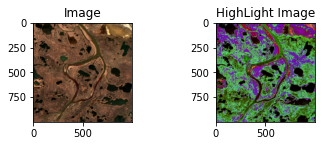

In [4]:
img1 = np.zeros((B02.shape[0], B02.shape[1], 3))
img1[:,:,0] = B04/100
img1[:,:,1] = B03/100
img1[:,:,2] = B02/100

# Создаем пустое изображение:
# Создаем цветовую палитру по имени:
cm2 = plt.get_cmap('gist_rainbow')
# Применяем цветовую палитру к массиву:
colored_image = cm2(B02)
# Полученную картинку с 4-мя каналами (R,G,B,A) с значениями float[0, 1] конвертируем в RGB(uint8):
imgcc = Image.fromarray((colored_image[:, :, :3] * 255).astype(np.uint8))
imgTrueColor = np.asarray(imgcc)

# Создаем массивы данных для создания HighLight-изображения:
height, width, _ = img1.shape
minC0 = np.full((height, width), 0.2)
maxC0 = np.full((height, width), 0.5)
minC1 = np.full((height, width), 0.2)
maxC1 = np.full((height, width), 0.5)
minC2 = np.full((height, width), 0.001)
maxC2 = np.full((height, width), 0.98)
    
# Создаем HighLight-изображение:
imgTrueColor[:,:,0] = np.array(np.vectorize(HighlightCompressVisualizer)(list(map(lambda x,y: x*y,B02,np.full(B02.size,4/256))),minC0,maxC0)*256,dtype=np.uint8)
imgTrueColor[:,:,1] = np.array(np.vectorize(HighlightCompressVisualizer)(list(map(lambda x,y: x*y,B03,np.full(B03.size,4/256))),minC1,maxC1)*256,dtype=np.uint8)
imgTrueColor[:,:,2] = np.array(np.vectorize(HighlightCompressVisualizer)(list(map(lambda x,y: x*y,B04,np.full(B04.size,2/256))),minC2,maxC2)*256,dtype=np.uint8)

# Превращаем цветную HightLight картинку в список для передачи через json:
imgTrueColor_rgb = cv2.cvtColor(np.uint8(imgTrueColor), cv2.COLOR_BGR2RGB)
pil_imgTrueColor = Image.fromarray(imgTrueColor_rgb)
b = io.BytesIO()
pil_imgTrueColor.save(b, 'jpeg')
pil_imgTrueColor_bytes = b.getvalue()
str_imgTrueColor = str(base64.b64encode(pil_imgTrueColor_bytes), encoding='utf-8')

# Извлекаем из Json:
hightlight_image = Image.open(io.BytesIO(base64.b64decode(str_imgTrueColor)))
img3 = np.asarray(hightlight_image)

# Строим картинки:
plt.subplot(2,2,1)
plt.imshow(img1)
plt.title('Image')
plt.axis("on")
plt.subplot(2,2,2)
plt.imshow(hightlight_image)
plt.title('HighLight Image')
plt.axis("on")


Text(0.5, 1.0, 'Image')

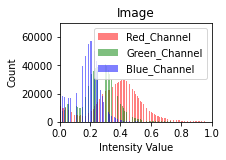

In [5]:
# Строим гистограммы:
plt.subplot(2,2,3)
plt.hist(img1[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(img1[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(img1[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.xlim([0, 1])
plt.ylim([0, 70000])
plt.title('Image')



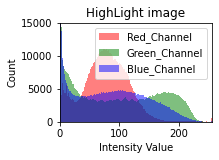

In [6]:
plt.subplot(2,2,4)
plt.hist(img3[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(img3[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
plt.hist(img3[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.xlim([-0.5, 255.5])
plt.ylim([0, 15000])
plt.title('HighLight image')
plt.show()